In [275]:
# Setting up HTML Page.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.container { height:100% !important; }</style>"))
js = "<script>$('.output_scroll').removeClass('output_scroll')</script>"
display(HTML(js))

In [276]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import os #operating system dependent modules of python
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.preprocessing import LabelEncoder
import re
from wordcloud import WordCloud, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import scipy.stats as ss
from collections import Counter
from tqdm import tqdm
from sklearn import linear_model
from sklearn import metrics 
import plotly.graph_objs as go
import plotly as py
from plotly.graph_objs import *
import itertools
import scipy.integrate
import scipy.special
import scipy.stats as scs
from scipy.stats import chi2_contingency
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import numpy as np 
import scipy as scp
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from pandas_profiling import ProfileReport
import plotly.express as px
# Logistic Regression
import researchpy as rp
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import logit
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [277]:
# Load the xlsx file
# excel_data = pd.read_excel('GARE_SurveyResults_IT.xlsx', header=[0,1])
excel_data = pd.read_excel('GARE_SurveyResults_IT.xlsx')

In [278]:
# Create a Dataframe
GARE_df = pd.DataFrame(excel_data)

In [279]:
# Part 1: EDA
# Data Size & Type, Column Names
# Read the values of the file in the dataframe
def main():
    
    txt = "Data size & Headers:"
    x = txt.title()    
    GARE_df = pd.DataFrame(excel_data)
    print(x)
    print('Number of observations', len(GARE_df.index)) # Check the number of observations
    print('Number of columns' , len(GARE_df.columns)) # Check the number of columns
    print('Headers' , GARE_df.columns.values) # Check the column names
if __name__ == "__main__":
    main()  # Print the results

Data Size & Headers:
Number of observations 1851
Number of columns 95
Headers ['RespondentID' 'YEP_Examine_Race' 'YEP_Comp_Interaction'
 'YEP_Understanding' 'YEP_Training_Count' 'YEP_Training_Useful'
 'YEP_Identify_IR' 'YEP_Address_IR' 'D_Status_Quo' 'D_Comfort_Talking'
 'D_Actively_Involved' 'D_More_Active_If_1' 'D_More_Active_If_2'
 'D_More_Active_If_3' 'D_More_Active_If_4' 'D_More_Active_If_5'
 'D_More_Active_If_6' 'D_More_Active_If_7' 'More_Active_If_Combined'
 'D_Equity_Tool' 'D_Confident_Tool' 'D_Dept_Committed'
 'D_Leadership_Supports' 'D_Leadership_Communicates'
 'D_Provides_Resources' 'D_Taken_Steps' 'D_Training_Provided'
 'D_Training_Encouraged' 'D_Racial_Equity_Lens' 'D_Work_Group'
 'D_WG_Effective' 'D_RE_Action_Plan' 'D_Depts_Collab' 'D_Use_Tool'
 'D_Tool_Has_Helped' 'D_Progress' 'D_Dem_Reflective' 'D_Concrete_WF'
 'D_Cntrct_Prcrmnt' 'D_Concrete_Cntrct_Prcrmnt' 'D_Concrete_Community'
 'D_Input_CoC' 'D_Partners' 'D_Progress_PoC' 'D_Progress_Ref_Mig'
 'D_Interp_Trans' 'J_Belo

In [280]:
# Display the Complete Meta-Data of the dataset: Display the Variable Names, Non-Null Count, and their Data Types
GARE_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1851 entries, 0 to 1850
Data columns (total 95 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   RespondentID               1851 non-null   int64  
 1   YEP_Examine_Race           1851 non-null   object 
 2   YEP_Comp_Interaction       1851 non-null   object 
 3   YEP_Understanding          1851 non-null   object 
 4   YEP_Training_Count         1851 non-null   object 
 5   YEP_Training_Useful        1851 non-null   object 
 6   YEP_Identify_IR            1851 non-null   object 
 7   YEP_Address_IR             1851 non-null   object 
 8   D_Status_Quo               1851 non-null   object 
 9   D_Comfort_Talking          1851 non-null   object 
 10  D_Actively_Involved        1851 non-null   object 
 11  D_More_Active_If_1         1851 non-null   object 
 12  D_More_Active_If_2         1851 non-null   object 
 13  D_More_Active_If_3         1851 non-null   objec

In [281]:
# Filter Categorical Data.
# The method .copy() is used here so that any changes made in new DataFrame don't get reflected in the original one.
cat_GARE_df = GARE_df.select_dtypes(include=['object']).copy()
# Check the Categorical dataset size.
cat_GARE_df.shape

(1851, 92)

In [282]:
# Drop columns (Don't Need for the Analysis) in cat_GARE_df: "Open_Comments", and "Unnamed: 94"
cat_GARE_df1 = cat_GARE_df.drop(['Open_Comments', 'Unnamed: 94'], axis=1)
# Check the dataset size.
cat_GARE_df1.shape

(1851, 90)

In [283]:
# Check for null values in the dataset (cat_GARE_df1).
print(cat_GARE_df1.isnull().values.sum())

19


In [284]:
# Details information of the dataset (cat_GARE_df1).
(cat_GARE_df1).describe(include = [object])  

YEP_Examine_Race YEP_Comp_Interaction YEP_Understanding  \
count               1851                 1851              1851   
unique                 8                    8                 8   
top     7 Strongly agree     7 Strongly agree           6 Agree   
freq                 679                  956               915   

       YEP_Training_Count YEP_Training_Useful YEP_Identify_IR YEP_Address_IR  \
count                1851                1851            1851           1851   
unique                  4                   8               8              8   
top          2 One or two       8 No response         6 Agree  8 No response   
freq                  796                 662             534            580   

       D_Status_Quo D_Comfort_Talking D_Actively_Involved  ...  AY_Hisp_Cuban  \
count          1851              1851                1851  ...           1851   
unique            8                 8                   8  ...              2   
top         6 Agree           6 Agree    5 Somewhat agree  ...  8 No response   
freq            595               705                 439  ...           1844   

       AY_Hisp_Yes_Other               Ethnicity  \
count               1851                    1848   
unique                 2                      10   
top        8 No response  Not Hispanic or Latinx   
freq                1804                     749   

                        Race_Ethnicity AY_R_E_Reflective AY_Gender AY_Age  \
count                             1836              1851      1851   1851   
unique                              46                 5         7      7   
top     White - Not Hispanic or Latinx             1 Yes    2 Male  45-54   
freq                               709              1214       837    510   

       AY_Transgender       AY_Sex_Orientation AY_Disability  
count            1851                     1851          1851  
unique              5                        8             3  
top              2 No  1 Straight/Heterosexual          2 No  
freq             1556                     1352          1517  

[4 rows x 90 columns]

In [285]:
# Ethnicity column has 3 blanks - Fill in the blanks with values from AY_Hisp_PR column
# fill missing values
cat_GARE_df1['Ethnicity'].fillna(cat_GARE_df1['AY_Hisp_PR'], inplace=True)

# Display the Complete Meta-Data of the Categorical dataset
cat_GARE_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1851 entries, 0 to 1850
Data columns (total 90 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   YEP_Examine_Race           1851 non-null   object
 1   YEP_Comp_Interaction       1851 non-null   object
 2   YEP_Understanding          1851 non-null   object
 3   YEP_Training_Count         1851 non-null   object
 4   YEP_Training_Useful        1851 non-null   object
 5   YEP_Identify_IR            1851 non-null   object
 6   YEP_Address_IR             1851 non-null   object
 7   D_Status_Quo               1851 non-null   object
 8   D_Comfort_Talking          1851 non-null   object
 9   D_Actively_Involved        1851 non-null   object
 10  D_More_Active_If_1         1851 non-null   object
 11  D_More_Active_If_2         1851 non-null   object
 12  D_More_Active_If_3         1851 non-null   object
 13  D_More_Active_If_4         1851 non-null   object
 14  D_More_A

In [286]:
# Race_Ethnicity column has 15 blanks - Fill in the blanks with values from Race and Ethnicity columns
# fill missing values
cat_GARE_df1['Race_Ethnicity'].fillna(cat_GARE_df1['Race'] + " " + cat_GARE_df1['Ethnicity'], inplace=True)

In [287]:
# Race column has 1 blank - Fill in the blank with 8 No response value
# fill missing values
cat_GARE_df1['Race'].fillna('8 No response', inplace=True)

In [288]:
# Display the Complete Meta-Data of the Categorical dataset
cat_GARE_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1851 entries, 0 to 1850
Data columns (total 90 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   YEP_Examine_Race           1851 non-null   object
 1   YEP_Comp_Interaction       1851 non-null   object
 2   YEP_Understanding          1851 non-null   object
 3   YEP_Training_Count         1851 non-null   object
 4   YEP_Training_Useful        1851 non-null   object
 5   YEP_Identify_IR            1851 non-null   object
 6   YEP_Address_IR             1851 non-null   object
 7   D_Status_Quo               1851 non-null   object
 8   D_Comfort_Talking          1851 non-null   object
 9   D_Actively_Involved        1851 non-null   object
 10  D_More_Active_If_1         1851 non-null   object
 11  D_More_Active_If_2         1851 non-null   object
 12  D_More_Active_If_3         1851 non-null   object
 13  D_More_Active_If_4         1851 non-null   object
 14  D_More_A

In [289]:
# Check the dataset size
cat_GARE_df1.shape

(1851, 90)

In [290]:
# Checking the factor levels (All columns)
pd.options.display.max_rows = 2000 # To display more rows of data
cat_cols = cat_GARE_df1.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(
    cat_GARE_df1[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'value']))


counts
column                    value                                                     
AY_Age                    18-24                                                   36
                          25-34                                                  210
                          35-44                                                  420
                          45-54                                                  510
                          55-64                                                  392
                          65+                                                     79
                          8 No response                                          204
AY_City_Tenure            1 Less than 1 year                                     200
                          2 1-5 years                                            453
                          3 6-10 years                                           296
                          4 11-20 years                                          367
                          5 21 or more years                                     358
                          8 No response                                          177
AY_Disability             1 Yes                                                  130
                          2 No                                                  1517
                          8 No response                                          204
AY_Full_Time              8 No response                                          211
                          Full-time                                             1640
AY_Gender                 1 Female                                               704
                          2 Male                                                 837
                          3 Non-binary/Third gender                               12
                          4 Prefer not to say                                     91
                          5 Prefer not to say                                     16
                          8 No response                                          184
                          Prefer to self-describe. Please specify:                 7
AY_Hisp_Cuban             8 No response                                         1844
                          Yes, Cuban                                               7
AY_Hisp_Mex_Chic          8 No response                                         1156
                          Yes, Mexican, Mexican American, or Chicano             695
AY_Hisp_No                2 No                                                   869
                          8 No response                                          982
AY_Hisp_PR                8 No response                                         1836
                          Yes, Puerto Rican                                       15
AY_Hisp_Yes_Other         8 No response                                         1804
                          Yes, another Hispanic Latina/o or Spanish origi...      47
AY_Manage_Supervise       1 Yes                                                  535
                          2 No                                                  1132
                          8 No response                                          184
AY_Part_Time              8 No response                                         1821
                          Part-time                                               30
AY_R_E_Reflective         1 Yes                                                 1214
                          2 No                                                   239
                          4 Prefer not to say                                    178
                          5 Prefer not to say                                     13
                          8 No response                                          207
AY_Race_1 Asian           1 Asian                                                 4

In [291]:
# Updating the dataset (cat_GARE_df1): New column i.e. Race1
## Setting up the conditions:
conditions = [
    (cat_GARE_df1['Race'] == 'American Indian or Alaska Native, White') | (cat_GARE_df1['Race'] == 'American Indian or Alaska Native, White, White') |
    (cat_GARE_df1['Race'] == 'Asian, American Indian or Alaska Native, White') | (cat_GARE_df1['Race']== 'Asian, White') | (cat_GARE_df1['Race'] == 'Black or African American, White') |
    (cat_GARE_df1['Race'] == 'Black, American Indian or Alaska Native') | (cat_GARE_df1['Race'] == 'Black, American Indian or Alaska Native, White') | 
    (cat_GARE_df1['Race'] == 'Black, Asian') | (cat_GARE_df1['Race'] == 'Native Hawaiian or Other Pacific Islander, White') | 
    (cat_GARE_df1['Race'] == 'Native Hawaiian, American Indian or Alaska Native') | (cat_GARE_df1['Race'] == 'Native Hawaiian, Black or African American') |
    (cat_GARE_df1['Race'] == 'Native Hawaiian, Asian'),
    (cat_GARE_df1['Race'] == '8 No response') | (cat_GARE_df1['Race'] == 'No response'),
    (cat_GARE_df1['Race'] == 'White'),
    (cat_GARE_df1['Race'] == 'Asian'),
    (cat_GARE_df1['Race'] == 'Black or African American'),
    (cat_GARE_df1['Race'] == 'American Indian or Alaska Native'),
    (cat_GARE_df1['Race'] == 'Native Hawaiian or Other Pacific Islander') 
]    

## Setting up the replacements:
choices = ['Mixed Race','No response','White', 'Asian', 'Black or African American', 'Native American', 'Pacific Islander']

## Creating a new column 'Race1' with Updated info
cat_GARE_df1['Race1'] = np.select(conditions, choices)

# Checking the factor levels
pd.options.display.max_rows = 2000 # To display more rows of data
cat_cols = cat_GARE_df1.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(
    cat_GARE_df1[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'value']))

counts
column                    value                                                     
AY_Age                    18-24                                                   36
                          25-34                                                  210
                          35-44                                                  420
                          45-54                                                  510
                          55-64                                                  392
                          65+                                                     79
                          8 No response                                          204
AY_City_Tenure            1 Less than 1 year                                     200
                          2 1-5 years                                            453
                          3 6-10 years                                           296
                          4 11-20 years                                          367
                          5 21 or more years                                     358
                          8 No response                                          177
AY_Disability             1 Yes                                                  130
                          2 No                                                  1517
                          8 No response                                          204
AY_Full_Time              8 No response                                          211
                          Full-time                                             1640
AY_Gender                 1 Female                                               704
                          2 Male                                                 837
                          3 Non-binary/Third gender                               12
                          4 Prefer not to say                                     91
                          5 Prefer not to say                                     16
                          8 No response                                          184
                          Prefer to self-describe. Please specify:                 7
AY_Hisp_Cuban             8 No response                                         1844
                          Yes, Cuban                                               7
AY_Hisp_Mex_Chic          8 No response                                         1156
                          Yes, Mexican, Mexican American, or Chicano             695
AY_Hisp_No                2 No                                                   869
                          8 No response                                          982
AY_Hisp_PR                8 No response                                         1836
                          Yes, Puerto Rican                                       15
AY_Hisp_Yes_Other         8 No response                                         1804
                          Yes, another Hispanic Latina/o or Spanish origi...      47
AY_Manage_Supervise       1 Yes                                                  535
                          2 No                                                  1132
                          8 No response                                          184
AY_Part_Time              8 No response                                         1821
                          Part-time                                               30
AY_R_E_Reflective         1 Yes                                                 1214
                          2 No                                                   239
                          4 Prefer not to say                                    178
                          5 Prefer not to say                                     13
                          8 No response                                          207
AY_Race_1 Asian           1 Asian                                                 4

In [292]:
# Updating the dataset (cat_GARE_df1): New column i.e. New_Race
## Setting up the conditions:
conditions = [
    (cat_GARE_df1['Race'] == 'No response') & (cat_GARE_df1['AY_Hisp_Mex_Chic'] == 'Yes, Mexican, Mexican American, or Chicano'),
    (cat_GARE_df1['Race'] == 'No response') & (cat_GARE_df1['AY_Hisp_PR'] == 'Yes, Puerto Rican'),
    (cat_GARE_df1['Race'] == 'No response') & (cat_GARE_df1['AY_Hisp_Cuban'] == 'Yes, Cuban'),
    (cat_GARE_df1['Race'] == 'No response') & (cat_GARE_df1['AY_Hisp_Yes_Other'] == 'Yes, another Hispanic Latina/o or Spanish origin. Please specify:')
]    

## Setting up the replacements:
# choices = ['Mexican, Mexican American, or Chicano', 'Puerto Rican', 'Cuban', 'Other']
choices = ['Hispanic/Latino', 'Hispanic/Latino', 'Hispanic/Latino', 'Hispanic/Latino']

## Creating a new column 'New_Race' with Updated info
cat_GARE_df1['New_Race'] = np.select(conditions, choices)

cat_GARE_df1['New_Race'] = cat_GARE_df1.apply(lambda x: x['Race1'] if x['New_Race']=='0' else x['New_Race'], axis=1)

# Checking the factor levels
pd.options.display.max_rows = 2000 # To display more rows of data
cat_cols = cat_GARE_df1.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(
    cat_GARE_df1[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'value']))

counts
column                    value                                                     
AY_Age                    18-24                                                   36
                          25-34                                                  210
                          35-44                                                  420
                          45-54                                                  510
                          55-64                                                  392
                          65+                                                     79
                          8 No response                                          204
AY_City_Tenure            1 Less than 1 year                                     200
                          2 1-5 years                                            453
                          3 6-10 years                                           296
                          4 11-20 years                                          367
                          5 21 or more years                                     358
                          8 No response                                          177
AY_Disability             1 Yes                                                  130
                          2 No                                                  1517
                          8 No response                                          204
AY_Full_Time              8 No response                                          211
                          Full-time                                             1640
AY_Gender                 1 Female                                               704
                          2 Male                                                 837
                          3 Non-binary/Third gender                               12
                          4 Prefer not to say                                     91
                          5 Prefer not to say                                     16
                          8 No response                                          184
                          Prefer to self-describe. Please specify:                 7
AY_Hisp_Cuban             8 No response                                         1844
                          Yes, Cuban                                               7
AY_Hisp_Mex_Chic          8 No response                                         1156
                          Yes, Mexican, Mexican American, or Chicano             695
AY_Hisp_No                2 No                                                   869
                          8 No response                                          982
AY_Hisp_PR                8 No response                                         1836
                          Yes, Puerto Rican                                       15
AY_Hisp_Yes_Other         8 No response                                         1804
                          Yes, another Hispanic Latina/o or Spanish origi...      47
AY_Manage_Supervise       1 Yes                                                  535
                          2 No                                                  1132
                          8 No response                                          184
AY_Part_Time              8 No response                                         1821
                          Part-time                                               30
AY_R_E_Reflective         1 Yes                                                 1214
                          2 No                                                   239
                          4 Prefer not to say                                    178
                          5 Prefer not to say                                     13
                          8 No response                                          207
AY_Race_1 Asian           1 Asian                                                 4

In [293]:
# Updating the dataset (cat_GARE_df1): New column i.e. YEP_Examine_Race
## Updating 'YEP_Examine_Race' column
cat_GARE_df1['YEP_Examine_Race'] = cat_GARE_df1['YEP_Examine_Race'].replace(["1 Strongly disagree", "2 Disagree",
                                                                             "3 Somewhat disagree", "4 Don't know", 
                                                                             "5 Somewhat agree", "6 Agree", "7 Strongly agree", 
                                                                             "8 No response"],["Strongly disagree", "Disagree", 
                                                                                               "Somewhat disagree", "Don't know", 
                                                                                               "Somewhat agree", "Agree", 
                                                                                               "Strongly agree", "No response"])


# Checking the factor levels
pd.options.display.max_rows = 2000 # To display more rows of data
cat_cols = cat_GARE_df1.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(
    cat_GARE_df1[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'value']))

counts
column                    value                                                     
AY_Age                    18-24                                                   36
                          25-34                                                  210
                          35-44                                                  420
                          45-54                                                  510
                          55-64                                                  392
                          65+                                                     79
                          8 No response                                          204
AY_City_Tenure            1 Less than 1 year                                     200
                          2 1-5 years                                            453
                          3 6-10 years                                           296
                          4 11-20 years                                          367
                          5 21 or more years                                     358
                          8 No response                                          177
AY_Disability             1 Yes                                                  130
                          2 No                                                  1517
                          8 No response                                          204
AY_Full_Time              8 No response                                          211
                          Full-time                                             1640
AY_Gender                 1 Female                                               704
                          2 Male                                                 837
                          3 Non-binary/Third gender                               12
                          4 Prefer not to say                                     91
                          5 Prefer not to say                                     16
                          8 No response                                          184
                          Prefer to self-describe. Please specify:                 7
AY_Hisp_Cuban             8 No response                                         1844
                          Yes, Cuban                                               7
AY_Hisp_Mex_Chic          8 No response                                         1156
                          Yes, Mexican, Mexican American, or Chicano             695
AY_Hisp_No                2 No                                                   869
                          8 No response                                          982
AY_Hisp_PR                8 No response                                         1836
                          Yes, Puerto Rican                                       15
AY_Hisp_Yes_Other         8 No response                                         1804
                          Yes, another Hispanic Latina/o or Spanish origi...      47
AY_Manage_Supervise       1 Yes                                                  535
                          2 No                                                  1132
                          8 No response                                          184
AY_Part_Time              8 No response                                         1821
                          Part-time                                               30
AY_R_E_Reflective         1 Yes                                                 1214
                          2 No                                                   239
                          4 Prefer not to say                                    178
                          5 Prefer not to say                                     13
                          8 No response                                          207
AY_Race_1 Asian           1 Asian                                                 4

In [294]:
## Updating 'AY_Age' column 
cat_GARE_df1['AY_Age'] = cat_GARE_df1['AY_Age'].replace(['8 No response'],["No response"])

## Updating 'AY_Manage_Supervise' column 
cat_GARE_df1['AY_Manage_Supervise'] = cat_GARE_df1['AY_Manage_Supervise'].replace(['1 Yes', '2 No', '8 No response'],['Yes', 
                                                                                                                      'No', 
                                                                                                                      'No response'])

## Updating 'AY_Work_Location' column AY_Age
cat_GARE_df1['AY_Work_Location'] = cat_GARE_df1['AY_Work_Location'].replace(["1 In a downtown (or central location) office environment",
                                                                             "2 In an office environment, outside of downtown (or central location)",
                                                                             "3 Not in an office environment", "8 No response"],
                                                                            ["Office environment: Downtown (or central location)", 
                                                                             "Office environment: Outside of Downtown (or Outside of central location)",
                                                                             "Not in an office environment", "No response"])

## Updating 'AY_Disability' column 
cat_GARE_df1['AY_Disability'] = cat_GARE_df1['AY_Disability'].replace(['1 Yes', '2 No', '8 No response'],['Yes', 
                                                                                                          'No', 
                                                                                                          'No response'])

## Updating 'D_Concrete_WF' column
cat_GARE_df1['Employment_Type'] = cat_GARE_df1['Employment_Type'].replace(["1 Full-time", "2 Part-time",
                                                                             "3 Part-time/Seasonal", "4 Seasonal", 
                                                                             "5 Full-time/Part-time", "8 No response"],["Full-time", "Part-time", 
                                                                                               "Part-time/Seasonal", "Seasonal", 
                                                                                               "Full-time/Part-time", "No response"])


## Updating 'YEP_Examine_Race' column AY_Age
cat_GARE_df1['YEP_Examine_Race'] = cat_GARE_df1['YEP_Examine_Race'].replace(["1 Strongly disagree", "2 Disagree",
                                                                             "3 Somewhat disagree", "4 Don't know", 
                                                                             "5 Somewhat agree", "6 Agree", "7 Strongly agree", 
                                                                             "8 No response"],["Strongly disagree", "Disagree", 
                                                                                               "Somewhat disagree", "Don't know", 
                                                                                               "Somewhat agree", "Agree", 
                                                                                               "Strongly agree", "No response"])

## Updating 'YEP_Understanding' column
cat_GARE_df1['YEP_Understanding'] = cat_GARE_df1['YEP_Understanding'].replace(["1 Strongly disagree", "2 Disagree",
                                                                             "3 Somewhat disagree", "4 Don't know", 
                                                                             "5 Somewhat agree", "6 Agree", "7 Strongly agree", 
                                                                             "8 No response"],["Strongly disagree", "Disagree", 
                                                                                               "Somewhat disagree", "Don't know", 
                                                                                               "Somewhat agree", "Agree", 
                                                                                               "Strongly agree", "No response"])



## Updating 'YEP_Identify_IR' column
cat_GARE_df1['YEP_Identify_IR'] = cat_GARE_df1['YEP_Identify_IR'].replace(["1 Strongly disagree", "2 Disagree",
                                                                             "3 Somewhat disagree", "4 Don't know", 
                                                                             "5 Somewhat agree", "6 Agree", "7 Strongly agree", 
                                                                             "8 No response"],["Strongly disagree", "Disagree", 
                                                                                               "Somewhat disagree", "Don't know", 
                                                                                               "Somewhat agree", "Agree", 
                                                                                               "Strongly agree", "No response"])
## Updating 'YEP_Address_IR' column
cat_GARE_df1['YEP_Address_IR'] = cat_GARE_df1['YEP_Address_IR'].replace(["1 Strongly disagree", "2 Disagree",
                                                                             "3 Somewhat disagree", "4 Don't know", 
                                                                             "5 Somewhat agree", "6 Agree", "7 Strongly agree", 
                                                                             "8 No response"],["Strongly disagree", "Disagree", 
                                                                                               "Somewhat disagree", "Don't know", 
                                                                                               "Somewhat agree", "Agree", 
                                                                                               "Strongly agree", "No response"])


## Updating 'D_Comfort_Talking' column
cat_GARE_df1['D_Comfort_Talking'] = cat_GARE_df1['D_Comfort_Talking'].replace(["1 Strongly disagree", "2 Disagree",
                                                                             "3 Somewhat disagree", "4 Don't know", 
                                                                             "5 Somewhat agree", "6 Agree", "7 Strongly agree", 
                                                                             "8 No response"],["Strongly disagree", "Disagree", 
                                                                                               "Somewhat disagree", "Don't know", 
                                                                                               "Somewhat agree", "Agree", 
                                                                                               "Strongly agree", "No response"])

## Updating 'D_Actively_Involved' column
cat_GARE_df1['D_Actively_Involved'] = cat_GARE_df1['D_Actively_Involved'].replace(["1 Strongly disagree", "2 Disagree",
                                                                             "3 Somewhat disagree", "4 Don't know", 
                                                                             "5 Somewhat agree", "6 Agree", "7 Strongly agree", 
                                                                             "8 No response"],["Strongly disagree", "Disagree", 
                                                                                               "Somewhat disagree", "Don't know", 
                                                                                               "Somewhat agree", "Agree", 
                                                                                               "Strongly agree", "No response"])
## Updating 'D_Dept_Committed' column
cat_GARE_df1['D_Dept_Committed'] = cat_GARE_df1['D_Dept_Committed'].replace(["1 Strongly disagree", "2 Disagree",
                                                                             "3 Somewhat disagree", "4 Don't know", 
                                                                             "5 Somewhat agree", "6 Agree", "7 Strongly agree", 
                                                                             "8 No response"],["Strongly disagree", "Disagree", 
                                                                                               "Somewhat disagree", "Don't know", 
                                                                                               "Somewhat agree", "Agree", 
                                                                                               "Strongly agree", "No response"])
## Updating 'D_Leadership_Supports' column
cat_GARE_df1['D_Leadership_Supports'] = cat_GARE_df1['D_Leadership_Supports'].replace(["1 Strongly disagree", "2 Disagree",
                                                                             "3 Somewhat disagree", "4 Don't know", 
                                                                             "5 Somewhat agree", "6 Agree", "7 Strongly agree", 
                                                                             "8 No response"],["Strongly disagree", "Disagree", 
                                                                                               "Somewhat disagree", "Don't know", 
                                                                                               "Somewhat agree", "Agree", 
                                                                                               "Strongly agree", "No response"])

## Updating 'J_Belonging' column
cat_GARE_df1['J_Belonging'] = cat_GARE_df1['J_Belonging'].replace(["1 Strongly disagree", "2 Disagree",
                                                                             "3 Somewhat disagree", "4 Don't know", 
                                                                             "5 Somewhat agree", "6 Agree", "7 Strongly agree", 
                                                                             "8 No response"],["Strongly disagree", "Disagree", 
                                                                                               "Somewhat disagree", "Don't know", 
                                                                                               "Somewhat agree", "Agree", 
                                                                                               "Strongly agree", "No response"])

## Updating 'AY_Gender' column
cat_GARE_df1['AY_Gender'] = cat_GARE_df1['AY_Gender'].replace(["1 Female", "2 Male",
                                                                             "3 Non-binary/Third gender", "4 Prefer not to say", 
                                                                             "5 Prefer not to say", "8 No response", 
                                                                             "Prefer to self-describe. Please specify:"],["Female", "Male", 
                                                                                                                          "Non-binary/Third gender", "Prefer not to say", 
                                                                                                                          "Prefer not to say", "No response", 
                                                                                                                          "Unknown"]) 
## Updating 'D_Leadership_Communicates' column
cat_GARE_df1['D_Leadership_Communicates'] = cat_GARE_df1['D_Leadership_Communicates'].replace(["1 Strongly disagree", "2 Disagree",
                                                                             "3 Somewhat disagree", "4 Don't know", 
                                                                             "5 Somewhat agree", "6 Agree", "7 Strongly agree", 
                                                                             "8 No response"],["Strongly disagree", "Disagree", 
                                                                                               "Somewhat disagree", "Don't know", 
                                                                                               "Somewhat agree", "Agree", 
                                                                                               "Strongly agree", "No response"])

## Updating 'D_Progress' column
cat_GARE_df1['D_Progress'] = cat_GARE_df1['D_Progress'].replace(["1 Strongly disagree", "2 Disagree",
                                                                             "3 Somewhat disagree", "4 Don't know", 
                                                                             "5 Somewhat agree", "6 Agree", "7 Strongly agree", 
                                                                             "8 No response"],["Strongly disagree", "Disagree", 
                                                                                               "Somewhat disagree", "Don't know", 
                                                                                               "Somewhat agree", "Agree", 
                                                                                               "Strongly agree", "No response"])

## Updating 'J_Explicit_Committment' column
cat_GARE_df1['J_Explicit_Committment'] = cat_GARE_df1['J_Explicit_Committment'].replace(["1 Strongly disagree", "2 Disagree",
                                                                             "3 Somewhat disagree", "4 Don't know", 
                                                                             "5 Somewhat agree", "6 Agree", "7 Strongly agree", 
                                                                             "8 No response"],["Strongly disagree", "Disagree", 
                                                                                               "Somewhat disagree", "Don't know", 
                                                                                               "Somewhat agree", "Agree", 
                                                                                               "Strongly agree", "No response"])

## Updating 'D_More_Active_If_1' column
cat_GARE_df1['D_More_Active_If_1'] = cat_GARE_df1['D_More_Active_If_1'].replace(["1 I had more information, so I knew what to do", "8 No response"],
                                                                                ["Yes", "No"])

## Updating 'D_More_Active_If_2' column
cat_GARE_df1['D_More_Active_If_2'] = cat_GARE_df1['D_More_Active_If_2'].replace(["1 I received training", "8 No response"],
                                                                                ["Yes", "No"])

## Updating 'D_More_Active_If_3' column
cat_GARE_df1['D_More_Active_If_3'] = cat_GARE_df1['D_More_Active_If_3'].replace(["1 I had more time", "8 No response"],
                                                                                ["Yes", "No"])

## Updating 'D_More_Active_If_4' column
cat_GARE_df1['D_More_Active_If_4'] = cat_GARE_df1['D_More_Active_If_4'].replace(["1 I had the support of my supervisor or manager", "8 No response"],
                                                                                ["Yes", "No"])

## Updating 'D_More_Active_If_5' column
cat_GARE_df1['D_More_Active_If_5'] = cat_GARE_df1['D_More_Active_If_5'].replace(["1 Racial equity strategies received more funding", "8 No response"],
                                                                                ["Yes", "No"])

## Updating 'D_More_Active_If_6' column
cat_GARE_df1['D_More_Active_If_6'] = cat_GARE_df1['D_More_Active_If_6'].replace(["1 I believed there are serious issues related to race", "8 No response"],
                                                                                ["Yes", "No"])

## Updating 'D_More_Active_If_7' column
cat_GARE_df1['D_More_Active_If_7'] = cat_GARE_df1['D_More_Active_If_7'].replace(["1 I am happy with my current level of engagement", "8 No response"],
                                                                                ["Yes", "No"])

## Updating 'D_Dem_Reflective' column
cat_GARE_df1['D_Dem_Reflective'] = cat_GARE_df1['D_Dem_Reflective'].replace(["1 Strongly disagree", "2 Disagree",
                                                                             "3 Somewhat disagree", "4 Don't know", 
                                                                             "5 Somewhat agree", "6 Agree", "7 Strongly agree", 
                                                                             "8 No response"],["Strongly disagree", "Disagree", 
                                                                                               "Somewhat disagree", "Don't know", 
                                                                                               "Somewhat agree", "Agree", 
                                                                                               "Strongly agree", "No response"])

## Updating 'D_Concrete_WF' column
cat_GARE_df1['D_Concrete_WF'] = cat_GARE_df1['D_Concrete_WF'].replace(["1 Strongly disagree", "2 Disagree",
                                                                             "3 Somewhat disagree", "4 Don't know", 
                                                                             "5 Somewhat agree", "6 Agree", "7 Strongly agree", 
                                                                             "8 No response"],["Strongly disagree", "Disagree", 
                                                                                               "Somewhat disagree", "Don't know", 
                                                                                               "Somewhat agree", "Agree", 
                                                                                               "Strongly agree", "No response"])


## Updating 'AY_City_Tenure' column
cat_GARE_df1['AY_City_Tenure'] = cat_GARE_df1['AY_City_Tenure'].replace(["1 Less than 1 year", "2 1-5 years",
                                                                             "3 6-10 years", "4 11-20 years", 
                                                                             "5 21 or more years", "8 No response"],["Less than 1 year", "1-5 years", 
                                                                                                                          "6-10 years", "11-20 years", 
                                                                                                                          "21 or more years", "No response"])


# Checking the factor levels
pd.options.display.max_rows = 2000 # To display more rows of data
cat_cols = cat_GARE_df1.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(
    cat_GARE_df1[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'value']))

counts
column                    value                                                     
AY_Age                    18-24                                                   36
                          25-34                                                  210
                          35-44                                                  420
                          45-54                                                  510
                          55-64                                                  392
                          65+                                                     79
                          No response                                            204
AY_City_Tenure            1-5 years                                              453
                          11-20 years                                            367
                          21 or more years                                       358
                          6-10 years                                             296
                          Less than 1 year                                       200
                          No response                                            177
AY_Disability             No                                                    1517
                          No response                                            204
                          Yes                                                    130
AY_Full_Time              8 No response                                          211
                          Full-time                                             1640
AY_Gender                 Female                                                 704
                          Male                                                   837
                          No response                                            184
                          Non-binary/Third gender                                 12
                          Prefer not to say                                      107
                          Unknown                                                  7
AY_Hisp_Cuban             8 No response                                         1844
                          Yes, Cuban                                               7
AY_Hisp_Mex_Chic          8 No response                                         1156
                          Yes, Mexican, Mexican American, or Chicano             695
AY_Hisp_No                2 No                                                   869
                          8 No response                                          982
AY_Hisp_PR                8 No response                                         1836
                          Yes, Puerto Rican                                       15
AY_Hisp_Yes_Other         8 No response                                         1804
                          Yes, another Hispanic Latina/o or Spanish origi...      47
AY_Manage_Supervise       No                                                    1132
                          No response                                            184
                          Yes                                                    535
AY_Part_Time              8 No response                                         1821
                          Part-time                                               30
AY_R_E_Reflective         1 Yes                                                 1214
                          2 No                                                   239
                          4 Prefer not to say                                    178
                          5 Prefer not to say                                     13
                          8 No response                                          207
AY_Race_1 Asian           1 Asian                                                 44
                          8 No response                                         180

In [295]:
# Renaming "New_Race" column: Race_Eth
cat_GARE_df1.rename(columns = {'New_Race':'Race_Eth'}, inplace = True)
# Checking the factor levels
pd.options.display.max_rows = 2000 # To display more rows of data
cat_cols = cat_GARE_df1.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(
    cat_GARE_df1[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'value']))

counts
column                    value                                                     
AY_Age                    18-24                                                   36
                          25-34                                                  210
                          35-44                                                  420
                          45-54                                                  510
                          55-64                                                  392
                          65+                                                     79
                          No response                                            204
AY_City_Tenure            1-5 years                                              453
                          11-20 years                                            367
                          21 or more years                                       358
                          6-10 years                                             296
                          Less than 1 year                                       200
                          No response                                            177
AY_Disability             No                                                    1517
                          No response                                            204
                          Yes                                                    130
AY_Full_Time              8 No response                                          211
                          Full-time                                             1640
AY_Gender                 Female                                                 704
                          Male                                                   837
                          No response                                            184
                          Non-binary/Third gender                                 12
                          Prefer not to say                                      107
                          Unknown                                                  7
AY_Hisp_Cuban             8 No response                                         1844
                          Yes, Cuban                                               7
AY_Hisp_Mex_Chic          8 No response                                         1156
                          Yes, Mexican, Mexican American, or Chicano             695
AY_Hisp_No                2 No                                                   869
                          8 No response                                          982
AY_Hisp_PR                8 No response                                         1836
                          Yes, Puerto Rican                                       15
AY_Hisp_Yes_Other         8 No response                                         1804
                          Yes, another Hispanic Latina/o or Spanish origi...      47
AY_Manage_Supervise       No                                                    1132
                          No response                                            184
                          Yes                                                    535
AY_Part_Time              8 No response                                         1821
                          Part-time                                               30
AY_R_E_Reflective         1 Yes                                                 1214
                          2 No                                                   239
                          4 Prefer not to say                                    178
                          5 Prefer not to say                                     13
                          8 No response                                          207
AY_Race_1 Asian           1 Asian                                                 44
                          8 No response                                         180

In [296]:
# delete all rows with "No Response" as Answer
#indexcat_GARE_df1 = cat_GARE_df1[ (cat_GARE_df1['YEP_Examine_Race'] == 'No response')
indexcat_GARE_df1 = cat_GARE_df1[ (cat_GARE_df1['YEP_Examine_Race'] == 'No response') | (cat_GARE_df1['YEP_Understanding'] == 'No response') | (cat_GARE_df1['YEP_Identify_IR'] == 'No response')
                                 | (cat_GARE_df1['YEP_Address_IR'] == 'No response') | (cat_GARE_df1['D_Comfort_Talking'] == 'No response') | (cat_GARE_df1['D_Actively_Involved'] == 'No response')
                                 | (cat_GARE_df1['D_Dept_Committed'] == 'No response') | (cat_GARE_df1['D_Leadership_Supports'] == 'No response') | (cat_GARE_df1['J_Belonging'] == 'No response')
                                 | (cat_GARE_df1['D_Leadership_Communicates'] == 'No response') | (cat_GARE_df1['D_Progress'] == 'No response') | (cat_GARE_df1['J_Explicit_Committment'] == 'No response')
                                 | (cat_GARE_df1['D_Dem_Reflective'] == 'No response') | (cat_GARE_df1['D_Concrete_WF'] == 'No response') | (cat_GARE_df1['AY_Age'] == 'No response')
                                 | (cat_GARE_df1['AY_City_Tenure'] == 'No response') | (cat_GARE_df1['AY_Disability'] == 'No response') | (cat_GARE_df1['AY_Gender'] == 'No response') 
                                 | (cat_GARE_df1['AY_Work_Location'] == 'No response') | (cat_GARE_df1['Race_Eth'] == 'No response') | (cat_GARE_df1['AY_Manage_Supervise'] == 'No response')
                                 | (cat_GARE_df1['Employment_Type'] == 'No response')].index
cat_GARE_df1.drop(indexcat_GARE_df1 , inplace=True)
# Checking the factor levels
pd.options.display.max_rows = 2000 # To display more rows of data
cat_cols = cat_GARE_df1.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(
    cat_GARE_df1[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'value']))


counts
column                    value                                                     
AY_Age                    18-24                                                   28
                          25-34                                                  156
                          35-44                                                  293
                          45-54                                                  331
                          55-64                                                  240
                          65+                                                     55
AY_City_Tenure            1-5 years                                              333
                          11-20 years                                            237
                          21 or more years                                       201
                          6-10 years                                             186
                          Less than 1 year                                       146
AY_Disability             No                                                    1021
                          Yes                                                     82
AY_Full_Time              8 No response                                           28
                          Full-time                                             1075
AY_Gender                 Female                                                 512
                          Male                                                   536
                          Non-binary/Third gender                                  9
                          Prefer not to say                                       43
                          Unknown                                                  3
AY_Hisp_Cuban             8 No response                                         1101
                          Yes, Cuban                                               2
AY_Hisp_Mex_Chic          8 No response                                          608
                          Yes, Mexican, Mexican American, or Chicano             495
AY_Hisp_No                2 No                                                   564
                          8 No response                                          539
AY_Hisp_PR                8 No response                                         1094
                          Yes, Puerto Rican                                        9
AY_Hisp_Yes_Other         8 No response                                         1071
                          Yes, another Hispanic Latina/o or Spanish origi...      32
AY_Manage_Supervise       No                                                     740
                          Yes                                                    363
AY_Part_Time              8 No response                                         1081
                          Part-time                                               22
AY_R_E_Reflective         1 Yes                                                  858
                          2 No                                                   147
                          4 Prefer not to say                                     83
                          5 Prefer not to say                                      4
                          8 No response                                           11
AY_Race_1 Asian           1 Asian                                                 32
                          8 No response                                         1071
AY_Race_Amer_Ind          1 American Indian or Alaska Native                      72
                          8 No response                                         1031
AY_Race_Black_AA          1 Black or African American                             64
                          8 No response                                         1039
AY_Race_Haw_PI            1 Native Hawaiian or Other Pacific Islander             1

In [297]:
# Subset of suggested important factors for Analysis
cat_GARE_df2 = cat_GARE_df1[['AY_Age', 'AY_Gender', 'AY_Manage_Supervise', 'AY_Work_Location', 'Race_Eth', 'AY_City_Tenure', 
                             'YEP_Examine_Race', 'YEP_Understanding', 'AY_Disability', 'Employment_Type', 'YEP_Identify_IR', 'YEP_Address_IR', 
                             'D_Comfort_Talking', 'D_Actively_Involved', 'D_Dept_Committed', 'D_Leadership_Supports', 'J_Belonging', 
                             'D_Leadership_Communicates', 'D_Progress', 'J_Explicit_Committment', 'D_More_Active_If_1', 
                             'D_More_Active_If_2', 'D_More_Active_If_3', 'D_More_Active_If_4', 'D_More_Active_If_5', 'D_More_Active_If_6',
                             'D_More_Active_If_7', 'D_Dem_Reflective', 'D_Concrete_WF']]

In [298]:
# Create a dataset for the factor levels analysis
data = cat_GARE_df2[['AY_Age', 'AY_Gender', 'AY_Manage_Supervise', 'AY_Work_Location', 'Race_Eth', 'AY_City_Tenure', 
                     'YEP_Examine_Race', 'YEP_Understanding', 'AY_Disability', 'Employment_Type', 'YEP_Identify_IR', 'YEP_Address_IR', 
                     'D_Comfort_Talking', 'D_Actively_Involved', 'D_Dept_Committed', 'D_Leadership_Supports', 'J_Belonging', 
                     'D_Leadership_Communicates', 'D_Progress', 'J_Explicit_Committment', 'D_More_Active_If_1', 
                     'D_More_Active_If_2', 'D_More_Active_If_3', 'D_More_Active_If_4', 'D_More_Active_If_5', 'D_More_Active_If_6',
                     'D_More_Active_If_7', 'D_Dem_Reflective', 'D_Concrete_WF']]
# Checking the factor levels
pd.options.display.max_rows = 2000 # To display more rows of data
cat_cols = data.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(
    data[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'value']))

counts
column                    value                                                     
AY_Age                    18-24                                                   28
                          25-34                                                  156
                          35-44                                                  293
                          45-54                                                  331
                          55-64                                                  240
                          65+                                                     55
AY_City_Tenure            1-5 years                                              333
                          11-20 years                                            237
                          21 or more years                                       201
                          6-10 years                                             186
                          Less than 1 year                                       146
AY_Disability             No                                                    1021
                          Yes                                                     82
AY_Gender                 Female                                                 512
                          Male                                                   536
                          Non-binary/Third gender                                  9
                          Prefer not to say                                       43
                          Unknown                                                  3
AY_Manage_Supervise       No                                                     740
                          Yes                                                    363
AY_Work_Location          Not in an office environment                           323
                          Office environment: Downtown (or central location)     514
                          Office environment: Outside of Downtown (or Out...     266
D_Actively_Involved       Agree                                                  242
                          Disagree                                               158
                          Don't know                                             140
                          Somewhat agree                                         295
                          Somewhat disagree                                      104
                          Strongly agree                                         120
                          Strongly disagree                                       44
D_Comfort_Talking         Agree                                                  436
                          Disagree                                                55
                          Don't know                                              16
                          Somewhat agree                                         233
                          Somewhat disagree                                       79
                          Strongly agree                                         250
                          Strongly disagree                                       34
D_Concrete_WF             Agree                                                  238
                          Disagree                                                73
                          Don't know                                             430
                          Somewhat agree                                         175
                          Somewhat disagree                                       72
                          Strongly agree                                          65
                          Strongly disagree                                       50
D_Dem_Reflective          Agree                                                  305
                          Disagree                                               10

In [299]:
# Subset of suggested important Likert scale factors for Analysis
data1 = cat_GARE_df1[['YEP_Examine_Race', 'YEP_Understanding', 'YEP_Identify_IR', 'YEP_Address_IR', 
                      'D_Comfort_Talking', 'D_Actively_Involved', 'D_Dept_Committed', 'D_Leadership_Supports', 'J_Belonging', 
                      'D_Leadership_Communicates', 'D_Progress', 'J_Explicit_Committment', 'D_Dem_Reflective', 'D_Concrete_WF']]

In [300]:
# Now plot it!
import plot_likert

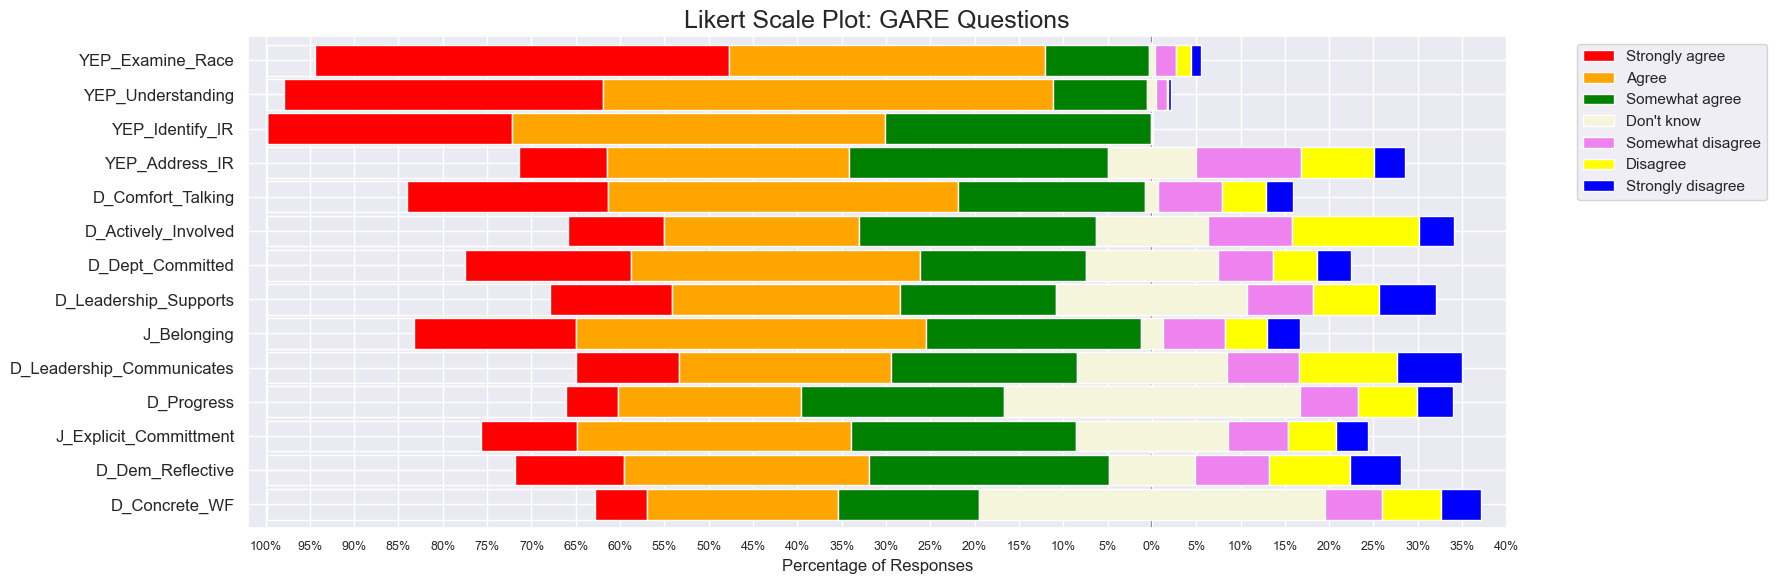

In [301]:
# Likert plots for the likert questions.
## Customizing colors
import plot_likert
my_color_scheme =[
    plot_likert.colors.TRANSPARENT,
    "red",
    "orange",
    "green",
    "beige",
#    "cyan",
    "violet",
    "yellow",
    "blue",
    "grey"    
]
## Scales
another_scale = \
    ["Strongly agree", 
     "Agree",
     "Somewhat agree",
     "Don't know",
     "Somewhat disagree",
     "Disagree",
     "Strongly disagree"
     ]
# data = cat_GARE_df2[["YEP_Examine_Race", "YEP_Understanding", "YEP_Identify_IR", "YEP_Address_IR", "D_Comfort_Talking", 
#                       "D_Actively_Involved", "D_Dept_Committed", "D_Leadership_Supports", "J_Belonging"]]
ax = plot_likert.plot_likert(data1, another_scale, colors=my_color_scheme, plot_percentage=True, width=0.9, figsize=(18,6))
ax.set_title(('Likert Scale Plot: GARE Questions'), fontsize=18)
#ax.legend(loc='left', bbox_to_anchor=(0.5, 0.5))  
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=9)
plt.tight_layout()
plt.show();


In [302]:
# Subset of suggested important Likert scale factors for Analysis
data2 = cat_GARE_df1[['D_More_Active_If_1', 'D_More_Active_If_2', 'D_More_Active_If_3', 'D_More_Active_If_4', 
                      'D_More_Active_If_5', 'D_More_Active_If_6', 'D_More_Active_If_7']]

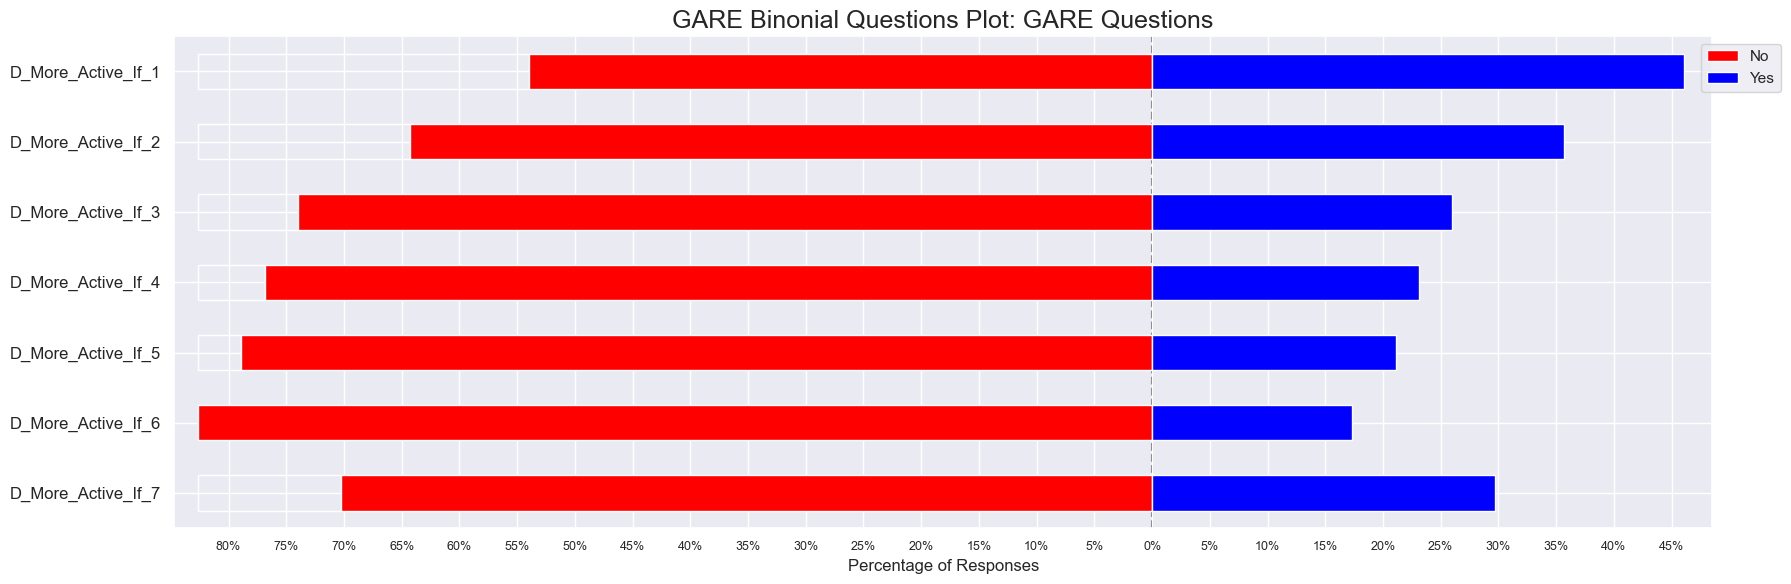

In [303]:
# Likert plots for the likert questions.
## Customizing colors
import plot_likert
my_color_scheme =[
    plot_likert.colors.TRANSPARENT,
    "red",
    "blue",
    "violet",
    "yellow",
    "grey",
    "cyan"    
]
## Scales
another_scale = \
    ["No", 
     "Yes"]
# data = cat_GARE_df2[["YEP_Examine_Race", "YEP_Understanding", "YEP_Identify_IR", "YEP_Address_IR", "D_Comfort_Talking", 
#                       "D_Actively_Involved", "D_Dept_Committed", "D_Leadership_Supports", "J_Belonging"]]
ax = plot_likert.plot_likert(data2, another_scale, colors=my_color_scheme, plot_percentage=True, figsize=(18,6))
ax.set_title(('GARE Binonial Questions Plot: GARE Questions'), fontsize=18)
#ax.legend(loc='left', bbox_to_anchor=(0.5, 0.5))  
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=9)
#plt.xlim([0, 100])
plt.tight_layout()
plt.show();


In [304]:
data_crosstab = pd.crosstab(cat_GARE_df1['Race_Eth'],
                            cat_GARE_df1['YEP_Examine_Race'],
                                margins = False)
print(data_crosstab)


YEP_Examine_Race           Agree  Disagree  Don't know  Somewhat agree  \
Race_Eth                                                                 
Asian                         11         0           0               2   
Black or African American      7         0           1               1   
Hispanic/Latino               54         1           1               9   
Mixed Race                     3         0           0               5   
Native American               25         4           0              10   
Pacific Islander               4         0           1               1   
White                        290        14           4             101   

YEP_Examine_Race           Somewhat disagree  Strongly agree  \
Race_Eth                                                       
Asian                                      0              13   
Black or African American                  0              42   
Hispanic/Latino                            3              63   
Mixed Race   

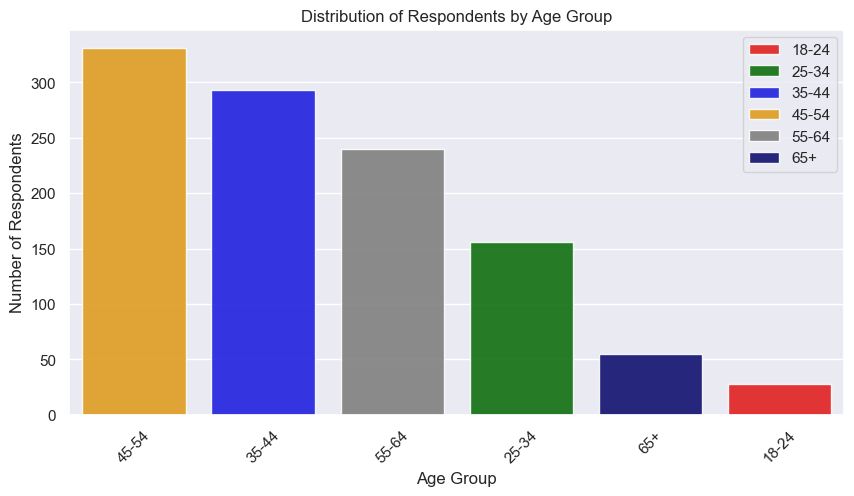

In [305]:
# Age group distribution
Age_count = cat_GARE_df2['AY_Age'].value_counts()

# use the alphabetical order of the model to order the hue values
hue_order = cat_GARE_df2['AY_Age'].unique()
hue_order.sort()

# barplot of the frequency distribution of Age
color = ['red','green','blue','orange','grey','navy', 'yellow']
sns.set(rc = {'figure.figsize':(10,5)})
sns.set(style="darkgrid")
# sns.barplot(x=Age_count.index, y=Age_count.values, hue= Age_count.index, dodge=False, 
#             hue_order=hue_order, order=['18-24', '25-34', '35-44', '45-54', '55-64',
#                                        '65+', 'No response'], palette=color, alpha=0.9)
sns.barplot(x=Age_count.index, y=Age_count.values, hue= Age_count.index, dodge=False, 
            hue_order=hue_order, palette=color, alpha=0.9)
plt.xticks(rotation=45)
plt.title('Distribution of Respondents by Age Group')
plt.ylabel('Number of Respondents', fontsize=12)
plt.xlabel('Age Group', fontsize=12)
plt.show()

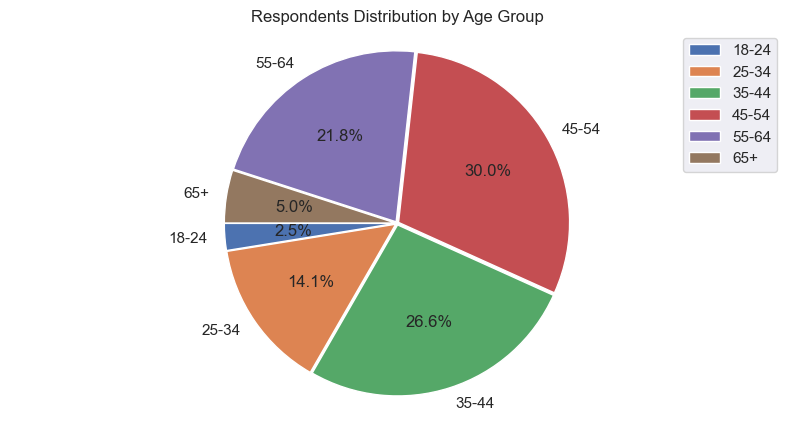

In [306]:
#  Pie chart for Age
labels = cat_GARE_df2['AY_Age'].astype('category').cat.categories.tolist()
counts = cat_GARE_df2['AY_Age'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
# Explode out the 'Chemical' pie piece by offsetting it a greater amount
explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01)
fig1, ax1 = plt.subplots(figsize=(10, 5))
ax1.pie(sizes, 
        #radius=1800, 
        explode=explode, 
        labels=labels, 
        autopct='%1.1f%%', #autopct is show the % on plot
        #shadow=True, 
        startangle=180) 
ax1.axis('equal')
ax1.set_title('Respondents Distribution by Age Group')
plt.legend(labels, loc="best")
plt.show()

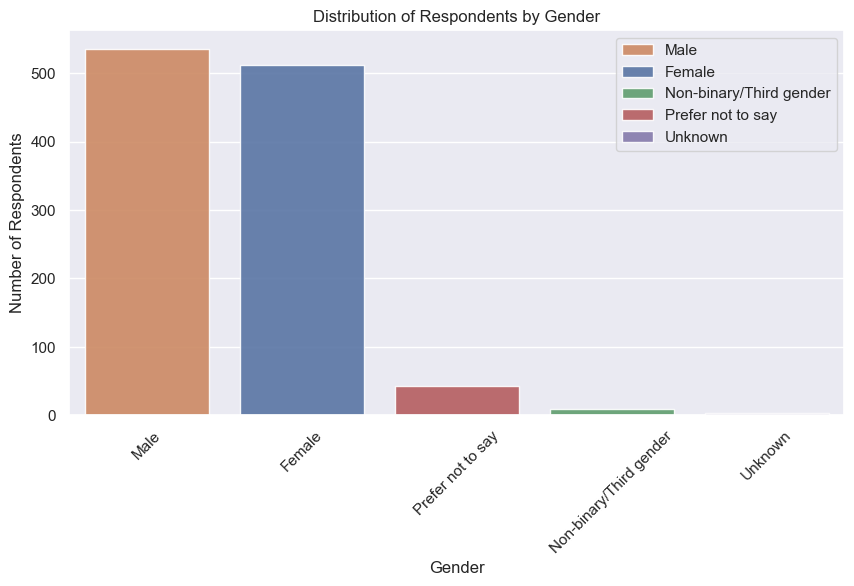

In [307]:
# Gender distribution
Gender_count = cat_GARE_df2['AY_Gender'].value_counts()

# use the alphabetical order of the model to order the hue values
hue_order = cat_GARE_df2['AY_Gender'].unique()
hue_order.sort()

## barplot of the frequency distribution of Gender
sns.set(rc = {'figure.figsize':(10,5)})
sns.set(style="darkgrid")
# sns.barplot(x=Gender_count.index, y=Gender_count.values, hue= Gender_count.index, 
#             dodge=False, hue_order=hue_order, order=['Male', 'Female', 'Non-binary/Third gender',
#                                                      'Prefer not to say', 'Unknown', 'No response'], alpha=0.9)

sns.barplot(x=Gender_count.index, y=Gender_count.values, hue= Gender_count.index, 
            dodge=False, hue_order=hue_order, alpha=0.9)
plt.xticks(rotation=45)
plt.title('Distribution of Respondents by Gender')
plt.ylabel('Number of Respondents', fontsize=12)
plt.xlabel('Gender', fontsize=12)

# reordering the labels
handles, labels = plt.gca().get_legend_handles_labels()

# specify order
order = [1,0,2,3,4]
  
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order])
plt.show()

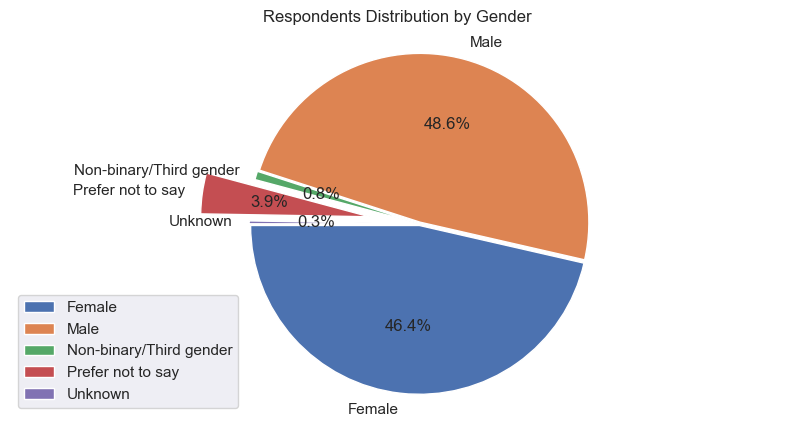

In [308]:
#  Pie chart for AY_Gender
labels = cat_GARE_df2['AY_Gender'].astype('category').cat.categories.tolist()
counts = cat_GARE_df2['AY_Gender'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
# Explode out the 'Chemical' pie piece by offsetting it a greater amount
explode = (0.01, 0.01, 0.01, 0.3, 0.01)
fig1, ax1 = plt.subplots(figsize=(10, 5))
ax1.pie(sizes, 
        #radius=1800, 
        explode=explode, 
        labels=labels, 
        autopct='%1.1f%%', #autopct is show the % on plot
        #shadow=True, 
        startangle=180) 
ax1.axis('equal')
ax1.set_title('Respondents Distribution by Gender')
# reordering the labels
handles, labels = plt.gca().get_legend_handles_labels()

# specify order
order = [1,0,2,3,4]
  
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order])
plt.legend(labels, loc="lower left")
#plt.legend(labels, loc="best")
plt.show()

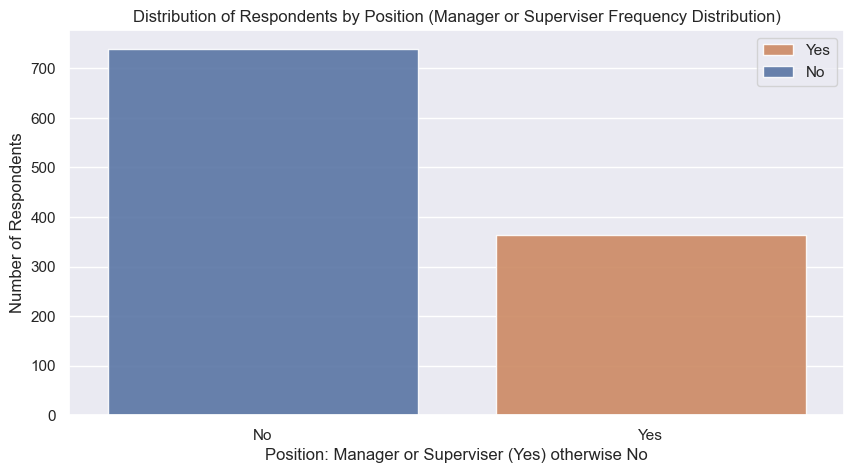

In [309]:
# Manager or Superviser distribution
Supervise_count = cat_GARE_df2['AY_Manage_Supervise'].value_counts()

# use the alphabetical order of the model to order the hue values
hue_order = cat_GARE_df2['AY_Manage_Supervise'].unique()
hue_order.sort()

## barplot of the frequency distribution of Gender
sns.set(rc = {'figure.figsize':(10,5)})
sns.set(style="darkgrid")
sns.barplot(x=Supervise_count.index, y=Supervise_count.values, hue= Supervise_count.index, dodge=False, hue_order=hue_order, alpha=0.9)
plt.xticks(rotation=360)
plt.title('Distribution of Respondents by Position (Manager or Superviser Frequency Distribution)')
plt.ylabel('Number of Respondents', fontsize=12)
plt.xlabel('Position: Manager or Superviser (Yes) otherwise No', fontsize=12)
# reordering the labels
handles, labels = plt.gca().get_legend_handles_labels()
  
# specify order
order = [1,0]
  
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order], loc='upper right')
plt.show()

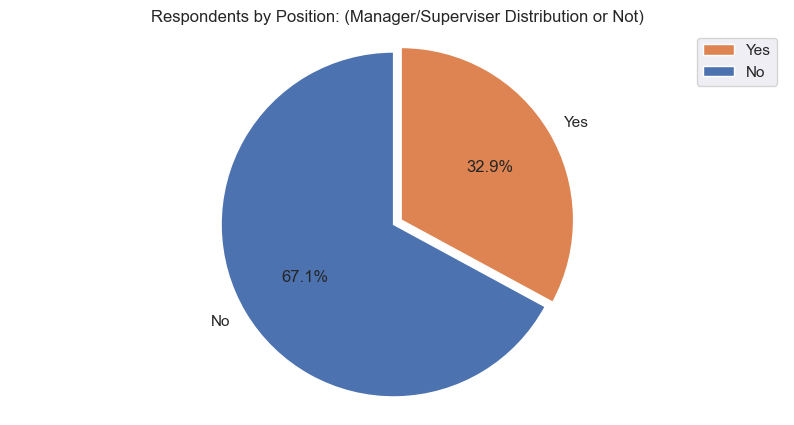

In [310]:
#  Pie chart for Manager or Superviser
labels = cat_GARE_df2['AY_Manage_Supervise'].astype('category').cat.categories.tolist()
counts = cat_GARE_df2['AY_Manage_Supervise'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
# Explode out the 'Chemical' pie piece by offsetting it a greater amount
explode = (0.05, 0.001)
fig1, ax1 = plt.subplots(figsize=(10, 5))
ax1.pie(sizes, 
        #radius=1800, 
        explode=explode, 
        labels=labels, 
        autopct='%1.1f%%', #autopct is show the % on plot
        #shadow=True, 
        startangle=90) 
ax1.axis('equal')
ax1.set_title('Respondents by Position: (Manager/Superviser Distribution or Not)')
# reordering the labels
handles, labels = plt.gca().get_legend_handles_labels()
  
# specify order
order = [1,0]
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order], loc = 'upper right')
#plt.legend(labels, loc="best")
plt.show()

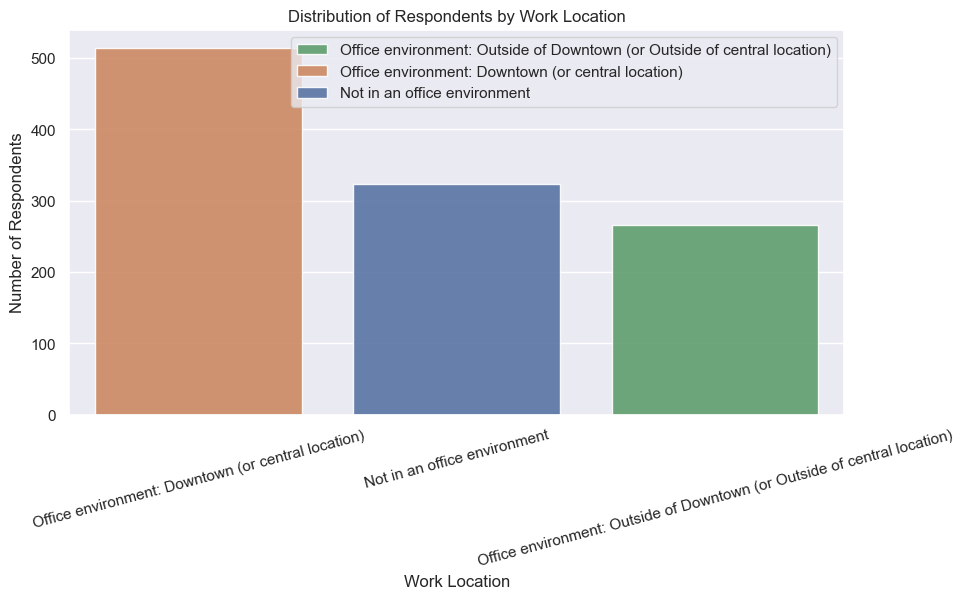

In [311]:
# Work Location distribution
Work_Location_count = cat_GARE_df2['AY_Work_Location'].value_counts()

# use the alphabetical order of the model to order the hue values
hue_order = cat_GARE_df2['AY_Work_Location'].unique()
hue_order.sort()

## barplot of the frequency distribution of Gender
sns.set(rc = {'figure.figsize':(10,5)})
sns.set(style="darkgrid")
# sns.barplot(x=Work_Location_count.index, y=Work_Location_count.values, hue= Work_Location_count.index, 
#             dodge=False, hue_order=hue_order, 
#             order=['Office environment: Downtown(or central location)', 'Office environment: Outside of Downtown(or Outside of central location)',
#                   'Not in an office environment', 'No response'], alpha=0.9)
sns.barplot(x=Work_Location_count.index, y=Work_Location_count.values, hue= Work_Location_count.index, 
            dodge=False, hue_order=hue_order, alpha=0.9)
plt.xticks(rotation=15)
plt.title('Distribution of Respondents by Work Location')
plt.ylabel('Number of Respondents', fontsize=12)
plt.xlabel('Work Location', fontsize=12)

# reordering the labels
handles, labels = plt.gca().get_legend_handles_labels()

# specify order
order = [2,1,0]
  
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order])
plt.show()

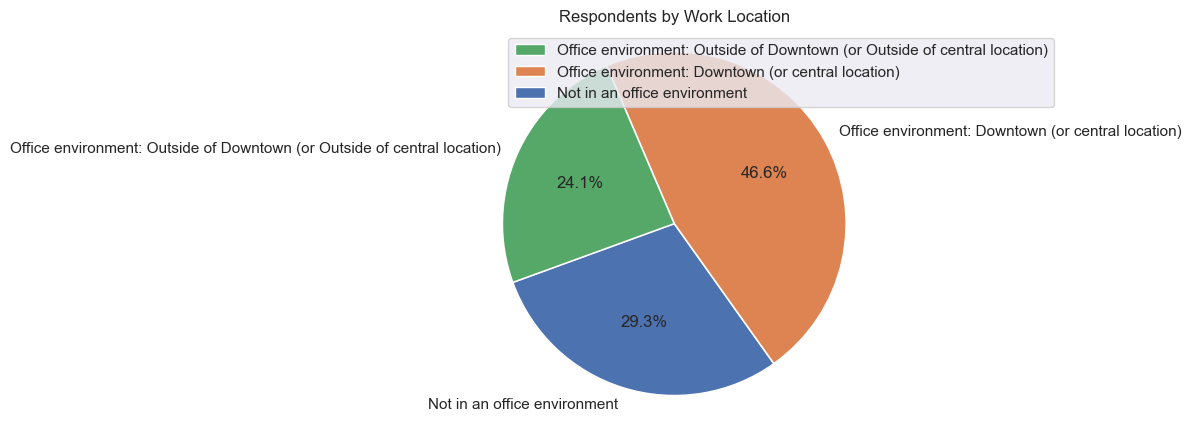

In [312]:
#  Pie chart for Work Location
labels = cat_GARE_df2['AY_Work_Location'].astype('category').cat.categories.tolist()
counts = cat_GARE_df2['AY_Work_Location'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
# Explode out the 'Chemical' pie piece by offsetting it a greater amount
explode = (0.001, 0.001, 0.001)
fig1, ax1 = plt.subplots(figsize=(10, 5))
ax1.pie(sizes, 
        #radius=1800, 
        explode=explode, 
        labels=labels, 
        autopct='%1.1f%%', #autopct is show the % on plot
        #shadow=True, 
        startangle=200) 
ax1.axis('equal')
ax1.set_title('Respondents by Work Location')
#plt.legend(labels, loc="best")
# reordering the labels
handles, labels = plt.gca().get_legend_handles_labels()

# specify order
order = [2,1,0]
  
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order])
plt.show()

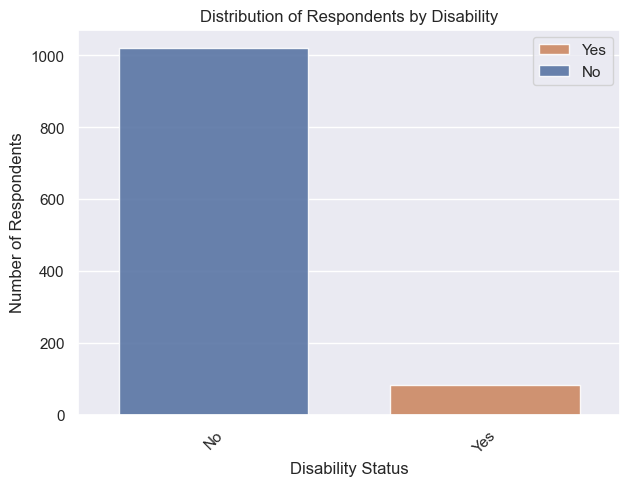

In [313]:
# Disability distribution
Disability_count = cat_GARE_df2['AY_Disability'].value_counts()

# use the alphabetical order of the model to order the hue values
hue_order = cat_GARE_df2['AY_Disability'].unique()
hue_order.sort()

## barplot of the frequency distribution of Gender
sns.set(rc = {'figure.figsize':(7,5)})
sns.set(style="darkgrid")
sns.barplot(x=Disability_count.index, y=Disability_count.values, hue= Disability_count.index, 
            dodge=False, hue_order=hue_order, width=0.7, order=['No','Yes'], alpha=0.9)
#plt.legend(labels, loc="upper right")
plt.xticks(rotation=45)
plt.title('Distribution of Respondents by Disability')
plt.ylabel('Number of Respondents', fontsize=12)
plt.xlabel('Disability Status', fontsize=12)
# reordering the labels
handles, labels = plt.gca().get_legend_handles_labels()  
# specify order
order = [1,0]
#plt.legend(labels, loc="upper right")  
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order], loc="upper right")
# plt.legend(labels, loc="upper right")
plt.show()

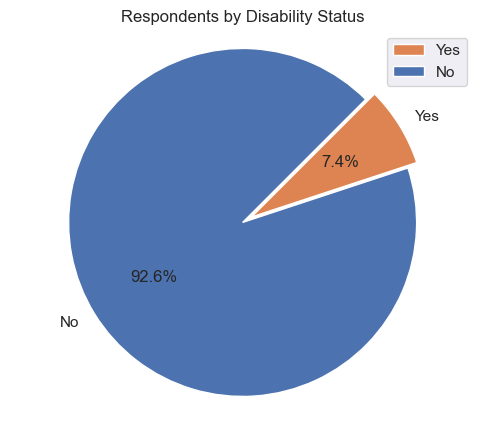

In [314]:
#  Pie chart for Disability
labels = cat_GARE_df2['AY_Disability'].astype('category').cat.categories.tolist()
counts = cat_GARE_df2['AY_Disability'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
# Explode out the 'Chemical' pie piece by offsetting it a greater amount
explode = (0.01, 0.05)
fig1, ax1 = plt.subplots(figsize=(6, 5))
ax1.pie(sizes, 
        #radius=1800, 
        explode=explode, 
        labels=labels, 
        autopct='%1.1f%%', #autopct is show the % on plot
        #shadow=True, 
        startangle=45) 
ax1.axis('equal')
ax1.set_title('Respondents by Disability Status')
# reordering the labels
handles, labels = plt.gca().get_legend_handles_labels()
  
# specify order
order = [1,0]
  
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order])
#plt.legend(labels, loc="best")
plt.show()

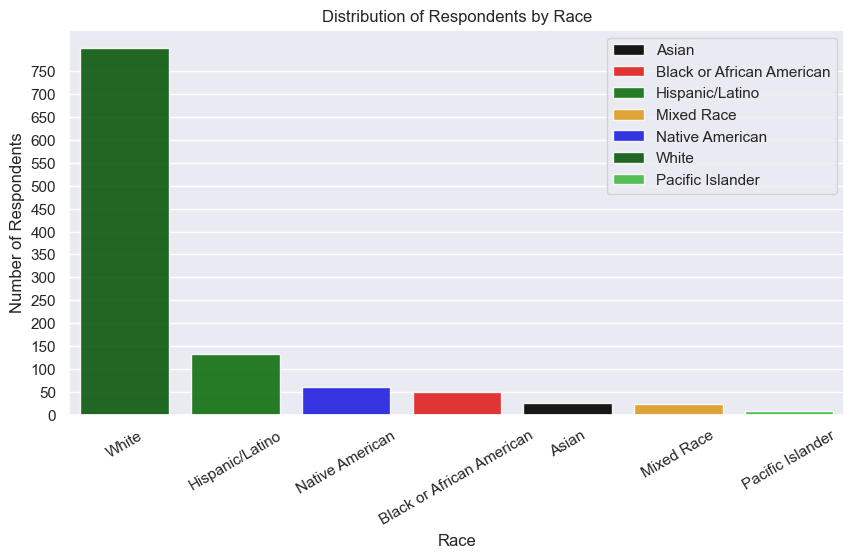

In [315]:
# Race Ethnicity distribution
Race_count = cat_GARE_df2['Race_Eth'].value_counts()

# use the alphabetical order of the model to order the hue values
hue_order = cat_GARE_df2['Race_Eth'].unique()
hue_order.sort()

## barplot of the frequency distribution of Gender
color = ['black','red','green','orange','blue','limegreen','darkgreen','royalblue','navy', 'yellow', 'grey']
sns.set(rc = {'figure.figsize':(10,5)})
sns.set(style="darkgrid")
# sns.barplot(x=Race_count.index, y=Race_count.values, hue= Race_count.index, dodge=False, hue_order=hue_order, 
#             order=['Asian', 'Black or African American', 'Hispanic/Latino', 'Mixed Race', 'Native American',
#                   'Pacific Islander', 'White', 'No response'], palette=color, alpha=0.9)

sns.barplot(x=Race_count.index, y=Race_count.values, hue= Race_count.index, dodge=False, hue_order=hue_order, 
            palette=color, alpha=0.9)
plt.xticks(rotation=30)
plt.title('Distribution of Respondents by Race')
plt.ylabel('Number of Respondents', fontsize=12)
plt.xlabel('Race', fontsize=12)
plt.yticks(np.arange(0, max(Race_count.values), 50))
# reordering the labels
handles, labels = plt.gca().get_legend_handles_labels()
  
# specify order
order = [0,1,2,3,4,6,5]
  
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order])

plt.show()

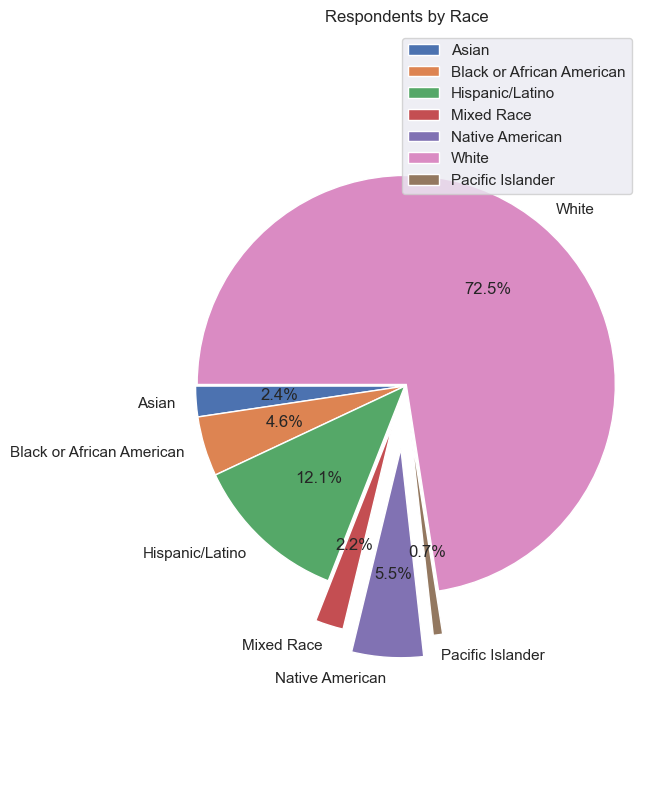

In [316]:
#  Pie chart for AY_Gender
labels = cat_GARE_df2['Race_Eth'].astype('category').cat.categories.tolist()
counts = cat_GARE_df2['Race_Eth'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
# Explode out the 'Chemical' pie piece by offsetting it a greater amount
explode = (0.001, 0.001, 0.001, 0.2, 0.3, 0.2, 0.01)
fig1, ax1 = plt.subplots(figsize=(6, 10))
ax1.pie(sizes, 
        #radius=1800, 
        explode=explode, 
        labels=labels, 
        autopct='%1.1f%%', #autopct is show the % on plot
        #shadow=True, 
        startangle=180) 
ax1.axis('equal')
ax1.set_title('Respondents by Race')
# reordering the labels
handles, labels = plt.gca().get_legend_handles_labels()

# specify order
order = [0,1,2,3,4,6,5]
  
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order], loc="upper right")
#plt.legend(labels, loc="best")
plt.show()

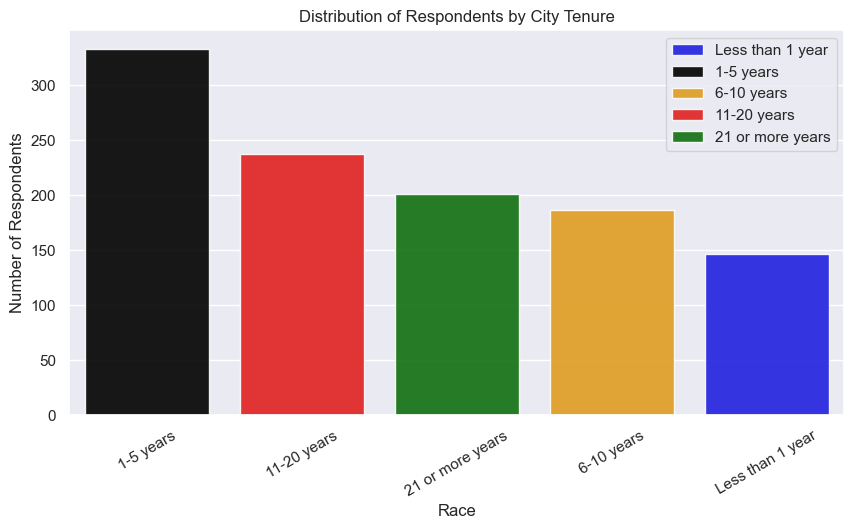

In [317]:
# City Tenure distribution
City_Tenure_count = cat_GARE_df2['AY_City_Tenure'].value_counts()

# use the alphabetical order of the model to order the hue values
hue_order = cat_GARE_df2['AY_City_Tenure'].unique()
hue_order.sort()

## barplot of the frequency distribution of Gender
color = ['black','red','green','orange','blue','limegreen','darkgreen','royalblue','navy', 'yellow', 'grey']
sns.set(rc = {'figure.figsize':(10,5)})
sns.set(style="darkgrid")
# sns.barplot(x=Race_count.index, y=Race_count.values, hue= Race_count.index, dodge=False, hue_order=hue_order, 
#             order=['Asian', 'Black or African American', 'Hispanic/Latino', 'Mixed Race', 'Native American',
#                   'Pacific Islander', 'White', 'No response'], palette=color, alpha=0.9)

sns.barplot(x=City_Tenure_count.index, y=City_Tenure_count.values, hue= City_Tenure_count.index, dodge=False, hue_order=hue_order, 
            palette=color, alpha=0.9)
plt.xticks(rotation=30)
plt.title('Distribution of Respondents by City Tenure')
plt.ylabel('Number of Respondents', fontsize=12)
plt.xlabel('Race', fontsize=12)
plt.yticks(np.arange(0, max(City_Tenure_count.values), 50))
# reordering the labels
handles, labels = plt.gca().get_legend_handles_labels()
  
# specify order
order = [4,0,3,1,2]
  
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order], loc = "upper right")

plt.show()

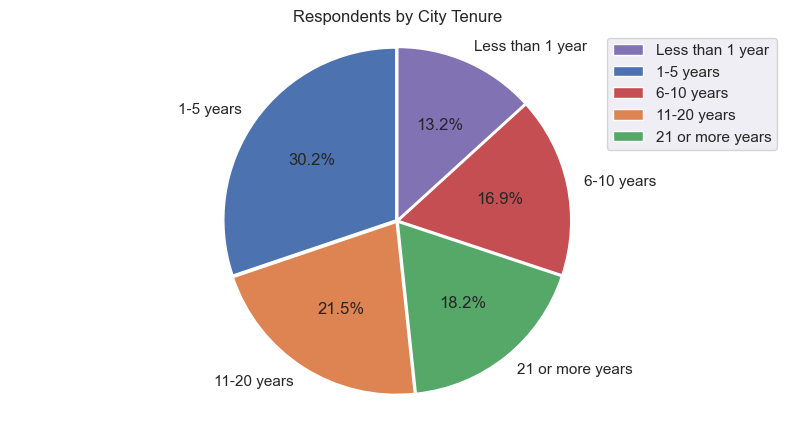

In [318]:
#  Pie chart for AY_Gender
labels = cat_GARE_df2['AY_City_Tenure'].astype('category').cat.categories.tolist()
counts = cat_GARE_df2['AY_City_Tenure'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
# Explode out the 'Chemical' pie piece by offsetting it a greater amount
explode = (0.01, 0.01, 0.01, 0.01, 0.01)
fig1, ax1 = plt.subplots(figsize=(10, 5))
ax1.pie(sizes, 
        #radius=1800, 
        explode=explode, 
        labels=labels, 
        autopct='%1.1f%%', #autopct is show the % on plot
        #shadow=True, 
        startangle=90) 
ax1.axis('equal')
ax1.set_title('Respondents by City Tenure')
# reordering the labels
handles, labels = plt.gca().get_legend_handles_labels()

# specify order
order = [4,0,3,1,2]
  
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order])
#plt.legend(labels, loc="best")
plt.show()

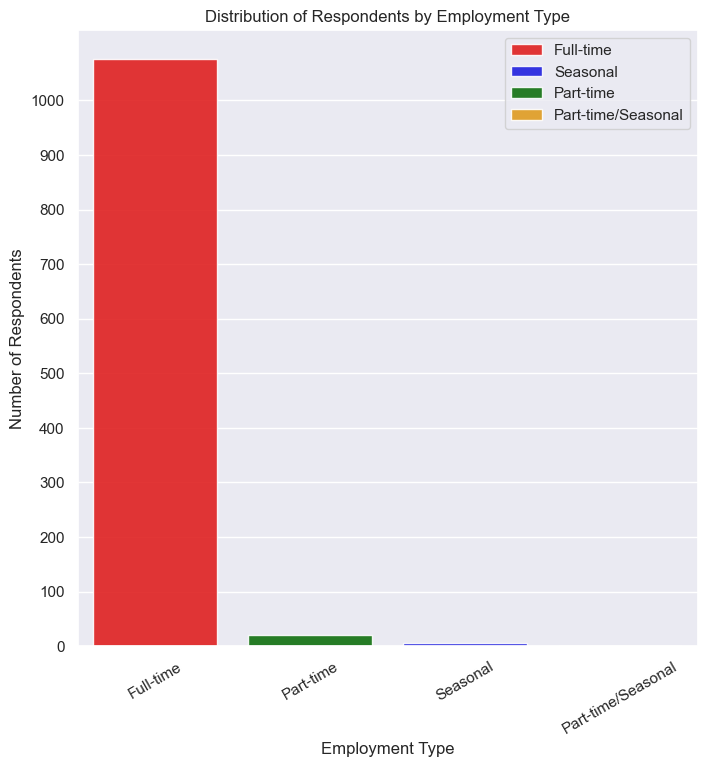

In [319]:
# Employment Type distribution
Employment_Type_count = cat_GARE_df2['Employment_Type'].value_counts()

# use the alphabetical order of the model to order the hue values
hue_order = cat_GARE_df2['Employment_Type'].unique()
hue_order.sort()

## barplot of the frequency distribution of Gender
color = ['red','green','orange','blue','limegreen','darkgreen','royalblue','navy', 'yellow', 'grey']
sns.set(rc = {'figure.figsize':(8,8)})
sns.set(style="darkgrid")
# sns.barplot(x=Race_count.index, y=Race_count.values, hue= Race_count.index, dodge=False, hue_order=hue_order, 
#             order=['Asian', 'Black or African American', 'Hispanic/Latino', 'Mixed Race', 'Native American',
#                   'Pacific Islander', 'White', 'No response'], palette=color, alpha=0.9)

sns.barplot(x=Employment_Type_count.index, y=Employment_Type_count.values, hue= Employment_Type_count.index, dodge=False, hue_order=hue_order, 
            palette=color, alpha=0.9)
plt.xticks(rotation=30)
plt.title('Distribution of Respondents by Employment Type')
plt.ylabel('Number of Respondents', fontsize=12)
plt.xlabel('Employment Type', fontsize=12)
plt.yticks(np.arange(0, max(Employment_Type_count.values), 100))
# reordering the labels
handles, labels = plt.gca().get_legend_handles_labels()
  
# specify order
order = [0,3,1,2]
  
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order], loc = "upper right")

plt.show()

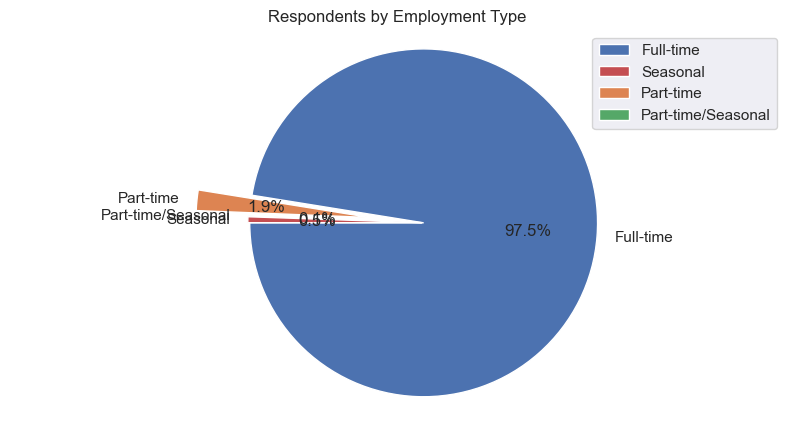

In [320]:
#  Pie chart for Employment Type
labels = cat_GARE_df2['Employment_Type'].astype('category').cat.categories.tolist()
counts = cat_GARE_df2['Employment_Type'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
# Explode out the 'Chemical' pie piece by offsetting it a greater amount
explode = (0.01, 0.3, 0.0, 0.001)
fig1, ax1 = plt.subplots(figsize=(10, 5))
ax1.pie(sizes, 
        #radius=1800, 
        explode=explode, 
        labels=labels, 
        autopct='%1.1f%%', #autopct is show the % on plot
        #shadow=True, 
        startangle=180) 
ax1.axis('equal')
ax1.set_title('Respondents by Employment Type')
# reordering the labels
handles, labels = plt.gca().get_legend_handles_labels()

# specify order
order = [0,3,1,2]
  
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order], loc = 'upper right')
#plt.legend(labels, loc="best")
plt.show()

''

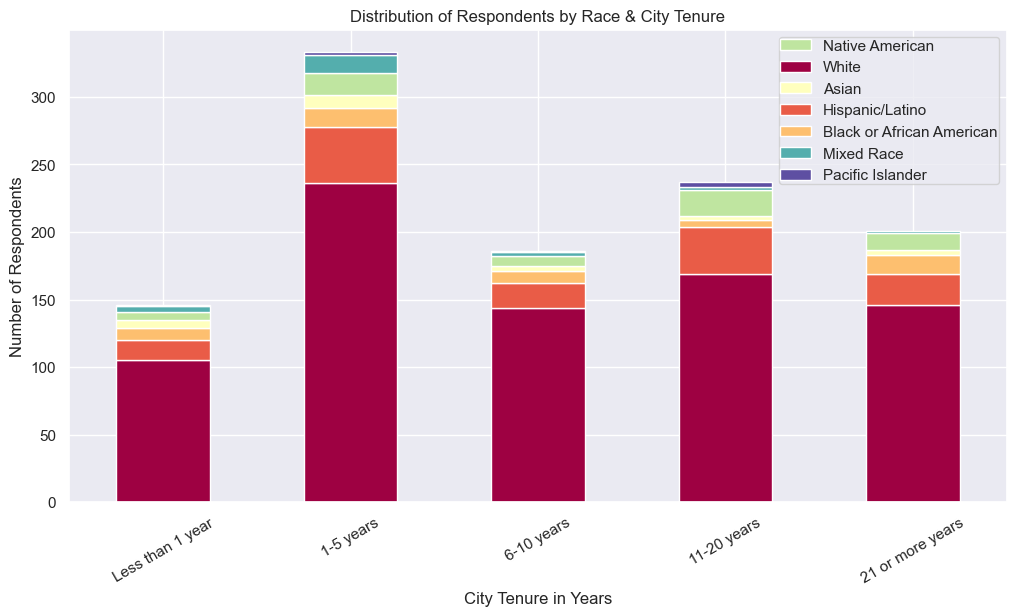

In [321]:
# Stacked barplot with pandas with different palette
City_Tenure_count1 = cat_GARE_df2.loc[cat_GARE_df2['AY_City_Tenure']== 'Less than 1 year', :]['Race_Eth'].value_counts()
City_Tenure_count2 = cat_GARE_df2.loc[cat_GARE_df2['AY_City_Tenure']== '1-5 years', :]['Race_Eth'].value_counts()
City_Tenure_count3 = cat_GARE_df2.loc[cat_GARE_df2['AY_City_Tenure']== '6-10 years', :]['Race_Eth'].value_counts()
City_Tenure_count4 = cat_GARE_df2.loc[cat_GARE_df2['AY_City_Tenure']== '11-20 years', :]['Race_Eth'].value_counts()
City_Tenure_count5 = cat_GARE_df2.loc[cat_GARE_df2['AY_City_Tenure']== '21 or more years', :]['Race_Eth'].value_counts()
df_plot  = pd.DataFrame([City_Tenure_count1,City_Tenure_count2, City_Tenure_count3, City_Tenure_count4, City_Tenure_count5])

#df_new = df_plot.rename({'City_Tenure_count1': 'Less than 1 year'})
df_plot.index=['Less than 1 year','1-5 years', '6-10 years', '11-20 years', '21 or more years']
# df_new = df_plot.rename({'City_Tenure_count1': 'Row_1'})
# Bar plot
sns.set(rc = {'figure.figsize':(10,6)})
df_plot.plot(kind='bar',stacked=True, colormap='Spectral', width = 0.5, title='Distribution of Respondents by Race & City Tenure')
# reordering the labels
handles, labels = plt.gca().get_legend_handles_labels()
  
# specify order
order = [4,0,3,1,2,5,6]
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order], loc = "upper right",  handlelength=2.0, borderpad=0.1)
plt.xticks(rotation=30)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xlabel('City Tenure in Years', fontsize=12)
plt.tight_layout(pad=0.1)
;

''

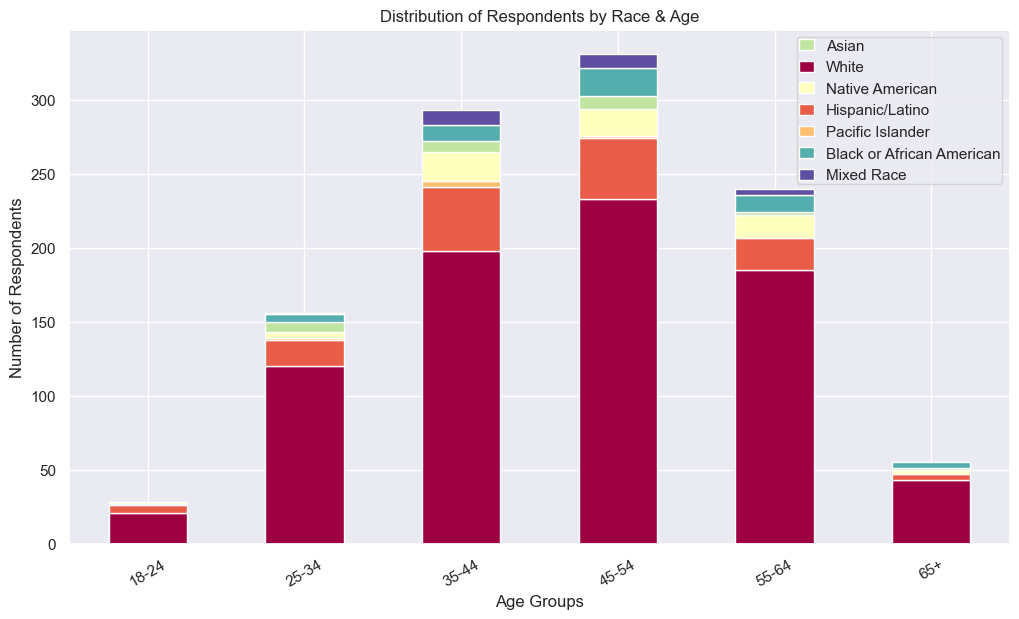

In [322]:
# Stacked barplot with pandas with different palette
Age_count1 = cat_GARE_df2.loc[cat_GARE_df2['AY_Age']== '18-24', :]['Race_Eth'].value_counts()
Age_count2 = cat_GARE_df2.loc[cat_GARE_df2['AY_Age']== '25-34', :]['Race_Eth'].value_counts()
Age_count3 = cat_GARE_df2.loc[cat_GARE_df2['AY_Age']== '35-44', :]['Race_Eth'].value_counts()
Age_count4 = cat_GARE_df2.loc[cat_GARE_df2['AY_Age']== '45-54', :]['Race_Eth'].value_counts()
Age_count5 = cat_GARE_df2.loc[cat_GARE_df2['AY_Age']== '55-64', :]['Race_Eth'].value_counts()
Age_count6 = cat_GARE_df2.loc[cat_GARE_df2['AY_Age']== '65+', :]['Race_Eth'].value_counts()
df_plot  = pd.DataFrame([Age_count1,Age_count2, Age_count3, Age_count4, Age_count5, Age_count6])

#df_new = df_plot.rename({'City_Tenure_count1': 'Less than 1 year'})
df_plot.index=['18-24','25-34', '35-44', '45-54', '55-64', '65+']
# df_new = df_plot.rename({'City_Tenure_count1': 'Row_1'})
# Bar plot
sns.set(rc = {'figure.figsize':(10,6)})
df_plot.plot(kind='bar',stacked=True, colormap='Spectral', width = 0.5, title='Distribution of Respondents by Race & Age')
# reordering the labels
handles, labels = plt.gca().get_legend_handles_labels()
  
# specify order
order = [4,0,3,1,2,5,6]
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order], loc = "upper right",  handlelength=1.0, borderpad=0.1)
plt.xticks(rotation=30)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xlabel('Age Groups', fontsize=12)
plt.tight_layout(pad=0.01)
;

''

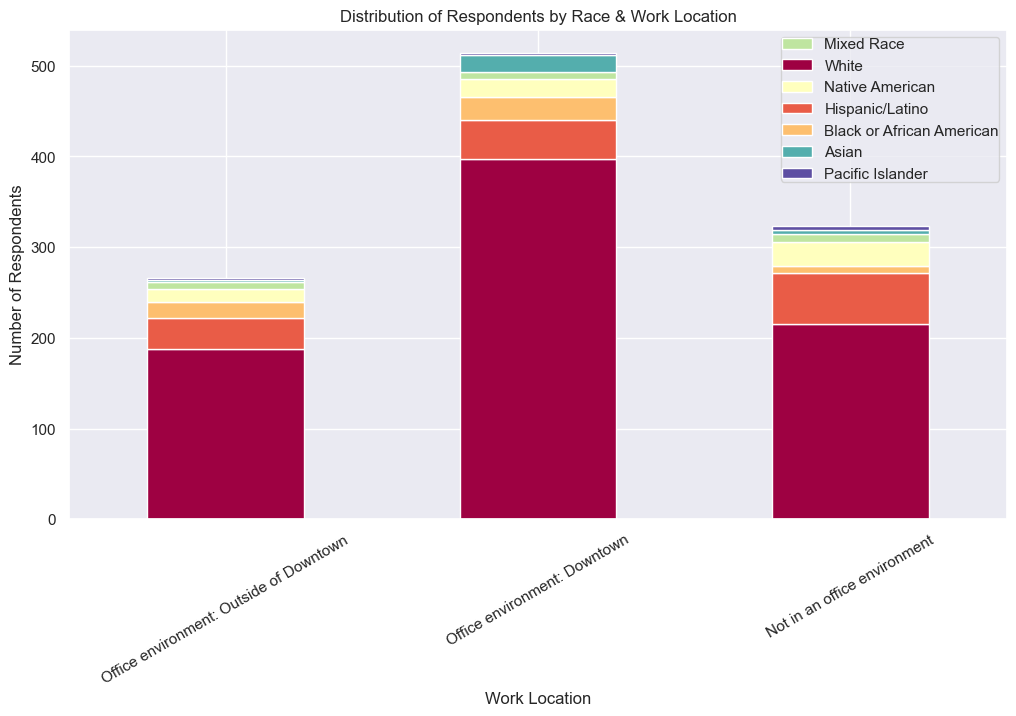

In [323]:
# Stacked barplot with pandas with different palette
Work_Location_count1 = cat_GARE_df2.loc[cat_GARE_df2['AY_Work_Location']== 'Office environment: Outside of Downtown (or Outside of central location)', :]['Race_Eth'].value_counts()
Work_Location_count2 = cat_GARE_df2.loc[cat_GARE_df2['AY_Work_Location']== 'Office environment: Downtown (or central location)', :]['Race_Eth'].value_counts()
Work_Location_count3 = cat_GARE_df2.loc[cat_GARE_df2['AY_Work_Location']== 'Not in an office environment', :]['Race_Eth'].value_counts()
df_plot  = pd.DataFrame([Work_Location_count1,Work_Location_count2, Work_Location_count3])

#df_new = df_plot.rename({'City_Tenure_count1': 'Less than 1 year'})
df_plot.index=['Office environment: Outside of Downtown','Office environment: Downtown', 'Not in an office environment']
# df_new = df_plot.rename({'City_Tenure_count1': 'Row_1'})
# Bar plot
sns.set(rc = {'figure.figsize':(10,7)})
df_plot.plot(kind='bar',stacked=True, colormap='Spectral', width = 0.5, title='Distribution of Respondents by Race & Work Location')
# reordering the labels
handles, labels = plt.gca().get_legend_handles_labels()
  
# specify order
order = [4,0,3,1,2,5,6]
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order], loc = "upper right",  handlelength=2, borderpad=0.01)
plt.xticks(rotation=30)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xlabel('Work Location', fontsize=12)
plt.tight_layout(pad=0.1)
;

''

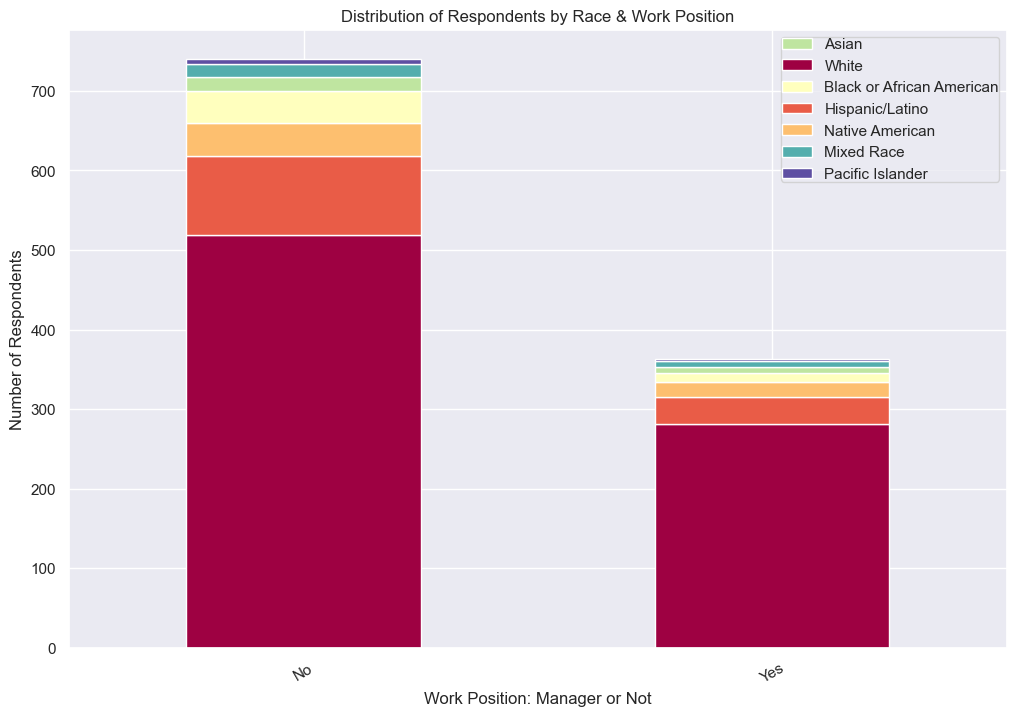

In [324]:
# Stacked barplot with pandas with different palette
Manage_Supervise_count1 = cat_GARE_df2.loc[cat_GARE_df2['AY_Manage_Supervise']== 'No', :]['Race_Eth'].value_counts()
Manage_Supervise_count2 = cat_GARE_df2.loc[cat_GARE_df2['AY_Manage_Supervise']== 'Yes', :]['Race_Eth'].value_counts()
df_plot  = pd.DataFrame([Manage_Supervise_count1,Manage_Supervise_count2])

#df_new = df_plot.rename({'City_Tenure_count1': 'Less than 1 year'})
df_plot.index=['No','Yes']
# df_new = df_plot.rename({'City_Tenure_count1': 'Row_1'})
# Bar plot
sns.set(rc = {'figure.figsize':(10,7)})
df_plot.plot(kind='bar',stacked=True, colormap='Spectral', width = 0.5, title='Distribution of Respondents by Race & Work Position')
# reordering the labels
handles, labels = plt.gca().get_legend_handles_labels()
  
# specify order
order = [4,0,3,1,2,5,6]
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order], loc = "upper right",  handlelength=2, borderpad=0.01)
plt.xticks(rotation=30)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xlabel('Work Position: Manager or Not', fontsize=12)
plt.tight_layout(pad=0.1)
;

''

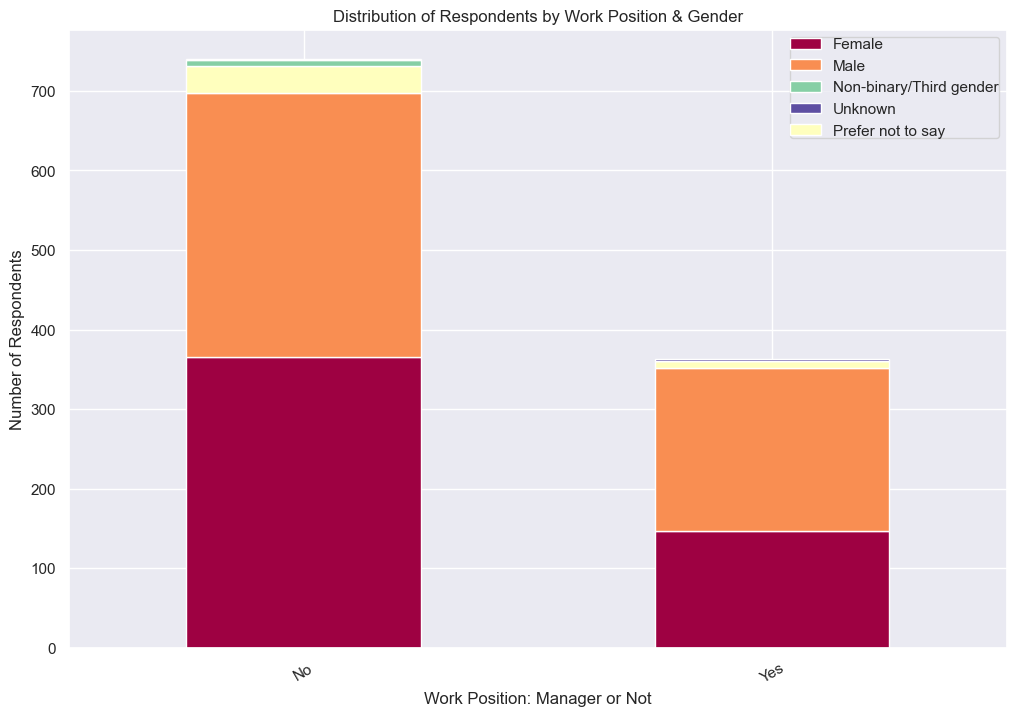

In [325]:
# Stacked barplot with pandas with different palette
Manage_Supervise_count1 = cat_GARE_df2.loc[cat_GARE_df2['AY_Manage_Supervise']== 'No', :]['AY_Gender'].value_counts()
Manage_Supervise_count2 = cat_GARE_df2.loc[cat_GARE_df2['AY_Manage_Supervise']== 'Yes', :]['AY_Gender'].value_counts()
df_plot  = pd.DataFrame([Manage_Supervise_count1,Manage_Supervise_count2])

#df_new = df_plot.rename({'City_Tenure_count1': 'Less than 1 year'})
df_plot.index=['No','Yes']
# df_new = df_plot.rename({'City_Tenure_count1': 'Row_1'})
# Bar plot
sns.set(rc = {'figure.figsize':(10,7)})
df_plot.plot(kind='bar',stacked=True, colormap='Spectral', width = 0.5, title='Distribution of Respondents by Work Position & Gender')
# reordering the labels
handles, labels = plt.gca().get_legend_handles_labels()
  
# specify order
order = [0,1,3,4,2]
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order], loc = "upper right",  handlelength=2, borderpad=0.01)
plt.xticks(rotation=30)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xlabel('Work Position: Manager or Not', fontsize=12)
plt.tight_layout(pad=0.1)
;

In [326]:
# Interactive 3-D distribution Race vs Age vs Gender: Not very informative
fig = px.scatter_3d(cat_GARE_df2, x='Race_Eth', y='AY_Gender', z='AY_Age',
              color='AY_Disability')
fig.show()


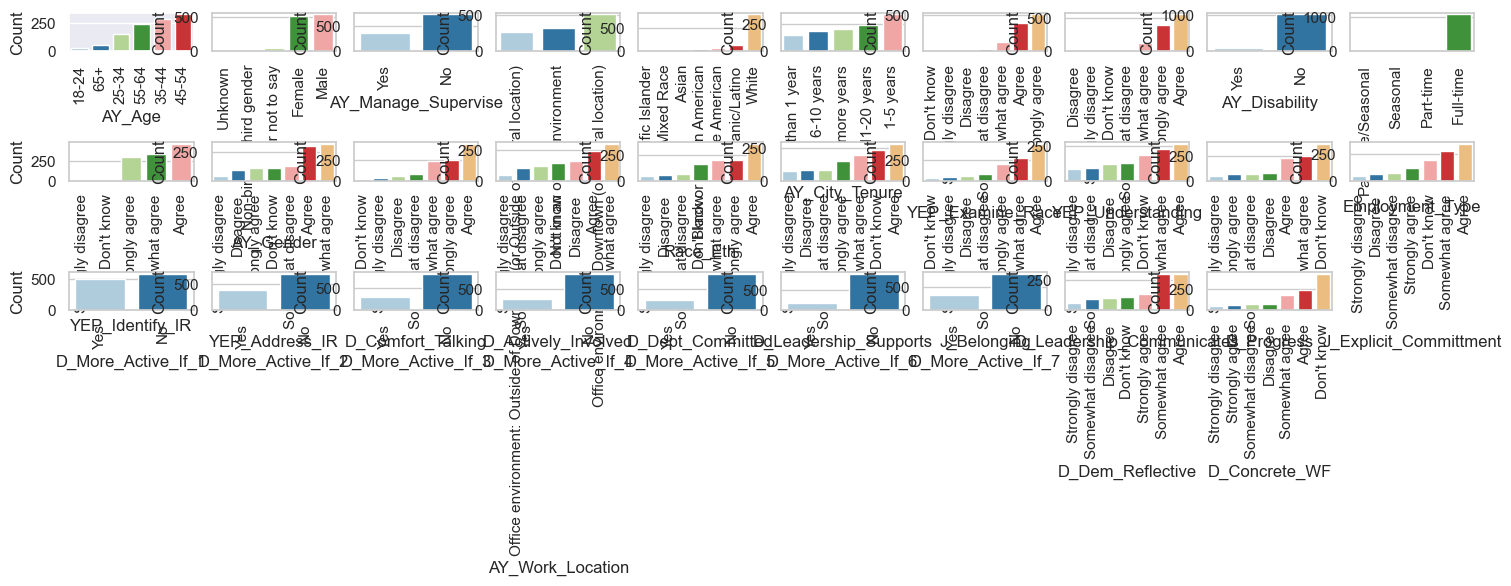

In [327]:
# Dataset factors distribution.
plt.figure(figsize=(15,15))
for i, col in enumerate(cat_GARE_df2.columns):
    sns.set_palette(sns.color_palette("Paired"))
    ax = plt.subplot(12,10,i+1)
    sns.countplot(
        x=col, data = cat_GARE_df2, ax = ax, 
        order = cat_GARE_df2[col].value_counts(ascending=True).index
    )
    sns.set_style('whitegrid')
    plt.xticks(rotation=90)
    plt.ylabel("Count")
    plt.tight_layout()
plt.show()

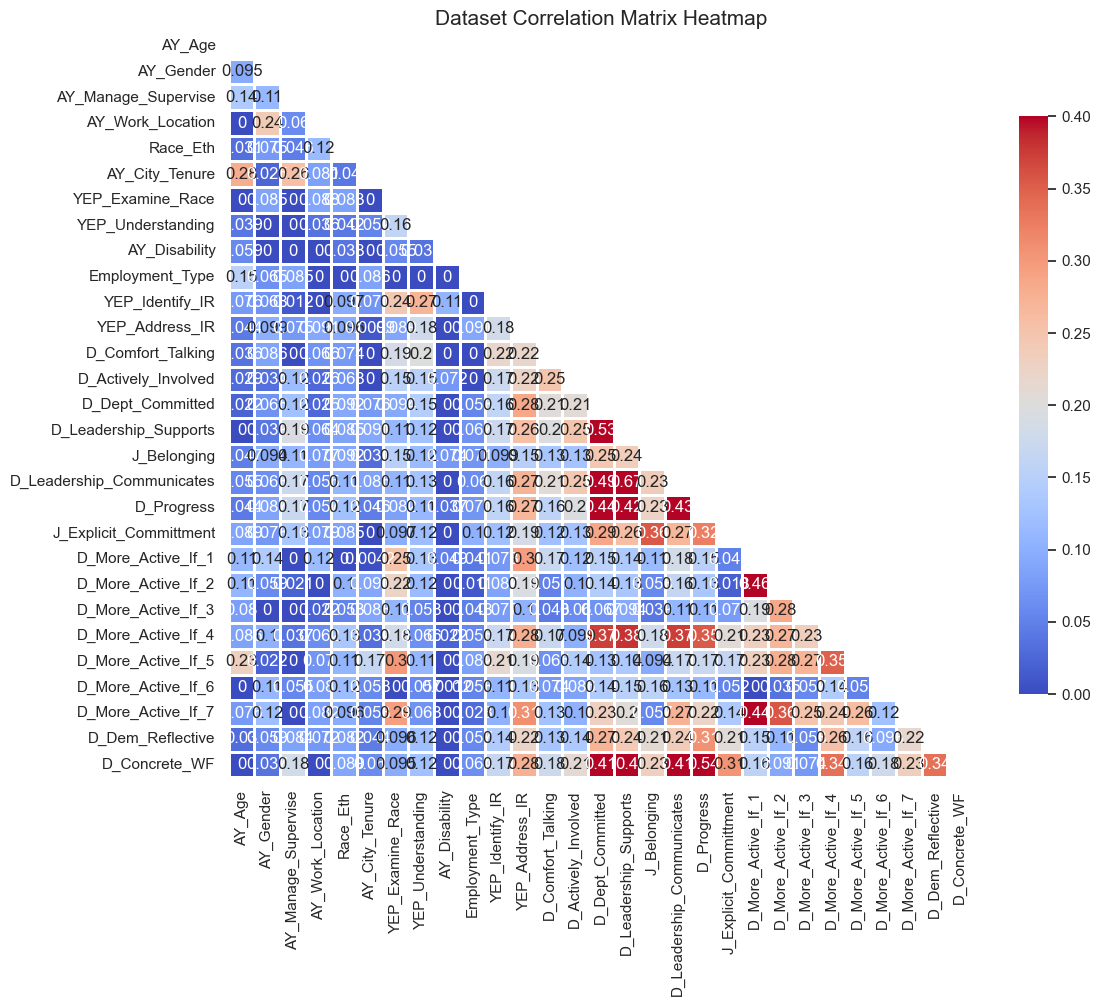

In [328]:
# Heatmap correlation matrix : Dataset
import itertools

def cramers_corrected_stat(confusion_matrix):
    """
    Calculates the corrected Cramer's V statistic
    
    Args:
        confusion_matrix: The confusion matrix of the variables to calculate the statistic on
    
    Returns:
        The corrected Cramer'v V statistic
    """
    
    chi2, _, _, _ = scipy.stats.chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cols = list(cat_GARE_df2.columns.values)
corrM = np.zeros((len(cols),len(cols)))

# Calculate correlations of every combination of variables
for col1, col2 in itertools.combinations(cols, 2):

    A, B = cat_GARE_df2[col1], cat_GARE_df2[col2]
    
    idx1, idx2 = cols.index(col1), cols.index(col2)
    dfObserved = pd.crosstab(A,B) 
    corrM[idx1, idx2] = cramers_corrected_stat(dfObserved.values)
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)
max_corr = 0.4
# Mask to get lower triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#cmap = sns.cubehelix_palette(light=0.75, as_cmap=True)

# Draw the heatmap with the mask 
fig = plt.figure(figsize=(12, 10))

sns.heatmap(corr, mask=mask, vmax=max_corr, cmap="coolwarm", square=True, linewidths=.75, cbar_kws={"shrink": .75}, annot=True)
plt.title('Dataset Correlation Matrix Heatmap', fontsize = 15) # title with fontsize 15
plt.show()

In [105]:
import sweetviz as sz
# generate report
sweet_report = sz.analyze(cat_GARE_df2)
 
# show the output
# sweetviz.show_notebook()
sweet_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [329]:
# Checking variables for the analysis
cat_GARE_df2.keys()

Index(['AY_Age', 'AY_Gender', 'AY_Manage_Supervise', 'AY_Work_Location',
       'Race_Eth', 'AY_City_Tenure', 'YEP_Examine_Race', 'YEP_Understanding',
       'AY_Disability', 'Employment_Type', 'YEP_Identify_IR', 'YEP_Address_IR',
       'D_Comfort_Talking', 'D_Actively_Involved', 'D_Dept_Committed',
       'D_Leadership_Supports', 'J_Belonging', 'D_Leadership_Communicates',
       'D_Progress', 'J_Explicit_Committment', 'D_More_Active_If_1',
       'D_More_Active_If_2', 'D_More_Active_If_3', 'D_More_Active_If_4',
       'D_More_Active_If_5', 'D_More_Active_If_6', 'D_More_Active_If_7',
       'D_Dem_Reflective', 'D_Concrete_WF'],
      dtype='object')

In [330]:
# Objects/Factors summary
rp.summary_cat(cat_GARE_df2[['AY_Age', 'AY_Gender', 'AY_Manage_Supervise', 'AY_Work_Location',
       'Race_Eth', 'AY_City_Tenure', 'YEP_Examine_Race', 'YEP_Understanding',
       'AY_Disability', 'YEP_Identify_IR', 'YEP_Address_IR',
       'D_Comfort_Talking', 'D_Actively_Involved', 'D_Dept_Committed',
       'D_Leadership_Supports', 'J_Belonging', 'D_Leadership_Communicates',
       'D_Progress', 'J_Explicit_Committment', 'D_More_Active_If_1',
       'D_More_Active_If_2', 'D_More_Active_If_3', 'D_More_Active_If_4',
       'D_More_Active_If_5', 'D_More_Active_If_6', 'D_More_Active_If_7',
       'D_Dem_Reflective', 'D_Concrete_WF']])

Variable  \
0                       AY_Age   
1                                
2                                
3                                
4                                
5                                
6                    AY_Gender   
7                                
8                                
9                                
10                               
11         AY_Manage_Supervise   
12                               
13            AY_Work_Location   
14                               
15                               
16                    Race_Eth   
17                               
18                               
19                               
20                               
21                               
22                               
23              AY_City_Tenure   
24                               
25                               
26                               
27                               
28            YEP_Examine_Race   
29                               
30                               
31                               
32                               
33                               
34                               
35           YEP_Understanding   
36                               
37                               
38                               
39                               
40                               
41                               
42               AY_Disability   
43                               
44             YEP_Identify_IR   
45                               
46                               
47                               
48                               
49              YEP_Address_IR   
50                               
51                               
52                               
53                               
54                               
55                               
56           D_Comfort_Talking   
57                               
58                               
59                               
60                               
61                               
62                               
63         D_Actively_Involved   
64                               
65                               
66                               
67                               
68                               
69                               
70            D_Dept_Committed   
71                               
72                               
73                               
74                               
75                               
76                               
77       D_Leadership_Supports   
78                               
79                               
80                               
81                               
82                               
83                               
84                 J_Belonging   
85                               
86                               
87                               
88                               
89                               
90                               
91   D_Leadership_Communicates   
92                               
93                               
94                               
95                               
96                               
97                               
98                  D_Progress   
99                               
100                              
101                              
102                              
103                              
104                              
105     J_Explicit_Committment   
106                              
107                              
108                              
109                              
110                              
111                              
112         D_More_Active_If_1   
113                              
114         D_More_Active_If_2   
115                              
116         D_More_Active_If_3   
117       

In [331]:
# Checking Data Type & Null Counts
cat_GARE_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103 entries, 1 to 1850
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   AY_Age                     1103 non-null   object
 1   AY_Gender                  1103 non-null   object
 2   AY_Manage_Supervise        1103 non-null   object
 3   AY_Work_Location           1103 non-null   object
 4   Race_Eth                   1103 non-null   object
 5   AY_City_Tenure             1103 non-null   object
 6   YEP_Examine_Race           1103 non-null   object
 7   YEP_Understanding          1103 non-null   object
 8   AY_Disability              1103 non-null   object
 9   Employment_Type            1103 non-null   object
 10  YEP_Identify_IR            1103 non-null   object
 11  YEP_Address_IR             1103 non-null   object
 12  D_Comfort_Talking          1103 non-null   object
 13  D_Actively_Involved        1103 non-null   object
 14  D_Dept_C

In [332]:
profile = ProfileReport(cat_GARE_df2,
                        title="GARE Data Analysis",
                        explorative=True,
                        plot={"dpi": 300, "image_format": "svg", "cat_frequency":{"show": "true","type":"pie"}},
                        #cat_frequency={"type":"pie"},
        dataset={
        "description": "This profiling report was generated for Equity Department",
        "copyright_holder": "City of Tucson",
        "url": "https://www.tucsonaz.gov/city-manager"
    },
        variables={
        "descriptions": {
            "AY_Age": "What is your age?",
            "AY_Gender": "What is your gender?",
            "Race": "What is your race/ethnicity",
            "AY_Manage_Supervise": "Do you manage or supervise people?",
            "AY_Work_Location": "Do you work primarily: ",
            "AY_Disability": "Do you have a disability?",
            "YEP_Examine_Race": "I think it is valuable to examine and discuss the impacts of race.",
            "YEP_Understanding": "I have a basic understanding of concepts related to racial equity.",
            "YEP_Identify_IR": "I can identify examples of institutional racism (i.e., when organizational programs or policies work better for white people than for people of color, regardless of intention).",
            "YEP_Address_IR": "I have the tools to address institutional racism in my workplace.",
            "D_Comfort_Talking": "I feel comfortable talking about race.",
            "D_Actively_Involved": "I am actively involved in advancing racial equity in my work.",
            "D_Dept_Committed": "My department is committed to racial equity.",
            "D_Leadership_Supports": "Leadership in my department participates in and supports conversations about racial equity.",
            "J_Belonging": "I feel a sense of belonging in the city.",
        }
    },)
profile.to_file("GARE_Analysis.html") 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

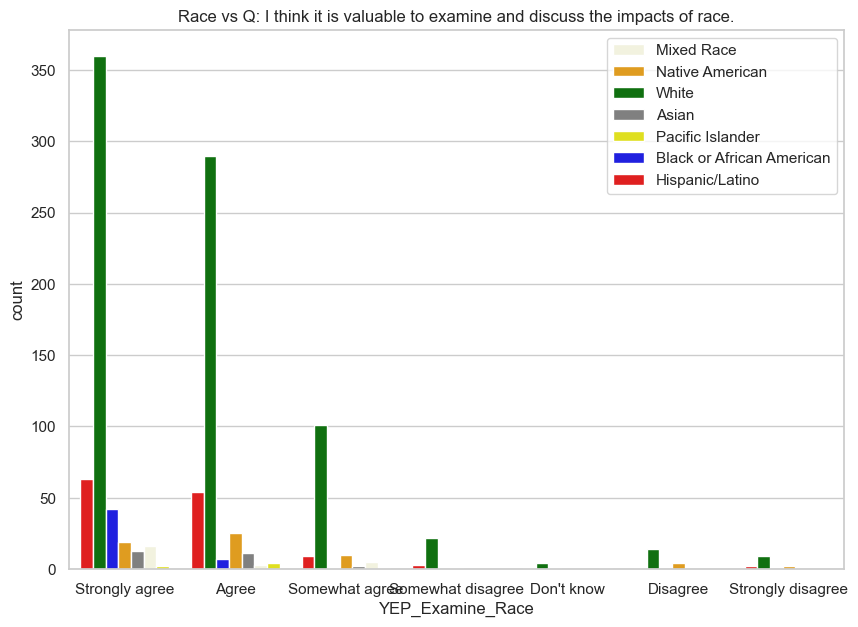

In [333]:
# Bar plot: Race vs Q: I think it is valuable to examine and discuss the impacts of race. 
color = ['red','green','blue','orange','grey','beige', 'yellow', 'brown', 'lime', 'cyan', 'black']
sns.countplot(x='YEP_Examine_Race', hue='Race_Eth', palette = color, data=cat_GARE_df2)
plt.title('Race vs Q: I think it is valuable to examine and discuss the impacts of race.')
# reordering the labels
handles, labels = plt.gca().get_legend_handles_labels()
  
# specify order
order = [5,3,1,4,6,2,0]
  
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order])
plt.show()


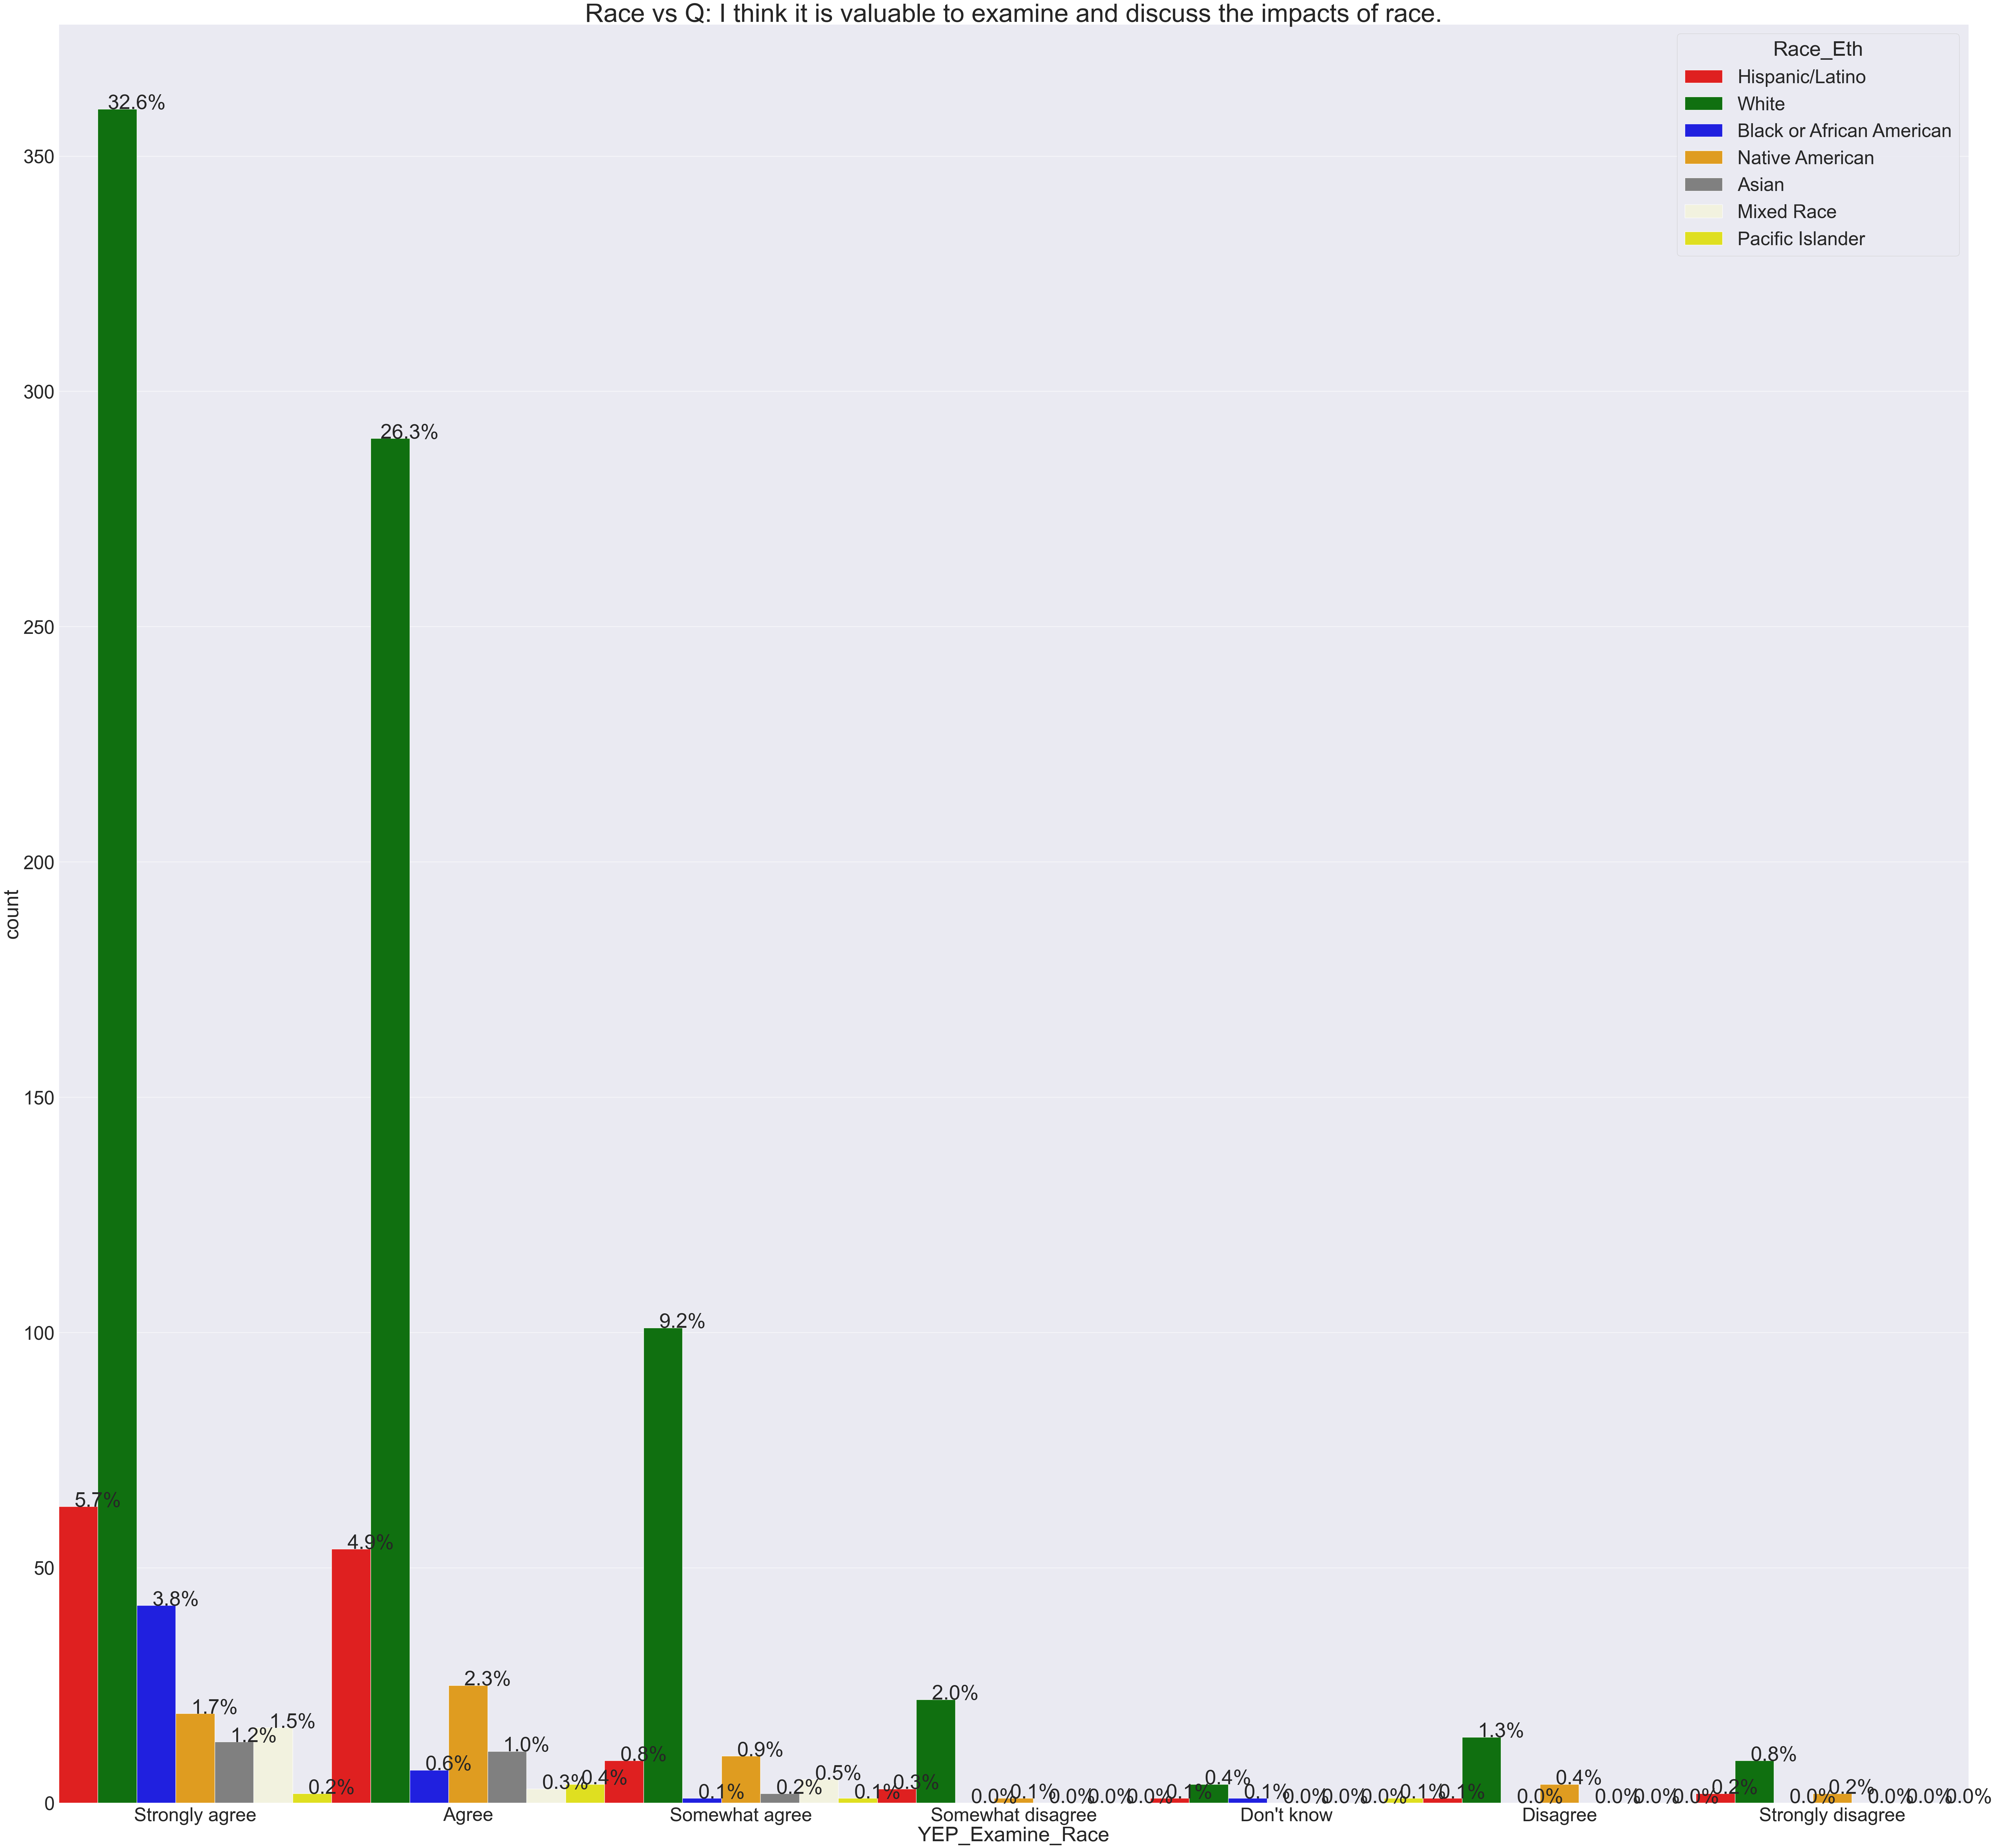

In [334]:
# Bar plot: Race vs Q: I think it is valuable to examine and discuss the impacts of race with %
sns.set(font_scale=4)
color = ['red','green','blue','orange','grey','beige', 'yellow', 'brown', 'lime', 'cyan', 'black']
plt.figure(figsize=(80,75))
total = float(len(cat_GARE_df2))
ax = sns.countplot(x='YEP_Examine_Race', hue='Race_Eth', width=1, palette = color, data=cat_GARE_df2)
plt.title('Race vs Q: I think it is valuable to examine and discuss the impacts of race.', fontsize=60)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()


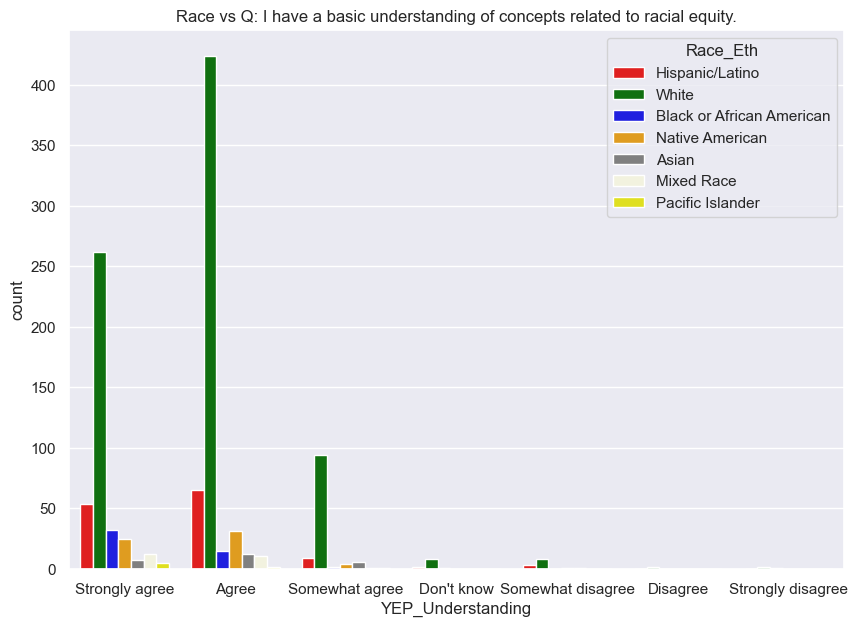

In [335]:
# Bar plot: Race vs Q: I have a basic understanding of concepts related to racial equity.
sns.set(font_scale=1)
color = ['red','green','blue','orange','grey','beige', 'yellow', 'brown', 'lime', 'cyan', 'black']
sns.countplot(x='YEP_Understanding', hue='Race_Eth', palette = color, data=cat_GARE_df2)
plt.title('Race vs Q: I have a basic understanding of concepts related to racial equity.')
plt.show()

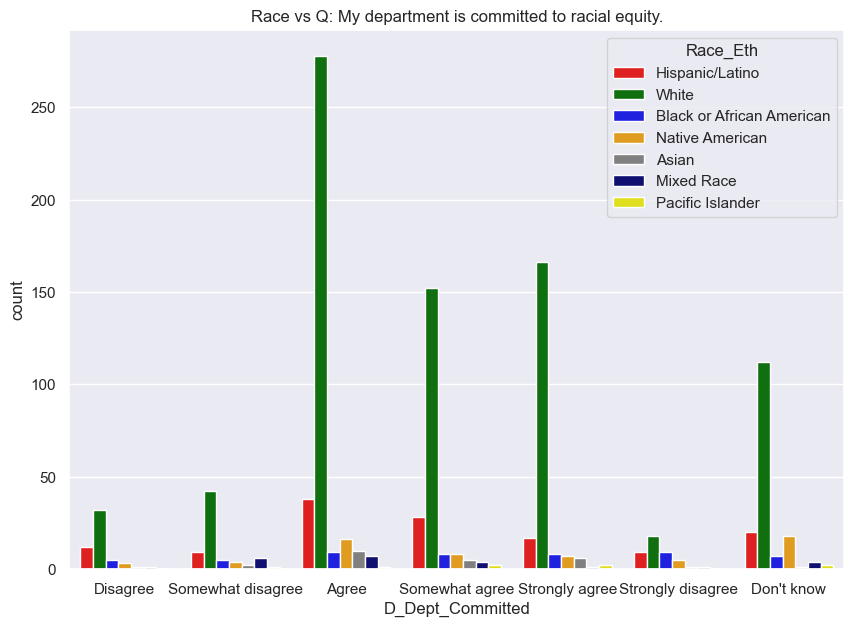

In [336]:
# Bar plot: Race vs Q: Race vs Q: My department is committed to racial equity.
sns.set(font_scale=1)
color = ['red','green','blue','orange','grey','navy', 'yellow']
sns.countplot(x='D_Dept_Committed', hue='Race_Eth', palette = color, data=cat_GARE_df2)
plt.title('Race vs Q: My department is committed to racial equity.')
plt.show()


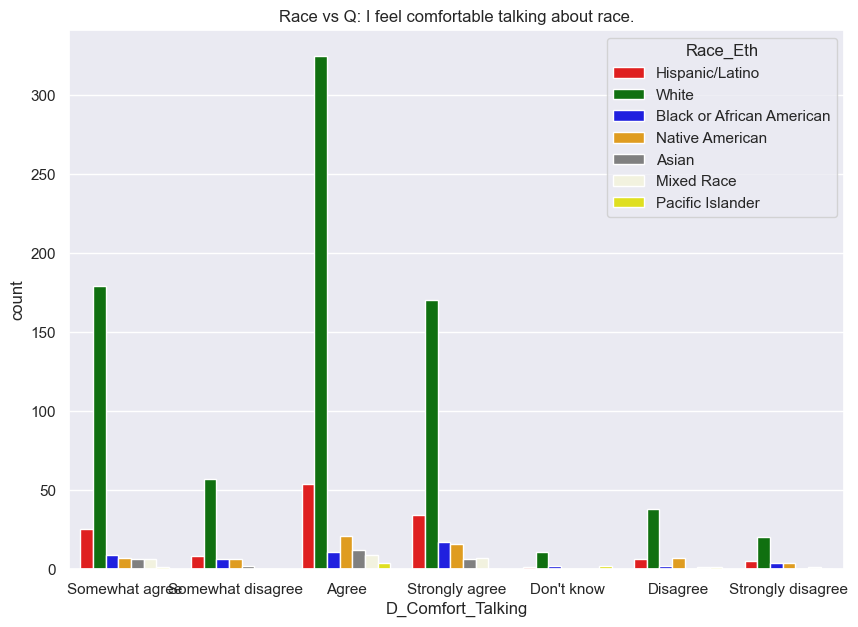

In [337]:
# Bar plot: Race vs Q: Q: I feel comfortable talking about race.
sns.set(font_scale=1)
color = ['red','green','blue','orange','grey','beige', 'yellow', 'brown', 'lime', 'cyan', 'black']
sns.countplot(x='D_Comfort_Talking', hue='Race_Eth', palette = color, data=cat_GARE_df2)
plt.title('Race vs Q: I feel comfortable talking about race.')
plt.show()

In [338]:
def cross_tab(data_frame, id_col):
    col_names=['YEP_Examine_Race', 'YEP_Understanding', 'YEP_Identify_IR', 'YEP_Address_IR', 'D_Comfort_Talking',
       'D_Actively_Involved', 'D_Dept_Committed', 'D_Leadership_Supports',
       'J_Belonging', 'D_Leadership_Communicates',
       'D_Progress', 'J_Explicit_Committment', 'D_More_Active_If_1',
       'D_More_Active_If_2', 'D_More_Active_If_3', 'D_More_Active_If_4',
       'D_More_Active_If_5', 'D_More_Active_If_6', 'D_More_Active_If_7',
       'D_Dem_Reflective', 'D_Concrete_WF']
    datasets = {}
    for i in col_names:
#         datasets[i] = pd.crosstab(data_frame[id_col], data_frame[i], margins = True)
        datasets['crosstab_{}'.format(i)] = pd.crosstab(data_frame[id_col], data_frame[i])
#         datasets1['crosstab_{}'.format(i)] = pd.crosstab(data_frame[id_col], data_frame[i], normalize=True, 
#             margins=True, margins_name='Total').style.format('{:.2%}')
    return datasets
storage = cross_tab(cat_GARE_df2, "Race_Eth")

def cross_tab_p(data_frame, id_col):
    col_names=['YEP_Examine_Race', 'YEP_Understanding', 'YEP_Identify_IR', 'YEP_Address_IR', 'D_Comfort_Talking',
       'D_Actively_Involved', 'D_Dept_Committed', 'D_Leadership_Supports',
       'J_Belonging', 'D_Leadership_Communicates',
       'D_Progress', 'J_Explicit_Committment', 'D_More_Active_If_1',
       'D_More_Active_If_2', 'D_More_Active_If_3', 'D_More_Active_If_4',
       'D_More_Active_If_5', 'D_More_Active_If_6', 'D_More_Active_If_7',
       'D_Dem_Reflective', 'D_Concrete_WF']
    datasets1 = {}
    for i in col_names:
#         datasets[i] = pd.crosstab(data_frame[id_col], data_frame[i], margins = True)
#
        datasets1['crosstab_{}'.format(i)] = pd.crosstab(data_frame[id_col], data_frame[i], normalize=True, 
            margins=True, margins_name='Total').style.format('{:.2%}')
    return datasets1
storage1 = cross_tab_p(cat_GARE_df2, "Race_Eth")

In [339]:
storage.keys()

dict_keys(['crosstab_YEP_Examine_Race', 'crosstab_YEP_Understanding', 'crosstab_YEP_Identify_IR', 'crosstab_YEP_Address_IR', 'crosstab_D_Comfort_Talking', 'crosstab_D_Actively_Involved', 'crosstab_D_Dept_Committed', 'crosstab_D_Leadership_Supports', 'crosstab_J_Belonging', 'crosstab_D_Leadership_Communicates', 'crosstab_D_Progress', 'crosstab_J_Explicit_Committment', 'crosstab_D_More_Active_If_1', 'crosstab_D_More_Active_If_2', 'crosstab_D_More_Active_If_3', 'crosstab_D_More_Active_If_4', 'crosstab_D_More_Active_If_5', 'crosstab_D_More_Active_If_6', 'crosstab_D_More_Active_If_7', 'crosstab_D_Dem_Reflective', 'crosstab_D_Concrete_WF'])

In [340]:
storage1.keys()

dict_keys(['crosstab_YEP_Examine_Race', 'crosstab_YEP_Understanding', 'crosstab_YEP_Identify_IR', 'crosstab_YEP_Address_IR', 'crosstab_D_Comfort_Talking', 'crosstab_D_Actively_Involved', 'crosstab_D_Dept_Committed', 'crosstab_D_Leadership_Supports', 'crosstab_J_Belonging', 'crosstab_D_Leadership_Communicates', 'crosstab_D_Progress', 'crosstab_J_Explicit_Committment', 'crosstab_D_More_Active_If_1', 'crosstab_D_More_Active_If_2', 'crosstab_D_More_Active_If_3', 'crosstab_D_More_Active_If_4', 'crosstab_D_More_Active_If_5', 'crosstab_D_More_Active_If_6', 'crosstab_D_More_Active_If_7', 'crosstab_D_Dem_Reflective', 'crosstab_D_Concrete_WF'])

In [341]:
# Contigency Tables with Counts - No Margins
from simple_colors import *
print(black('========== Contigency Tables (Counts): Race vs Survey Questions ============', ['bold']))
for k in storage.keys():
   display(storage[k])
# for k in storage.keys():
#    print(storage[k])

========== Contigency Tables (Counts): Race vs Survey Questions ============


YEP_Examine_Race           Agree  Disagree  Don't know  Somewhat agree  \
Race_Eth                                                                 
Asian                         11         0           0               2   
Black or African American      7         0           1               1   
Hispanic/Latino               54         1           1               9   
Mixed Race                     3         0           0               5   
Native American               25         4           0              10   
Pacific Islander               4         0           1               1   
White                        290        14           4             101   

YEP_Examine_Race           Somewhat disagree  Strongly agree  \
Race_Eth                                                       
Asian                                      0              13   
Black or African American                  0              42   
Hispanic/Latino                            3              63   
Mixed Race                                 0              16   
Native American                            1              19   
Pacific Islander                           0               2   
White                                     22             360   

YEP_Examine_Race           Strongly disagree  
Race_Eth                                      
Asian                                      0  
Black or African American                  0  
Hispanic/Latino                            2  
Mixed Race                                 0  
Native American                            2  
Pacific Islander                           0  
White                                      9

YEP_Understanding          Agree  Disagree  Don't know  Somewhat agree  \
Race_Eth                                                                 
Asian                         12         0           0               6   
Black or African American     15         0           1               2   
Hispanic/Latino               65         0           2               9   
Mixed Race                    11         0           0               1   
Native American               31         0           0               4   
Pacific Islander               2         0           0               1   
White                        424         2           8              94   

YEP_Understanding          Somewhat disagree  Strongly agree  \
Race_Eth                                                       
Asian                                      1               7   
Black or African American                  0              32   
Hispanic/Latino                            3              54   
Mixed Race                                 0              12   
Native American                            1              25   
Pacific Islander                           0               5   
White                                      8             262   

YEP_Understanding          Strongly disagree  
Race_Eth                                      
Asian                                      0  
Black or African American                  1  
Hispanic/Latino                            0  
Mixed Race                                 0  
Native American                            0  
Pacific Islander                           0  
White                                      2

YEP_Identify_IR            Agree  Don't know  Somewhat agree  Strongly agree  \
Race_Eth                                                                       
Asian                         12           0               9               5   
Black or African American     15           0               5              30   
Hispanic/Latino               50           0              35              48   
Mixed Race                     9           0               6               9   
Native American               19           0              19              23   
Pacific Islander               3           0               3               2   
White                        356           1             255             188   

YEP_Identify_IR            Strongly disagree  
Race_Eth                                      
Asian                                      0  
Black or African American                  1  
Hispanic/Latino                            0  
Mixed Race                                 0  
Native American                            0  
Pacific Islander                           0  
White                                      0

YEP_Address_IR             Agree  Disagree  Don't know  Somewhat agree  \
Race_Eth                                                                 
Asian                          6         3           3              10   
Black or African American      8         6           4              10   
Hispanic/Latino               41         5          15              40   
Mixed Race                     5         1           1               5   
Native American               11         9           9              16   
Pacific Islander               1         1           1               4   
White                        229        67          77             237   

YEP_Address_IR             Somewhat disagree  Strongly agree  \
Race_Eth                                                       
Asian                                      2               1   
Black or African American                  9               3   
Hispanic/Latino                           15              11   
Mixed Race                                 4               4   
Native American                            7               8   
Pacific Islander                           0               1   
White                                     93              82   

YEP_Address_IR             Strongly disagree  
Race_Eth                                      
Asian                                      1  
Black or African American                 11  
Hispanic/Latino                            6  
Mixed Race                                 4  
Native American                            1  
Pacific Islander                           0  
White                                     15

D_Comfort_Talking          Agree  Disagree  Don't know  Somewhat agree  \
Race_Eth                                                                 
Asian                         12         0           0               6   
Black or African American     11         2           2               9   
Hispanic/Latino               54         6           1              25   
Mixed Race                     9         1           0               6   
Native American               21         7           0               7   
Pacific Islander               4         1           2               1   
White                        325        38          11             179   

D_Comfort_Talking          Somewhat disagree  Strongly agree  \
Race_Eth                                                       
Asian                                      2               6   
Black or African American                  6              17   
Hispanic/Latino                            8              34   
Mixed Race                                 0               7   
Native American                            6              16   
Pacific Islander                           0               0   
White                                     57             170   

D_Comfort_Talking          Strongly disagree  
Race_Eth                                      
Asian                                      0  
Black or African American                  4  
Hispanic/Latino                            5  
Mixed Race                                 1  
Native American                            4  
Pacific Islander                           0  
White                                     20

D_Actively_Involved        Agree  Disagree  Don't know  Somewhat agree  \
Race_Eth                                                                 
Asian                          5         3           1               7   
Black or African American      8        11           2              10   
Hispanic/Latino               32        17          15              33   
Mixed Race                     3         2           1              10   
Native American               12         9           7               8   
Pacific Islander               0         1           3               2   
White                        182       115         111             225   

D_Actively_Involved        Somewhat disagree  Strongly agree  \
Race_Eth                                                       
Asian                                      4               5   
Black or African American                  4               8   
Hispanic/Latino                           14              15   
Mixed Race                                 4               4   
Native American                           10              10   
Pacific Islander                           0               2   
White                                     68              76   

D_Actively_Involved        Strongly disagree  
Race_Eth                                      
Asian                                      1  
Black or African American                  8  
Hispanic/Latino                            7  
Mixed Race                                 0  
Native American                            5  
Pacific Islander                           0  
White                                     23

D_Dept_Committed           Agree  Disagree  Don't know  Somewhat agree  \
Race_Eth                                                                 
Asian                         10         1           1               5   
Black or African American      9         5           7               8   
Hispanic/Latino               38        12          20              28   
Mixed Race                     7         1           4               4   
Native American               16         3          18               8   
Pacific Islander               1         0           2               2   
White                        278        32         112             152   

D_Dept_Committed           Somewhat disagree  Strongly agree  \
Race_Eth                                                       
Asian                                      2               6   
Black or African American                  5               8   
Hispanic/Latino                            9              17   
Mixed Race                                 6               1   
Native American                            4               7   
Pacific Islander                           1               2   
White                                     42             166   

D_Dept_Committed           Strongly disagree  
Race_Eth                                      
Asian                                      1  
Black or African American                  9  
Hispanic/Latino                            9  
Mixed Race                                 1  
Native American                            5  
Pacific Islander                           0  
White                                     18

D_Leadership_Supports      Agree  Disagree  Don't know  Somewhat agree  \
Race_Eth                                                                 
Asian                          4         1           4               5   
Black or African American     10         3          10               7   
Hispanic/Latino               32        13          27              20   
Mixed Race                     5         3           4               6   
Native American               11         6          17               7   
Pacific Islander               1         0           3               1   
White                        220        56         173             149   

D_Leadership_Supports      Somewhat disagree  Strongly agree  \
Race_Eth                                                       
Asian                                      3               8   
Black or African American                  4               5   
Hispanic/Latino                           13              11   
Mixed Race                                 3               1   
Native American                            5               5   
Pacific Islander                           1               2   
White                                     53             120   

D_Leadership_Supports      Strongly disagree  
Race_Eth                                      
Asian                                      1  
Black or African American                 12  
Hispanic/Latino                           17  
Mixed Race                                 2  
Native American                           10  
Pacific Islander                           0  
White                                     29

J_Belonging                Agree  Disagree  Don't know  Somewhat agree  \
Race_Eth                                                                 
Asian                         11         0           0               6   
Black or African American      8         6           1              19   
Hispanic/Latino               51         6           8              30   
Mixed Race                     6         2           0               3   
Native American               22         3           0              11   
Pacific Islander               2         0           2               2   
White                        336        35          16             196   

J_Belonging                Somewhat disagree  Strongly agree  \
Race_Eth                                                       
Asian                                      4               5   
Black or African American                  6               5   
Hispanic/Latino                            9              20   
Mixed Race                                 4               7   
Native American                           10              12   
Pacific Islander                           1               1   
White                                     44             152   

J_Belonging                Strongly disagree  
Race_Eth                                      
Asian                                      0  
Black or African American                  6  
Hispanic/Latino                            9  
Mixed Race                                 2  
Native American                            3  
Pacific Islander                           0  
White                                     21

D_Leadership_Communicates  Agree  Disagree  Don't know  Somewhat agree  \
Race_Eth                                                                 
Asian                          3         5           2               7   
Black or African American      9         6           6               6   
Hispanic/Latino               23        11          28              24   
Mixed Race                     4         3           2               6   
Native American               14        10          15               7   
Pacific Islander               1         1           2               3   
White                        210        86         132             178   

D_Leadership_Communicates  Somewhat disagree  Strongly agree  \
Race_Eth                                                       
Asian                                      2               6   
Black or African American                  3               4   
Hispanic/Latino                           17              13   
Mixed Race                                 6               1   
Native American                            5               2   
Pacific Islander                           0               1   
White                                     57             101   

D_Leadership_Communicates  Strongly disagree  
Race_Eth                                      
Asian                                      1  
Black or African American                 17  
Hispanic/Latino                           17  
Mixed Race                                 2  
Native American                            8  
Pacific Islander                           0  
White                                     36

D_Progress                 Agree  Disagree  Don't know  Somewhat agree  \
Race_Eth                                                                 
Asian                          4         2           8               8   
Black or African American      3        12          12               7   
Hispanic/Latino               19        10          51              23   
Mixed Race                     1         2           5               7   
Native American                6         6          30              11   
Pacific Islander               2         0           3               3   
White                        193        41         260             193   

D_Progress                 Somewhat disagree  Strongly agree  \
Race_Eth                                                       
Asian                                      1               2   
Black or African American                  4               2   
Hispanic/Latino                           10               9   
Mixed Race                                 7               1   
Native American                            1               3   
Pacific Islander                           0               0   
White                                     49              47   

D_Progress                 Strongly disagree  
Race_Eth                                      
Asian                                      1  
Black or African American                 11  
Hispanic/Latino                           11  
Mixed Race                                 1  
Native American                            4  
Pacific Islander                           0  
White                                     17

J_Explicit_Committment     Agree  Disagree  Don't know  Somewhat agree  \
Race_Eth                                                                 
Asian                          8         1           2              12   
Black or African American      8         4           6              14   
Hispanic/Latino               32        11          22              34   
Mixed Race                     6         3           2               9   
Native American               13        10          10              15   
Pacific Islander               2         0           3               1   
White                        272        31         144             195   

J_Explicit_Committment     Somewhat disagree  Strongly agree  \
Race_Eth                                                       
Asian                                      0               2   
Black or African American                  9               5   
Hispanic/Latino                           13              11   
Mixed Race                                 3               0   
Native American                            6               5   
Pacific Islander                           0               1   
White                                     44              95   

J_Explicit_Committment     Strongly disagree  
Race_Eth                                      
Asian                                      1  
Black or African American                  5  
Hispanic/Latino                           10  
Mixed Race                                 1  
Native American                            2  
Pacific Islander                           1  
White                                     19

D_More_Active_If_1          No  Yes
Race_Eth                           
Asian                       12   14
Black or African American   28   23
Hispanic/Latino             74   59
Mixed Race                  11   13
Native American             34   27
Pacific Islander             4    4
White                      432  368

D_More_Active_If_2          No  Yes
Race_Eth                           
Asian                       13   13
Black or African American   30   21
Hispanic/Latino             76   57
Mixed Race                  11   13
Native American             47   14
Pacific Islander             3    5
White                      529  271

D_More_Active_If_3          No  Yes
Race_Eth                           
Asian                       17    9
Black or African American   32   19
Hispanic/Latino             97   36
Mixed Race                  15    9
Native American             50   11
Pacific Islander             5    3
White                      600  200

D_More_Active_If_4          No  Yes
Race_Eth                           
Asian                       20    6
Black or African American   28   23
Hispanic/Latino             95   38
Mixed Race                  14   10
Native American             47   14
Pacific Islander             5    3
White                      639  161

D_More_Active_If_5          No  Yes
Race_Eth                           
Asian                       15   11
Black or African American   34   17
Hispanic/Latino            104   29
Mixed Race                  16    8
Native American             53    8
Pacific Islander             5    3
White                      643  157

D_More_Active_If_6          No  Yes
Race_Eth                           
Asian                       22    4
Black or African American   35   16
Hispanic/Latino            103   30
Mixed Race                  19    5
Native American             44   17
Pacific Islander             5    3
White                      684  116

D_More_Active_If_7          No  Yes
Race_Eth                           
Asian                       23    3
Black or African American   40   11
Hispanic/Latino             93   40
Mixed Race                  19    5
Native American             50   11
Pacific Islander             3    5
White                      547  253

D_Dem_Reflective           Agree  Disagree  Don't know  Somewhat agree  \
Race_Eth                                                                 
Asian                          6         2           3               7   
Black or African American      5         9           3              10   
Hispanic/Latino               34        12          21              32   
Mixed Race                     5         0           1               8   
Native American               12         7           5              16   
Pacific Islander               3         0           2               0   
White                        240        71          72             225   

D_Dem_Reflective           Somewhat disagree  Strongly agree  \
Race_Eth                                                       
Asian                                      3               4   
Black or African American                  3               9   
Hispanic/Latino                           15               9   
Mixed Race                                 5               3   
Native American                            4              13   
Pacific Islander                           1               1   
White                                     61              97   

D_Dem_Reflective           Strongly disagree  
Race_Eth                                      
Asian                                      1  
Black or African American                 12  
Hispanic/Latino                           10  
Mixed Race                                 2  
Native American                            4  
Pacific Islander                           1  
White                                     34

D_Concrete_WF              Agree  Disagree  Don't know  Somewhat agree  \
Race_Eth                                                                 
Asian                          7         1           8               5   
Black or African American      4        10          15               7   
Hispanic/Latino               21        13          49              17   
Mixed Race                     1         3           8               6   
Native American               10         5          24              12   
Pacific Islander               1         0           4               2   
White                        194        41         322             126   

D_Concrete_WF              Somewhat disagree  Strongly agree  \
Race_Eth                                                       
Asian                                      4               0   
Black or African American                  3               2   
Hispanic/Latino                           12               9   
Mixed Race                                 3               1   
Native American                            4               3   
Pacific Islander                           0               1   
White                                     46              49   

D_Concrete_WF              Strongly disagree  
Race_Eth                                      
Asian                                      1  
Black or African American                 10  
Hispanic/Latino                           12  
Mixed Race                                 2  
Native American                            3  
Pacific Islander                           0  
White                                     22

In [342]:
# Contigency Tables with Percentages
from simple_colors import *
print(black('========== Contigency Tables (%): Race vs Survey Questions ============', ['bold']))
for k in storage1.keys():
   display(storage1[k])
# for k in storage.keys():
#    print(storage[k])

========== Contigency Tables (%): Race vs Survey Questions ============


In [343]:
from scipy.stats import chi2_contingency
from scipy.stats import norm
from simple_colors import *
print(black('========== Contigency Tables & Test of Association : Race vs Survey Questions ============', ['bold']))
for k in storage.keys():
# Race vs YEP_Examine_Race 
# Chi-square test of independence.
    c, p, dof, exp = chi2_contingency(storage[k], correction=True)
# interpret p-value
    display(storage[k])
    print(blue('Test of Association ', ['bold']))
    print(black(' 1.H0: There is no association.\n 2.HA: There is association.', ['bold']))
    alpha = 0.05
    print("p value is " + str(p),2)
    if p <= alpha:
        print(red('Dependent: We reject H0', ['bold']))
        

    else:
        print(red('Independent: We accept H0', ['bold']))
#print(p) # P-value
    print("Critical value is " + str(c)) # Critical value
    print("Degree of Freedom is " + str(dof)) # Degree of Freedom

========== Contigency Tables & Test of Association : Race vs Survey Questions ============


YEP_Examine_Race           Agree  Disagree  Don't know  Somewhat agree  \
Race_Eth                                                                 
Asian                         11         0           0               2   
Black or African American      7         0           1               1   
Hispanic/Latino               54         1           1               9   
Mixed Race                     3         0           0               5   
Native American               25         4           0              10   
Pacific Islander               4         0           1               1   
White                        290        14           4             101   

YEP_Examine_Race           Somewhat disagree  Strongly agree  \
Race_Eth                                                       
Asian                                      0              13   
Black or African American                  0              42   
Hispanic/Latino                            3              63   
Mixed Race                                 0              16   
Native American                            1              19   
Pacific Islander                           0               2   
White                                     22             360   

YEP_Examine_Race           Strongly disagree  
Race_Eth                                      
Asian                                      0  
Black or African American                  0  
Hispanic/Latino                            2  
Mixed Race                                 0  
Native American                            2  
Pacific Islander                           0  
White                                      9

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 1.9989834910257054e-05 2
Dependent: We reject H0
Critical value is 81.8522251877745
Degree of Freedom is 36


YEP_Understanding          Agree  Disagree  Don't know  Somewhat agree  \
Race_Eth                                                                 
Asian                         12         0           0               6   
Black or African American     15         0           1               2   
Hispanic/Latino               65         0           2               9   
Mixed Race                    11         0           0               1   
Native American               31         0           0               4   
Pacific Islander               2         0           0               1   
White                        424         2           8              94   

YEP_Understanding          Somewhat disagree  Strongly agree  \
Race_Eth                                                       
Asian                                      1               7   
Black or African American                  0              32   
Hispanic/Latino                            3              54   
Mixed Race                                 0              12   
Native American                            1              25   
Pacific Islander                           0               5   
White                                      8             262   

YEP_Understanding          Strongly disagree  
Race_Eth                                      
Asian                                      0  
Black or African American                  1  
Hispanic/Latino                            0  
Mixed Race                                 0  
Native American                            0  
Pacific Islander                           0  
White                                      2

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.09387891249528521 2
Independent: We accept H0
Critical value is 47.57574041997708
Degree of Freedom is 36


YEP_Identify_IR            Agree  Don't know  Somewhat agree  Strongly agree  \
Race_Eth                                                                       
Asian                         12           0               9               5   
Black or African American     15           0               5              30   
Hispanic/Latino               50           0              35              48   
Mixed Race                     9           0               6               9   
Native American               19           0              19              23   
Pacific Islander               3           0               3               2   
White                        356           1             255             188   

YEP_Identify_IR            Strongly disagree  
Race_Eth                                      
Asian                                      0  
Black or African American                  1  
Hispanic/Latino                            0  
Mixed Race                                 0  
Native American                            0  
Pacific Islander                           0  
White                                      0

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 9.316131870039894e-06 2
Dependent: We reject H0
Critical value is 65.78959039217061
Degree of Freedom is 24


YEP_Address_IR             Agree  Disagree  Don't know  Somewhat agree  \
Race_Eth                                                                 
Asian                          6         3           3              10   
Black or African American      8         6           4              10   
Hispanic/Latino               41         5          15              40   
Mixed Race                     5         1           1               5   
Native American               11         9           9              16   
Pacific Islander               1         1           1               4   
White                        229        67          77             237   

YEP_Address_IR             Somewhat disagree  Strongly agree  \
Race_Eth                                                       
Asian                                      2               1   
Black or African American                  9               3   
Hispanic/Latino                           15              11   
Mixed Race                                 4               4   
Native American                            7               8   
Pacific Islander                           0               1   
White                                     93              82   

YEP_Address_IR             Strongly disagree  
Race_Eth                                      
Asian                                      1  
Black or African American                 11  
Hispanic/Latino                            6  
Mixed Race                                 4  
Native American                            1  
Pacific Islander                           0  
White                                     15

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 1.53521731541578e-07 2
Dependent: We reject H0
Critical value is 97.26338153988355
Degree of Freedom is 36


D_Comfort_Talking          Agree  Disagree  Don't know  Somewhat agree  \
Race_Eth                                                                 
Asian                         12         0           0               6   
Black or African American     11         2           2               9   
Hispanic/Latino               54         6           1              25   
Mixed Race                     9         1           0               6   
Native American               21         7           0               7   
Pacific Islander               4         1           2               1   
White                        325        38          11             179   

D_Comfort_Talking          Somewhat disagree  Strongly agree  \
Race_Eth                                                       
Asian                                      2               6   
Black or African American                  6              17   
Hispanic/Latino                            8              34   
Mixed Race                                 0               7   
Native American                            6              16   
Pacific Islander                           0               0   
White                                     57             170   

D_Comfort_Talking          Strongly disagree  
Race_Eth                                      
Asian                                      0  
Black or African American                  4  
Hispanic/Latino                            5  
Mixed Race                                 1  
Native American                            4  
Pacific Islander                           0  
White                                     20

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.0003741865483548718 2
Dependent: We reject H0
Critical value is 71.65413068207214
Degree of Freedom is 36


D_Actively_Involved        Agree  Disagree  Don't know  Somewhat agree  \
Race_Eth                                                                 
Asian                          5         3           1               7   
Black or African American      8        11           2              10   
Hispanic/Latino               32        17          15              33   
Mixed Race                     3         2           1              10   
Native American               12         9           7               8   
Pacific Islander               0         1           3               2   
White                        182       115         111             225   

D_Actively_Involved        Somewhat disagree  Strongly agree  \
Race_Eth                                                       
Asian                                      4               5   
Black or African American                  4               8   
Hispanic/Latino                           14              15   
Mixed Race                                 4               4   
Native American                           10              10   
Pacific Islander                           0               2   
White                                     68              76   

D_Actively_Involved        Strongly disagree  
Race_Eth                                      
Asian                                      1  
Black or African American                  8  
Hispanic/Latino                            7  
Mixed Race                                 0  
Native American                            5  
Pacific Islander                           0  
White                                     23

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.0016092907618709738 2
Dependent: We reject H0
Critical value is 66.14960012790989
Degree of Freedom is 36


D_Dept_Committed           Agree  Disagree  Don't know  Somewhat agree  \
Race_Eth                                                                 
Asian                         10         1           1               5   
Black or African American      9         5           7               8   
Hispanic/Latino               38        12          20              28   
Mixed Race                     7         1           4               4   
Native American               16         3          18               8   
Pacific Islander               1         0           2               2   
White                        278        32         112             152   

D_Dept_Committed           Somewhat disagree  Strongly agree  \
Race_Eth                                                       
Asian                                      2               6   
Black or African American                  5               8   
Hispanic/Latino                            9              17   
Mixed Race                                 6               1   
Native American                            4               7   
Pacific Islander                           1               2   
White                                     42             166   

D_Dept_Committed           Strongly disagree  
Race_Eth                                      
Asian                                      1  
Black or African American                  9  
Hispanic/Latino                            9  
Mixed Race                                 1  
Native American                            5  
Pacific Islander                           0  
White                                     18

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 7.624858495350561e-07 2
Dependent: We reject H0
Critical value is 92.34752216288705
Degree of Freedom is 36


D_Leadership_Supports      Agree  Disagree  Don't know  Somewhat agree  \
Race_Eth                                                                 
Asian                          4         1           4               5   
Black or African American     10         3          10               7   
Hispanic/Latino               32        13          27              20   
Mixed Race                     5         3           4               6   
Native American               11         6          17               7   
Pacific Islander               1         0           3               1   
White                        220        56         173             149   

D_Leadership_Supports      Somewhat disagree  Strongly agree  \
Race_Eth                                                       
Asian                                      3               8   
Black or African American                  4               5   
Hispanic/Latino                           13              11   
Mixed Race                                 3               1   
Native American                            5               5   
Pacific Islander                           1               2   
White                                     53             120   

D_Leadership_Supports      Strongly disagree  
Race_Eth                                      
Asian                                      1  
Black or African American                 12  
Hispanic/Latino                           17  
Mixed Race                                 2  
Native American                           10  
Pacific Islander                           0  
White                                     29

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 1.0485486311044879e-05 2
Dependent: We reject H0
Critical value is 83.9858011268897
Degree of Freedom is 36


J_Belonging                Agree  Disagree  Don't know  Somewhat agree  \
Race_Eth                                                                 
Asian                         11         0           0               6   
Black or African American      8         6           1              19   
Hispanic/Latino               51         6           8              30   
Mixed Race                     6         2           0               3   
Native American               22         3           0              11   
Pacific Islander               2         0           2               2   
White                        336        35          16             196   

J_Belonging                Somewhat disagree  Strongly agree  \
Race_Eth                                                       
Asian                                      4               5   
Black or African American                  6               5   
Hispanic/Latino                            9              20   
Mixed Race                                 4               7   
Native American                           10              12   
Pacific Islander                           1               1   
White                                     44             152   

J_Belonging                Strongly disagree  
Race_Eth                                      
Asian                                      0  
Black or African American                  6  
Hispanic/Latino                            9  
Mixed Race                                 2  
Native American                            3  
Pacific Islander                           0  
White                                     21

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 9.098479630272897e-07 2
Dependent: We reject H0
Critical value is 91.79731075541306
Degree of Freedom is 36


D_Leadership_Communicates  Agree  Disagree  Don't know  Somewhat agree  \
Race_Eth                                                                 
Asian                          3         5           2               7   
Black or African American      9         6           6               6   
Hispanic/Latino               23        11          28              24   
Mixed Race                     4         3           2               6   
Native American               14        10          15               7   
Pacific Islander               1         1           2               3   
White                        210        86         132             178   

D_Leadership_Communicates  Somewhat disagree  Strongly agree  \
Race_Eth                                                       
Asian                                      2               6   
Black or African American                  3               4   
Hispanic/Latino                           17              13   
Mixed Race                                 6               1   
Native American                            5               2   
Pacific Islander                           0               1   
White                                     57             101   

D_Leadership_Communicates  Strongly disagree  
Race_Eth                                      
Asian                                      1  
Black or African American                 17  
Hispanic/Latino                           17  
Mixed Race                                 2  
Native American                            8  
Pacific Islander                           0  
White                                     36

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 3.8332020512637806e-10 2
Dependent: We reject H0
Critical value is 114.71367869024309
Degree of Freedom is 36


D_Progress                 Agree  Disagree  Don't know  Somewhat agree  \
Race_Eth                                                                 
Asian                          4         2           8               8   
Black or African American      3        12          12               7   
Hispanic/Latino               19        10          51              23   
Mixed Race                     1         2           5               7   
Native American                6         6          30              11   
Pacific Islander               2         0           3               3   
White                        193        41         260             193   

D_Progress                 Somewhat disagree  Strongly agree  \
Race_Eth                                                       
Asian                                      1               2   
Black or African American                  4               2   
Hispanic/Latino                           10               9   
Mixed Race                                 7               1   
Native American                            1               3   
Pacific Islander                           0               0   
White                                     49              47   

D_Progress                 Strongly disagree  
Race_Eth                                      
Asian                                      1  
Black or African American                 11  
Hispanic/Latino                           11  
Mixed Race                                 1  
Native American                            4  
Pacific Islander                           0  
White                                     17

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 7.76815226086622e-14 2
Dependent: We reject H0
Critical value is 137.8358443688694
Degree of Freedom is 36


J_Explicit_Committment     Agree  Disagree  Don't know  Somewhat agree  \
Race_Eth                                                                 
Asian                          8         1           2              12   
Black or African American      8         4           6              14   
Hispanic/Latino               32        11          22              34   
Mixed Race                     6         3           2               9   
Native American               13        10          10              15   
Pacific Islander               2         0           3               1   
White                        272        31         144             195   

J_Explicit_Committment     Somewhat disagree  Strongly agree  \
Race_Eth                                                       
Asian                                      0               2   
Black or African American                  9               5   
Hispanic/Latino                           13              11   
Mixed Race                                 3               0   
Native American                            6               5   
Pacific Islander                           0               1   
White                                     44              95   

J_Explicit_Committment     Strongly disagree  
Race_Eth                                      
Asian                                      1  
Black or African American                  5  
Hispanic/Latino                           10  
Mixed Race                                 1  
Native American                            2  
Pacific Islander                           1  
White                                     19

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 1.2204181207015473e-05 2
Dependent: We reject H0
Critical value is 83.48691549705282
Degree of Freedom is 36


D_More_Active_If_1          No  Yes
Race_Eth                           
Asian                       12   14
Black or African American   28   23
Hispanic/Latino             74   59
Mixed Race                  11   13
Native American             34   27
Pacific Islander             4    4
White                      432  368

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.954476888214679 2
Independent: We accept H0
Critical value is 1.573311077469364
Degree of Freedom is 6


D_More_Active_If_2          No  Yes
Race_Eth                           
Asian                       13   13
Black or African American   30   21
Hispanic/Latino             76   57
Mixed Race                  11   13
Native American             47   14
Pacific Islander             3    5
White                      529  271

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.0076285479344363845 2
Dependent: We reject H0
Critical value is 17.494252293441363
Degree of Freedom is 6


D_More_Active_If_3          No  Yes
Race_Eth                           
Asian                       17    9
Black or African American   32   19
Hispanic/Latino             97   36
Mixed Race                  15    9
Native American             50   11
Pacific Islander             5    3
White                      600  200

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.17007992807978303 2
Independent: We accept H0
Critical value is 9.062745688837436
Degree of Freedom is 6


D_More_Active_If_4          No  Yes
Race_Eth                           
Asian                       20    6
Black or African American   28   23
Hispanic/Latino             95   38
Mixed Race                  14   10
Native American             47   14
Pacific Islander             5    3
White                      639  161

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.00025345277025917213 2
Dependent: We reject H0
Critical value is 25.69756161546823
Degree of Freedom is 6


D_More_Active_If_5          No  Yes
Race_Eth                           
Asian                       15   11
Black or African American   34   17
Hispanic/Latino            104   29
Mixed Race                  16    8
Native American             53    8
Pacific Islander             5    3
White                      643  157

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.00517063294788821 2
Dependent: We reject H0
Critical value is 18.464395473118465
Degree of Freedom is 6


D_More_Active_If_6          No  Yes
Race_Eth                           
Asian                       22    4
Black or African American   35   16
Hispanic/Latino            103   30
Mixed Race                  19    5
Native American             44   17
Pacific Islander             5    3
White                      684  116

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.0016097337229360755 2
Dependent: We reject H0
Critical value is 21.315651754744525
Degree of Freedom is 6


D_More_Active_If_7          No  Yes
Race_Eth                           
Asian                       23    3
Black or African American   40   11
Hispanic/Latino             93   40
Mixed Race                  19    5
Native American             50   11
Pacific Islander             3    5
White                      547  253

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.013013107914277178 2
Dependent: We reject H0
Critical value is 16.141733781482948
Degree of Freedom is 6


D_Dem_Reflective           Agree  Disagree  Don't know  Somewhat agree  \
Race_Eth                                                                 
Asian                          6         2           3               7   
Black or African American      5         9           3              10   
Hispanic/Latino               34        12          21              32   
Mixed Race                     5         0           1               8   
Native American               12         7           5              16   
Pacific Islander               3         0           2               0   
White                        240        71          72             225   

D_Dem_Reflective           Somewhat disagree  Strongly agree  \
Race_Eth                                                       
Asian                                      3               4   
Black or African American                  3               9   
Hispanic/Latino                           15               9   
Mixed Race                                 5               3   
Native American                            4              13   
Pacific Islander                           1               1   
White                                     61              97   

D_Dem_Reflective           Strongly disagree  
Race_Eth                                      
Asian                                      1  
Black or African American                 12  
Hispanic/Latino                           10  
Mixed Race                                 2  
Native American                            4  
Pacific Islander                           1  
White                                     34

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 3.640478628998508e-05 2
Dependent: We reject H0
Critical value is 79.83811459675051
Degree of Freedom is 36


D_Concrete_WF              Agree  Disagree  Don't know  Somewhat agree  \
Race_Eth                                                                 
Asian                          7         1           8               5   
Black or African American      4        10          15               7   
Hispanic/Latino               21        13          49              17   
Mixed Race                     1         3           8               6   
Native American               10         5          24              12   
Pacific Islander               1         0           4               2   
White                        194        41         322             126   

D_Concrete_WF              Somewhat disagree  Strongly agree  \
Race_Eth                                                       
Asian                                      4               0   
Black or African American                  3               2   
Hispanic/Latino                           12               9   
Mixed Race                                 3               1   
Native American                            4               3   
Pacific Islander                           0               1   
White                                     46              49   

D_Concrete_WF              Strongly disagree  
Race_Eth                                      
Asian                                      1  
Black or African American                 10  
Hispanic/Latino                           12  
Mixed Race                                 2  
Native American                            3  
Pacific Islander                           0  
White                                     22

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 2.9219805236577676e-06 2
Dependent: We reject H0
Critical value is 88.11798868425382
Degree of Freedom is 36


In [344]:
# Find the factors causing the association
from sigfig import round
for k in storage.keys():
# Race vs YEP_Examine_Race 
# Chi-square test of independence.
    c, p, dof, exp = chi2_contingency(storage[k], correction=True)
    alpha = 0.05
    colTotals = storage[k].sum()
    ncols =len(colTotals)
#    item = storage[k].columns[j]
    rowTotals = storage[k].sum(axis=1)
    nrows = len(rowTotals)
    n = sum(rowTotals)
    
    if p <= alpha:
        print(blue("p value is " + str(round(p,65)),['bold']))
        print(red('Dependent: We reject H0', ['bold']))
        display(pd.DataFrame(columns=[k]))

        for i in range(nrows):
            for j in range(ncols):
                AdjRes = (storage[k].iloc[i,j]-exp[i,j])/(exp[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5

        phRes = pd.DataFrame(columns=['Race', 'item', 'Adj. Res.'])
        for i in range(nrows):
            for j in range(ncols):
                AdjRes = (storage[k].iloc[i,j]-exp[i,j])/(exp[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5
                phRes = phRes.append({'Race':storage[k].index[i], 'item':storage[k].columns[j], 'Adj. Res.': AdjRes}, ignore_index=True)
                phRes['Sig.'] = 2*(1-norm.cdf(abs(phRes['Adj. Res.'])))
                phRes['Adj. Sig.'] = phRes.shape[0]*phRes['Sig.']
                phRes.loc[phRes['Adj. Sig.']>1, 'Adj. Sig.']=1
        display(phRes)        


p value is 1.9989834910257054e-05
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_YEP_Examine_Race]
Index: []

Race               item  Adj. Res.          Sig.  \
0                       Asian              Agree   0.709339  4.781140e-01   
1                       Asian           Disagree  -0.683170  4.944995e-01   
2                       Asian         Don't know  -0.412392  6.800521e-01   
3                       Asian     Somewhat agree  -0.642778  5.203684e-01   
4                       Asian  Somewhat disagree  -0.801762  4.226907e-01   
5                       Asian     Strongly agree   0.342269  7.321487e-01   
6                       Asian  Strongly disagree  -0.563540  5.730670e-01   
7   Black or African American              Agree  -3.356592  7.890940e-04   
8   Black or African American           Disagree  -0.968115  3.329867e-01   
9   Black or African American         Don't know   1.221179  2.220183e-01   
10  Black or African American     Somewhat agree  -2.215052  2.675650e-02   
11  Black or African American  Somewhat disagree  -1.136171  2.558849e-01   
12  Black or African American     Strongly agree   5.227031  1.722534e-07   
13  Black or African American  Strongly disagree  -0.798589  4.245287e-01   
14            Hispanic/Latino              Agree   1.252616  2.103456e-01   
15            Hispanic/Latino           Disagree  -0.917476  3.588934e-01   
16            Hispanic/Latino         Don't know   0.181573  8.559182e-01   
17            Hispanic/Latino     Somewhat agree  -1.885993  5.929592e-02   
18            Hispanic/Latino  Somewhat disagree  -0.082332  9.343828e-01   
19            Hispanic/Latino     Strongly agree   0.167021  8.673538e-01   
20            Hispanic/Latino  Strongly disagree   0.370518  7.109964e-01   
21                 Mixed Race              Agree  -2.400288  1.638217e-02   
22                 Mixed Race           Disagree  -0.655760  5.119787e-01   
23                 Mixed Race         Don't know  -0.395846  6.922185e-01   
24                 Mixed Race     Somewhat agree   1.408422  1.590060e-01   
25                 Mixed Race  Somewhat disagree  -0.769594  4.415410e-01   
26                 Mixed Race     Strongly agree   1.983219  4.734302e-02   
27                 Mixed Race  Strongly disagree  -0.540930  5.885558e-01   
28            Native American              Agree   0.882559  3.774747e-01   
29            Native American           Disagree   2.985944  2.827048e-03   
30            Native American         Don't know  -0.642189  5.207508e-01   
31            Native American     Somewhat agree   1.174733  2.401016e-01   
32            Native American  Somewhat disagree  -0.380226  7.037778e-01   
33            Native American     Strongly agree  -2.503487  1.229762e-02   
34            Native American  Strongly disagree   1.563674  1.178941e-01   
35           Pacific Islander              Agree   0.845931  3.975912e-01   
36           Pacific Islander           Disagree  -0.375827  7.070456e-01   
37           Pacific Islander         Don't know   4.241584  2.219476e-05   
38           Pacific Islander     Somewhat agree   0.071075  9.433377e-01   
39           Pacific Islander  Somewhat disagree  -0.441067  6.591645e-01   
40           Pacific Islander     Strongly agree  -1.234199  2.171286e-01   
41           Pacific Islander  Strongly disagree  -0.310016  7.565488e-01   
42                      White              Agree   0.596029  5.511561e-01   
43                      White           Disagree   0.113748  9.094372e-01   
44                      White         Don't know  -0.914921  3.602331e-01   
45                      White     Somewhat agree   1.561061  1.185094e-01   
46                      White  Somewhat disagree   1.397190  1.623564e-01   
47                      White     Strongly agree  -1.828934  6.740952e-02   
48                      White  Strongly disagree  -0.268039  7.886695e-01   

    Adj. Sig.  
0    1.000000  
1    1.000000  
2    1.000000  
3    1.000000  
4    1.000000  
5    1.000000  
6    1.000000  
7    0.038666  
8    1.000000  
9    1.000000 

p value is 9.316131870039894e-06
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_YEP_Identify_IR]
Index: []

Race               item  Adj. Res.          Sig.  \
0                       Asian              Agree   0.427181  6.692479e-01   
1                       Asian         Don't know  -0.155445  8.764708e-01   
2                       Asian     Somewhat agree   0.508004  6.114508e-01   
3                       Asian     Strongly agree  -0.971536  3.312813e-01   
4                       Asian  Strongly disagree  -0.155445  8.764708e-01   
5   Black or African American              Agree  -1.874582  6.085029e-02   
6   Black or African American         Don't know  -0.220280  8.256534e-01   
7   Black or African American     Somewhat agree  -3.235568  1.214008e-03   
8   Black or African American     Strongly agree   5.096232  3.464802e-07   
9   Black or African American  Strongly disagree   4.543806  5.524762e-06   
10            Hispanic/Latino              Agree  -1.114302  2.651497e-01   
11            Hispanic/Latino         Don't know  -0.370456  7.110426e-01   
12            Hispanic/Latino     Somewhat agree  -1.014498  3.103453e-01   
13            Hispanic/Latino     Strongly agree   2.320119  2.033444e-02   
14            Hispanic/Latino  Strongly disagree  -0.370456  7.110426e-01   
15                 Mixed Race              Agree  -0.458235  6.467836e-01   
16                 Mixed Race         Don't know  -0.149208  8.813896e-01   
17                 Mixed Race     Somewhat agree  -0.550692  5.818447e-01   
18                 Mixed Race     Strongly agree   1.090589  2.754538e-01   
19                 Mixed Race  Strongly disagree  -0.149208  8.813896e-01   
20            Native American              Agree  -1.777418  7.549947e-02   
21            Native American         Don't know  -0.242063  8.087315e-01   
22            Native American     Somewhat agree   0.183562  8.543574e-01   
23            Native American     Strongly agree   1.806098  7.090310e-02   
24            Native American  Strongly disagree  -0.242063  8.087315e-01   
25           Pacific Islander              Agree  -0.262622  7.928418e-01   
26           Pacific Islander         Don't know  -0.085514  9.318531e-01   
27           Pacific Islander     Somewhat agree   0.457986  6.469622e-01   
28           Pacific Islander     Strongly agree  -0.168306  8.663424e-01   
29           Pacific Islander  Strongly disagree  -0.085514  9.318531e-01   
30                      White              Agree   2.659522  7.825158e-03   
31                      White         Don't know   0.615706  5.380887e-01   
32                      White     Somewhat agree   2.088602  3.674360e-02   
33                      White     Strongly agree  -5.009313  5.462479e-07   
34                      White  Strongly disagree  -1.625626  1.040292e-01   

    Adj. Sig.  
0    1.000000  
1    1.000000  
2    1.000000  
3    1.000000  
4    1.000000  
5    1.000000  
6    1.000000  
7    0.042490  
8    0.000012  
9    0.000193  
10   1.000000  
11   1.000000  
12   1.000000  
13   0.711705  
14   1.000000  
15   1.000000  
16   1.000000  
17   1.000000  
18   1.000000  
19   1.000000  
20   1.000000  
21   1.000000  
22   1.000000  
23   1.000000  
24   1.000000  
25   1.000000  
26   1.000000  
27   1.000000  
28   1.000000  
29   1.000000  
30   0.273881  
31   1.000000  
32   1.000000  
33   0.000019  
34   1.000000

p value is 1.53521731541578e-07
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_YEP_Address_IR]
Index: []

Race               item  Adj. Res.          Sig.  \
0                       Asian              Agree  -0.487966  6.255738e-01   
1                       Asian           Disagree   0.596751  5.506737e-01   
2                       Asian         Don't know   0.269630  7.874447e-01   
3                       Asian     Somewhat agree   1.051949  2.928229e-01   
4                       Asian  Somewhat disagree  -0.655139  5.123785e-01   
5                       Asian     Strongly agree  -1.055101  2.913791e-01   
6                       Asian  Strongly disagree   0.113455  9.096697e-01   
7   Black or African American              Agree  -1.904750  5.681258e-02   
8   Black or African American           Disagree   0.905486  3.652081e-01   
9   Black or African American         Don't know  -0.519733  6.032494e-01   
10  Black or African American     Somewhat agree  -1.541669  1.231540e-01   
11  Black or African American  Somewhat disagree   1.329186  1.837867e-01   
12  Black or African American     Strongly agree  -0.998253  3.181569e-01   
13  Black or African American  Strongly disagree   7.266335  3.694822e-13   
14            Hispanic/Latino              Agree   0.976727  3.287045e-01   
15            Hispanic/Latino           Disagree  -2.037701  4.157984e-02   
16            Hispanic/Latino         Don't know   0.535764  5.921214e-01   
17            Hispanic/Latino     Somewhat agree   0.238593  8.114215e-01   
18            Hispanic/Latino  Somewhat disagree  -0.193689  8.464197e-01   
19            Hispanic/Latino     Strongly agree  -0.698592  4.848070e-01   
20            Hispanic/Latino  Strongly disagree   0.718863  4.722252e-01   
21                 Mixed Race              Agree  -0.717865  4.728403e-01   
22                 Mixed Race           Disagree  -0.747763  4.546029e-01   
23                 Mixed Race         Don't know  -0.959786  3.371630e-01   
24                 Mixed Race     Somewhat agree  -0.910750  3.624269e-01   
25                 Mixed Race  Somewhat disagree   0.749732  4.534164e-01   
26                 Mixed Race     Strongly agree   1.106532  2.684961e-01   
27                 Mixed Race  Strongly disagree   3.590648  3.298566e-04   
28            Native American              Agree  -1.669810  9.495689e-02   
29            Native American           Disagree   1.863804  6.234920e-02   
30            Native American         Don't know   1.282239  1.997587e-01   
31            Native American     Somewhat agree  -0.523794  6.004217e-01   
32            Native American  Somewhat disagree  -0.077412  9.382960e-01   
33            Native American     Strongly agree   0.842603  3.994505e-01   
34            Native American  Strongly disagree  -0.795607  4.262604e-01   
35           Pacific Islander              Agree  -0.942488  3.459429e-01   
36           Pacific Islander           Disagree   0.427004  6.693762e-01   
37           Pacific Islander         Don't know   0.239425  8.107760e-01   
38           Pacific Islander     Somewhat agree   1.299137  1.938969e-01   
39           Pacific Islander  Somewhat disagree  -1.037626  2.994441e-01   
40           Pacific Islander     Strongly agree   0.239425  8.107760e-01   
41           Pacific Islander  Strongly disagree  -0.536220  5.918068e-01   
42                      White              Agree   1.618282  1.056018e-01   
43                      White           Disagree   0.066576  9.469192e-01   
44                      White         Don't know  -0.626394  5.310568e-01   
45                      White     Somewhat agree   0.512633  6.082077e-01   
46                      White  Somewhat disagree  -0.269518  7.875313e-01   
47                      White     Strongly agree   0.499237  6.176123e-01   
48                      White  Strongly disagree  -4.645809  3.387459e-06   

       Adj. Sig.  
0   1.000000e+00  
1   1.000000e+00  
2   1.000000e+00  
3   1.000000e+00  
4   1.000000e+00  
5   1.000000e+00  
6   1.000000e+00  
7   1.000000e+00  
8  

p value is 0.0003741865483548718
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Comfort_Talking]
Index: []

Race               item  Adj. Res.          Sig.  \
0                       Asian              Agree   0.699263  4.843876e-01   
1                       Asian           Disagree  -1.182136  2.371519e-01   
2                       Asian         Don't know  -0.626054  5.312795e-01   
3                       Asian     Somewhat agree   0.246856  8.050197e-01   
4                       Asian  Somewhat disagree   0.106065  9.155305e-01   
5                       Asian     Strongly agree   0.050714  9.595532e-01   
6                       Asian  Strongly disagree  -0.920274  3.574296e-01   
7   Black or African American              Agree  -2.686204  7.226895e-03   
8   Black or African American           Disagree  -0.357734  7.205427e-01   
9   Black or African American         Don't know   1.511245  1.307261e-01   
10  Black or African American     Somewhat agree  -0.622911  5.333430e-01   
11  Black or African American  Somewhat disagree   1.305159  1.918388e-01   
12  Black or African American     Strongly agree   1.863262  6.242543e-02   
13  Black or African American  Strongly disagree   2.014082  4.400097e-02   
14            Hispanic/Latino              Agree   0.269882  7.872507e-01   
15            Hispanic/Latino           Disagree  -0.268440  7.883608e-01   
16            Hispanic/Latino         Don't know  -0.718663  4.723487e-01   
17            Hispanic/Latino     Somewhat agree  -0.701136  4.832184e-01   
18            Hispanic/Latino  Somewhat disagree  -0.547138  5.842841e-01   
19            Hispanic/Latino     Strongly agree   0.851383  3.945568e-01   
20            Hispanic/Latino  Strongly disagree   0.481612  6.300818e-01   
21                 Mixed Race              Agree  -0.205513  8.371713e-01   
22                 Mixed Race           Disagree  -0.186539  8.520223e-01   
23                 Mixed Race         Don't know  -0.600936  5.478829e-01   
24                 Mixed Race     Somewhat agree   0.470307  6.381359e-01   
25                 Mixed Race  Somewhat disagree  -1.375771  1.688925e-01   
26                 Mixed Race     Strongly agree   0.769144  4.418077e-01   
27                 Mixed Race  Strongly disagree   0.310688  7.560375e-01   
28            Native American              Agree  -0.838603  4.016919e-01   
29            Native American           Disagree   2.395580  1.659408e-02   
30            Native American         Don't know  -0.974909  3.296055e-01   
31            Native American     Somewhat agree  -1.899459  5.750416e-02   
32            Native American  Somewhat disagree   0.833214  4.047240e-01   
33            Native American     Strongly agree   0.684059  4.939378e-01   
34            Native American  Strongly disagree   1.615493  1.062039e-01   
35           Pacific Islander              Agree   0.607997  5.431894e-01   
36           Pacific Islander           Disagree   0.979912  3.271294e-01   
37           Pacific Islander         Don't know   5.591219  2.254813e-08   
38           Pacific Islander     Somewhat agree  -0.599767  5.486613e-01   
39           Pacific Islander  Somewhat disagree  -0.788477  4.304175e-01   
40           Pacific Islander     Strongly agree  -1.536814  1.243390e-01   
41           Pacific Islander  Strongly disagree  -0.506263  6.126719e-01   
42                      White              Agree   1.210225  2.261924e-01   
43                      White           Disagree  -0.586103  5.578065e-01   
44                      White         Don't know  -0.341171  7.329746e-01   
45                      White     Somewhat agree   1.653617  9.820538e-02   
46                      White  Somewhat disagree  -0.078029  9.378053e-01   
47                      White     Strongly agree  -1.824481  6.807937e-02   
48                      White  Strongly disagree  -1.818680  6.896029e-02   

    Adj. Sig.  
0    1.000000  
1    1.000000  
2    1.000000  
3    1.000000  
4    1.000000  
5    1.000000  
6    1.000000  
7    0.354118  
8    1.000000  
9    1.000000 

p value is 0.0016092907618709738
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Actively_Involved]
Index: []

Race               item  Adj. Res.      Sig.  \
0                       Asian              Agree  -0.337835  0.735487   
1                       Asian           Disagree  -0.410389  0.681521   
2                       Asian         Don't know  -1.371313  0.170277   
3                       Asian     Somewhat agree   0.020732  0.983459   
4                       Asian  Somewhat disagree   1.051675  0.292949   
5                       Asian     Strongly agree   1.383985  0.166363   
6                       Asian  Strongly disagree  -0.037697  0.969930   
7   Black or African American              Agree  -1.105049  0.269139   
8   Black or African American           Disagree   1.512091  0.130511   
9   Black or African American         Don't know  -1.926712  0.054016   
10  Black or African American     Somewhat agree  -1.179135  0.238344   
11  Black or African American  Somewhat disagree  -0.396790  0.691523   
12  Black or African American     Strongly agree   1.128844  0.258963   
13  Black or African American  Strongly disagree   4.370653  0.000012   
14            Hispanic/Latino              Agree   0.629981  0.528707   
15            Hispanic/Latino           Disagree  -0.541522  0.588148   
16            Hispanic/Latino         Don't know  -0.522537  0.601297   
17            Hispanic/Latino     Somewhat agree  -0.537113  0.591190   
18            Hispanic/Latino  Somewhat disagree   0.461852  0.644188   
19            Hispanic/Latino     Strongly agree   0.157494  0.874855   
20            Hispanic/Latino  Strongly disagree   0.800592  0.423368   
21                 Mixed Race              Agree  -1.129870  0.258531   
22                 Mixed Race           Disagree  -0.847091  0.396944   
23                 Mixed Race         Don't know  -1.268603  0.204583   
24                 Mixed Race     Somewhat agree   1.669751  0.094969   
25                 Mixed Race  Somewhat disagree   1.226782  0.219904   
26                 Mixed Race     Strongly agree   0.920583  0.357268   
27                 Mixed Race  Strongly disagree  -1.009627  0.312674   
28            Native American              Agree  -0.440387  0.659657   
29            Native American           Disagree   0.098524  0.921516   
30            Native American         Don't know  -0.293830  0.768888   
31            Native American     Somewhat agree  -2.474509  0.013342   
32            Native American  Somewhat disagree   1.915102  0.055480   
33            Native American     Strongly agree   1.422969  0.154745   
34            Native American  Strongly disagree   1.727645  0.084052   
35           Pacific Islander              Agree  -1.504984  0.132328   
36           Pacific Islander           Disagree  -0.147849  0.882462   
37           Pacific Islander         Don't know   2.115457  0.034391   
38           Pacific Islander     Somewhat agree  -0.111928  0.910880   
39           Pacific Islander  Somewhat disagree  -0.915924  0.359707   
40           Pacific Islander     Strongly agree   1.287320  0.197983   
41           Pacific Islander  Strongly disagree  -0.578634  0.562836   
42                      White              Agree   1.056027  0.290956   
43                      White           Disagree   0.077685  0.938079   
44                      White         Don't know   1.916697  0.055276   
45                      White     Somewhat agree   1.682185  0.092533   
46                      White  Somewhat disagree  -1.715236  0.086302   
47                      White     Strongly agree  -2.390650  0.016819   
48                      White  Strongly disagree  -3.072167  0.002125   

    Adj. Sig.  
0    1.000000  
1    1.000000  
2    1.000000  
3    1.000000  
4    1.000000  
5    1.000000  
6    1.000000  
7    1.000000  
8    1.000000  
9    1.000000  
10   1.000000  
11   1.000000  
12   1.000000  
13   0.000607  
14   1.000000  
15   1.000000  
16   1.000000  
17   1.000000  
18   1.000000  
19   1.000000  
20   1.000000  
21   1.000000  
22   1

p value is 7.624858495350561e-07
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Dept_Committed]
Index: []

Race               item  Adj. Res.          Sig.  \
0                       Asian              Agree   0.651306  5.148487e-01   
1                       Asian           Disagree  -0.251001  8.018135e-01   
2                       Asian         Don't know  -1.598685  1.098905e-01   
3                       Asian     Somewhat agree   0.061292  9.511264e-01   
4                       Asian  Somewhat disagree   0.306130  7.595058e-01   
5                       Asian     Strongly agree   0.569603  5.689468e-01   
6                       Asian  Strongly disagree  -0.013944  9.888744e-01   
7   Black or African American              Agree  -2.325459  2.004741e-02   
8   Black or African American           Disagree   1.663323  9.624781e-02   
9   Black or African American         Don't know  -0.234937  8.142578e-01   
10  Black or African American     Somewhat agree  -0.576971  5.639589e-01   
11  Black or African American  Somewhat disagree   1.071447  2.839687e-01   
12  Black or African American     Strongly agree  -0.576971  5.639589e-01   
13  Black or African American  Strongly disagree   5.194118  2.056927e-07   
14            Hispanic/Latino              Agree  -1.043601  2.966702e-01   
15            Hispanic/Latino           Disagree   2.351981  1.867371e-02   
16            Hispanic/Latino         Don't know   0.058435  9.534021e-01   
17            Hispanic/Latino     Somewhat agree   0.719897  4.715883e-01   
18            Hispanic/Latino  Somewhat disagree   0.259629  7.951503e-01   
19            Hispanic/Latino     Strongly agree  -1.885087  5.941809e-02   
20            Hispanic/Latino  Strongly disagree   1.822488  6.838100e-02   
21                 Mixed Race              Agree  -0.357405  7.207886e-01   
22                 Mixed Race           Disagree  -0.167357  8.670891e-01   
23                 Mixed Race         Don't know   0.250336  8.023274e-01   
24                 Mixed Race     Somewhat agree  -0.266445  7.898968e-01   
25                 Mixed Race  Somewhat disagree   3.833923  1.261158e-04   
26                 Mixed Race     Strongly agree  -1.852174  6.400087e-02   
27                 Mixed Race  Strongly disagree   0.068635  9.452805e-01   
28            Native American              Agree  -1.083544  2.785672e-01   
29            Native American           Disagree   0.008302  9.933758e-01   
30            Native American         Don't know   3.306515  9.446431e-04   
31            Native American     Somewhat agree  -1.163258  2.447248e-01   
32            Native American  Somewhat disagree   0.100115  9.202528e-01   
33            Native American     Strongly agree  -1.500643  1.334480e-01   
34            Native American  Strongly disagree   1.784432  7.435343e-02   
35           Pacific Islander              Agree  -1.214590  2.245224e-01   
36           Pacific Islander           Disagree  -0.644073  5.195284e-01   
37           Pacific Islander         Don't know   0.808385  4.188687e-01   
38           Pacific Islander     Somewhat agree   0.453168  6.504278e-01   
39           Pacific Islander  Somewhat disagree   0.731986  4.641774e-01   
40           Pacific Islander     Strongly agree   0.453168  6.504278e-01   
41           Pacific Islander  Strongly disagree  -0.571751  5.674906e-01   
42                      White              Agree   2.536588  1.119386e-02   
43                      White           Disagree  -2.240184  2.507896e-02   
44                      White         Don't know  -1.317414  1.876999e-01   
45                      White     Somewhat agree   0.322037  7.474249e-01   
46                      White  Somewhat disagree  -2.241073  2.502133e-02   
47                      White     Strongly agree   2.740758  6.129765e-03   
48                      White  Strongly disagree  -4.595977  4.307257e-06   

    Adj. Sig.  
0    1.000000  
1    1.000000  
2    1.000000  
3    1.000000  
4    1.000000  
5    1.000000  
6    1.000000  
7    0.982323  
8    1.000000  
9    1.000000 

p value is 1.0485486311044879e-05
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Leadership_Supports]
Index: []

Race               item  Adj. Res.          Sig.  \
0                       Asian              Agree  -1.213740  2.248468e-01   
1                       Asian           Disagree  -0.705812  4.803053e-01   
2                       Asian         Don't know  -0.776854  4.372446e-01   
3                       Asian     Somewhat agree   0.209891  8.337531e-01   
4                       Asian  Somewhat disagree   0.807328  4.194777e-01   
5                       Asian     Strongly agree   2.543247  1.098277e-02   
6                       Asian  Strongly disagree  -0.544770  5.859119e-01   
7   Black or African American              Agree  -1.012877  3.111190e-01   
8   Black or African American           Disagree  -0.432603  6.653034e-01   
9   Black or African American         Don't know  -0.350137  7.262359e-01   
10  Black or African American     Somewhat agree  -0.757826  4.485553e-01   
11  Black or African American  Somewhat disagree   0.113973  9.092590e-01   
12  Black or African American     Strongly agree  -0.843624  3.988798e-01   
13  Black or African American  Strongly disagree   5.093016  3.524114e-07   
14            Hispanic/Latino              Agree  -0.449726  6.529079e-01   
15            Hispanic/Latino           Disagree   1.097059  2.726155e-01   
16            Hispanic/Latino         Don't know  -0.381696  7.026871e-01   
17            Hispanic/Latino     Somewhat agree  -0.851506  3.944885e-01   
18            Hispanic/Latino  Somewhat disagree   1.097059  2.726155e-01   
19            Hispanic/Latino     Strongly agree  -1.965788  4.932315e-02   
20            Hispanic/Latino  Strongly disagree   3.179534  1.475123e-03   
21                 Mixed Race              Agree  -0.547094  5.843140e-01   
22                 Mixed Race           Disagree   0.956490  3.388248e-01   
23                 Mixed Race         Don't know  -0.591314  5.543100e-01   
24                 Mixed Race     Somewhat agree   0.950528  3.418440e-01   
25                 Mixed Race  Somewhat disagree   0.956490  3.388248e-01   
26                 Mixed Race     Strongly agree  -1.381488  1.671289e-01   
27                 Mixed Race  Strongly disagree   0.382742  7.019111e-01   
28            Native American              Agree  -1.402834  1.606664e-01   
29            Native American           Disagree   0.735717  4.619032e-01   
30            Native American         Don't know   1.228968  2.190837e-01   
31            Native American     Somewhat agree  -1.306716  1.913092e-01   
32            Native American  Somewhat disagree   0.233554  8.153316e-01   
33            Native American     Strongly agree  -1.301722  1.930116e-01   
34            Native American  Strongly disagree   3.260093  1.113759e-03   
35           Pacific Islander              Agree  -0.855200  3.924403e-01   
36           Pacific Islander           Disagree  -0.804488  4.211150e-01   
37           Pacific Islander         Don't know   1.098792  2.718588e-01   
38           Pacific Islander     Somewhat agree  -0.385382  6.999543e-01   
39           Pacific Islander  Somewhat disagree   0.548180  5.835681e-01   
40           Pacific Islander     Strongly agree   0.923972  3.555009e-01   
41           Pacific Islander  Strongly disagree  -0.744586  4.565219e-01   
42                      White              Agree   2.276889  2.279286e-02   
43                      White           Disagree  -0.893361  3.716637e-01   
44                      White         Don't know   0.062293  9.503295e-01   
45                      White     Somewhat agree   1.338109  1.808608e-01   
46                      White  Somewhat disagree  -1.664795  9.595372e-02   
47                      White     Strongly agree   1.909069  5.625317e-02   
48                      White  Strongly disagree  -6.183462  6.271081e-10   

       Adj. Sig.  
0   1.000000e+00  
1   1.000000e+00  
2   1.000000e+00  
3   1.000000e+00  
4   1.000000e+00  
5   5.381558e-01  
6   1.000000e+00  
7   1.000000e+00  
8  

p value is 9.098479630272897e-07
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_J_Belonging]
Index: []

Race               item  Adj. Res.      Sig.  \
0                       Asian              Agree   0.293323  0.769276   
1                       Asian           Disagree  -1.147802  0.251050   
2                       Asian         Don't know  -0.817414  0.413692   
3                       Asian     Somewhat agree  -0.136107  0.891737   
4                       Asian  Somewhat disagree   1.673363  0.094256   
5                       Asian     Strongly agree   0.122352  0.902620   
6                       Asian  Strongly disagree  -1.013903  0.310629   
7   Black or African American              Agree  -3.566007  0.000362   
8   Black or African American           Disagree   2.432453  0.014997   
9   Black or African American         Don't know  -0.230493  0.817709   
10  Black or African American     Somewhat agree   2.227574  0.025909   
11  Black or African American  Somewhat disagree   1.338719  0.180662   
12  Black or African American     Strongly agree  -1.608867  0.107645   
13  Black or African American  Strongly disagree   3.110650  0.001867   
14            Hispanic/Latino              Agree  -0.297488  0.766094   
15            Hispanic/Latino           Disagree  -0.117866  0.906174   
16            Hispanic/Latino         Don't know   2.838826  0.004528   
17            Hispanic/Latino     Somewhat agree  -0.473819  0.635629   
18            Hispanic/Latino  Somewhat disagree  -0.146175  0.883783   
19            Hispanic/Latino     Strongly agree  -1.041650  0.297574   
20            Hispanic/Latino  Strongly disagree   1.982521  0.047421   
21                 Mixed Race              Agree  -1.471887  0.141051   
22                 Mixed Race           Disagree   0.845734  0.397701   
23                 Mixed Race         Don't know  -0.784618  0.432677   
24                 Mixed Race     Somewhat agree  -1.353737  0.175820   
25                 Mixed Race  Somewhat disagree   1.853941  0.063748   
26                 Mixed Race     Strongly agree   1.389853  0.164573   
27                 Mixed Race  Strongly disagree   1.208616  0.226810   
28            Native American              Agree  -0.569166  0.569244   
29            Native American           Disagree   0.077198  0.938466   
30            Native American         Don't know  -1.272901  0.203053   
31            Native American     Somewhat agree  -1.158235  0.246768   
32            Native American  Somewhat disagree   2.922038  0.003477   
33            Native American     Strongly agree   0.282226  0.777770   
34            Native American  Strongly disagree   0.510089  0.609989   
35           Pacific Islander              Agree  -0.843563  0.398914   
36           Pacific Islander           Disagree  -0.631431  0.527759   
37           Pacific Islander         Don't know   4.142865  0.000034   
38           Pacific Islander     Somewhat agree   0.052574  0.958071   
39           Pacific Islander  Somewhat disagree   0.601121  0.547759   
40           Pacific Islander     Strongly agree  -0.426692  0.669603   
41           Pacific Islander  Strongly disagree  -0.557770  0.577001   
42                      White              Agree   2.727917  0.006374   
43                      White           Disagree  -0.864202  0.387477   
44                      White         Don't know  -1.564049  0.117806   
45                      White     Somewhat agree   0.369511  0.711747   
46                      White  Somewhat disagree  -3.308461  0.000938   
47                      White     Strongly agree   0.957567  0.338281   
48                      White  Strongly disagree  -3.115366  0.001837   

    Adj. Sig.  
0    1.000000  
1    1.000000  
2    1.000000  
3    1.000000  
4    1.000000  
5    1.000000  
6    1.000000  
7    0.017761  
8    0.734850  
9    1.000000  
10   1.000000  
11   1.000000  
12   1.000000  
13   0.091471  
14   1.000000  
15   1.000000  
16   0.221871  
17   1.000000  
18   1.000000  
19   1.000000  
20   1.000000  
21   1.000000  
22   1

p value is 3.8332020512637806e-10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Leadership_Communicates]
Index: []

Race               item  Adj. Res.          Sig.  \
0                       Asian              Agree  -1.499167  1.338304e-01   
1                       Asian           Disagree   1.344160  1.788965e-01   
2                       Asian         Don't know  -1.273658  2.027847e-01   
3                       Asian     Somewhat agree   0.758391  4.482170e-01   
4                       Asian  Somewhat disagree  -0.088079  9.298139e-01   
5                       Asian     Strongly agree   1.848340  6.455319e-02   
6                       Asian  Strongly disagree  -0.691873  4.890173e-01   
7   Black or African American              Agree  -1.077574  2.812241e-01   
8   Black or African American           Disagree   0.164125  8.696325e-01   
9   Black or African American         Don't know  -1.011254  3.118948e-01   
10  Black or African American     Somewhat agree  -1.649425  9.906050e-02   
11  Black or African American  Somewhat disagree  -0.608300  5.429884e-01   
12  Black or African American     Strongly agree  -0.858822  3.904387e-01   
13  Black or African American  Strongly disagree   7.285749  3.199663e-13   
14            Hispanic/Latino              Agree  -1.914193  5.559544e-02   
15            Hispanic/Latino           Disagree  -1.093965  2.739704e-01   
16            Hispanic/Latino         Don't know   1.343380  1.791491e-01   
17            Hispanic/Latino     Somewhat agree  -0.875796  3.811410e-01   
18            Hispanic/Latino  Somewhat disagree   2.076557  3.784247e-02   
19            Hispanic/Latino     Strongly agree  -0.702770  4.821992e-01   
20            Hispanic/Latino  Strongly disagree   2.563906  1.035015e-02   
21                 Mixed Race              Agree  -0.843711  3.988311e-01   
22                 Mixed Race           Disagree   0.227291  8.201976e-01   
23                 Mixed Race         Don't know  -1.137938  2.551465e-01   
24                 Mixed Race     Somewhat agree   0.493869  6.213989e-01   
25                 Mixed Race  Somewhat disagree   3.047092  2.310673e-03   
26                 Mixed Race     Strongly agree  -1.150297  2.500217e-01   
27                 Mixed Race  Strongly disagree   0.187934  8.509286e-01   
28            Native American              Agree  -0.185295  8.529976e-01   
29            Native American           Disagree   1.366240  1.718636e-01   
30            Native American         Don't know   1.635364  1.019727e-01   
31            Native American     Somewhat agree  -1.869667  6.153012e-02   
32            Native American  Somewhat disagree   0.010907  9.912977e-01   
33            Native American     Strongly agree  -2.088934  3.671363e-02   
34            Native American  Strongly disagree   1.777823  7.543300e-02   
35           Pacific Islander              Agree  -0.760753  4.468043e-01   
36           Pacific Islander           Disagree   0.130264  8.963574e-01   
37           Pacific Islander         Don't know   0.608731  5.427027e-01   
38           Pacific Islander     Somewhat agree   1.155106  2.480472e-01   
39           Pacific Islander  Somewhat disagree  -0.846140  3.974747e-01   
40           Pacific Islander     Strongly agree   0.079352  9.367530e-01   
41           Pacific Islander  Strongly disagree  -0.799177  4.241880e-01   
42                      White              Agree   2.928241  3.408853e-03   
43                      White           Disagree  -0.534656  5.928877e-01   
44                      White         Don't know  -0.652600  5.140143e-01   
45                      White     Somewhat agree   1.733553  8.299740e-02   
46                      White  Somewhat disagree  -2.039476  4.140251e-02   
47                      White     Strongly agree   1.719101  8.559597e-02   
48                      White  Strongly disagree  -5.882863  4.032285e-09   

       Adj. Sig.  
0   1.000000e+00  
1   1.000000e+00  
2   1.000000e+00  
3   1.000000e+00  
4   1.000000e+00  
5   1.000000e+00  
6   1.000000e+00  
7   1.000000e+00  
8  

p value is 7.76815226086622e-14
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Progress]
Index: []

Race               item  Adj. Res.          Sig.  \
0                       Asian              Agree  -0.673629  5.005470e-01   
1                       Asian           Disagree   0.222928  8.235918e-01   
2                       Asian         Don't know  -0.293645  7.690291e-01   
3                       Asian     Somewhat agree   0.973725  3.301929e-01   
4                       Asian  Somewhat disagree  -0.560175  5.753598e-01   
5                       Asian     Strongly agree   0.417152  6.765669e-01   
6                       Asian  Strongly disagree  -0.060942  9.514052e-01   
7   Black or African American              Agree  -2.670512  7.573575e-03   
8   Black or African American           Disagree   4.974303  6.548275e-07   
9   Black or African American         Don't know  -1.538159  1.240098e-01   
10  Black or African American     Somewhat agree  -1.588663  1.121365e-01   
11  Black or African American  Somewhat disagree   0.389431  6.969571e-01   
12  Black or African American     Strongly agree  -0.588278  5.563456e-01   
13  Black or African American  Strongly disagree   6.464762  1.014586e-10   
14            Hispanic/Latino              Agree  -1.939122  5.248648e-02   
15            Hispanic/Latino           Disagree   0.445450  6.559947e-01   
16            Hispanic/Latino         Don't know   1.274962  2.023226e-01   
17            Hispanic/Latino     Somewhat agree  -1.626705  1.037998e-01   
18            Hispanic/Latino  Somewhat disagree   0.493452  6.216933e-01   
19            Hispanic/Latino     Strongly agree   0.507382  6.118871e-01   
20            Hispanic/Latino  Strongly disagree   2.605319  9.178887e-03   
21                 Mixed Race              Agree  -2.018748  4.351347e-02   
22                 Mixed Race           Disagree   0.341702  7.325753e-01   
23                 Mixed Race         Don't know  -1.324911  1.852007e-01   
24                 Mixed Race     Somewhat agree   0.745594  4.559128e-01   
25                 Mixed Race  Somewhat disagree   4.539626  5.635400e-06   
26                 Mixed Race     Strongly agree  -0.346547  7.289320e-01   
27                 Mixed Race  Strongly disagree   0.021755  9.826437e-01   
28            Native American              Agree  -2.150033  3.155263e-02   
29            Native American           Disagree   1.040080  2.983026e-01   
30            Native American         Don't know   2.678271  7.400337e-03   
31            Native American     Somewhat agree  -0.921372  3.568564e-01   
32            Native American  Somewhat disagree  -1.590220  1.117852e-01   
33            Native American     Strongly agree  -0.303954  7.611628e-01   
34            Native American  Strongly disagree   1.006411  3.142178e-01   
35           Pacific Islander              Agree   0.303478  7.615254e-01   
36           Pacific Islander           Disagree  -0.755733  4.498092e-01   
37           Pacific Islander         Don't know   0.243412  8.076859e-01   
38           Pacific Islander     Somewhat agree   0.990762  3.218020e-01   
39           Pacific Islander  Somewhat disagree  -0.750175  4.531493e-01   
40           Pacific Islander     Strongly agree  -0.704544  4.810943e-01   
41           Pacific Islander  Strongly disagree  -0.585449  5.582458e-01   
42                      White              Agree   4.603103  4.162418e-06   
43                      White           Disagree  -3.241589  1.188653e-03   
44                      White         Don't know  -1.091371  2.751098e-01   
45                      White     Somewhat agree   1.642960  1.003912e-01   
46                      White  Somewhat disagree  -0.879673  3.790367e-01   
47                      White     Strongly agree   0.167680  8.668349e-01   
48                      White  Strongly disagree  -5.332566  9.683429e-08   

       Adj. Sig.  
0   1.000000e+00  
1   1.000000e+00  
2   1.000000e+00  
3   1.000000e+00  
4   1.000000e+00  
5   1.000000e+00  
6   1.000000e+00  
7   3.711052e-01  
8  

p value is 1.2204181207015473e-05
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_J_Explicit_Committment]
Index: []

Race               item  Adj. Res.      Sig.  \
0                       Asian              Agree  -0.016353  0.986953   
1                       Asian           Disagree  -0.362570  0.716926   
2                       Asian         Don't know  -1.293117  0.195971   
3                       Asian     Somewhat agree   2.462459  0.013799   
4                       Asian  Somewhat disagree  -1.393801  0.163378   
5                       Asian     Strongly agree  -0.515033  0.606530   
6                       Asian  Strongly disagree   0.086712  0.930900   
7   Black or African American              Agree  -2.409733  0.015964   
8   Black or African American           Disagree   0.774914  0.438390   
9   Black or African American         Don't know  -1.042177  0.297330   
10  Black or African American     Somewhat agree   0.347074  0.728536   
11  Black or African American  Somewhat disagree   3.150938  0.001627   
12  Black or African American     Strongly agree  -0.232131  0.816436   
13  Black or African American  Strongly disagree   2.481841  0.013071   
14            Hispanic/Latino              Agree  -1.824273  0.068111   
15            Hispanic/Latino           Disagree   1.535042  0.124774   
16            Hispanic/Latino         Don't know  -0.193772  0.846355   
17            Hispanic/Latino     Somewhat agree   0.050466  0.959751   
18            Hispanic/Latino  Somewhat disagree   1.453228  0.146161   
19            Hispanic/Latino     Strongly agree  -0.998164  0.318200   
20            Hispanic/Latino  Strongly disagree   2.652216  0.007997   
21                 Mixed Race              Agree  -0.634028  0.526062   
22                 Mixed Race           Disagree   1.541924  0.123092   
23                 Mixed Race         Don't know  -1.156973  0.247283   
24                 Mixed Race     Somewhat agree   1.378769  0.167966   
25                 Mixed Race  Somewhat disagree   1.121588  0.262038   
26                 Mixed Race     Strongly agree  -1.722497  0.084979   
27                 Mixed Race  Strongly disagree   0.169194  0.865644   
28            Native American              Agree  -1.669942  0.094931   
29            Native American           Disagree   3.880956  0.000104   
30            Native American         Don't know  -0.158156  0.874334   
31            Native American     Somewhat agree  -0.146813  0.883280   
32            Native American  Somewhat disagree   0.969237  0.332427   
33            Native American     Strongly agree  -0.671374  0.501982   
34            Native American  Strongly disagree  -0.111875  0.910923   
35           Pacific Islander              Agree  -0.363372  0.716327   
36           Pacific Islander           Disagree  -0.680862  0.495959   
37           Pacific Islander         Don't know   1.534192  0.124982   
38           Pacific Islander     Somewhat agree  -0.840460  0.400650   
39           Pacific Islander  Somewhat disagree  -0.766761  0.443224   
40           Pacific Islander     Strongly agree   0.156582  0.875574   
41           Pacific Islander  Strongly disagree   1.377873  0.168243   
42                      White              Agree   3.601563  0.000316   
43                      White           Disagree  -3.723085  0.000197   
44                      White         Don't know   1.238671  0.215468   
45                      White     Somewhat agree  -1.252748  0.210297   
46                      White  Somewhat disagree  -2.786005  0.005336   
47                      White     Strongly agree   1.889481  0.058827   
48                      White  Strongly disagree  -3.391919  0.000694   

    Adj. Sig.  
0    1.000000  
1    1.000000  
2    1.000000  
3    0.676141  
4    1.000000  
5    1.000000  
6    1.000000  
7    0.782246  
8    1.000000  
9    1.000000  
10   1.000000  
11   0.079746  
12   1.000000  
13   0.640457  
14   1.000000  
15   1.000000  
16   1.000000  
17   1.000000  
18   1.000000  
19   1.000000  
20   0.391831  
21   1.000000  
22   1

p value is 0.0076285479344363845
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_2]
Index: []

Race item  Adj. Res.      Sig.  Adj. Sig.
0                       Asian   No  -1.537715  0.124118   1.000000
1                       Asian  Yes   1.537715  0.124118   1.000000
2   Black or African American   No  -0.832569  0.405088   1.000000
3   Black or African American  Yes   0.832569  0.405088   1.000000
4             Hispanic/Latino   No  -1.831513  0.067024   0.938336
5             Hispanic/Latino  Yes   1.831513  0.067024   0.938336
6                  Mixed Race   No  -1.906720  0.056557   0.791796
7                  Mixed Race  Yes   1.906720  0.056557   0.791796
8             Native American   No   2.141470  0.032236   0.451306
9             Native American  Yes  -2.141470  0.032236   0.451306
10           Pacific Islander   No  -1.586457  0.112636   1.000000
11           Pacific Islander  Yes   1.586457  0.112636   1.000000
12                      White   No   2.078698  0.037645   0.527032
13                      White  Yes  -2.078698  0.037645   0.527032

p value is 0.00025345277025917213
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_4]
Index: []

Race item  Adj. Res.      Sig.  Adj. Sig.
0                       Asian   No   0.005122  0.995914   1.000000
1                       Asian  Yes  -0.005122  0.995914   1.000000
2   Black or African American   No  -3.812289  0.000138   0.001928
3   Black or African American  Yes   3.812289  0.000138   0.001928
4             Hispanic/Latino   No  -1.590537  0.111714   1.000000
5             Hispanic/Latino  Yes   1.590537  0.111714   1.000000
6                  Mixed Race   No  -2.179139  0.029321   0.410499
7                  Mixed Race  Yes   2.179139  0.029321   0.410499
8             Native American   No   0.032011  0.974463   1.000000
9             Native American  Yes  -0.032011  0.974463   1.000000
10           Pacific Islander   No  -0.968343  0.332873   1.000000
11           Pacific Islander  Yes   0.968343  0.332873   1.000000
12                      White   No   3.832101  0.000127   0.001779
13                      White  Yes  -3.832101  0.000127   0.001779

p value is 0.00517063294788821
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_5]
Index: []

Race item  Adj. Res.      Sig.  Adj. Sig.
0                       Asian   No  -2.677947  0.007408   0.103705
1                       Asian  Yes   2.677947  0.007408   0.103705
2   Black or African American   No  -2.187195  0.028728   0.402196
3   Black or African American  Yes   2.187195  0.028728   0.402196
4             Hispanic/Latino   No  -0.204960  0.837603   1.000000
5             Hispanic/Latino  Yes   0.204960  0.837603   1.000000
6                  Mixed Race   No  -1.481512  0.138470   1.000000
7                  Mixed Race  Yes   1.481512  0.138470   1.000000
8             Native American   No   1.576738  0.114856   1.000000
9             Native American  Yes  -1.576738  0.114856   1.000000
10           Pacific Islander   No  -1.138849  0.254766   1.000000
11           Pacific Islander  Yes   1.138849  0.254766   1.000000
12                      White   No   1.982033  0.047476   0.664658
13                      White  Yes  -1.982033  0.047476   0.664658

p value is 0.0016097337229360755
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_6]
Index: []

Race item  Adj. Res.      Sig.  Adj. Sig.
0                       Asian   No   0.263444  0.792208   1.000000
1                       Asian  Yes  -0.263444  0.792208   1.000000
2   Black or African American   No  -2.716392  0.006600   0.092397
3   Black or African American  Yes   2.716392  0.006600   0.092397
4             Hispanic/Latino   No  -1.703016  0.088565   1.000000
5             Hispanic/Latino  Yes   1.703016  0.088565   1.000000
6                  Mixed Race   No  -0.460370  0.645251   1.000000
7                  Mixed Race  Yes   0.460370  0.645251   1.000000
8             Native American   No  -2.240955  0.025029   0.350405
9             Native American  Yes   2.240955  0.025029   0.350405
10           Pacific Islander   No  -1.514208  0.129973   1.000000
11           Pacific Islander  Yes   1.514208  0.129973   1.000000
12                      White   No   4.016693  0.000059   0.000826
13                      White  Yes  -4.016693  0.000059   0.000826

p value is 0.013013107914277178
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_7]
Index: []

Race item  Adj. Res.      Sig.  Adj. Sig.
0                       Asian   No   2.054437  0.039933   0.559068
1                       Asian  Yes  -2.054437  0.039933   0.559068
2   Black or African American   No   1.306750  0.191298   1.000000
3   Black or African American  Yes  -1.306750  0.191298   1.000000
4             Hispanic/Latino   No  -0.090964  0.927521   1.000000
5             Hispanic/Latino  Yes   0.090964  0.927521   1.000000
6                  Mixed Race   No   0.964813  0.334638   1.000000
7                  Mixed Race  Yes  -0.964813  0.334638   1.000000
8             Native American   No   2.057556  0.039633   0.554858
9             Native American  Yes  -2.057556  0.039633   0.554858
10           Pacific Islander   No  -2.034680  0.041883   0.586364
11           Pacific Islander  Yes   2.034680  0.041883   0.586364
12                      White   No  -2.228859  0.025823   0.361526
13                      White  Yes   2.228859  0.025823   0.361526

p value is 3.640478628998508e-05
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Dem_Reflective]
Index: []

Race               item  Adj. Res.          Sig.  \
0                       Asian              Agree  -0.527808  5.976328e-01   
1                       Asian           Disagree  -0.262028  7.932997e-01   
2                       Asian         Don't know   0.320392  7.486708e-01   
3                       Asian     Somewhat agree  -0.010941  9.912706e-01   
4                       Asian  Somewhat disagree   0.596751  5.506737e-01   
5                       Asian     Strongly agree   0.479418  6.316410e-01   
6                       Asian  Strongly disagree  -0.431776  6.659043e-01   
7   Black or African American              Agree  -2.917945  3.523462e-03   
8   Black or African American           Disagree   2.152606  3.134965e-02   
9   Black or African American         Don't know  -0.943425  3.454634e-01   
10  Black or African American     Somewhat agree  -1.220159  2.224046e-01   
11  Black or African American  Somewhat disagree  -0.650201  5.155625e-01   
12  Black or African American     Strongly agree   1.182575  2.369778e-01   
13  Black or African American  Strongly disagree   5.544716  2.944316e-08   
14            Hispanic/Latino              Agree  -0.574079  5.659143e-01   
15            Hispanic/Latino           Disagree  -0.057260  9.543385e-01   
16            Hispanic/Latino         Don't know   2.529899  1.140953e-02   
17            Hispanic/Latino     Somewhat agree  -0.818954  4.128126e-01   
18            Hispanic/Latino  Somewhat disagree   1.306421  1.914095e-01   
19            Hispanic/Latino     Strongly agree  -2.080831  3.744940e-02   
20            Hispanic/Latino  Strongly disagree   0.902888  3.665852e-01   
21                 Mixed Race              Agree  -0.755087  4.501965e-01   
22                 Mixed Race           Disagree  -1.572568  1.158188e-01   
23                 Mixed Race         Don't know  -0.926163  3.543612e-01   
24                 Mixed Race     Somewhat agree   0.704533  4.811006e-01   
25                 Mixed Race  Somewhat disagree   2.237877  2.522911e-02   
26                 Mixed Race     Strongly agree   0.025610  9.795688e-01   
27                 Mixed Race  Strongly disagree   0.536227  5.918019e-01   
28            Native American              Agree  -1.433610  1.516836e-01   
29            Native American           Disagree   0.645980  5.182923e-01   
30            Native American         Don't know  -0.408364  6.830061e-01   
31            Native American     Somewhat agree  -0.142547  8.866478e-01   
32            Native American  Somewhat disagree  -0.518323  6.042327e-01   
33            Native American     Strongly agree   2.195123  2.815477e-02   
34            Native American  Strongly disagree   0.259510  7.952414e-01   
35           Pacific Islander              Agree   0.625035  5.319483e-01   
36           Pacific Islander           Disagree  -0.901265  3.674474e-01   
37           Pacific Islander         Don't know   1.467398  1.422678e-01   
38           Pacific Islander     Somewhat agree  -1.727173  8.413657e-02   
39           Pacific Islander  Somewhat disagree   0.427004  6.693762e-01   
40           Pacific Islander     Strongly agree   0.014677  9.882897e-01   
41           Pacific Islander  Strongly disagree   0.813253  4.160733e-01   
42                      White              Agree   2.833086  4.610091e-03   
43                      White           Disagree  -0.527355  5.979474e-01   
44                      White         Don't know  -1.277819  2.013132e-01   
45                      White     Somewhat agree   1.346270  1.782155e-01   
46                      White  Somewhat disagree  -1.397214  1.623493e-01   
47                      White     Strongly agree  -0.336494  7.364984e-01   
48                      White  Strongly disagree  -3.583281  3.393054e-04   

    Adj. Sig.  
0    1.000000  
1    1.000000  
2    1.000000  
3    1.000000  
4    1.000000  
5    1.000000  
6    1.000000  
7    0.172650  
8    1.000000  
9    1.000000 

p value is 2.9219805236577676e-06
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Concrete_WF]
Index: []

Race               item  Adj. Res.          Sig.  \
0                       Asian              Agree   0.670562  5.024997e-01   
1                       Asian           Disagree  -0.575414  5.650114e-01   
2                       Asian         Don't know  -0.869214  3.847300e-01   
3                       Asian     Somewhat agree   0.475256  6.346046e-01   
4                       Asian  Somewhat disagree   1.850254  6.427694e-02   
5                       Asian     Strongly agree  -1.291292  1.966023e-01   
6                       Asian  Strongly disagree  -0.170396  8.646984e-01   
7   Black or African American              Agree  -2.441479  1.462724e-02   
8   Black or African American           Disagree   3.820796  1.330216e-04   
9   Black or African American         Don't know  -1.435287  1.512053e-01   
10  Black or African American     Somewhat agree  -0.428379  6.683751e-01   
11  Black or African American  Somewhat disagree  -0.191032  8.485006e-01   
12  Black or African American     Strongly agree  -0.612169  5.404263e-01   
13  Black or African American  Strongly disagree   5.298970  1.164577e-07   
14            Hispanic/Latino              Agree  -1.730368  8.356462e-02   
15            Hispanic/Latino           Disagree   1.561266  1.184609e-01   
16            Hispanic/Latino         Don't know  -0.540230  5.890384e-01   
17            Hispanic/Latino     Somewhat agree  -1.038020  2.992608e-01   
18            Hispanic/Latino  Somewhat disagree   1.242114  2.141944e-01   
19            Hispanic/Latino     Strongly agree   0.456361  6.481302e-01   
20            Hispanic/Latino  Strongly disagree   2.653986  7.954716e-03   
21                 Mixed Race              Agree  -2.096436  3.604354e-02   
22                 Mixed Race           Disagree   1.171871  2.412487e-01   
23                 Mixed Race         Don't know  -0.573933  5.660131e-01   
24                 Mixed Race     Somewhat agree   1.238325  2.155955e-01   
25                 Mixed Race  Somewhat disagree   1.197589  2.310772e-01   
26                 Mixed Race     Strongly agree  -0.363105  7.165264e-01   
27                 Mixed Race  Strongly disagree   0.904837  3.655519e-01   
28            Native American              Agree  -1.012672  3.112167e-01   
29            Native American           Disagree   0.510192  6.099171e-01   
30            Native American         Don't know   0.059260  9.527449e-01   
31            Native American     Somewhat agree   0.837154  4.025058e-01   
32            Native American  Somewhat disagree   0.009670  9.922846e-01   
33            Native American     Strongly agree  -0.332688  7.393696e-01   
34            Native American  Strongly disagree   0.148693  8.817961e-01   
35           Pacific Islander              Agree  -0.626429  5.310338e-01   
36           Pacific Islander           Disagree  -0.755733  4.498092e-01   
37           Pacific Islander         Don't know   0.641151  5.214247e-01   
38           Pacific Islander     Somewhat agree   0.709705  4.778872e-01   
39           Pacific Islander  Somewhat disagree  -0.750175  4.531493e-01   
40           Pacific Islander     Strongly agree   0.796432  4.257808e-01   
41           Pacific Islander  Strongly disagree  -0.618581  5.361925e-01   
42                      White              Agree   3.505949  4.549830e-04   
43                      White           Disagree  -3.241589  1.188653e-03   
44                      White         Don't know   1.400159  1.614658e-01   
45                      White     Somewhat agree  -0.171072  8.641670e-01   
46                      White  Somewhat disagree  -1.698934  8.933157e-02   
47                      White     Strongly agree   0.531599  5.950039e-01   
48                      White  Strongly disagree  -4.625529  3.736436e-06   

    Adj. Sig.  
0    1.000000  
1    1.000000  
2    1.000000  
3    1.000000  
4    1.000000  
5    1.000000  
6    1.000000  
7    0.716735  
8    0.006518  
9    1.000000 

In [383]:
pd.set_option('display.max_rows', None)
# Find the factors causing the association
from sigfig import round
print(blue("========== Checking the factors causing the association: Race vs Survey Questions ============", ['bold']))
print()
for k in storage.keys():
# Race vs YEP_Examine_Race 
# Chi-square test of independence.
    c, p, dof, exp = chi2_contingency(storage[k], correction=True)
    alpha = 0.05
    colTotals = storage[k].sum()
    ncols =len(colTotals)
#    item = storage[k].columns[j]
    rowTotals = storage[k].sum(axis=1)
    nrows = len(rowTotals)
    n = sum(rowTotals)
    minimum_dimension = min(storage[k].shape)-1
#   Calculate Cramer's V    
    result = round(np.sqrt((c/n) / minimum_dimension),1)    
    if p <= alpha:
        print(blue("p value is " + str(round(p,65)),['bold']))
        print("Cramer's V is {:.2f}" .format(result))        
        print(red('Dependent: We reject H0', ['bold']))
        display(pd.DataFrame(columns=[k]))

        for i in range(nrows):
            for j in range(ncols):
                AdjRes = (storage[k].iloc[i,j]-exp[i,j])/(exp[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5

        phRes = pd.DataFrame(columns=["Race", 'Response', 'Adj. Res.'])
        for i in range(nrows):
            for j in range(ncols):
                AdjRes = (storage[k].iloc[i,j]-exp[i,j])/(exp[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5
                phRes = phRes.append({'Race':storage[k].index[i], 'Response':storage[k].columns[j], 'Adj. Res.': AdjRes}, ignore_index=True)
                phRes['Sig.'] = 2*(1-norm.cdf(abs(phRes['Adj. Res.'])))
                phRes['Adj. Sig.'] = phRes.shape[0]*phRes['Sig.']
                phRes.loc[phRes['Adj. Sig.']>1, 'Adj. Sig.']=1
                phRes['Significance'] = phRes.shape[0]*phRes['Sig.']
                phRes.loc[phRes['Significance']>1, 'Significance']=1
                phRes.loc[phRes['Significance']<0.05 , 'Significance']= "Significant"
                phRes["Cramer's V: Association Strength Test"] = result
                #Filter only significant rows.
                phRes1=phRes[phRes["Significance"] == 'Significant'] 
        display(phRes1)

========== Checking the factors causing the association: Race vs Survey Questions ============

p value is 1.9989834910257054e-05
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_YEP_Examine_Race]
Index: []

Race        Response  Adj. Res.          Sig.  \
7   Black or African American           Agree  -3.356592  7.890940e-04   
12  Black or African American  Strongly agree   5.227031  1.722534e-07   
37           Pacific Islander      Don't know   4.241584  2.219476e-05   

    Adj. Sig. Significance  Cramer's V: Association Strength Test  
7    0.038666  Significant                                    0.1  
12   0.000008  Significant                                    0.1  
37   0.001088  Significant                                    0.1

p value is 9.316131870039894e-06
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_YEP_Identify_IR]
Index: []

Race           Response  Adj. Res.          Sig.  \
7   Black or African American     Somewhat agree  -3.235568  1.214008e-03   
8   Black or African American     Strongly agree   5.096232  3.464802e-07   
9   Black or African American  Strongly disagree   4.543806  5.524762e-06   
33                      White     Strongly agree  -5.009313  5.462479e-07   

    Adj. Sig. Significance  Cramer's V: Association Strength Test  
7    0.042490  Significant                                    0.1  
8    0.000012  Significant                                    0.1  
9    0.000193  Significant                                    0.1  
33   0.000019  Significant                                    0.1

p value is 1.53521731541578e-07
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_YEP_Address_IR]
Index: []

Race           Response  Adj. Res.          Sig.  \
13  Black or African American  Strongly disagree   7.266335  3.694822e-13   
27                 Mixed Race  Strongly disagree   3.590648  3.298566e-04   
48                      White  Strongly disagree  -4.645809  3.387459e-06   

       Adj. Sig. Significance  Cramer's V: Association Strength Test  
13  1.810463e-11  Significant                                    0.1  
27  1.616297e-02  Significant                                    0.1  
48  1.659855e-04  Significant                                    0.1

p value is 0.0003741865483548718
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Comfort_Talking]
Index: []

Race    Response  Adj. Res.          Sig.  Adj. Sig.  \
37  Pacific Islander  Don't know   5.591219  2.254813e-08   0.000001   

   Significance  Cramer's V: Association Strength Test  
37  Significant                                    0.1

p value is 0.0016092907618709738
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Actively_Involved]
Index: []

Race           Response  Adj. Res.      Sig.  \
13  Black or African American  Strongly disagree   4.370653  0.000012   

    Adj. Sig. Significance  Cramer's V: Association Strength Test  
13   0.000607  Significant                                    0.1

p value is 7.624858495350561e-07
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Dept_Committed]
Index: []

Race           Response  Adj. Res.          Sig.  \
13  Black or African American  Strongly disagree   5.194118  2.056927e-07   
25                 Mixed Race  Somewhat disagree   3.833923  1.261158e-04   
30            Native American         Don't know   3.306515  9.446431e-04   
48                      White  Strongly disagree  -4.595977  4.307257e-06   

    Adj. Sig. Significance  Cramer's V: Association Strength Test  
13   0.000010  Significant                                    0.1  
25   0.006180  Significant                                    0.1  
30   0.046288  Significant                                    0.1  
48   0.000211  Significant                                    0.1

p value is 1.0485486311044879e-05
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Leadership_Supports]
Index: []

Race           Response  Adj. Res.          Sig.  \
13  Black or African American  Strongly disagree   5.093016  3.524114e-07   
48                      White  Strongly disagree  -6.183462  6.271081e-10   

       Adj. Sig. Significance  Cramer's V: Association Strength Test  
13  1.726816e-05  Significant                                    0.1  
48  3.072830e-08  Significant                                    0.1

p value is 9.098479630272897e-07
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_J_Belonging]
Index: []

Race           Response  Adj. Res.      Sig.  \
7   Black or African American              Agree  -3.566007  0.000362   
37           Pacific Islander         Don't know   4.142865  0.000034   
46                      White  Somewhat disagree  -3.308461  0.000938   

    Adj. Sig. Significance  Cramer's V: Association Strength Test  
7    0.017761  Significant                                    0.1  
37   0.001681  Significant                                    0.1  
46   0.045967  Significant                                    0.1

p value is 3.8332020512637806e-10
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Leadership_Communicates]
Index: []

Race           Response  Adj. Res.          Sig.  \
13  Black or African American  Strongly disagree   7.285749  3.199663e-13   
48                      White  Strongly disagree  -5.882863  4.032285e-09   

       Adj. Sig. Significance  Cramer's V: Association Strength Test  
13  1.567835e-11  Significant                                    0.1  
48  1.975820e-07  Significant                                    0.1

p value is 7.76815226086622e-14
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Progress]
Index: []

Race           Response  Adj. Res.          Sig.  \
8   Black or African American           Disagree   4.974303  6.548275e-07   
13  Black or African American  Strongly disagree   6.464762  1.014586e-10   
25                 Mixed Race  Somewhat disagree   4.539626  5.635400e-06   
42                      White              Agree   4.603103  4.162418e-06   
48                      White  Strongly disagree  -5.332566  9.683429e-08   

       Adj. Sig. Significance  Cramer's V: Association Strength Test  
8   3.208655e-05  Significant                                    0.1  
13  4.971472e-09  Significant                                    0.1  
25  2.761346e-04  Significant                                    0.1  
42  2.039585e-04  Significant                                    0.1  
48  4.744880e-06  Significant                                    0.1

p value is 1.2204181207015473e-05
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_J_Explicit_Committment]
Index: []

Race           Response  Adj. Res.      Sig.  Adj. Sig.  \
29  Native American           Disagree   3.880956  0.000104   0.005098   
42            White              Agree   3.601563  0.000316   0.015499   
43            White           Disagree  -3.723085  0.000197   0.009643   
48            White  Strongly disagree  -3.391919  0.000694   0.034008   

   Significance  Cramer's V: Association Strength Test  
29  Significant                                    0.1  
42  Significant                                    0.1  
43  Significant                                    0.1  
48  Significant                                    0.1

p value is 0.0076285479344363845
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_2]
Index: []

Empty DataFrame
Columns: [Race, Response, Adj. Res., Sig., Adj. Sig., Significance, Cramer's V: Association Strength Test]
Index: []

p value is 0.00025345277025917213
Cramer's V is 0.20
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_4]
Index: []

Race Response  Adj. Res.      Sig.  Adj. Sig.  \
2   Black or African American       No  -3.812289  0.000138   0.001928   
3   Black or African American      Yes   3.812289  0.000138   0.001928   
12                      White       No   3.832101  0.000127   0.001779   
13                      White      Yes  -3.832101  0.000127   0.001779   

   Significance  Cramer's V: Association Strength Test  
2   Significant                                    0.2  
3   Significant                                    0.2  
12  Significant                                    0.2  
13  Significant                                    0.2

p value is 0.00517063294788821
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_5]
Index: []

Empty DataFrame
Columns: [Race, Response, Adj. Res., Sig., Adj. Sig., Significance, Cramer's V: Association Strength Test]
Index: []

p value is 0.0016097337229360755
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_6]
Index: []

Race Response  Adj. Res.      Sig.  Adj. Sig. Significance  \
12  White       No   4.016693  0.000059   0.000826  Significant   
13  White      Yes  -4.016693  0.000059   0.000826  Significant   

    Cramer's V: Association Strength Test  
12                                    0.1  
13                                    0.1

p value is 0.013013107914277178
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_7]
Index: []

Empty DataFrame
Columns: [Race, Response, Adj. Res., Sig., Adj. Sig., Significance, Cramer's V: Association Strength Test]
Index: []

p value is 3.640478628998508e-05
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Dem_Reflective]
Index: []

Race           Response  Adj. Res.          Sig.  \
13  Black or African American  Strongly disagree   5.544716  2.944316e-08   
48                      White  Strongly disagree  -3.583281  3.393054e-04   

    Adj. Sig. Significance  Cramer's V: Association Strength Test  
13   0.000001  Significant                                    0.1  
48   0.016626  Significant                                    0.1

p value is 2.9219805236577676e-06
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Concrete_WF]
Index: []

Race           Response  Adj. Res.          Sig.  \
8   Black or African American           Disagree   3.820796  1.330216e-04   
13  Black or African American  Strongly disagree   5.298970  1.164577e-07   
42                      White              Agree   3.505949  4.549830e-04   
48                      White  Strongly disagree  -4.625529  3.736436e-06   

    Adj. Sig. Significance  Cramer's V: Association Strength Test  
8    0.006518  Significant                                    0.1  
13   0.000006  Significant                                    0.1  
42   0.022294  Significant                                    0.1  
48   0.000183  Significant                                    0.1

In [346]:
# Test with AY_Age
storage_age = cross_tab(cat_GARE_df2, "AY_Age")
storage_age1 = cross_tab_p(cat_GARE_df2, "AY_Age")

In [347]:
# Contigency Tables with Counts - No Margins (AY_Age)
from simple_colors import *
print(black('========== Contigency Tables (Counts): Age vs Survey Questions============', ['bold']))
for k in storage_age.keys():
   display(storage_age[k])
# for k in storage.keys():
#    print(storage[k])

========== Contigency Tables (Counts): Age vs Survey Questions============


YEP_Examine_Race  Agree  Disagree  Don't know  Somewhat agree  \
AY_Age                                                          
18-24                 6         0           1               4   
25-34                52         2           1              18   
35-44                97         5           1              38   
45-54               131         5           2              38   
55-64                93         6           2              26   
65+                  15         1           0               5   

YEP_Examine_Race  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Age                                                                  
18-24                             0              17                  0  
25-34                             4              77                  2  
35-44                             8             138                  6  
45-54                            12             139                  4  
55-64                             1             111                  1  
65+                               1              33                  0

YEP_Understanding  Agree  Disagree  Don't know  Somewhat agree  \
AY_Age                                                           
18-24                  8         0           0               3   
25-34                 76         0           1              16   
35-44                130         0           6              29   
45-54                187         1           2              32   
55-64                134         1           2              30   
65+                   25         0           0               7   

YEP_Understanding  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Age                                                                   
18-24                              0              17                  0  
25-34                              1              62                  0  
35-44                              5             122                  1  
45-54                              3             106                  0  
55-64                              3              69                  1  
65+                                1              21                  1

YEP_Identify_IR  Agree  Don't know  Somewhat agree  Strongly agree  \
AY_Age                                                               
18-24                9           0               5              14   
25-34               67           1              27              61   
35-44              111           0              91              90   
45-54              153           0             107              71   
55-64              104           0              81              55   
65+                 20           0              21              14   

YEP_Identify_IR  Strongly disagree  
AY_Age                              
18-24                            0  
25-34                            0  
35-44                            1  
45-54                            0  
55-64                            0  
65+                              0

YEP_Address_IR  Agree  Disagree  Don't know  Somewhat agree  \
AY_Age                                                        
18-24               6         1           4               7   
25-34              34        10          18              49   
35-44              67        25          31              85   
45-54             101        34          30              95   
55-64              72        21          23              69   
65+                21         1           4              17   

YEP_Address_IR  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Age                                                                
18-24                           3               5                  2  
25-34                          15              20                 10  
35-44                          49              29                  7  
45-54                          30              35                  6  
55-64                          27              17                 11  
65+                             6               4                  2

D_Comfort_Talking  Agree  Disagree  Don't know  Somewhat agree  \
AY_Age                                                           
18-24                  7         0           2               4   
25-34                 65         8           3              25   
35-44                108        15           5              70   
45-54                142        14           3              69   
55-64                 92        17           3              56   
65+                   22         1           0               9   

D_Comfort_Talking  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Age                                                                   
18-24                              1              13                  1  
25-34                             12              36                  7  
35-44                             21              65                  9  
45-54                             19              73                 11  
55-64                             22              45                  5  
65+                                4              18                  1

D_Actively_Involved  Agree  Disagree  Don't know  Somewhat agree  \
AY_Age                                                             
18-24                    5         0           5               7   
25-34                   33        15          25              43   
35-44                   55        38          40              81   
45-54                   81        59          43              83   
55-64                   51        40          23              66   
65+                     17         6           4              15   

D_Actively_Involved  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Age                                                                     
18-24                                3               7                  1  
25-34                               17              17                  6  
35-44                               27              39                 13  
45-54                               24              27                 14  
55-64                               26              25                  9  
65+                                  7               5                  1

D_Dept_Committed  Agree  Disagree  Don't know  Somewhat agree  \
AY_Age                                                          
18-24                 9         1           4               6   
25-34                45         9          28              25   
35-44                88        14          54              61   
45-54               116        16          42              68   
55-64                80        13          34              36   
65+                  21         1           2              11   

D_Dept_Committed  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Age                                                                  
18-24                             0               7                  1  
25-34                            13              31                  5  
35-44                            18              46                 12  
45-54                            15              62                 12  
55-64                            21              44                 12  
65+                               2              17                  1

D_Leadership_Supports  Agree  Disagree  Don't know  Somewhat agree  \
AY_Age                                                               
18-24                      6         1           5               8   
25-34                     35        12          37              28   
35-44                     69        25          72              49   
45-54                     88        23          70              61   
55-64                     70        21          47              39   
65+                       15         0           7              10   

D_Leadership_Supports  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Age                                                                       
18-24                                  2               4                  2  
25-34                                  8              25                 11  
35-44                                 24              32                 22  
45-54                                 22              47                 20  
55-64                                 21              29                 13  
65+                                    5              15                  3

J_Belonging  Agree  Disagree  Don't know  Somewhat agree  Somewhat disagree  \
AY_Age                                                                        
18-24            9         1           2               4                  1   
25-34           55         5           7              36                 13   
35-44          114        15           7              84                 19   
45-54          128        19           7              77                 21   
55-64           98        12           4              56                 23   
65+             32         0           0              10                  1   

J_Belonging  Strongly agree  Strongly disagree  
AY_Age                                          
18-24                     9                  2  
25-34                    33                  7  
35-44                    39                 15  
45-54                    67                 12  
55-64                    43                  4  
65+                      11                  1

D_Leadership_Communicates  Agree  Disagree  Don't know  Somewhat agree  \
AY_Age                                                                   
18-24                          6         0           6               8   
25-34                         32        19          29              34   
35-44                         46        36          59              70   
45-54                         93        31          52              62   
55-64                         67        31          36              46   
65+                           20         5           5              11   

D_Leadership_Communicates  Somewhat disagree  Strongly agree  \
AY_Age                                                         
18-24                                      2               3   
25-34                                      4              22   
35-44                                     32              30   
45-54                                     31              39   
55-64                                     18              25   
65+                                        3               9   

D_Leadership_Communicates  Strongly disagree  
AY_Age                                        
18-24                                      3  
25-34                                     16  
35-44                                     20  
45-54                                     23  
55-64                                     17  
65+                                        2

D_Progress  Agree  Disagree  Don't know  Somewhat agree  Somewhat disagree  \
AY_Age                                                                       
18-24           7         0          12               5                  1   
25-34          33        13          51              33                  9   
35-44          49        19          97              79                 25   
45-54          71        22         109              83                 13   
55-64          47        17          88              39                 19   
65+            21         2          12              13                  5   

D_Progress  Strongly agree  Strongly disagree  
AY_Age                                         
18-24                    2                  1  
25-34                   11                  6  
35-44                   13                 11  
45-54                   22                 11  
55-64                   15                 15  
65+                      1                  1

J_Explicit_Committment  Agree  Disagree  Don't know  Somewhat agree  \
AY_Age                                                                
18-24                       3         1           4               8   
25-34                      34        11          27              35   
35-44                      69        20          55              99   
45-54                     126        15          61              70   
55-64                      86        13          37              53   
65+                        23         0           5              15   

J_Explicit_Committment  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Age                                                                        
18-24                                   4               4                  4  
25-34                                  15              24                 10  
35-44                                  21              20                  9  
45-54                                  16              35                  8  
55-64                                  16              28                  7  
65+                                     3               8                  1

D_More_Active_If_1   No  Yes
AY_Age                      
18-24                 9   19
25-34                69   87
35-44               150  143
45-54               194  137
55-64               145   95
65+                  28   27

D_More_Active_If_2   No  Yes
AY_Age                      
18-24                11   17
25-34                90   66
35-44               183  110
45-54               218  113
55-64               173   67
65+                  34   21

D_More_Active_If_3   No  Yes
AY_Age                      
18-24                21    7
25-34               109   47
35-44               202   91
45-54               258   73
55-64               189   51
65+                  37   18

D_More_Active_If_4   No  Yes
AY_Age                      
18-24                17   11
25-34               109   47
35-44               223   70
45-54               257   74
55-64               196   44
65+                  46    9

D_More_Active_If_5   No  Yes
AY_Age                      
18-24                11   17
25-34               101   55
35-44               225   68
45-54               282   49
55-64               209   31
65+                  42   13

D_More_Active_If_6   No  Yes
AY_Age                      
18-24                20    8
25-34               130   26
35-44               247   46
45-54               273   58
55-64               195   45
65+                  47    8

D_More_Active_If_7   No  Yes
AY_Age                      
18-24                25    3
25-34               114   42
35-44               210   83
45-54               220  111
55-64               162   78
65+                  44   11

D_Dem_Reflective  Agree  Disagree  Don't know  Somewhat agree  \
AY_Age                                                          
18-24                 7         3           2               6   
25-34                40        12          19              37   
35-44                75        29          28              79   
45-54               104        30          35              85   
55-64                66        24          21              73   
65+                  13         3           2              18   

D_Dem_Reflective  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Age                                                                  
18-24                             2               7                  1  
25-34                            13              21                 14  
35-44                            27              31                 24  
45-54                            25              41                 11  
55-64                            17              25                 14  
65+                               8              11                  0

D_Concrete_WF  Agree  Disagree  Don't know  Somewhat agree  Somewhat disagree  \
AY_Age                                                                          
18-24              6         1          11               2                  1   
25-34             34         8          59              23                 13   
35-44             50        18         131              46                 23   
45-54             83        25         121              52                 14   
55-64             49        19          89              42                 16   
65+               16         2          19              10                  5   

D_Concrete_WF  Strongly agree  Strongly disagree  
AY_Age                                            
18-24                       4                  3  
25-34                      10                  9  
35-44                      12                 13  
45-54                      23                 13  
55-64                      14                 11  
65+                         2                  1

In [348]:
# Contigency Tables with Percentages (AY_Age)
from simple_colors import *
print(black('========== Contigency Tables (%): Age vs Survey Questions ============', ['bold']))
for k in storage_age1.keys():
   display(storage_age1[k])
# for k in storage.keys():
#    print(storage[k])

========== Contigency Tables (%): Age vs Survey Questions ============


In [349]:
# AY_Age
from scipy.stats import chi2_contingency
from scipy.stats import norm
from simple_colors import *
print(black('========== Contigency Tables & Test of Association: Age vs Survey Questions ============', ['bold']))
for k in storage_age.keys():
# Race vs YEP_Examine_Race 
# Chi-square test of independence.
    c, p, dof, exp = chi2_contingency(storage_age[k], correction=True)
# interpret p-value
    display(storage_age[k])
    print(blue('Test of Association ', ['bold']))
    print(black(' 1.H0: There is no association.\n 2.HA: There is association.', ['bold']))
    alpha = 0.05
    print("p value is " + str(p),2)
    if p <= alpha:
        print(red('Dependent: We reject H0', ['bold']))
        

    else:
        print(red('Independent: We accept H0', ['bold']))
#print(p) # P-value
    print("Critical value is " + str(c)) # Critical value
    print("Degree of Freedom is " + str(dof)) # Degree of Freedom

========== Contigency Tables & Test of Association: Age vs Survey Questions ============


YEP_Examine_Race  Agree  Disagree  Don't know  Somewhat agree  \
AY_Age                                                          
18-24                 6         0           1               4   
25-34                52         2           1              18   
35-44                97         5           1              38   
45-54               131         5           2              38   
55-64                93         6           2              26   
65+                  15         1           0               5   

YEP_Examine_Race  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Age                                                                  
18-24                             0              17                  0  
25-34                             4              77                  2  
35-44                             8             138                  6  
45-54                            12             139                  4  
55-64                             1             111                  1  
65+                               1              33                  0

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.5165463410983477 2
Independent: We accept H0
Critical value is 29.01999716829725
Degree of Freedom is 30


YEP_Understanding  Agree  Disagree  Don't know  Somewhat agree  \
AY_Age                                                           
18-24                  8         0           0               3   
25-34                 76         0           1              16   
35-44                130         0           6              29   
45-54                187         1           2              32   
55-64                134         1           2              30   
65+                   25         0           0               7   

YEP_Understanding  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Age                                                                   
18-24                              0              17                  0  
25-34                              1              62                  0  
35-44                              5             122                  1  
45-54                              3             106                  0  
55-64                              3              69                  1  
65+                                1              21                  1

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.139306947391813 2
Independent: We accept H0
Critical value is 38.41812251133875
Degree of Freedom is 30


YEP_Identify_IR  Agree  Don't know  Somewhat agree  Strongly agree  \
AY_Age                                                               
18-24                9           0               5              14   
25-34               67           1              27              61   
35-44              111           0              91              90   
45-54              153           0             107              71   
55-64              104           0              81              55   
65+                 20           0              21              14   

YEP_Identify_IR  Strongly disagree  
AY_Age                              
18-24                            0  
25-34                            0  
35-44                            1  
45-54                            0  
55-64                            0  
65+                              0

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.0009507274894669934 2
Dependent: We reject H0
Critical value is 45.47580751755444
Degree of Freedom is 20


YEP_Address_IR  Agree  Disagree  Don't know  Somewhat agree  \
AY_Age                                                        
18-24               6         1           4               7   
25-34              34        10          18              49   
35-44              67        25          31              85   
45-54             101        34          30              95   
55-64              72        21          23              69   
65+                21         1           4              17   

YEP_Address_IR  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Age                                                                
18-24                           3               5                  2  
25-34                          15              20                 10  
35-44                          49              29                  7  
45-54                          30              35                  6  
55-64                          27              17                 11  
65+                             6               4                  2

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.09574655001573568 2
Independent: We accept H0
Critical value is 40.48837391768719
Degree of Freedom is 30


D_Comfort_Talking  Agree  Disagree  Don't know  Somewhat agree  \
AY_Age                                                           
18-24                  7         0           2               4   
25-34                 65         8           3              25   
35-44                108        15           5              70   
45-54                142        14           3              69   
55-64                 92        17           3              56   
65+                   22         1           0               9   

D_Comfort_Talking  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Age                                                                   
18-24                              1              13                  1  
25-34                             12              36                  7  
35-44                             21              65                  9  
45-54                             19              73                 11  
55-64                             22              45                  5  
65+                                4              18                  1

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.16769210327387726 2
Independent: We accept H0
Critical value is 37.330984655323654
Degree of Freedom is 30


D_Actively_Involved  Agree  Disagree  Don't know  Somewhat agree  \
AY_Age                                                             
18-24                    5         0           5               7   
25-34                   33        15          25              43   
35-44                   55        38          40              81   
45-54                   81        59          43              83   
55-64                   51        40          23              66   
65+                     17         6           4              15   

D_Actively_Involved  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Age                                                                     
18-24                                3               7                  1  
25-34                               17              17                  6  
35-44                               27              39                 13  
45-54                               24              27                 14  
55-64                               26              25                  9  
65+                                  7               5                  1

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.25023273409090324 2
Independent: We accept H0
Critical value is 34.79347365340902
Degree of Freedom is 30


D_Dept_Committed  Agree  Disagree  Don't know  Somewhat agree  \
AY_Age                                                          
18-24                 9         1           4               6   
25-34                45         9          28              25   
35-44                88        14          54              61   
45-54               116        16          42              68   
55-64                80        13          34              36   
65+                  21         1           2              11   

D_Dept_Committed  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Age                                                                  
18-24                             0               7                  1  
25-34                            13              31                  5  
35-44                            18              46                 12  
45-54                            15              62                 12  
55-64                            21              44                 12  
65+                               2              17                  1

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.3381233855351934 2
Independent: We accept H0
Critical value is 32.645674991512024
Degree of Freedom is 30


D_Leadership_Supports  Agree  Disagree  Don't know  Somewhat agree  \
AY_Age                                                               
18-24                      6         1           5               8   
25-34                     35        12          37              28   
35-44                     69        25          72              49   
45-54                     88        23          70              61   
55-64                     70        21          47              39   
65+                       15         0           7              10   

D_Leadership_Supports  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Age                                                                       
18-24                                  2               4                  2  
25-34                                  8              25                 11  
35-44                                 24              32                 22  
45-54                                 22              47                 20  
55-64                                 21              29                 13  
65+                                    5              15                  3

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.5295383764211126 2
Independent: We accept H0
Critical value is 28.773100131605855
Degree of Freedom is 30


J_Belonging  Agree  Disagree  Don't know  Somewhat agree  Somewhat disagree  \
AY_Age                                                                        
18-24            9         1           2               4                  1   
25-34           55         5           7              36                 13   
35-44          114        15           7              84                 19   
45-54          128        19           7              77                 21   
55-64           98        12           4              56                 23   
65+             32         0           0              10                  1   

J_Belonging  Strongly agree  Strongly disagree  
AY_Age                                          
18-24                     9                  2  
25-34                    33                  7  
35-44                    39                 15  
45-54                    67                 12  
55-64                    43                  4  
65+                      11                  1

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.0685522197013767 2
Independent: We accept H0
Critical value is 42.21810866116993
Degree of Freedom is 30


D_Leadership_Communicates  Agree  Disagree  Don't know  Somewhat agree  \
AY_Age                                                                   
18-24                          6         0           6               8   
25-34                         32        19          29              34   
35-44                         46        36          59              70   
45-54                         93        31          52              62   
55-64                         67        31          36              46   
65+                           20         5           5              11   

D_Leadership_Communicates  Somewhat disagree  Strongly agree  \
AY_Age                                                         
18-24                                      2               3   
25-34                                      4              22   
35-44                                     32              30   
45-54                                     31              39   
55-64                                     18              25   
65+                                        3               9   

D_Leadership_Communicates  Strongly disagree  
AY_Age                                        
18-24                                      3  
25-34                                     16  
35-44                                     20  
45-54                                     23  
55-64                                     17  
65+                                        2

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.026813140407987008 2
Dependent: We reject H0
Critical value is 46.666438790691
Degree of Freedom is 30


D_Progress  Agree  Disagree  Don't know  Somewhat agree  Somewhat disagree  \
AY_Age                                                                       
18-24           7         0          12               5                  1   
25-34          33        13          51              33                  9   
35-44          49        19          97              79                 25   
45-54          71        22         109              83                 13   
55-64          47        17          88              39                 19   
65+            21         2          12              13                  5   

D_Progress  Strongly agree  Strongly disagree  
AY_Age                                         
18-24                    2                  1  
25-34                   11                  6  
35-44                   13                 11  
45-54                   22                 11  
55-64                   15                 15  
65+                      1                  1

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.09582042894067036 2
Independent: We accept H0
Critical value is 40.48426662828778
Degree of Freedom is 30


J_Explicit_Committment  Agree  Disagree  Don't know  Somewhat agree  \
AY_Age                                                                
18-24                       3         1           4               8   
25-34                      34        11          27              35   
35-44                      69        20          55              99   
45-54                     126        15          61              70   
55-64                      86        13          37              53   
65+                        23         0           5              15   

J_Explicit_Committment  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Age                                                                        
18-24                                   4               4                  4  
25-34                                  15              24                 10  
35-44                                  21              20                  9  
45-54                                  16              35                  8  
55-64                                  16              28                  7  
65+                                     3               8                  1

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 1.767059426081095e-05 2
Dependent: We reject H0
Critical value is 73.2353848453472
Degree of Freedom is 30


D_More_Active_If_1   No  Yes
AY_Age                      
18-24                 9   19
25-34                69   87
35-44               150  143
45-54               194  137
55-64               145   95
65+                  28   27

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.001672350710073247 2
Dependent: We reject H0
Critical value is 19.324174824387992
Degree of Freedom is 5


D_More_Active_If_2   No  Yes
AY_Age                      
18-24                11   17
25-34                90   66
35-44               183  110
45-54               218  113
55-64               173   67
65+                  34   21

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.003126035250898922 2
Dependent: We reject H0
Critical value is 17.86078592126742
Degree of Freedom is 5


D_More_Active_If_3   No  Yes
AY_Age                      
18-24                21    7
25-34               109   47
35-44               202   91
45-54               258   73
55-64               189   51
65+                  37   18

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.03380679774593675 2
Dependent: We reject H0
Critical value is 12.072571759149234
Degree of Freedom is 5


D_More_Active_If_4   No  Yes
AY_Age                      
18-24                17   11
25-34               109   47
35-44               223   70
45-54               257   74
55-64               196   44
65+                  46    9

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.022097727442928036 2
Dependent: We reject H0
Critical value is 13.140430469064437
Degree of Freedom is 5


D_More_Active_If_5   No  Yes
AY_Age                      
18-24                11   17
25-34               101   55
35-44               225   68
45-54               282   49
55-64               209   31
65+                  42   13

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 2.134987265639249e-12 2
Dependent: We reject H0
Critical value is 63.65001635411861
Degree of Freedom is 5


D_More_Active_If_6   No  Yes
AY_Age                      
18-24                20    8
25-34               130   26
35-44               247   46
45-54               273   58
55-64               195   45
65+                  47    8

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.5922557696961737 2
Independent: We accept H0
Critical value is 3.7074494101641564
Degree of Freedom is 5


D_More_Active_If_7   No  Yes
AY_Age                      
18-24                25    3
25-34               114   42
35-44               210   83
45-54               220  111
55-64               162   78
65+                  44   11

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.044406771819219475 2
Dependent: We reject H0
Critical value is 11.376426363460617
Degree of Freedom is 5


D_Dem_Reflective  Agree  Disagree  Don't know  Somewhat agree  \
AY_Age                                                          
18-24                 7         3           2               6   
25-34                40        12          19              37   
35-44                75        29          28              79   
45-54               104        30          35              85   
55-64                66        24          21              73   
65+                  13         3           2              18   

D_Dem_Reflective  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Age                                                                  
18-24                             2               7                  1  
25-34                            13              21                 14  
35-44                            27              31                 24  
45-54                            25              41                 11  
55-64                            17              25                 14  
65+                               8              11                  0

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.24393148635940412 2
Independent: We accept H0
Critical value is 34.964581225403435
Degree of Freedom is 30


D_Concrete_WF  Agree  Disagree  Don't know  Somewhat agree  Somewhat disagree  \
AY_Age                                                                          
18-24              6         1          11               2                  1   
25-34             34         8          59              23                 13   
35-44             50        18         131              46                 23   
45-54             83        25         121              52                 14   
55-64             49        19          89              42                 16   
65+               16         2          19              10                  5   

D_Concrete_WF  Strongly agree  Strongly disagree  
AY_Age                                            
18-24                       4                  3  
25-34                      10                  9  
35-44                      12                 13  
45-54                      23                 13  
55-64                      14                 11  
65+                         2                  1

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.4664964126411244 2
Independent: We accept H0
Critical value is 29.983551205012027
Degree of Freedom is 30


In [350]:
# Find the factors causing the association (AY_Age vs Question)
from sigfig import round
print(black('========== Finding Where Is the Association Using Post Hoc Test: Age vs Survey Questions ============', ['bold']))
for k in storage_age.keys():
# Race vs YEP_Examine_Race 
# Chi-square test of independence.
    c, p, dof, exp = chi2_contingency(storage_age[k], correction=True)
    alpha = 0.05
    colTotals = storage_age[k].sum()
    ncols =len(colTotals)
#    item = storage[k].columns[j]
    rowTotals = storage_age[k].sum(axis=1)
    nrows = len(rowTotals)
    n = sum(rowTotals)
    
    if p <= alpha:
        print(blue("p value is " + str(round(p,65)),['bold']))
        print(red('Dependent: We reject H0', ['bold']))
        display(pd.DataFrame(columns=[k]))

        for i in range(nrows):
            for j in range(ncols):
                AdjRes = (storage_age[k].iloc[i,j]-exp[i,j])/(exp[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5

        phRes = pd.DataFrame(columns=['Age', 'item', 'Adj. Res.'])
        for i in range(nrows):
            for j in range(ncols):
                AdjRes = (storage_age[k].iloc[i,j]-exp[i,j])/(exp[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5
                phRes = phRes.append({'Age':storage_age[k].index[i], 'item':storage_age[k].columns[j], 'Adj. Res.': AdjRes}, ignore_index=True)
                phRes['Sig.'] = 2*(1-norm.cdf(abs(phRes['Adj. Res.'])))
                phRes['Adj. Sig.'] = phRes.shape[0]*phRes['Sig.']
                phRes.loc[phRes['Adj. Sig.']>1, 'Adj. Sig.']=1
                phRes['Significance'] = phRes.shape[0]*phRes['Sig.']
                phRes.loc[phRes['Significance']>1, 'Significance']=1
                phRes.loc[phRes['Significance']<0.05 , 'Significance']= "Significant"
        display(phRes)        


========== Finding Where Is the Association Using Post Hoc Test: Age vs Survey Questions ============
p value is 0.0009507274894669934
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_YEP_Identify_IR]
Index: []

Age               item  Adj. Res.      Sig.  Adj. Sig. Significance
0   18-24              Agree  -1.077521  0.281248   1.000000          1.0
1   18-24         Don't know  -0.161463  0.871729   1.000000          1.0
2   18-24     Somewhat agree  -1.430589  0.152548   1.000000          1.0
3   18-24     Strongly agree   2.678108  0.007404   0.222118     0.222118
4   18-24  Strongly disagree  -0.161463  0.871729   1.000000          1.0
5   25-34              Agree   0.240728  0.809766   1.000000          1.0
6   25-34         Don't know   2.464959  0.013703   0.411087     0.411087
7   25-34     Somewhat agree  -3.759188  0.000170   0.005114  Significant
8   25-34     Strongly agree   3.450893  0.000559   0.016762  Significant
9   25-34  Strongly disagree  -0.406054  0.684703   1.000000          1.0
10  35-44              Agree  -1.692570  0.090537   1.000000          1.0
11  35-44         Don't know  -0.601711  0.547366   1.000000          1.0
12  35-44     Somewhat agree   0.417308  0.676453   1.000000          1.0
13  35-44     Strongly agree   1.368720  0.171087   1.000000          1.0
14  35-44  Strongly disagree   1.663434  0.096226   1.000000          1.0
15  45-54              Agree   1.830983  0.067103   1.000000          1.0
16  45-54         Don't know  -0.655092  0.512409   1.000000          1.0
17  45-54     Somewhat agree   1.055616  0.291144   1.000000          1.0
18  45-54     Strongly agree  -3.015286  0.002567   0.077021     0.077021
19  45-54  Strongly disagree  -0.655092  0.512409   1.000000          1.0
20  55-64              Agree   0.449233  0.653264   1.000000          1.0
21  55-64         Don't know  -0.527591  0.597783   1.000000          1.0
22  55-64     Somewhat agree   1.393774  0.163386   1.000000          1.0
23  55-64     Strongly agree  -1.854171  0.063715   1.000000          1.0
24  55-64  Strongly disagree  -0.527591  0.597783   1.000000          1.0
25    65+              Agree  -0.879007  0.379397   1.000000          1.0
26    65+         Don't know  -0.229191  0.818720   1.000000          1.0
27    65+     Somewhat agree   1.340576  0.180058   1.000000          1.0
28    65+     Strongly agree  -0.373770  0.708575   1.000000          1.0
29    65+  Strongly disagree  -0.229191  0.818720   1.000000          1.0

p value is 0.026813140407987008
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Leadership_Communicates]
Index: []

Age               item  Adj. Res.      Sig.  Adj. Sig. Significance
0   18-24              Agree  -0.314820  0.752898   1.000000          1.0
1   18-24           Disagree  -1.890201  0.058731   1.000000          1.0
2   18-24         Don't know   0.639211  0.522686   1.000000          1.0
3   18-24     Somewhat agree   1.004883  0.314953   1.000000          1.0
4   18-24  Somewhat disagree  -0.199071  0.842207   1.000000          1.0
5   18-24     Strongly agree  -0.149015  0.881542   1.000000          1.0
6   18-24  Strongly disagree   0.692608  0.488556   1.000000          1.0
7   25-34              Agree  -1.081024  0.279686   1.000000          1.0
8   25-34           Disagree   0.480803  0.630657   1.000000          1.0
9   25-34         Don't know   0.587706  0.556729   1.000000          1.0
10  25-34     Somewhat agree   0.282241  0.777759   1.000000          1.0
11  25-34  Somewhat disagree  -2.755247  0.005865   0.246321     0.246321
12  25-34     Strongly agree   1.051259  0.293140   1.000000          1.0
13  25-34  Strongly disagree   1.505198  0.132273   1.000000          1.0
14  35-44              Agree  -3.855127  0.000116   0.004858  Significant
15  35-44           Disagree   0.780749  0.434950   1.000000          1.0
16  35-44         Don't know   1.694297  0.090209   1.000000          1.0
17  35-44     Somewhat agree   1.447116  0.147864   1.000000          1.0
18  35-44  Somewhat disagree   2.015312  0.043872   1.000000          1.0
19  35-44     Strongly agree  -0.851798  0.394326   1.000000          1.0
20  35-44  Strongly disagree  -0.396405  0.691806   1.000000          1.0
21  45-54              Agree   2.121206  0.033904   1.000000          1.0
22  45-54           Disagree  -1.175361  0.239850   1.000000          1.0
23  45-54         Don't know  -0.720855  0.470999   1.000000          1.0
24  45-54     Somewhat agree  -1.182071  0.237178   1.000000          1.0
25  45-54  Somewhat disagree   0.958049  0.338038   1.000000          1.0
26  45-54     Strongly agree   0.120699  0.903930   1.000000          1.0
27  45-54  Strongly disagree  -0.329278  0.741946   1.000000          1.0
28  55-64              Agree   1.634465  0.102161   1.000000          1.0
29  55-64           Disagree   1.036356  0.300036   1.000000          1.0
30  55-64         Don't know  -0.911941  0.361800   1.000000          1.0
31  55-64     Somewhat agree  -0.764531  0.444551   1.000000          1.0
32  55-64  Somewhat disagree  -0.421983  0.673037   1.000000          1.0
33  55-64     Strongly agree  -0.649666  0.515908   1.000000          1.0
34  55-64  Strongly disagree  -0.174754  0.861273   1.000000          1.0
35    65+              Agree   2.216227  0.026676   1.000000          1.0
36    65+           Disagree  -0.477836  0.632767   1.000000          1.0
37    65+         Don't know  -1.594320  0.110864   1.000000          1.0
38    65+     Somewhat agree  -0.176302  0.860057   1.000000          1.0
39    65+  Somewhat disagree  -0.751810  0.452165   1.000000          1.0
40    65+     Strongly agree   1.130486  0.258271   1.000000          1.0
41    65+  Strongly disagree  -1.081303  0.279563   1.000000          1.0

p value is 1.767059426081095e-05
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_J_Explicit_Committment]
Index: []

Age               item  Adj. Res.      Sig.  Adj. Sig. Significance
0   18-24              Agree  -2.342960  0.019131   0.803521     0.803521
1   18-24           Disagree  -0.441532  0.658828   1.000000          1.0
2   18-24         Don't know  -0.405306  0.685252   1.000000          1.0
3   18-24     Somewhat agree   0.392392  0.694768   1.000000          1.0
4   18-24  Somewhat disagree   1.593915  0.110955   1.000000          1.0
5   18-24     Strongly agree   0.604167  0.545732   1.000000          1.0
6   18-24  Strongly disagree   3.119891  0.001809   0.075985     0.075985
7   25-34              Agree  -2.660293  0.007807   0.327906     0.327906
8   25-34           Disagree   0.957817  0.338155   1.000000          1.0
9   25-34         Don't know   0.061745  0.950766   1.000000          1.0
10  25-34     Somewhat agree  -0.913498  0.360981   1.000000          1.0
11  25-34  Somewhat disagree   1.507707  0.131629   1.000000          1.0
12  25-34     Strongly agree   1.996853  0.045841   1.000000          1.0
13  25-34  Strongly disagree   2.097981  0.035907   1.000000          1.0
14  35-44              Agree  -3.183781  0.001454   0.061053     0.061053
15  35-44           Disagree   1.220876  0.222133   1.000000          1.0
16  35-44         Don't know   0.867359  0.385745   1.000000          1.0
17  35-44     Somewhat agree   3.856686  0.000115   0.004827  Significant
18  35-44  Somewhat disagree   0.291676  0.770534   1.000000          1.0
19  35-44     Strongly agree  -2.551454  0.010727   0.450552     0.450552
20  35-44  Strongly disagree  -0.501995  0.615671   1.000000          1.0
21  45-54              Agree   3.364863  0.000766   0.032164  Significant
22  45-54           Disagree  -0.870624  0.383959   1.000000          1.0
23  45-54         Don't know   0.746743  0.455219   1.000000          1.0
24  45-54     Somewhat agree  -2.117271  0.034237   1.000000          1.0
25  45-54  Somewhat disagree  -1.698169  0.089476   1.000000          1.0
26  45-54     Strongly agree  -0.150526  0.880350   1.000000          1.0
27  45-54  Strongly disagree  -1.317510  0.187668   1.000000          1.0
28  55-64              Agree   1.863658  0.062370   1.000000          1.0
29  55-64           Disagree  -0.017795  0.985803   1.000000          1.0
30  55-64         Don't know  -0.798709  0.424459   1.000000          1.0
31  55-64     Somewhat agree  -1.328798  0.183915   1.000000          1.0
32  55-64  Somewhat disagree  -0.092511  0.926292   1.000000          1.0
33  55-64     Strongly agree   0.495612  0.620168   1.000000          1.0
34  55-64  Strongly disagree  -0.587155  0.557100   1.000000          1.0
35    65+              Agree   1.794879  0.072673   1.000000          1.0
36    65+           Disagree  -1.824828  0.068027   1.000000          1.0
37    65+         Don't know  -1.624208  0.104331   1.000000          1.0
38    65+     Somewhat agree   0.329953  0.741435   1.000000          1.0
39    65+  Somewhat disagree  -0.406526  0.684356   1.000000          1.0
40    65+     Strongly agree   0.921296  0.356896   1.000000          1.0
41    65+  Strongly disagree  -0.707604  0.479191   1.000000          1.0

p value is 0.001672350710073247
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_1]
Index: []

Age item  Adj. Res.      Sig.  Adj. Sig. Significance
0   18-24   No  -2.344352  0.019060   0.228722     0.228722
1   18-24  Yes   2.344352  0.019060   0.228722     0.228722
2   25-34   No  -2.626725  0.008621   0.103453     0.103453
3   25-34  Yes   2.626725  0.008621   0.103453     0.103453
4   35-44   No  -1.101739  0.270575   1.000000          1.0
5   35-44  Yes   1.101739  0.270575   1.000000          1.0
6   45-54   No   2.035954  0.041755   0.501060      0.50106
7   45-54  Yes  -2.035954  0.041755   0.501060      0.50106
8   55-64   No   2.274419  0.022941   0.275290      0.27529
9   55-64  Yes  -2.274419  0.022941   0.275290      0.27529
10    65+   No  -0.463222  0.643205   1.000000          1.0
11    65+  Yes   0.463222  0.643205   1.000000          1.0

p value is 0.003126035250898922
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_2]
Index: []

Age item  Adj. Res.      Sig.  Adj. Sig. Significance
0   18-24   No  -2.795724  0.005178   0.062140      0.06214
1   18-24  Yes   2.795724  0.005178   0.062140      0.06214
2   25-34   No  -1.852945  0.063890   0.766684     0.766684
3   25-34  Yes   1.852945  0.063890   0.766684     0.766684
4   35-44   No  -0.759465  0.447574   1.000000          1.0
5   35-44  Yes   0.759465  0.447574   1.000000          1.0
6   45-54   No   0.717870  0.472837   1.000000          1.0
7   45-54  Yes  -0.717870  0.472837   1.000000          1.0
8   55-64   No   2.852429  0.004339   0.052064     0.052064
9   55-64  Yes  -2.852429  0.004339   0.052064     0.052064
10    65+   No  -0.390764  0.695972   1.000000          1.0
11    65+  Yes   0.390764  0.695972   1.000000          1.0

p value is 0.03380679774593675
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_3]
Index: []

Age item  Adj. Res.      Sig.  Adj. Sig. Significance
0   18-24   No   0.124603  0.900838   1.000000          1.0
1   18-24  Yes  -0.124603  0.900838   1.000000          1.0
2   25-34   No  -1.262183  0.206883   1.000000          1.0
3   25-34  Yes   1.262183  0.206883   1.000000          1.0
4   35-44   No  -2.293682  0.021809   0.261705     0.261705
5   35-44  Yes   2.293682  0.021809   0.261705     0.261705
6   45-54   No   1.965566  0.049349   0.592185     0.592185
7   45-54  Yes  -1.965566  0.049349   0.592185     0.592185
8   55-64   No   1.904105  0.056897   0.682758     0.682758
9   55-64  Yes  -1.904105  0.056897   0.682758     0.682758
10    65+   No  -1.163128  0.244778   1.000000          1.0
11    65+  Yes   1.163128  0.244778   1.000000          1.0

p value is 0.022097727442928036
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_4]
Index: []

Age item  Adj. Res.      Sig.  Adj. Sig. Significance
0   18-24   No  -2.055408  0.039840   0.478075     0.478075
1   18-24  Yes   2.055408  0.039840   0.478075     0.478075
2   25-34   No  -2.241123  0.025018   0.300217     0.300217
3   25-34  Yes   2.241123  0.025018   0.300217     0.300217
4   35-44   No  -0.365775  0.714533   1.000000          1.0
5   35-44  Yes   0.365775  0.714533   1.000000          1.0
6   45-54   No   0.393197  0.694174   1.000000          1.0
7   45-54  Yes  -0.393197  0.694174   1.000000          1.0
8   55-64   No   1.988002  0.046811   0.561738     0.561738
9   55-64  Yes  -1.988002  0.046811   0.561738     0.561738
10    65+   No   1.219073  0.222816   1.000000          1.0
11    65+  Yes  -1.219073  0.222816   1.000000          1.0

p value is 2.134987265639249e-12
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_5]
Index: []

Age item  Adj. Res.          Sig.  Adj. Sig. Significance
0   18-24   No  -5.198605  2.007895e-07   0.000002  Significant
1   18-24  Yes   5.198605  2.007895e-07   0.000002  Significant
2   25-34   No  -4.666840  3.058679e-06   0.000037  Significant
3   25-34  Yes   4.666840  3.058679e-06   0.000037  Significant
4   35-44   No  -1.019792  3.078273e-01   1.000000          1.0
5   35-44  Yes   1.019792  3.078273e-01   1.000000          1.0
6   45-54   No   3.367348  7.589474e-04   0.009107  Significant
7   45-54  Yes  -3.367348  7.589474e-04   0.009107  Significant
8   55-64   No   3.521591  4.289654e-04   0.005148  Significant
9   55-64  Yes  -3.521591  4.289654e-04   0.005148  Significant
10    65+   No  -0.468245  6.396094e-01   1.000000          1.0
11    65+  Yes   0.468245  6.396094e-01   1.000000          1.0

p value is 0.044406771819219475
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_7]
Index: []

Age item  Adj. Res.      Sig.  Adj. Sig. Significance
0   18-24   No   2.230615  0.025707   0.308480      0.30848
1   18-24  Yes  -2.230615  0.025707   0.308480      0.30848
2   25-34   No   0.829827  0.406637   1.000000          1.0
3   25-34  Yes  -0.829827  0.406637   1.000000          1.0
4   35-44   No   0.615903  0.537959   1.000000          1.0
5   35-44  Yes  -0.615903  0.537959   1.000000          1.0
6   45-54   No  -1.806746  0.070802   0.849622     0.849622
7   45-54  Yes   1.806746  0.070802   0.849622     0.849622
8   55-64   No  -1.058629  0.289769   1.000000          1.0
9   55-64  Yes   1.058629  0.289769   1.000000          1.0
10    65+   No   1.620709  0.105080   1.000000          1.0
11    65+  Yes  -1.620709  0.105080   1.000000          1.0

In [384]:
pd.set_option('display.max_rows', None)
# Find the factors causing the association
from sigfig import round
print(blue("========== Checking the factors causing the association: : Race vs Age vs Survey Questions ============", ['bold']))
print()
for k in storage_age.keys():
# Race vs YEP_Examine_Race 
# Chi-square test of independence.
    c, p, dof, exp = chi2_contingency(storage_age[k], correction=True)
    alpha = 0.05
    colTotals = storage_age[k].sum()
    ncols =len(colTotals)
#    item = storage[k].columns[j]
    rowTotals = storage_age[k].sum(axis=1)
    nrows = len(rowTotals)
    n = sum(rowTotals)
    minimum_dimension = min(storage_age[k].shape)-1
#   Calculate Cramer's V    
    result = round(np.sqrt((c/n) / minimum_dimension),1)    
    if p <= alpha:
        print(blue("p value is " + str(round(p,65)),['bold']))
        print("Cramer's V is {:.2f}" .format(result))        
        print(red('Dependent: We reject H0', ['bold']))
        display(pd.DataFrame(columns=[k]))

        for i in range(nrows):
            for j in range(ncols):
                AdjRes = (storage_age[k].iloc[i,j]-exp[i,j])/(exp[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5

        phRes = pd.DataFrame(columns=["Age Group", 'Response', 'Adj. Res.'])
        for i in range(nrows):
            for j in range(ncols):
                AdjRes = (storage_age[k].iloc[i,j]-exp[i,j])/(exp[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5
                phRes = phRes.append({'Age Group':storage_age[k].index[i], 'Response':storage_age[k].columns[j], 'Adj. Res.': AdjRes}, ignore_index=True)
                phRes['Sig.'] = 2*(1-norm.cdf(abs(phRes['Adj. Res.'])))
                phRes['Adj. Sig.'] = phRes.shape[0]*phRes['Sig.']
                phRes.loc[phRes['Adj. Sig.']>1, 'Adj. Sig.']=1
                phRes['Significance'] = phRes.shape[0]*phRes['Sig.']
                phRes.loc[phRes['Significance']>1, 'Significance']=1
                phRes.loc[phRes['Significance']<0.05 , 'Significance']= "Significant"
                phRes["Cramer's V: Association Strength Test"] = result
                #Filter only significant rows.
                phRes1=phRes[phRes["Significance"] == 'Significant'] 
        display(phRes1)

========== Checking the factors causing the association: : Race vs Age vs Survey Questions ============

p value is 0.0009507274894669934
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_YEP_Identify_IR]
Index: []

Age Group        Response  Adj. Res.      Sig.  Adj. Sig. Significance  \
7     25-34  Somewhat agree  -3.759188  0.000170   0.005114  Significant   
8     25-34  Strongly agree   3.450893  0.000559   0.016762  Significant   

   Cramer's V: Association Strength Test  
7                                    0.1  
8                                    0.1

p value is 0.026813140407987008
Cramer's V is 0.09
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Leadership_Communicates]
Index: []

Age Group Response  Adj. Res.      Sig.  Adj. Sig. Significance  \
14     35-44    Agree  -3.855127  0.000116   0.004858  Significant   

    Cramer's V: Association Strength Test  
14                                   0.09

p value is 1.767059426081095e-05
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_J_Explicit_Committment]
Index: []

Age Group        Response  Adj. Res.      Sig.  Adj. Sig. Significance  \
17     35-44  Somewhat agree   3.856686  0.000115   0.004827  Significant   
21     45-54           Agree   3.364863  0.000766   0.032164  Significant   

    Cramer's V: Association Strength Test  
17                                    0.1  
21                                    0.1

p value is 0.001672350710073247
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_1]
Index: []

Empty DataFrame
Columns: [Age Group, Response, Adj. Res., Sig., Adj. Sig., Significance, Cramer's V: Association Strength Test]
Index: []

p value is 0.003126035250898922
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_2]
Index: []

Empty DataFrame
Columns: [Age Group, Response, Adj. Res., Sig., Adj. Sig., Significance, Cramer's V: Association Strength Test]
Index: []

p value is 0.03380679774593675
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_3]
Index: []

Empty DataFrame
Columns: [Age Group, Response, Adj. Res., Sig., Adj. Sig., Significance, Cramer's V: Association Strength Test]
Index: []

p value is 0.022097727442928036
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_4]
Index: []

Empty DataFrame
Columns: [Age Group, Response, Adj. Res., Sig., Adj. Sig., Significance, Cramer's V: Association Strength Test]
Index: []

p value is 2.134987265639249e-12
Cramer's V is 0.20
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_5]
Index: []

Age Group Response  Adj. Res.          Sig.  Adj. Sig. Significance  \
0     18-24       No  -5.198605  2.007895e-07   0.000002  Significant   
1     18-24      Yes   5.198605  2.007895e-07   0.000002  Significant   
2     25-34       No  -4.666840  3.058679e-06   0.000037  Significant   
3     25-34      Yes   4.666840  3.058679e-06   0.000037  Significant   
6     45-54       No   3.367348  7.589474e-04   0.009107  Significant   
7     45-54      Yes  -3.367348  7.589474e-04   0.009107  Significant   
8     55-64       No   3.521591  4.289654e-04   0.005148  Significant   
9     55-64      Yes  -3.521591  4.289654e-04   0.005148  Significant   

   Cramer's V: Association Strength Test  
0                                    0.2  
1                                    0.2  
2                                    0.2  
3                                    0.2  
6                                    0.2  
7                                    0.2  
8                                    0.2  
9                                    0.2

p value is 0.044406771819219475
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_7]
Index: []

Empty DataFrame
Columns: [Age Group, Response, Adj. Res., Sig., Adj. Sig., Significance, Cramer's V: Association Strength Test]
Index: []

In [352]:
# Test with AY_Gender
storage_gender = cross_tab(cat_GARE_df2, "AY_Gender")
storage_gender1 = cross_tab_p(cat_GARE_df2, "AY_Gender")

In [353]:
# Contigency Tables with Counts - No Margins (AY_Gender)
from simple_colors import *
print(black('========== Contigency Tables (Counts): Gender vs Survey Questions============', ['bold']))
for k in storage_gender.keys():
   display(storage_gender[k])
# for k in storage.keys():
#    print(storage[k])

========== Contigency Tables (Counts): Gender vs Survey Questions============


YEP_Examine_Race         Agree  Disagree  Don't know  Somewhat agree  \
AY_Gender                                                              
Female                     164         6           3              44   
Male                       208        12           2              72   
Non-binary/Third gender      2         0           0               1   
Prefer not to say           18         1           2              12   
Unknown                      2         0           0               0   

YEP_Examine_Race         Somewhat disagree  Strongly agree  Strongly disagree  
AY_Gender                                                                      
Female                                  11             280                  4  
Male                                    15             218                  9  
Non-binary/Third gender                  0               6                  0  
Prefer not to say                        0              10                  0  
Unknown                                  0               1                  0

YEP_Understanding        Agree  Disagree  Don't know  Somewhat agree  \
AY_Gender                                                              
Female                     258         1           4              58   
Male                       277         1           6              54   
Non-binary/Third gender      2         0           0               1   
Prefer not to say           22         0           1               3   
Unknown                      1         0           0               1   

YEP_Understanding        Somewhat disagree  Strongly agree  Strongly disagree  
AY_Gender                                                                      
Female                                   7             184                  0  
Male                                     4             191                  3  
Non-binary/Third gender                  0               6                  0  
Prefer not to say                        2              15                  0  
Unknown                                  0               1                  0

YEP_Identify_IR          Agree  Don't know  Somewhat agree  Strongly agree  \
AY_Gender                                                                    
Female                     230           0             154             128   
Male                       210           1             168             157   
Non-binary/Third gender      4           0               1               4   
Prefer not to say           19           0               9              14   
Unknown                      1           0               0               2   

YEP_Identify_IR          Strongly disagree  
AY_Gender                                   
Female                                   0  
Male                                     0  
Non-binary/Third gender                  0  
Prefer not to say                        1  
Unknown                                  0

YEP_Address_IR           Agree  Disagree  Don't know  Somewhat agree  \
AY_Gender                                                              
Female                     138        60          49             143   
Male                       147        26          55             167   
Non-binary/Third gender      1         1           0               3   
Prefer not to say           15         3           6               9   
Unknown                      0         2           0               0   

YEP_Address_IR           Somewhat disagree  Strongly agree  Strongly disagree  
AY_Gender                                                                      
Female                                  76              35                 11  
Male                                    44              71                 26  
Non-binary/Third gender                  3               1                  0  
Prefer not to say                        6               3                  1  
Unknown                                  1               0                  0

D_Comfort_Talking        Agree  Disagree  Don't know  Somewhat agree  \
AY_Gender                                                              
Female                     206        25           7             120   
Male                       212        25           5             104   
Non-binary/Third gender      3         0           0               0   
Prefer not to say           15         5           3               8   
Unknown                      0         0           1               1   

D_Comfort_Talking        Somewhat disagree  Strongly agree  Strongly disagree  
AY_Gender                                                                      
Female                                  40              99                 15  
Male                                    34             140                 16  
Non-binary/Third gender                  1               4                  1  
Prefer not to say                        3               7                  2  
Unknown                                  1               0                  0

D_Actively_Involved      Agree  Disagree  Don't know  Somewhat agree  \
AY_Gender                                                              
Female                     109        88          68             130   
Male                       121        65          62             153   
Non-binary/Third gender      2         0           0               2   
Prefer not to say            9         5           9              10   
Unknown                      1         0           1               0   

D_Actively_Involved      Somewhat disagree  Strongly agree  Strongly disagree  
AY_Gender                                                                      
Female                                  48              54                 15  
Male                                    52              59                 24  
Non-binary/Third gender                  1               2                  2  
Prefer not to say                        2               5                  3  
Unknown                                  1               0                  0

D_Dept_Committed         Agree  Disagree  Don't know  Somewhat agree  \
AY_Gender                                                              
Female                     166        25          89              98   
Male                       182        21          67             102   
Non-binary/Third gender      3         2           2               1   
Prefer not to say            8         6           5               6   
Unknown                      0         0           1               0   

D_Dept_Committed         Somewhat disagree  Strongly agree  Strongly disagree  
AY_Gender                                                                      
Female                                  32              85                 17  
Male                                    30             113                 21  
Non-binary/Third gender                  0               0                  1  
Prefer not to say                        6               8                  4  
Unknown                                  1               1                  0

D_Leadership_Supports    Agree  Disagree  Don't know  Somewhat agree  \
AY_Gender                                                              
Female                     126        42         120              91   
Male                       148        33         106              96   
Non-binary/Third gender      1         1           2               1   
Prefer not to say            7         6           9               7   
Unknown                      1         0           1               0   

D_Leadership_Supports    Somewhat disagree  Strongly agree  Strongly disagree  
AY_Gender                                                                      
Female                                  32              71                 30  
Male                                    46              75                 32  
Non-binary/Third gender                  0               1                  3  
Prefer not to say                        3               5                  6  
Unknown                                  1               0                  0

J_Belonging              Agree  Disagree  Don't know  Somewhat agree  \
AY_Gender                                                              
Female                     203        20           4             137   
Male                       217        23          19             118   
Non-binary/Third gender      3         1           0               2   
Prefer not to say           11         8           4               9   
Unknown                      2         0           0               1   

J_Belonging              Somewhat disagree  Strongly agree  Strongly disagree  
AY_Gender                                                                      
Female                                  37              92                 19  
Male                                    34             107                 18  
Non-binary/Third gender                  0               1                  2  
Prefer not to say                        7               2                  2  
Unknown                                  0               0                  0

D_Leadership_Communicates  Agree  Disagree  Don't know  Somewhat agree  \
AY_Gender                                                                
Female                       118        65          92              95   
Male                         138        46          87             125   
Non-binary/Third gender        0         3           1               1   
Prefer not to say              8         8           6              10   
Unknown                        0         0           1               0   

D_Leadership_Communicates  Somewhat disagree  Strongly agree  \
AY_Gender                                                      
Female                                    44              61   
Male                                      40              64   
Non-binary/Third gender                    1               1   
Prefer not to say                          3               2   
Unknown                                    2               0   

D_Leadership_Communicates  Strongly disagree  
AY_Gender                                     
Female                                    37  
Male                                      36  
Non-binary/Third gender                    2  
Prefer not to say                          6  
Unknown                                    0

D_Progress               Agree  Disagree  Don't know  Somewhat agree  \
AY_Gender                                                              
Female                      94        39         178             114   
Male                       126        25         174             132   
Non-binary/Third gender      0         1           2               2   
Prefer not to say            8         7          15               4   
Unknown                      0         1           0               0   

D_Progress               Somewhat disagree  Strongly agree  Strongly disagree  
AY_Gender                                                                      
Female                                  37              32                 18  
Male                                    27              30                 22  
Non-binary/Third gender                  1               1                  2  
Prefer not to say                        5               1                  3  
Unknown                                  2               0                  0

J_Explicit_Committment   Agree  Disagree  Don't know  Somewhat agree  \
AY_Gender                                                              
Female                     165        28          86             136   
Male                       169        22          93             132   
Non-binary/Third gender      1         3           0               2   
Prefer not to say            6         6          10               9   
Unknown                      0         1           0               1   

J_Explicit_Committment   Somewhat disagree  Strongly agree  Strongly disagree  
AY_Gender                                                                      
Female                                  33              46                 18  
Male                                    34              68                 18  
Non-binary/Third gender                  1               1                  1  
Prefer not to say                        6               4                  2  
Unknown                                  1               0                  0

D_More_Active_If_1        No  Yes
AY_Gender                        
Female                   235  277
Male                     324  212
Non-binary/Third gender    7    2
Prefer not to say         27   16
Unknown                    2    1

D_More_Active_If_2        No  Yes
AY_Gender                        
Female                   308  204
Male                     361  175
Non-binary/Third gender    7    2
Prefer not to say         31   12
Unknown                    2    1

D_More_Active_If_3        No  Yes
AY_Gender                        
Female                   382  130
Male                     394  142
Non-binary/Third gender    7    2
Prefer not to say         31   12
Unknown                    2    1

D_More_Active_If_4        No  Yes
AY_Gender                        
Female                   394  118
Male                     418  118
Non-binary/Third gender    4    5
Prefer not to say         32   11
Unknown                    0    3

D_More_Active_If_5        No  Yes
AY_Gender                        
Female                   392  120
Male                     435  101
Non-binary/Third gender    6    3
Prefer not to say         35    8
Unknown                    2    1

D_More_Active_If_6        No  Yes
AY_Gender                        
Female                   436   76
Male                     439   97
Non-binary/Third gender    4    5
Prefer not to say         30   13
Unknown                    3    0

D_More_Active_If_7        No  Yes
AY_Gender                        
Female                   391  121
Male                     348  188
Non-binary/Third gender    7    2
Prefer not to say         26   17
Unknown                    3    0

D_Dem_Reflective         Agree  Disagree  Don't know  Somewhat agree  \
AY_Gender                                                              
Female                     137        52          49             136   
Male                       154        39          55             151   
Non-binary/Third gender      3         0           0               0   
Prefer not to say           11         9           3              10   
Unknown                      0         1           0               1   

D_Dem_Reflective         Somewhat disagree  Strongly agree  Strongly disagree  
AY_Gender                                                                      
Female                                  48              67                 23  
Male                                    38              63                 36  
Non-binary/Third gender                  2               1                  3  
Prefer not to say                        3               5                  2  
Unknown                                  1               0                  0

D_Concrete_WF            Agree  Disagree  Don't know  Somewhat agree  \
AY_Gender                                                              
Female                     106        36         204              76   
Male                       124        30         205              92   
Non-binary/Third gender      0         2           2               2   
Prefer not to say            8         4          18               5   
Unknown                      0         1           1               0   

D_Concrete_WF            Somewhat disagree  Strongly agree  Strongly disagree  
AY_Gender                                                                      
Female                                  39              30                 21  
Male                                    28              33                 24  
Non-binary/Third gender                  0               1                  2  
Prefer not to say                        4               1                  3  
Unknown                                  1               0                  0

In [354]:
# Contigency Tables with Percentages (AY_Gender)
from simple_colors import *
print(black('========== Contigency Tables (%): Gender vs Survey Questions ============', ['bold']))
for k in storage_gender1.keys():
   display(storage_gender1[k])
# for k in storage.keys():
#    print(storage[k])

========== Contigency Tables (%): Gender vs Survey Questions ============


In [355]:
# AY_Gender
from scipy.stats import chi2_contingency
from scipy.stats import norm
from simple_colors import *
print(black('========== Contigency Tables & Test of Association: Gender vs Survey Questions ============', ['bold']))
for k in storage_gender.keys():
# Race vs YEP_Examine_Race 
# Chi-square test of independence.
    c, p, dof, exp = chi2_contingency(storage_gender[k], correction=True)
# interpret p-value
    display(storage_gender[k])
    print(blue('Test of Association ', ['bold']))
    print(black(' 1.H0: There is no association.\n 2.HA: There is association.', ['bold']))
    alpha = 0.05
    print("p value is " + str(p),2)
    if p <= alpha:
        print(red('Dependent: We reject H0', ['bold']))
        

    else:
        print(red('Independent: We accept H0', ['bold']))
#print(p) # P-value
    print("Critical value is " + str(c)) # Critical value
    print("Degree of Freedom is " + str(dof)) # Degree of Freedom

========== Contigency Tables & Test of Association: Gender vs Survey Questions ============


YEP_Examine_Race         Agree  Disagree  Don't know  Somewhat agree  \
AY_Gender                                                              
Female                     164         6           3              44   
Male                       208        12           2              72   
Non-binary/Third gender      2         0           0               1   
Prefer not to say           18         1           2              12   
Unknown                      2         0           0               0   

YEP_Examine_Race         Somewhat disagree  Strongly agree  Strongly disagree  
AY_Gender                                                                      
Female                                  11             280                  4  
Male                                    15             218                  9  
Non-binary/Third gender                  0               6                  0  
Prefer not to say                        0              10                  0  
Unknown                                  0               1                  0

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.00024705409615033885 2
Dependent: We reject H0
Critical value is 55.75994020074581
Degree of Freedom is 24


YEP_Understanding        Agree  Disagree  Don't know  Somewhat agree  \
AY_Gender                                                              
Female                     258         1           4              58   
Male                       277         1           6              54   
Non-binary/Third gender      2         0           0               1   
Prefer not to say           22         0           1               3   
Unknown                      1         0           0               1   

YEP_Understanding        Somewhat disagree  Strongly agree  Strongly disagree  
AY_Gender                                                                      
Female                                   7             184                  0  
Male                                     4             191                  3  
Non-binary/Third gender                  0               6                  0  
Prefer not to say                        2              15                  0  
Unknown                                  0               1                  0

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.867734187260696 2
Independent: We accept H0
Critical value is 16.53679126070378
Degree of Freedom is 24


YEP_Identify_IR          Agree  Don't know  Somewhat agree  Strongly agree  \
AY_Gender                                                                    
Female                     230           0             154             128   
Male                       210           1             168             157   
Non-binary/Third gender      4           0               1               4   
Prefer not to say           19           0               9              14   
Unknown                      1           0               0               2   

YEP_Identify_IR          Strongly disagree  
AY_Gender                                   
Female                                   0  
Male                                     0  
Non-binary/Third gender                  0  
Prefer not to say                        1  
Unknown                                  0

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.0028021769414015066 2
Dependent: We reject H0
Critical value is 36.10020834231339
Degree of Freedom is 16


YEP_Address_IR           Agree  Disagree  Don't know  Somewhat agree  \
AY_Gender                                                              
Female                     138        60          49             143   
Male                       147        26          55             167   
Non-binary/Third gender      1         1           0               3   
Prefer not to say           15         3           6               9   
Unknown                      0         2           0               0   

YEP_Address_IR           Somewhat disagree  Strongly agree  Strongly disagree  
AY_Gender                                                                      
Female                                  76              35                 11  
Male                                    44              71                 26  
Non-binary/Third gender                  3               1                  0  
Prefer not to say                        6               3                  1  
Unknown                                  1               0                  0

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 5.713567664363774e-06 2
Dependent: We reject H0
Critical value is 67.22242318032447
Degree of Freedom is 24


D_Comfort_Talking        Agree  Disagree  Don't know  Somewhat agree  \
AY_Gender                                                              
Female                     206        25           7             120   
Male                       212        25           5             104   
Non-binary/Third gender      3         0           0               0   
Prefer not to say           15         5           3               8   
Unknown                      0         0           1               1   

D_Comfort_Talking        Somewhat disagree  Strongly agree  Strongly disagree  
AY_Gender                                                                      
Female                                  40              99                 15  
Male                                    34             140                 16  
Non-binary/Third gender                  1               4                  1  
Prefer not to say                        3               7                  2  
Unknown                                  1               0                  0

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.00019488450351598163 2
Dependent: We reject H0
Critical value is 56.515684602551914
Degree of Freedom is 24


D_Actively_Involved      Agree  Disagree  Don't know  Somewhat agree  \
AY_Gender                                                              
Female                     109        88          68             130   
Male                       121        65          62             153   
Non-binary/Third gender      2         0           0               2   
Prefer not to say            9         5           9              10   
Unknown                      1         0           1               0   

D_Actively_Involved      Somewhat disagree  Strongly agree  Strongly disagree  
AY_Gender                                                                      
Female                                  48              54                 15  
Male                                    52              59                 24  
Non-binary/Third gender                  1               2                  2  
Prefer not to say                        2               5                  3  
Unknown                                  1               0                  0

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.21991662062086828 2
Independent: We accept H0
Critical value is 29.005694611712958
Degree of Freedom is 24


D_Dept_Committed         Agree  Disagree  Don't know  Somewhat agree  \
AY_Gender                                                              
Female                     166        25          89              98   
Male                       182        21          67             102   
Non-binary/Third gender      3         2           2               1   
Prefer not to say            8         6           5               6   
Unknown                      0         0           1               0   

D_Dept_Committed         Somewhat disagree  Strongly agree  Strongly disagree  
AY_Gender                                                                      
Female                                  32              85                 17  
Male                                    30             113                 21  
Non-binary/Third gender                  0               0                  1  
Prefer not to say                        6               8                  4  
Unknown                                  1               1                  0

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.009724155405652735 2
Dependent: We reject H0
Critical value is 43.08619755385603
Degree of Freedom is 24


D_Leadership_Supports    Agree  Disagree  Don't know  Somewhat agree  \
AY_Gender                                                              
Female                     126        42         120              91   
Male                       148        33         106              96   
Non-binary/Third gender      1         1           2               1   
Prefer not to say            7         6           9               7   
Unknown                      1         0           1               0   

D_Leadership_Supports    Somewhat disagree  Strongly agree  Strongly disagree  
AY_Gender                                                                      
Female                                  32              71                 30  
Male                                    46              75                 32  
Non-binary/Third gender                  0               1                  3  
Prefer not to say                        3               5                  6  
Unknown                                  1               0                  0

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.15862508908146222 2
Independent: We accept H0
Critical value is 30.834062405347048
Degree of Freedom is 24


J_Belonging              Agree  Disagree  Don't know  Somewhat agree  \
AY_Gender                                                              
Female                     203        20           4             137   
Male                       217        23          19             118   
Non-binary/Third gender      3         1           0               2   
Prefer not to say           11         8           4               9   
Unknown                      2         0           0               1   

J_Belonging              Somewhat disagree  Strongly agree  Strongly disagree  
AY_Gender                                                                      
Female                                  37              92                 19  
Male                                    34             107                 18  
Non-binary/Third gender                  0               1                  2  
Prefer not to say                        7               2                  2  
Unknown                                  0               0                  0

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 2.233789783158061e-05 2
Dependent: We reject H0
Critical value is 63.19079735759086
Degree of Freedom is 24


D_Leadership_Communicates  Agree  Disagree  Don't know  Somewhat agree  \
AY_Gender                                                                
Female                       118        65          92              95   
Male                         138        46          87             125   
Non-binary/Third gender        0         3           1               1   
Prefer not to say              8         8           6              10   
Unknown                        0         0           1               0   

D_Leadership_Communicates  Somewhat disagree  Strongly agree  \
AY_Gender                                                      
Female                                    44              61   
Male                                      40              64   
Non-binary/Third gender                    1               1   
Prefer not to say                          3               2   
Unknown                                    2               0   

D_Leadership_Communicates  Strongly disagree  
AY_Gender                                     
Female                                    37  
Male                                      36  
Non-binary/Third gender                    2  
Prefer not to say                          6  
Unknown                                    0

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.01410719180989111 2
Dependent: We reject H0
Critical value is 41.653247117241484
Degree of Freedom is 24


D_Progress               Agree  Disagree  Don't know  Somewhat agree  \
AY_Gender                                                              
Female                      94        39         178             114   
Male                       126        25         174             132   
Non-binary/Third gender      0         1           2               2   
Prefer not to say            8         7          15               4   
Unknown                      0         1           0               0   

D_Progress               Somewhat disagree  Strongly agree  Strongly disagree  
AY_Gender                                                                      
Female                                  37              32                 18  
Male                                    27              30                 22  
Non-binary/Third gender                  1               1                  2  
Prefer not to say                        5               1                  3  
Unknown                                  2               0                  0

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.0001478597980948358 2
Dependent: We reject H0
Critical value is 57.38862025129269
Degree of Freedom is 24


J_Explicit_Committment   Agree  Disagree  Don't know  Somewhat agree  \
AY_Gender                                                              
Female                     165        28          86             136   
Male                       169        22          93             132   
Non-binary/Third gender      1         3           0               2   
Prefer not to say            6         6          10               9   
Unknown                      0         1           0               1   

J_Explicit_Committment   Somewhat disagree  Strongly agree  Strongly disagree  
AY_Gender                                                                      
Female                                  33              46                 18  
Male                                    34              68                 18  
Non-binary/Third gender                  1               1                  1  
Prefer not to say                        6               4                  2  
Unknown                                  1               0                  0

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.0030565049414619746 2
Dependent: We reject H0
Critical value is 47.32541536259055
Degree of Freedom is 24


D_More_Active_If_1        No  Yes
AY_Gender                        
Female                   235  277
Male                     324  212
Non-binary/Third gender    7    2
Prefer not to say         27   16
Unknown                    2    1

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 3.058454388869134e-05 2
Dependent: We reject H0
Critical value is 26.073380848674883
Degree of Freedom is 4


D_More_Active_If_2        No  Yes
AY_Gender                        
Female                   308  204
Male                     361  175
Non-binary/Third gender    7    2
Prefer not to say         31   12
Unknown                    2    1

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.09692382132954694 2
Independent: We accept H0
Critical value is 7.85791490312811
Degree of Freedom is 4


D_More_Active_If_3        No  Yes
AY_Gender                        
Female                   382  130
Male                     394  142
Non-binary/Third gender    7    2
Prefer not to say         31   12
Unknown                    2    1

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.9826516296902231 2
Independent: We accept H0
Critical value is 0.3978613142109642
Degree of Freedom is 4


D_More_Active_If_4        No  Yes
AY_Gender                        
Female                   394  118
Male                     418  118
Non-binary/Third gender    4    5
Prefer not to say         32   11
Unknown                    0    3

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.003270830844250436 2
Dependent: We reject H0
Critical value is 15.819742019822675
Degree of Freedom is 4


D_More_Active_If_5        No  Yes
AY_Gender                        
Female                   392  120
Male                     435  101
Non-binary/Third gender    6    3
Prefer not to say         35    8
Unknown                    2    1

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.3360256469314724 2
Independent: We accept H0
Critical value is 4.555428057480515
Degree of Freedom is 4


D_More_Active_If_6        No  Yes
AY_Gender                        
Female                   436   76
Male                     439   97
Non-binary/Third gender    4    5
Prefer not to say         30   13
Unknown                    3    0

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.0017326176510474719 2
Dependent: We reject H0
Critical value is 17.24438850477066
Degree of Freedom is 4


D_More_Active_If_7        No  Yes
AY_Gender                        
Female                   391  121
Male                     348  188
Non-binary/Third gender    7    2
Prefer not to say         26   17
Unknown                    3    0

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.0005160475979373084 2
Dependent: We reject H0
Critical value is 19.927843156893136
Degree of Freedom is 4


D_Dem_Reflective         Agree  Disagree  Don't know  Somewhat agree  \
AY_Gender                                                              
Female                     137        52          49             136   
Male                       154        39          55             151   
Non-binary/Third gender      3         0           0               0   
Prefer not to say           11         9           3              10   
Unknown                      0         1           0               1   

D_Dem_Reflective         Somewhat disagree  Strongly agree  Strongly disagree  
AY_Gender                                                                      
Female                                  48              67                 23  
Male                                    38              63                 36  
Non-binary/Third gender                  2               1                  3  
Prefer not to say                        3               5                  2  
Unknown                                  1               0                  0

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.026580219190734597 2
Dependent: We reject H0
Critical value is 39.1118282312626
Degree of Freedom is 24


D_Concrete_WF            Agree  Disagree  Don't know  Somewhat agree  \
AY_Gender                                                              
Female                     106        36         204              76   
Male                       124        30         205              92   
Non-binary/Third gender      0         2           2               2   
Prefer not to say            8         4          18               5   
Unknown                      0         1           1               0   

D_Concrete_WF            Somewhat disagree  Strongly agree  Strongly disagree  
AY_Gender                                                                      
Female                                  39              30                 21  
Male                                    28              33                 24  
Non-binary/Third gender                  0               1                  2  
Prefer not to say                        4               1                  3  
Unknown                                  1               0                  0

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.1843309349149553 2
Independent: We accept H0
Critical value is 30.012708931406326
Degree of Freedom is 24


In [356]:
# Find the factors causing the association (AY_Gender vs Question)
from sigfig import round
print(black('========== Finding Where Is the Association Using Post Hoc Test: Gender vs Survey Questions ============', ['bold']))
for k in storage_gender.keys():
# Race vs YEP_Examine_Race 
# Chi-square test of independence.
    c, p, dof, exp = chi2_contingency(storage_gender[k], correction=True)
    alpha = 0.05
    colTotals = storage_gender[k].sum()
    ncols =len(colTotals)
#    item = storage[k].columns[j]
    rowTotals = storage_gender[k].sum(axis=1)
    nrows = len(rowTotals)
    n = sum(rowTotals)
    
    if p <= alpha:
        print(blue("p value is " + str(round(p,65)),['bold']))
        print(red('Dependent: We reject H0', ['bold']))
        display(pd.DataFrame(columns=[k]))

        for i in range(nrows):
            for j in range(ncols):
                AdjRes = (storage_gender[k].iloc[i,j]-exp[i,j])/(exp[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5

        phRes = pd.DataFrame(columns=['Gender', 'item', 'Adj. Res.'])
        for i in range(nrows):
            for j in range(ncols):
                AdjRes = (storage_gender[k].iloc[i,j]-exp[i,j])/(exp[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5
                phRes = phRes.append({'Gender':storage_gender[k].index[i], 'item':storage_gender[k].columns[j], 'Adj. Res.': AdjRes}, ignore_index=True)
                phRes['Sig.'] = 2*(1-norm.cdf(abs(phRes['Adj. Res.'])))
                phRes['Adj. Sig.'] = phRes.shape[0]*phRes['Sig.']
                phRes.loc[phRes['Adj. Sig.']>1, 'Adj. Sig.']=1
                phRes['Significance'] = phRes.shape[0]*phRes['Sig.']
                phRes.loc[phRes['Significance']>1, 'Significance']=1
                phRes.loc[phRes['Significance']<0.05 , 'Significance']= "Significant"
        display(phRes)        


========== Finding Where Is the Association Using Post Hoc Test: Gender vs Survey Questions ============
p value is 0.00024705409615033885
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_YEP_Examine_Race]
Index: []

Gender               item  Adj. Res.          Sig.  \
0                    Female              Agree  -2.380138  1.730615e-02   
1                    Female           Disagree  -1.308362  1.907505e-01   
2                    Female         Don't know  -0.189556  8.496571e-01   
3                    Female     Somewhat agree  -2.983456  2.850130e-03   
4                    Female  Somewhat disagree  -0.425381  6.705588e-01   
5                    Female     Strongly agree   4.954738  7.242783e-07   
6                    Female  Strongly disagree  -1.138143  2.550606e-01   
7                      Male              Agree   2.079062  3.761165e-02   
8                      Male           Disagree   1.281170  2.001338e-01   
9                      Male         Don't know  -1.063332  2.876313e-01   
10                     Male     Somewhat agree   1.745800  8.084570e-02   
11                     Male  Somewhat disagree   0.939276  3.475889e-01   
12                     Male     Strongly agree  -3.895837  9.786037e-05   
13                     Male  Strongly disagree   1.497524  1.342569e-01   
14  Non-binary/Third gender              Agree  -0.848577  3.961165e-01   
15  Non-binary/Third gender           Disagree  -0.398807  6.900356e-01   
16  Non-binary/Third gender         Don't know  -0.240738  8.097584e-01   
17  Non-binary/Third gender     Somewhat agree  -0.054766  9.563248e-01   
18  Non-binary/Third gender  Somewhat disagree  -0.468036  6.397589e-01   
19  Non-binary/Third gender     Strongly agree   1.206114  2.277736e-01   
20  Non-binary/Third gender  Strongly disagree  -0.328972  7.421769e-01   
21        Prefer not to say              Agree   0.857079  3.914014e-01   
22        Prefer not to say           Disagree   0.310010  7.565536e-01   
23        Prefer not to say         Don't know   3.383306  7.161879e-04   
24        Prefer not to say     Somewhat agree   3.374397  7.397771e-04   
25        Prefer not to say  Somewhat disagree  -1.039317  2.986575e-01   
26        Prefer not to say     Strongly agree  -3.142084  1.677499e-03   
27        Prefer not to say  Strongly disagree  -0.730512  4.650772e-01   
28                  Unknown              Agree   1.120107  2.626682e-01   
29                  Unknown           Disagree  -0.229622  8.183852e-01   
30                  Unknown         Don't know  -0.138610  8.897580e-01   
31                  Unknown     Somewhat agree  -0.631201  5.279094e-01   
32                  Unknown  Somewhat disagree  -0.269483  7.875583e-01   
33                  Unknown     Strongly agree  -0.464366  6.423853e-01   
34                  Unknown  Strongly disagree  -0.189413  8.497689e-01   

    Adj. Sig. Significance  
0    0.605715     0.605715  
1    1.000000          1.0  
2    1.000000          1.0  
3    0.099755     0.099755  
4    1.000000          1.0  
5    0.000025  Significant  
6    1.000000          1.0  
7    1.000000          1.0  
8    1.000000          1.0  
9    1.000000          1.0  
10   1.000000          1.0  
11   1.000000          1.0  
12   0.003425  Significant  
13   1.000000          1.0  
14   1.000000          1.0  
15   1.000000          1.0  
16   1.000000          1.0  
17   1.000000          1.0  
18   1.000000          1.0  
19   1.000000          1.0  
20   1.000000          1.0  
21   1.000000          1.0  
22   1.000000          1.0  
23   0.025067  Significant  
24   0.025892  Significant  
25   1.000000          1.0  
26   0.058712     0.058712  
27   1.000000          1.0  
28   1.000000          1.0  
29   1.000000          1.0  
30   1.000000          1.0  
31   1.000000          1.0  
32   1.000000          1.0  
33   1.000000          1.0  
34   1.000000          1.0

p value is 0.0028021769414015066
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_YEP_Identify_IR]
Index: []

Gender               item  Adj. Res.          Sig.  \
0                    Female              Agree   1.787593  7.384177e-02   
1                    Female         Don't know  -0.931190  3.517554e-01   
2                    Female     Somewhat agree  -0.014559  9.883842e-01   
3                    Female     Strongly agree  -1.832751  6.683959e-02   
4                    Female  Strongly disagree  -0.931190  3.517554e-01   
5                      Male              Agree  -1.889034  5.888732e-02   
6                      Male         Don't know   1.028978  3.034900e-01   
7                      Male     Somewhat agree   0.875433  3.813381e-01   
8                      Male     Strongly agree   1.183399  2.366512e-01   
9                      Male  Strongly disagree  -0.972720  3.306925e-01   
10  Non-binary/Third gender              Agree   0.145064  8.846601e-01   
11  Non-binary/Third gender         Don't know  -0.090742  9.276974e-01   
12  Non-binary/Third gender     Somewhat agree  -1.247019  2.123906e-01   
13  Non-binary/Third gender     Strongly agree   1.130947  2.580776e-01   
14  Non-binary/Third gender  Strongly disagree  -0.090742  9.276974e-01   
15        Prefer not to say              Agree   0.287116  7.740236e-01   
16        Prefer not to say         Don't know  -0.201501  8.403065e-01   
17        Prefer not to say     Somewhat agree  -1.337192  1.811600e-01   
18        Prefer not to say     Strongly agree   0.733746  4.631037e-01   
19        Prefer not to say  Strongly disagree   4.967246  6.791044e-07   
20                  Unknown              Agree  -0.306845  7.589613e-01   
21                  Unknown         Don't know  -0.052247  9.583319e-01   
22                  Unknown     Somewhat agree  -1.138135  2.550640e-01   
23                  Unknown     Strongly agree   1.512884  1.303091e-01   
24                  Unknown  Strongly disagree  -0.052247  9.583319e-01   

    Adj. Sig. Significance  
0    1.000000          1.0  
1    1.000000          1.0  
2    1.000000          1.0  
3    1.000000          1.0  
4    1.000000          1.0  
5    1.000000          1.0  
6    1.000000          1.0  
7    1.000000          1.0  
8    1.000000          1.0  
9    1.000000          1.0  
10   1.000000          1.0  
11   1.000000          1.0  
12   1.000000          1.0  
13   1.000000          1.0  
14   1.000000          1.0  
15   1.000000          1.0  
16   1.000000          1.0  
17   1.000000          1.0  
18   1.000000          1.0  
19   0.000017  Significant  
20   1.000000          1.0  
21   1.000000          1.0  
22   1.000000          1.0  
23   1.000000          1.0  
24   1.000000          1.0

p value is 5.713567664363774e-06
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_YEP_Address_IR]
Index: []

Gender               item  Adj. Res.      Sig.  \
0                    Female              Agree  -0.233230  0.815583   
1                    Female           Disagree   3.776390  0.000159   
2                    Female         Don't know  -0.415229  0.677974   
3                    Female     Somewhat agree  -0.859013  0.390334   
4                    Female  Somewhat disagree   2.931386  0.003375   
5                    Female     Strongly agree  -3.236154  0.001212   
6                    Female  Strongly disagree  -2.197766  0.027966   
7                      Male              Agree   0.098705  0.921372   
8                      Male           Disagree  -4.075940  0.000046   
9                      Male         Don't know   0.310790  0.755960   
10                     Male     Somewhat agree   1.394618  0.163131   
11                     Male  Somewhat disagree  -3.582243  0.000341   
12                     Male     Strongly agree   3.527696  0.000419   
13                     Male  Strongly disagree   2.488561  0.012826   
14  Non-binary/Third gender              Agree  -1.094039  0.273938   
15  Non-binary/Third gender           Disagree   0.301801  0.762804   
16  Non-binary/Third gender         Don't know  -1.002587  0.316060   
17  Non-binary/Third gender     Somewhat agree   0.274313  0.783844   
18  Non-binary/Third gender  Somewhat disagree   2.012985  0.044116   
19  Non-binary/Third gender     Strongly agree   0.114437  0.908892   
20  Non-binary/Third gender  Strongly disagree  -0.569007  0.569352   
21        Prefer not to say              Agree   1.140444  0.254101   
22        Prefer not to say           Disagree  -0.330016  0.741388   
23        Prefer not to say         Don't know   0.888652  0.374190   
24        Prefer not to say     Somewhat agree  -1.215689  0.224104   
25        Prefer not to say  Somewhat disagree   0.449641  0.652970   
26        Prefer not to say     Strongly agree  -0.668842  0.503596   
27        Prefer not to say  Strongly disagree  -0.410609  0.681359   
28                  Unknown              Agree  -1.062547  0.287987   
29                  Unknown           Disagree   3.658631  0.000254   
30                  Unknown         Don't know  -0.577263  0.563762   
31                  Unknown     Somewhat agree  -1.113665  0.265423   
32                  Unknown  Somewhat disagree   1.159023  0.246447   
33                  Unknown     Strongly agree  -0.577263  0.563762   
34                  Unknown  Strongly disagree  -0.327619  0.743200   

    Adj. Sig. Significance  
0    1.000000          1.0  
1    0.005569  Significant  
2    1.000000          1.0  
3    1.000000          1.0  
4    0.118109     0.118109  
5    0.042403  Significant  
6    0.978802     0.978802  
7    1.000000          1.0  
8    0.001604  Significant  
9    1.000000          1.0  
10   1.000000          1.0  
11   0.011923  Significant  
12   0.014672  Significant  
13   0.448915     0.448915  
14   1.000000          1.0  
15   1.000000          1.0  
16   1.000000          1.0  
17   1.000000          1.0  
18   1.000000          1.0  
19   1.000000          1.0  
20   1.000000          1.0  
21   1.000000          1.0  
22   1.000000          1.0  
23   1.000000          1.0  
24   1.000000          1.0  
25   1.000000          1.0  
26   1.000000          1.0  
27   1.000000          1.0  
28   1.000000          1.0  
29   0.008875  Significant  
30   1.000000          1.0  
31   1.000000          1.0  
32   1.000000          1.0  
33   1.000000          1.0  
34   1.000000          1.0

p value is 0.00019488450351598163
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Comfort_Talking]
Index: []

Gender               item  Adj. Res.      Sig.  \
0                    Female              Agree   0.446262  0.655408   
1                    Female           Disagree  -0.147114  0.883042   
2                    Female         Don't know  -0.215628  0.829278   
3                    Female     Somewhat agree   1.751853  0.079799   
4                    Female  Somewhat disagree   0.779468  0.435704   
5                    Female     Strongly agree  -2.458338  0.013958   
6                    Female  Strongly disagree  -0.273301  0.784622   
7                      Male              Agree   0.015640  0.987522   
8                      Male           Disagree  -0.478021  0.632635   
9                      Male         Don't know  -1.398307  0.162021   
10                     Male     Somewhat agree  -1.361612  0.173320   
11                     Male  Somewhat disagree  -1.025593  0.305083   
12                     Male     Strongly agree   2.663944  0.007723   
13                     Male  Strongly disagree  -0.182015  0.855571   
14  Non-binary/Third gender              Agree  -0.381704  0.702681   
15  Non-binary/Third gender           Disagree  -0.690083  0.490142   
16  Non-binary/Third gender         Don't know  -0.365465  0.714764   
17  Non-binary/Third gender     Somewhat agree  -1.558902  0.119020   
18  Non-binary/Third gender  Somewhat disagree   0.461297  0.644586   
19  Non-binary/Third gender     Strongly agree   1.567000  0.117115   
20  Non-binary/Third gender  Strongly disagree   1.399226  0.161745   
21        Prefer not to say              Agree  -0.635490  0.525109   
22        Prefer not to say           Disagree   2.041029  0.041248   
23        Prefer not to say         Don't know   3.091668  0.001990   
24        Prefer not to say     Somewhat agree  -0.412887  0.679690   
25        Prefer not to say  Somewhat disagree  -0.048130  0.961612   
26        Prefer not to say     Strongly agree  -1.020365  0.307556   
27        Prefer not to say  Strongly disagree   0.607079  0.543798   
28                  Unknown              Agree  -1.402272  0.160834   
29                  Unknown           Disagree  -0.397331  0.691123   
30                  Unknown         Don't know   4.624965  0.000004   
31                  Unknown     Somewhat agree   0.518770  0.603921   
32                  Unknown  Somewhat disagree   1.760294  0.078358   
33                  Unknown     Strongly agree  -0.938961  0.347751   
34                  Unknown  Strongly disagree  -0.309316  0.757081   

    Adj. Sig. Significance  
0    1.000000          1.0  
1    1.000000          1.0  
2    1.000000          1.0  
3    1.000000          1.0  
4    1.000000          1.0  
5    0.488536     0.488536  
6    1.000000          1.0  
7    1.000000          1.0  
8    1.000000          1.0  
9    1.000000          1.0  
10   1.000000          1.0  
11   1.000000          1.0  
12   0.270307     0.270307  
13   1.000000          1.0  
14   1.000000          1.0  
15   1.000000          1.0  
16   1.000000          1.0  
17   1.000000          1.0  
18   1.000000          1.0  
19   1.000000          1.0  
20   1.000000          1.0  
21   1.000000          1.0  
22   1.000000          1.0  
23   0.069662     0.069662  
24   1.000000          1.0  
25   1.000000          1.0  
26   1.000000          1.0  
27   1.000000          1.0  
28   1.000000          1.0  
29   1.000000          1.0  
30   0.000131  Significant  
31   1.000000          1.0  
32   1.000000          1.0  
33   1.000000          1.0  
34   1.000000          1.0

p value is 0.009724155405652735
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Dept_Committed]
Index: []

Gender               item  Adj. Res.      Sig.  \
0                    Female              Agree  -0.082944  0.933896   
1                    Female           Disagree  -0.018518  0.985226   
2                    Female         Don't know   2.184550  0.028922   
3                    Female     Somewhat agree   0.295803  0.767381   
4                    Female  Somewhat disagree  -0.007233  0.994229   
5                    Female     Strongly agree  -1.714395  0.086456   
6                    Female  Strongly disagree  -0.923326  0.355837   
7                      Male              Agree   0.970081  0.332006   
8                      Male           Disagree  -1.463296  0.143386   
9                      Male         Don't know  -2.149712  0.031578   
10                     Male     Somewhat agree   0.217383  0.827910   
11                     Male  Somewhat disagree  -0.878264  0.379801   
12                     Male     Strongly agree   1.914621  0.055541   
13                     Male  Strongly disagree   0.032451  0.974113   
14  Non-binary/Third gender              Agree   0.050515  0.959712   
15  Non-binary/Third gender           Disagree   2.418809  0.015571   
16  Non-binary/Third gender         Don't know   0.622624  0.533532   
17  Non-binary/Third gender     Somewhat agree  -0.590653  0.554753   
18  Non-binary/Third gender  Somewhat disagree  -0.778152  0.436479   
19  Non-binary/Third gender     Strongly agree  -1.447876  0.147652   
20  Non-binary/Third gender  Strongly disagree   1.122493  0.261653   
21        Prefer not to say              Agree  -1.990515  0.046534   
22        Prefer not to say           Disagree   2.807891  0.004987   
23        Prefer not to say         Don't know  -0.609284  0.542336   
24        Prefer not to say     Somewhat agree  -0.824646  0.409573   
25        Prefer not to say  Somewhat disagree   2.126315  0.033477   
26        Prefer not to say     Strongly agree  -0.027813  0.977811   
27        Prefer not to say  Strongly disagree   1.867506  0.061831   
28                  Unknown              Agree  -1.204794  0.228283   
29                  Unknown           Disagree  -0.393515  0.693939   
30                  Unknown         Don't know   0.900155  0.368038   
31                  Unknown     Somewhat agree  -0.833649  0.404479   
32                  Unknown  Somewhat disagree   1.939340  0.052460   
33                  Unknown     Strongly agree   0.647051  0.517599   
34                  Unknown  Strongly disagree  -0.349328  0.726843   

    Adj. Sig. Significance  
0    1.000000          1.0  
1    1.000000          1.0  
2    1.000000          1.0  
3    1.000000          1.0  
4    1.000000          1.0  
5    1.000000          1.0  
6    1.000000          1.0  
7    1.000000          1.0  
8    1.000000          1.0  
9    1.000000          1.0  
10   1.000000          1.0  
11   1.000000          1.0  
12   1.000000          1.0  
13   1.000000          1.0  
14   1.000000          1.0  
15   0.544999     0.544999  
16   1.000000          1.0  
17   1.000000          1.0  
18   1.000000          1.0  
19   1.000000          1.0  
20   1.000000          1.0  
21   1.000000          1.0  
22   0.174535     0.174535  
23   1.000000          1.0  
24   1.000000          1.0  
25   1.000000          1.0  
26   1.000000          1.0  
27   1.000000          1.0  
28   1.000000          1.0  
29   1.000000          1.0  
30   1.000000          1.0  
31   1.000000          1.0  
32   1.000000          1.0  
33   1.000000          1.0  
34   1.000000          1.0

p value is 2.233789783158061e-05
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_J_Belonging]
Index: []

Gender               item  Adj. Res.      Sig.  \
0                    Female              Agree   0.075795  0.939582   
1                    Female           Disagree  -1.178696  0.238519   
2                    Female         Don't know  -3.333903  0.000856   
3                    Female     Somewhat agree   1.841085  0.065609   
4                    Female  Somewhat disagree   0.186835  0.851790   
5                    Female     Strongly agree  -0.275683  0.782792   
6                    Female  Strongly disagree  -0.010127  0.991920   
7                      Male              Agree   0.631743  0.527555   
8                      Male           Disagree  -0.645018  0.518916   
9                      Male         Don't know   2.292112  0.021899   
10                     Male     Somewhat agree  -1.652316  0.098470   
11                     Male  Somewhat disagree  -0.917442  0.358911   
12                     Male     Strongly agree   1.376689  0.168608   
13                     Male  Strongly disagree  -0.612640  0.540115   
14  Non-binary/Third gender              Agree  -0.381704  0.702681   
15  Non-binary/Third gender           Disagree   0.909135  0.363279   
16  Non-binary/Third gender         Don't know  -0.477173  0.633239   
17  Non-binary/Third gender     Somewhat agree  -0.139561  0.889007   
18  Non-binary/Third gender  Somewhat disagree  -0.830971  0.405990   
19  Non-binary/Third gender     Strongly agree  -0.560952  0.574830   
20  Non-binary/Third gender  Strongly disagree   2.946543  0.003213   
21        Prefer not to say              Agree  -1.908202  0.056365   
22        Prefer not to say           Disagree   4.383804  0.000012   
23        Prefer not to say         Don't know   2.967082  0.003006   
24        Prefer not to say     Somewhat agree  -0.511673  0.608880   
25        Prefer not to say  Somewhat disagree   2.402562  0.016281   
26        Prefer not to say     Strongly agree  -2.362857  0.018135   
27        Prefer not to say  Strongly disagree   0.330256  0.741207   
28                  Unknown              Agree   0.962722  0.335687   
29                  Unknown           Disagree  -0.385791  0.699651   
30                  Unknown         Don't know  -0.274744  0.783513   
31                  Unknown     Somewhat agree   0.369555  0.711714   
32                  Unknown  Somewhat disagree  -0.478451  0.632329   
33                  Unknown     Strongly agree  -0.821231  0.411515   
34                  Unknown  Strongly disagree  -0.340786  0.733265   

    Adj. Sig. Significance  
0    1.000000          1.0  
1    1.000000          1.0  
2    0.029973  Significant  
3    1.000000          1.0  
4    1.000000          1.0  
5    1.000000          1.0  
6    1.000000          1.0  
7    1.000000          1.0  
8    1.000000          1.0  
9    0.766472     0.766472  
10   1.000000          1.0  
11   1.000000          1.0  
12   1.000000          1.0  
13   1.000000          1.0  
14   1.000000          1.0  
15   1.000000          1.0  
16   1.000000          1.0  
17   1.000000          1.0  
18   1.000000          1.0  
19   1.000000          1.0  
20   0.112472     0.112472  
21   1.000000          1.0  
22   0.000408  Significant  
23   0.105224     0.105224  
24   1.000000          1.0  
25   0.569824     0.569824  
26   0.634713     0.634713  
27   1.000000          1.0  
28   1.000000          1.0  
29   1.000000          1.0  
30   1.000000          1.0  
31   1.000000          1.0  
32   1.000000          1.0  
33   1.000000          1.0  
34   1.000000          1.0

p value is 0.01410719180989111
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Leadership_Communicates]
Index: []

Gender               item  Adj. Res.      Sig.  \
0                    Female              Agree  -0.643221  0.520081   
1                    Female           Disagree   1.610992  0.107181   
2                    Female         Don't know   0.836174  0.403057   
3                    Female     Somewhat agree  -1.814304  0.069631   
4                    Female  Somewhat disagree   0.490291  0.623928   
5                    Female     Strongly agree   0.298569  0.765269   
6                    Female  Strongly disagree  -0.138705  0.889683   
7                      Male              Agree   1.370946  0.170392   
8                      Male           Disagree  -2.551853  0.010715   
9                      Male         Don't know  -0.621691  0.534145   
10                     Male     Somewhat agree   1.887140  0.059142   
11                     Male  Somewhat disagree  -0.822025  0.411063   
12                     Male     Strongly agree   0.338336  0.735110   
13                     Male  Strongly disagree  -0.776400  0.437513   
14  Non-binary/Third gender              Agree  -1.689746  0.091077   
15  Non-binary/Third gender           Disagree   2.139105  0.032427   
16  Non-binary/Third gender         Don't know  -0.469048  0.639035   
17  Non-binary/Third gender     Somewhat agree  -0.727853  0.466704   
18  Non-binary/Third gender  Somewhat disagree   0.324788  0.745342   
19  Non-binary/Third gender     Strongly agree  -0.046424  0.962972   
20  Non-binary/Third gender  Strongly disagree   1.718187  0.085763   
21        Prefer not to say              Agree  -0.835593  0.403384   
22        Prefer not to say           Disagree   1.608891  0.107640   
23        Prefer not to say         Don't know  -0.534856  0.592749   
24        Prefer not to say     Somewhat agree   0.380227  0.703777   
25        Prefer not to say  Somewhat disagree  -0.289026  0.772561   
26        Prefer not to say     Strongly agree  -1.452259  0.146430   
27        Prefer not to say  Strongly disagree   1.695002  0.090075   
28                  Unknown              Agree  -0.972911  0.330598   
29                  Unknown           Disagree  -0.611642  0.540775   
30                  Unknown         Don't know   0.757114  0.448981   
31                  Unknown     Somewhat agree  -0.892688  0.372024   
32                  Unknown  Somewhat disagree   3.706894  0.000210   
33                  Unknown     Strongly agree  -0.628427  0.529724   
34                  Unknown  Strongly disagree  -0.488280  0.625351   

    Adj. Sig. Significance  
0    1.000000          1.0  
1    1.000000          1.0  
2    1.000000          1.0  
3    1.000000          1.0  
4    1.000000          1.0  
5    1.000000          1.0  
6    1.000000          1.0  
7    1.000000          1.0  
8    0.375031     0.375031  
9    1.000000          1.0  
10   1.000000          1.0  
11   1.000000          1.0  
12   1.000000          1.0  
13   1.000000          1.0  
14   1.000000          1.0  
15   1.000000          1.0  
16   1.000000          1.0  
17   1.000000          1.0  
18   1.000000          1.0  
19   1.000000          1.0  
20   1.000000          1.0  
21   1.000000          1.0  
22   1.000000          1.0  
23   1.000000          1.0  
24   1.000000          1.0  
25   1.000000          1.0  
26   1.000000          1.0  
27   1.000000          1.0  
28   1.000000          1.0  
29   1.000000          1.0  
30   1.000000          1.0  
31   1.000000          1.0  
32   0.007344  Significant  
33   1.000000          1.0  
34   1.000000          1.0

p value is 0.0001478597980948358
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Progress]
Index: []

Gender               item  Adj. Res.      Sig.  \
0                    Female              Agree  -1.764539  0.077641   
1                    Female           Disagree   1.242039  0.214222   
2                    Female         Don't know   0.859175  0.390244   
3                    Female     Somewhat agree  -0.427890  0.668731   
4                    Female  Somewhat disagree   0.874643  0.381768   
5                    Female     Strongly agree   0.591886  0.553927   
6                    Female  Strongly disagree  -0.881568  0.378011   
7                      Male              Agree   2.261911  0.023703   
8                      Male           Disagree  -2.538216  0.011142   
9                      Male         Don't know  -0.678576  0.497407   
10                     Male     Somewhat agree   1.369083  0.170973   
11                     Male  Somewhat disagree  -1.948244  0.051386   
12                     Male     Strongly agree  -0.283619  0.776703   
13                     Male  Strongly disagree   0.040310  0.967846   
14  Non-binary/Third gender              Agree  -1.537672  0.124129   
15  Non-binary/Third gender           Disagree   0.544393  0.586171   
16  Non-binary/Third gender         Don't know  -0.717086  0.473321   
17  Non-binary/Third gender     Somewhat agree  -0.044811  0.964258   
18  Non-binary/Third gender  Somewhat disagree   0.558951  0.576195   
19  Non-binary/Third gender     Strongly agree   0.684023  0.493961   
20  Non-binary/Third gender  Strongly disagree   2.762628  0.005734   
21        Prefer not to say              Agree  -0.341315  0.732867   
22        Prefer not to say           Disagree   2.599415  0.009338   
23        Prefer not to say         Don't know   0.202660  0.839400   
24        Prefer not to say     Somewhat agree  -2.157949  0.030932   
25        Prefer not to say  Somewhat disagree   1.381150  0.167233   
26        Prefer not to say     Strongly agree  -0.994772  0.319847   
27        Prefer not to say  Strongly disagree   0.979576  0.327295   
28                  Unknown              Agree  -0.885351  0.375967   
29                  Unknown           Disagree   1.863816  0.062348   
30                  Unknown         Don't know  -1.229751  0.218790   
31                  Unknown     Somewhat agree  -0.943816  0.345263   
32                  Unknown  Somewhat disagree   4.222681  0.000024   
33                  Unknown     Strongly agree  -0.430461  0.666860   
34                  Unknown  Strongly disagree  -0.357697  0.720570   

    Adj. Sig. Significance  
0    1.000000          1.0  
1    1.000000          1.0  
2    1.000000          1.0  
3    1.000000          1.0  
4    1.000000          1.0  
5    1.000000          1.0  
6    1.000000          1.0  
7    0.829602     0.829602  
8    0.389967     0.389967  
9    1.000000          1.0  
10   1.000000          1.0  
11   1.000000          1.0  
12   1.000000          1.0  
13   1.000000          1.0  
14   1.000000          1.0  
15   1.000000          1.0  
16   1.000000          1.0  
17   1.000000          1.0  
18   1.000000          1.0  
19   1.000000          1.0  
20   0.200683     0.200683  
21   1.000000          1.0  
22   0.326840      0.32684  
23   1.000000          1.0  
24   1.000000          1.0  
25   1.000000          1.0  
26   1.000000          1.0  
27   1.000000          1.0  
28   1.000000          1.0  
29   1.000000          1.0  
30   1.000000          1.0  
31   1.000000          1.0  
32   0.000845  Significant  
33   1.000000          1.0  
34   1.000000          1.0

p value is 0.0030565049414619746
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_J_Explicit_Committment]
Index: []

Gender               item  Adj. Res.      Sig.  \
0                    Female              Agree   0.876823  0.380583   
1                    Female           Disagree   0.039581  0.968427   
2                    Female         Don't know  -0.277452  0.781433   
3                    Female     Somewhat agree   0.836125  0.403085   
4                    Female  Somewhat disagree  -0.435090  0.663497   
5                    Female     Strongly agree  -1.797886  0.072195   
6                    Female  Strongly disagree  -0.033788  0.973046   
7                      Male              Agree   0.429127  0.667831   
8                      Male           Disagree  -1.901048  0.057296   
9                      Male         Don't know   0.184808  0.853380   
10                     Male     Somewhat agree  -0.562731  0.573618   
11                     Male  Somewhat disagree  -0.585367  0.558301   
12                     Male     Strongly agree   1.975312  0.048233   
13                     Male  Strongly disagree  -0.310527  0.756160   
14  Non-binary/Third gender              Agree  -1.290882  0.196744   
15  Non-binary/Third gender           Disagree   3.704785  0.000212   
16  Non-binary/Third gender         Don't know  -1.369803  0.170748   
17  Non-binary/Third gender     Somewhat agree  -0.218932  0.826703   
18  Non-binary/Third gender  Somewhat disagree   0.515911  0.605917   
19  Non-binary/Third gender     Strongly agree   0.031299  0.975031   
20  Non-binary/Third gender  Strongly disagree   1.235585  0.216613   
21        Prefer not to say              Agree  -2.455116  0.014084   
22        Prefer not to say           Disagree   2.511014  0.012038   
23        Prefer not to say         Don't know   1.086535  0.277242   
24        Prefer not to say     Somewhat agree  -0.684733  0.493513   
25        Prefer not to say  Somewhat disagree   1.900891  0.057316   
26        Prefer not to say     Strongly agree  -0.320493  0.748595   
27        Prefer not to say  Strongly disagree   0.403974  0.686232   
28                  Unknown              Agree  -1.160250  0.245947   
29                  Unknown           Disagree   2.133117  0.032915   
30                  Unknown         Don't know  -0.788696  0.430289   
31                  Unknown     Somewhat agree   0.316743  0.751438   
32                  Unknown  Somewhat disagree   1.828092  0.067536   
33                  Unknown     Strongly agree  -0.603154  0.546406   
34                  Unknown  Strongly disagree  -0.332058  0.739846   

    Adj. Sig. Significance  
0    1.000000          1.0  
1    1.000000          1.0  
2    1.000000          1.0  
3    1.000000          1.0  
4    1.000000          1.0  
5    1.000000          1.0  
6    1.000000          1.0  
7    1.000000          1.0  
8    1.000000          1.0  
9    1.000000          1.0  
10   1.000000          1.0  
11   1.000000          1.0  
12   1.000000          1.0  
13   1.000000          1.0  
14   1.000000          1.0  
15   0.007405  Significant  
16   1.000000          1.0  
17   1.000000          1.0  
18   1.000000          1.0  
19   1.000000          1.0  
20   1.000000          1.0  
21   0.492937     0.492937  
22   0.421347     0.421347  
23   1.000000          1.0  
24   1.000000          1.0  
25   1.000000          1.0  
26   1.000000          1.0  
27   1.000000          1.0  
28   1.000000          1.0  
29   1.000000          1.0  
30   1.000000          1.0  
31   1.000000          1.0  
32   1.000000          1.0  
33   1.000000          1.0  
34   1.000000          1.0

p value is 3.058454388869134e-05
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_1]
Index: []

Gender item  Adj. Res.          Sig.  Adj. Sig.  \
0                   Female   No  -4.989525  6.052785e-07   0.000006   
1                   Female  Yes   4.989525  6.052785e-07   0.000006   
2                     Male   No   4.213494  2.514498e-05   0.000251   
3                     Male  Yes  -4.213494  2.514498e-05   0.000251   
4  Non-binary/Third gender   No   1.440397  1.497551e-01   1.000000   
5  Non-binary/Third gender  Yes  -1.440397  1.497551e-01   1.000000   
6        Prefer not to say   No   1.187260  2.351252e-01   1.000000   
7        Prefer not to say  Yes  -1.187260  2.351252e-01   1.000000   
8                  Unknown   No   0.442713  6.579731e-01   1.000000   
9                  Unknown  Yes  -0.442713  6.579731e-01   1.000000   

  Significance  
0  Significant  
1  Significant  
2  Significant  
3  Significant  
4          1.0  
5          1.0  
6          1.0  
7          1.0  
8          1.0  
9          1.0

p value is 0.003270830844250436
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_4]
Index: []

Gender item  Adj. Res.      Sig.  Adj. Sig. Significance
0                   Female   No   0.052713  0.957961   1.000000          1.0
1                   Female  Yes  -0.052713  0.957961   1.000000          1.0
2                     Male   No   0.845460  0.397854   1.000000          1.0
3                     Male  Yes  -0.845460  0.397854   1.000000          1.0
4  Non-binary/Third gender   No  -2.317638  0.020469   0.204690      0.20469
5  Non-binary/Third gender  Yes   2.317638  0.020469   0.204690      0.20469
6        Prefer not to say   No  -0.390729  0.695998   1.000000          1.0
7        Prefer not to say  Yes   0.390729  0.695998   1.000000          1.0
8                  Unknown   No  -3.162859  0.001562   0.015623  Significant
9                  Unknown  Yes   3.162859  0.001562   0.015623  Significant

p value is 0.0017326176510474719
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_6]
Index: []

Gender item  Adj. Res.      Sig.  Adj. Sig. Significance
0                   Female   No   2.020016  0.043382   0.433817     0.433817
1                   Female  Yes  -2.020016  0.043382   0.433817     0.433817
2                     Male   No  -0.666149  0.505316   1.000000          1.0
3                     Male  Yes   0.666149  0.505316   1.000000          1.0
4  Non-binary/Third gender   No  -3.044177  0.002333   0.023332  Significant
5  Non-binary/Third gender  Yes   3.044177  0.002333   0.023332  Significant
6        Prefer not to say   No  -2.283303  0.022413   0.224125     0.224125
7        Prefer not to say  Yes   2.283303  0.022413   0.224125     0.224125
8                  Unknown   No   0.793727  0.427354   1.000000          1.0
9                  Unknown  Yes  -0.793727  0.427354   1.000000          1.0

p value is 0.0005160475979373084
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_7]
Index: []

Gender item  Adj. Res.      Sig.  Adj. Sig. Significance
0                   Female   No   4.128101  0.000037   0.000366  Significant
1                   Female  Yes  -4.128101  0.000037   0.000366  Significant
2                     Male   No  -3.770579  0.000163   0.001629  Significant
3                     Male  Yes   3.770579  0.000163   0.001629  Significant
4  Non-binary/Third gender   No   0.495232  0.620436   1.000000          1.0
5  Non-binary/Third gender  Yes  -0.495232  0.620436   1.000000          1.0
6        Prefer not to say   No  -1.433790  0.151632   1.000000          1.0
7        Prefer not to say  Yes   1.433790  0.151632   1.000000          1.0
8                  Unknown   No   1.128335  0.259178   1.000000          1.0
9                  Unknown  Yes  -1.128335  0.259178   1.000000          1.0

p value is 0.026580219190734597
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Dem_Reflective]
Index: []

Gender               item  Adj. Res.      Sig.  \
0                    Female              Agree  -0.617893  0.536646   
1                    Female           Disagree   1.071153  0.284101   
2                    Female         Don't know  -0.136303  0.891582   
3                    Female     Somewhat agree  -0.316554  0.751582   
4                    Female  Somewhat disagree   1.156119  0.247633   
5                    Female     Strongly agree   0.710726  0.477254   
6                    Female  Strongly disagree  -1.732345  0.083212   
7                      Male              Agree   0.779326  0.435788   
8                      Male           Disagree  -2.105644  0.035235   
9                      Male         Don't know   0.611383  0.540946   
10                     Male     Somewhat agree   0.839480  0.401200   
11                     Male  Somewhat disagree  -1.461365  0.143915   
12                     Male     Strongly agree  -0.565983  0.571405   
13                     Male  Strongly disagree   1.262500  0.206769   
14  Non-binary/Third gender              Agree   0.382636  0.701990   
15  Non-binary/Third gender           Disagree  -0.956373  0.338884   
16  Non-binary/Third gender         Don't know  -0.987331  0.323481   
17  Non-binary/Third gender     Somewhat agree  -1.832781  0.066835   
18  Non-binary/Third gender  Somewhat disagree   1.512299  0.130458   
19  Non-binary/Third gender     Strongly agree  -0.111676  0.911080   
20  Non-binary/Third gender  Strongly disagree   3.547315  0.000389   
21        Prefer not to say              Agree  -0.309643  0.756833   
22        Prefer not to say           Disagree   2.730558  0.006323   
23        Prefer not to say         Don't know  -0.615661  0.538118   
24        Prefer not to say     Somewhat agree  -0.566617  0.570975   
25        Prefer not to say  Somewhat disagree  -0.330016  0.741388   
26        Prefer not to say     Strongly agree  -0.142844  0.886413   
27        Prefer not to say  Strongly disagree  -0.329379  0.741869   
28                  Unknown              Agree  -1.072261  0.283603   
29                  Unknown           Disagree   1.453872  0.145982   
30                  Unknown         Don't know  -0.568479  0.569710   
31                  Unknown     Somewhat agree   0.246701  0.805140   
32                  Unknown  Somewhat disagree   1.567714  0.116948   
33                  Unknown     Strongly agree  -0.650442  0.515407   
34                  Unknown  Strongly disagree  -0.430461  0.666860   

    Adj. Sig. Significance  
0    1.000000          1.0  
1    1.000000          1.0  
2    1.000000          1.0  
3    1.000000          1.0  
4    1.000000          1.0  
5    1.000000          1.0  
6    1.000000          1.0  
7    1.000000          1.0  
8    1.000000          1.0  
9    1.000000          1.0  
10   1.000000          1.0  
11   1.000000          1.0  
12   1.000000          1.0  
13   1.000000          1.0  
14   1.000000          1.0  
15   1.000000          1.0  
16   1.000000          1.0  
17   1.000000          1.0  
18   1.000000          1.0  
19   1.000000          1.0  
20   0.013621  Significant  
21   1.000000          1.0  
22   0.221295     0.221295  
23   1.000000          1.0  
24   1.000000          1.0  
25   1.000000          1.0  
26   1.000000          1.0  
27   1.000000          1.0  
28   1.000000          1.0  
29   1.000000          1.0  
30   1.000000          1.0  
31   1.000000          1.0  
32   1.000000          1.0  
33   1.000000          1.0  
34   1.000000          1.0

In [385]:
pd.set_option('display.max_rows', None)
# Find the factors causing the association
from sigfig import round
print(blue("========== Checking the factors causing the association: : Gender vs Survey Questions ============", ['bold']))
print()
for k in storage_gender.keys():
# Race vs YEP_Examine_Race 
# Chi-square test of independence.
    c, p, dof, exp = chi2_contingency(storage_gender[k], correction=True)
    alpha = 0.05
    colTotals = storage_gender[k].sum()
    ncols =len(colTotals)
#    item = storage[k].columns[j]
    rowTotals = storage_gender[k].sum(axis=1)
    nrows = len(rowTotals)
    n = sum(rowTotals)
    minimum_dimension = min(storage_gender[k].shape)-1
#   Calculate Cramer's V    
    result = round(np.sqrt((c/n) / minimum_dimension),1)    
    if p <= alpha:
        print(blue("p value is " + str(round(p,65)),['bold']))
        print("Cramer's V is {:.2f}" .format(result))        
        print(red('Dependent: We reject H0', ['bold']))
        display(pd.DataFrame(columns=[k]))

        for i in range(nrows):
            for j in range(ncols):
                AdjRes = (storage_gender[k].iloc[i,j]-exp[i,j])/(exp[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5

        phRes = pd.DataFrame(columns=["Gender", 'Response', 'Adj. Res.'])
        for i in range(nrows):
            for j in range(ncols):
                AdjRes = (storage_gender[k].iloc[i,j]-exp[i,j])/(exp[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5
                phRes = phRes.append({'Gender':storage_gender[k].index[i], 'Response':storage_gender[k].columns[j], 'Adj. Res.': AdjRes}, ignore_index=True)
                phRes['Sig.'] = 2*(1-norm.cdf(abs(phRes['Adj. Res.'])))
                phRes['Adj. Sig.'] = phRes.shape[0]*phRes['Sig.']
                phRes.loc[phRes['Adj. Sig.']>1, 'Adj. Sig.']=1
                phRes['Significance'] = phRes.shape[0]*phRes['Sig.']
                phRes.loc[phRes['Significance']>1, 'Significance']=1
                phRes.loc[phRes['Significance']<0.05 , 'Significance']= "Significant"
                phRes["Cramer's V: Association Strength Test"] = result
                #Filter only significant rows.
                phRes1=phRes[phRes["Significance"] == 'Significant'] 
        display(phRes1)

========== Checking the factors causing the association: : Gender vs Survey Questions ============

p value is 0.00024705409615033885
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_YEP_Examine_Race]
Index: []

Gender        Response  Adj. Res.          Sig.  Adj. Sig.  \
5              Female  Strongly agree   4.954738  7.242783e-07   0.000025   
12               Male  Strongly agree  -3.895837  9.786037e-05   0.003425   
23  Prefer not to say      Don't know   3.383306  7.161879e-04   0.025067   
24  Prefer not to say  Somewhat agree   3.374397  7.397771e-04   0.025892   

   Significance  Cramer's V: Association Strength Test  
5   Significant                                    0.1  
12  Significant                                    0.1  
23  Significant                                    0.1  
24  Significant                                    0.1

p value is 0.0028021769414015066
Cramer's V is 0.09
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_YEP_Identify_IR]
Index: []

Gender           Response  Adj. Res.          Sig.  Adj. Sig.  \
19  Prefer not to say  Strongly disagree   4.967246  6.791044e-07   0.000017   

   Significance  Cramer's V: Association Strength Test  
19  Significant                                   0.09

p value is 5.713567664363774e-06
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_YEP_Address_IR]
Index: []

Gender           Response  Adj. Res.      Sig.  Adj. Sig. Significance  \
1    Female           Disagree   3.776390  0.000159   0.005569  Significant   
5    Female     Strongly agree  -3.236154  0.001212   0.042403  Significant   
8      Male           Disagree  -4.075940  0.000046   0.001604  Significant   
11     Male  Somewhat disagree  -3.582243  0.000341   0.011923  Significant   
12     Male     Strongly agree   3.527696  0.000419   0.014672  Significant   
29  Unknown           Disagree   3.658631  0.000254   0.008875  Significant   

    Cramer's V: Association Strength Test  
1                                     0.1  
5                                     0.1  
8                                     0.1  
11                                    0.1  
12                                    0.1  
29                                    0.1

p value is 0.00019488450351598163
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Comfort_Talking]
Index: []

Gender    Response  Adj. Res.      Sig.  Adj. Sig. Significance  \
30  Unknown  Don't know   4.624965  0.000004   0.000131  Significant   

    Cramer's V: Association Strength Test  
30                                    0.1

p value is 0.009724155405652735
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Dept_Committed]
Index: []

Empty DataFrame
Columns: [Gender, Response, Adj. Res., Sig., Adj. Sig., Significance, Cramer's V: Association Strength Test]
Index: []

p value is 2.233789783158061e-05
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_J_Belonging]
Index: []

Gender    Response  Adj. Res.      Sig.  Adj. Sig.  \
2              Female  Don't know  -3.333903  0.000856   0.029973   
22  Prefer not to say    Disagree   4.383804  0.000012   0.000408   

   Significance  Cramer's V: Association Strength Test  
2   Significant                                    0.1  
22  Significant                                    0.1

p value is 0.01410719180989111
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Leadership_Communicates]
Index: []

Gender           Response  Adj. Res.     Sig.  Adj. Sig. Significance  \
32  Unknown  Somewhat disagree   3.706894  0.00021   0.007344  Significant   

    Cramer's V: Association Strength Test  
32                                    0.1

p value is 0.0001478597980948358
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Progress]
Index: []

Gender           Response  Adj. Res.      Sig.  Adj. Sig. Significance  \
32  Unknown  Somewhat disagree   4.222681  0.000024   0.000845  Significant   

    Cramer's V: Association Strength Test  
32                                    0.1

p value is 0.0030565049414619746
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_J_Explicit_Committment]
Index: []

Gender  Response  Adj. Res.      Sig.  Adj. Sig.  \
15  Non-binary/Third gender  Disagree   3.704785  0.000212   0.007405   

   Significance  Cramer's V: Association Strength Test  
15  Significant                                    0.1

p value is 3.058454388869134e-05
Cramer's V is 0.20
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_1]
Index: []

Gender Response  Adj. Res.          Sig.  Adj. Sig. Significance  \
0  Female       No  -4.989525  6.052785e-07   0.000006  Significant   
1  Female      Yes   4.989525  6.052785e-07   0.000006  Significant   
2    Male       No   4.213494  2.514498e-05   0.000251  Significant   
3    Male      Yes  -4.213494  2.514498e-05   0.000251  Significant   

   Cramer's V: Association Strength Test  
0                                    0.2  
1                                    0.2  
2                                    0.2  
3                                    0.2

p value is 0.003270830844250436
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_4]
Index: []

Gender Response  Adj. Res.      Sig.  Adj. Sig. Significance  \
8  Unknown       No  -3.162859  0.001562   0.015623  Significant   
9  Unknown      Yes   3.162859  0.001562   0.015623  Significant   

   Cramer's V: Association Strength Test  
8                                    0.1  
9                                    0.1

p value is 0.0017326176510474719
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_6]
Index: []

Gender Response  Adj. Res.      Sig.  Adj. Sig.  \
4  Non-binary/Third gender       No  -3.044177  0.002333   0.023332   
5  Non-binary/Third gender      Yes   3.044177  0.002333   0.023332   

  Significance  Cramer's V: Association Strength Test  
4  Significant                                    0.1  
5  Significant                                    0.1

p value is 0.0005160475979373084
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_7]
Index: []

Gender Response  Adj. Res.      Sig.  Adj. Sig. Significance  \
0  Female       No   4.128101  0.000037   0.000366  Significant   
1  Female      Yes  -4.128101  0.000037   0.000366  Significant   
2    Male       No  -3.770579  0.000163   0.001629  Significant   
3    Male      Yes   3.770579  0.000163   0.001629  Significant   

   Cramer's V: Association Strength Test  
0                                    0.1  
1                                    0.1  
2                                    0.1  
3                                    0.1

p value is 0.026580219190734597
Cramer's V is 0.09
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Dem_Reflective]
Index: []

Gender           Response  Adj. Res.      Sig.  \
20  Non-binary/Third gender  Strongly disagree   3.547315  0.000389   

    Adj. Sig. Significance  Cramer's V: Association Strength Test  
20   0.013621  Significant                                   0.09

In [358]:
# Test with AY_Manage_Supervise 
storage_manage_supervise = cross_tab(cat_GARE_df2, "AY_Manage_Supervise")
storage_manage_supervise1 = cross_tab_p(cat_GARE_df2, "AY_Manage_Supervise")

In [359]:
# Contigency Tables with Counts - No Margins (AY_Manage_Supervise)
from simple_colors import *
print(black('========== Contigency Tables (Counts): Manage/Supervise vs Survey Questions============', ['bold']))
for k in storage_manage_supervise.keys():
   display(storage_manage_supervise[k])
# for k in storage.keys():
#    print(storage[k])

========== Contigency Tables (Counts): Manage/Supervise vs Survey Questions============


YEP_Examine_Race     Agree  Disagree  Don't know  Somewhat agree  \
AY_Manage_Supervise                                                
No                     262        10           6              88   
Yes                    132         9           1              41   

YEP_Examine_Race     Somewhat disagree  Strongly agree  Strongly disagree  
AY_Manage_Supervise                                                        
No                                  18             348                  8  
Yes                                  8             167                  5

YEP_Understanding    Agree  Disagree  Don't know  Somewhat agree  \
AY_Manage_Supervise                                                
No                     370         1           9              78   
Yes                    190         1           2              39   

YEP_Understanding    Somewhat disagree  Strongly agree  Strongly disagree  
AY_Manage_Supervise                                                        
No                                   9             272                  1  
Yes                                  4             125                  2

YEP_Identify_IR      Agree  Don't know  Somewhat agree  Strongly agree  \
AY_Manage_Supervise                                                      
No                     300           1             222             216   
Yes                    164           0             110              89   

YEP_Identify_IR      Strongly disagree  
AY_Manage_Supervise                     
No                                   1  
Yes                                  0

YEP_Address_IR       Agree  Disagree  Don't know  Somewhat agree  \
AY_Manage_Supervise                                                
No                     204        64          87             200   
Yes                     97        28          23             122   

YEP_Address_IR       Somewhat disagree  Strongly agree  Strongly disagree  
AY_Manage_Supervise                                                        
No                                  85              72                 28  
Yes                                 45              38                 10

D_Comfort_Talking    Agree  Disagree  Don't know  Somewhat agree  \
AY_Manage_Supervise                                                
No                     295        41          12             152   
Yes                    141        14           4              81   

D_Comfort_Talking    Somewhat disagree  Strongly agree  Strongly disagree  
AY_Manage_Supervise                                                        
No                                  52             161                 27  
Yes                                 27              89                  7

D_Actively_Involved  Agree  Disagree  Don't know  Somewhat agree  \
AY_Manage_Supervise                                                
No                     142       119         103             199   
Yes                    100        39          37              96   

D_Actively_Involved  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Manage_Supervise                                                        
No                                  74              70                 33  
Yes                                 30              50                 11

D_Dept_Committed     Agree  Disagree  Don't know  Somewhat agree  \
AY_Manage_Supervise                                                
No                     233        45         128             130   
Yes                    126         9          36              77   

D_Dept_Committed     Somewhat disagree  Strongly agree  Strongly disagree  
AY_Manage_Supervise                                                        
No                                  50             125                 29  
Yes                                 19              82                 14

D_Leadership_Supports  Agree  Disagree  Don't know  Somewhat agree  \
AY_Manage_Supervise                                                  
No                       168        66         193             121   
Yes                      115        16          45              74   

D_Leadership_Supports  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Manage_Supervise                                                          
No                                    56              85                 51  
Yes                                   26              67                 20

J_Belonging          Agree  Disagree  Don't know  Somewhat agree  \
AY_Manage_Supervise                                                
No                     280        39          23             189   
Yes                    156        13           4              78   

J_Belonging          Somewhat disagree  Strongly agree  Strongly disagree  
AY_Manage_Supervise                                                        
No                                  57             119                 33  
Yes                                 21              83                  8

D_Leadership_Communicates  Agree  Disagree  Don't know  Somewhat agree  \
AY_Manage_Supervise                                                      
No                           155        93         152             153   
Yes                          109        29          35              78   

D_Leadership_Communicates  Somewhat disagree  Strongly agree  \
AY_Manage_Supervise                                            
No                                        52              75   
Yes                                       38              53   

D_Leadership_Communicates  Strongly disagree  
AY_Manage_Supervise                           
No                                        60  
Yes                                       21

D_Progress           Agree  Disagree  Don't know  Somewhat agree  \
AY_Manage_Supervise                                                
No                     134        53         290             152   
Yes                     94        20          79             100   

D_Progress           Somewhat disagree  Strongly agree  Strongly disagree  
AY_Manage_Supervise                                                        
No                                  44              37                 30  
Yes                                 28              27                 15

J_Explicit_Committment  Agree  Disagree  Don't know  Somewhat agree  \
AY_Manage_Supervise                                                   
No                        206        49         146             181   
Yes                       135        11          43              99   

J_Explicit_Committment  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Manage_Supervise                                                           
No                                     55              74                 29  
Yes                                    20              45                 10

D_More_Active_If_1    No  Yes
AY_Manage_Supervise          
No                   404  336
Yes                  191  172

D_More_Active_If_2    No  Yes
AY_Manage_Supervise          
No                   466  274
Yes                  243  120

D_More_Active_If_3    No  Yes
AY_Manage_Supervise          
No                   548  192
Yes                  268   95

D_More_Active_If_4    No  Yes
AY_Manage_Supervise          
No                   558  182
Yes                  290   73

D_More_Active_If_5    No  Yes
AY_Manage_Supervise          
No                   587  153
Yes                  283   80

D_More_Active_If_6    No  Yes
AY_Manage_Supervise          
No                   599  141
Yes                  313   50

D_More_Active_If_7    No  Yes
AY_Manage_Supervise          
No                   514  226
Yes                  261  102

D_Dem_Reflective     Agree  Disagree  Don't know  Somewhat agree  \
AY_Manage_Supervise                                                
No                     185        62          81             204   
Yes                    120        39          26              94   

D_Dem_Reflective     Somewhat disagree  Strongly agree  Strongly disagree  
AY_Manage_Supervise                                                        
No                                  65              95                 48  
Yes                                 27              41                 16

D_Concrete_WF        Agree  Disagree  Don't know  Somewhat agree  \
AY_Manage_Supervise                                                
No                     137        45         332              97   
Yes                    101        28          98              78   

D_Concrete_WF        Somewhat disagree  Strongly agree  Strongly disagree  
AY_Manage_Supervise                                                        
No                                  52              41                 36  
Yes                                 20              24                 14

In [360]:
# Contigency Tables with Percentages (AY_Manage_Supervise)
from simple_colors import *
print(black('========== Contigency Tables (%): Manage/Supervise vs Survey Questions ============', ['bold']))
for k in storage_manage_supervise1.keys():
   display(storage_manage_supervise1[k])
# for k in storage.keys():
#    print(storage[k])

========== Contigency Tables (%): Manage/Supervise vs Survey Questions ============


In [361]:
# AY_Manage_Supervise
from scipy.stats import chi2_contingency
from scipy.stats import norm
from simple_colors import *
print(black('========== Contigency Tables & Test of Association: Manage/Supervise vs Survey Questions ============', ['bold']))
for k in storage_manage_supervise.keys():
# Race vs YEP_Examine_Race 
# Chi-square test of independence.
    c, p, dof, exp = chi2_contingency(storage_manage_supervise[k], correction=True)
# interpret p-value
    display(storage_manage_supervise[k])
    print(blue('Test of Association ', ['bold']))
    print(black(' 1.H0: There is no association.\n 2.HA: There is association.', ['bold']))
    alpha = 0.05
    print("p value is " + str(p),2)
    if p <= alpha:
        print(red('Dependent: We reject H0', ['bold']))
        

    else:
        print(red('Independent: We accept H0', ['bold']))
#print(p) # P-value
    print("Critical value is " + str(c)) # Critical value
    print("Degree of Freedom is " + str(dof)) # Degree of Freedom

========== Contigency Tables & Test of Association: Manage/Supervise vs Survey Questions ============


YEP_Examine_Race     Agree  Disagree  Don't know  Somewhat agree  \
AY_Manage_Supervise                                                
No                     262        10           6              88   
Yes                    132         9           1              41   

YEP_Examine_Race     Somewhat disagree  Strongly agree  Strongly disagree  
AY_Manage_Supervise                                                        
No                                  18             348                  8  
Yes                                  8             167                  5

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.7670537822265204 2
Independent: We accept H0
Critical value is 3.3252616506502712
Degree of Freedom is 6


YEP_Understanding    Agree  Disagree  Don't know  Somewhat agree  \
AY_Manage_Supervise                                                
No                     370         1           9              78   
Yes                    190         1           2              39   

YEP_Understanding    Somewhat disagree  Strongly agree  Strongly disagree  
AY_Manage_Supervise                                                        
No                                   9             272                  1  
Yes                                  4             125                  2

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.7362779457514721 2
Independent: We accept H0
Critical value is 3.5576989871026266
Degree of Freedom is 6


YEP_Identify_IR      Agree  Don't know  Somewhat agree  Strongly agree  \
AY_Manage_Supervise                                                      
No                     300           1             222             216   
Yes                    164           0             110              89   

YEP_Identify_IR      Strongly disagree  
AY_Manage_Supervise                     
No                                   1  
Yes                                  0

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.38531467875213216 2
Independent: We accept H0
Critical value is 4.155925839091136
Degree of Freedom is 4


YEP_Address_IR       Agree  Disagree  Don't know  Somewhat agree  \
AY_Manage_Supervise                                                
No                     204        64          87             200   
Yes                     97        28          23             122   

YEP_Address_IR       Somewhat disagree  Strongly agree  Strongly disagree  
AY_Manage_Supervise                                                        
No                                  85              72                 28  
Yes                                 45              38                 10

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.058464434992231154 2
Independent: We accept H0
Critical value is 12.161356681628893
Degree of Freedom is 6


D_Comfort_Talking    Agree  Disagree  Don't know  Somewhat agree  \
AY_Manage_Supervise                                                
No                     295        41          12             152   
Yes                    141        14           4              81   

D_Comfort_Talking    Somewhat disagree  Strongly agree  Strongly disagree  
AY_Manage_Supervise                                                        
No                                  52             161                 27  
Yes                                 27              89                  7

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.4839084271453852 2
Independent: We accept H0
Critical value is 5.479742878780871
Degree of Freedom is 6


D_Actively_Involved  Agree  Disagree  Don't know  Somewhat agree  \
AY_Manage_Supervise                                                
No                     142       119         103             199   
Yes                    100        39          37              96   

D_Actively_Involved  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Manage_Supervise                                                        
No                                  74              70                 33  
Yes                                 30              50                 11

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.0015078715313211783 2
Dependent: We reject H0
Critical value is 21.47312001457839
Degree of Freedom is 6


D_Dept_Committed     Agree  Disagree  Don't know  Somewhat agree  \
AY_Manage_Supervise                                                
No                     233        45         128             130   
Yes                    126         9          36              77   

D_Dept_Committed     Somewhat disagree  Strongly agree  Strongly disagree  
AY_Manage_Supervise                                                        
No                                  50             125                 29  
Yes                                 19              82                 14

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.0007988233275490189 2
Dependent: We reject H0
Critical value is 22.993009400799842
Degree of Freedom is 6


D_Leadership_Supports  Agree  Disagree  Don't know  Somewhat agree  \
AY_Manage_Supervise                                                  
No                       168        66         193             121   
Yes                      115        16          45              74   

D_Leadership_Supports  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Manage_Supervise                                                          
No                                    56              85                 51  
Yes                                   26              67                 20

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 1.8214149458091662e-08 2
Dependent: We reject H0
Critical value is 47.05863740405748
Degree of Freedom is 6


J_Belonging          Agree  Disagree  Don't know  Somewhat agree  \
AY_Manage_Supervise                                                
No                     280        39          23             189   
Yes                    156        13           4              78   

J_Belonging          Somewhat disagree  Strongly agree  Strongly disagree  
AY_Manage_Supervise                                                        
No                                  57             119                 33  
Yes                                 21              83                  8

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.003430689971871351 2
Dependent: We reject H0
Critical value is 19.476146414686006
Degree of Freedom is 6


D_Leadership_Communicates  Agree  Disagree  Don't know  Somewhat agree  \
AY_Manage_Supervise                                                      
No                           155        93         152             153   
Yes                          109        29          35              78   

D_Leadership_Communicates  Somewhat disagree  Strongly agree  \
AY_Manage_Supervise                                            
No                                        52              75   
Yes                                       38              53   

D_Leadership_Communicates  Strongly disagree  
AY_Manage_Supervise                           
No                                        60  
Yes                                       21

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 5.32308220151296e-07 2
Dependent: We reject H0
Critical value is 39.65554649526382
Degree of Freedom is 6


D_Progress           Agree  Disagree  Don't know  Somewhat agree  \
AY_Manage_Supervise                                                
No                     134        53         290             152   
Yes                     94        20          79             100   

D_Progress           Somewhat disagree  Strongly agree  Strongly disagree  
AY_Manage_Supervise                                                        
No                                  44              37                 30  
Yes                                 28              27                 15

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 6.676735098519045e-07 2
Dependent: We reject H0
Critical value is 39.154058094206455
Degree of Freedom is 6


J_Explicit_Committment  Agree  Disagree  Don't know  Somewhat agree  \
AY_Manage_Supervise                                                   
No                        206        49         146             181   
Yes                       135        11          43              99   

J_Explicit_Committment  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Manage_Supervise                                                           
No                                     55              74                 29  
Yes                                    20              45                 10

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.00024134173263807963 2
Dependent: We reject H0
Critical value is 25.811879099327783
Degree of Freedom is 6


D_More_Active_If_1    No  Yes
AY_Manage_Supervise          
No                   404  336
Yes                  191  172

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.5789926986189406 2
Independent: We accept H0
Critical value is 0.3078659287997319
Degree of Freedom is 1


D_More_Active_If_2    No  Yes
AY_Manage_Supervise          
No                   466  274
Yes                  243  120

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.22027355216692626 2
Independent: We accept H0
Critical value is 1.5025882129892136
Degree of Freedom is 1


D_More_Active_If_3    No  Yes
AY_Manage_Supervise          
No                   548  192
Yes                  268   95

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.9944533798758677 2
Independent: We accept H0
Critical value is 4.8326319296884225e-05
Degree of Freedom is 1


D_More_Active_If_4    No  Yes
AY_Manage_Supervise          
No                   558  182
Yes                  290   73

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.11320577522747594 2
Independent: We accept H0
Critical value is 2.5088881728820795
Degree of Freedom is 1


D_More_Active_If_5    No  Yes
AY_Manage_Supervise          
No                   587  153
Yes                  283   80

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.6580844651290432 2
Independent: We accept H0
Critical value is 0.19585881218193474
Degree of Freedom is 1


D_More_Active_If_6    No  Yes
AY_Manage_Supervise          
No                   599  141
Yes                  313   50

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.03635823244018943 2
Dependent: We reject H0
Critical value is 4.380223369342568
Degree of Freedom is 1


D_More_Active_If_7    No  Yes
AY_Manage_Supervise          
No                   514  226
Yes                  261  102

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.44522473686042063 2
Independent: We accept H0
Critical value is 0.5827799264040103
Degree of Freedom is 1


D_Dem_Reflective     Agree  Disagree  Don't know  Somewhat agree  \
AY_Manage_Supervise                                                
No                     185        62          81             204   
Yes                    120        39          26              94   

D_Dem_Reflective     Somewhat disagree  Strongly agree  Strongly disagree  
AY_Manage_Supervise                                                        
No                                  65              95                 48  
Yes                                 27              41                 16

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.031181413598274418 2
Dependent: We reject H0
Critical value is 13.864972010583042
Degree of Freedom is 6


D_Concrete_WF        Agree  Disagree  Don't know  Somewhat agree  \
AY_Manage_Supervise                                                
No                     137        45         332              97   
Yes                    101        28          98              78   

D_Concrete_WF        Somewhat disagree  Strongly agree  Strongly disagree  
AY_Manage_Supervise                                                        
No                                  52              41                 36  
Yes                                 20              24                 14

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 9.87978761121228e-08 2
Dependent: We reject H0
Critical value is 43.364280078106574
Degree of Freedom is 6


In [362]:
# Find the factors causing the association (AY_Manage_Supervise vs Question)
from sigfig import round
print(black('========== Finding Where Is the Association Using Post Hoc Test: Manage/Supervise vs Survey Questions ============', ['bold']))
for k in storage_manage_supervise.keys():
# Race vs YEP_Examine_Race 
# Chi-square test of independence.
    c, p, dof, exp = chi2_contingency(storage_manage_supervise[k], correction=True)
    alpha = 0.05
    colTotals = storage_manage_supervise[k].sum()
    ncols =len(colTotals)
#    item = storage[k].columns[j]
    rowTotals = storage_manage_supervise[k].sum(axis=1)
    nrows = len(rowTotals)
    n = sum(rowTotals)
    
    if p <= alpha:
        print(blue("p value is " + str(round(p,65)),['bold']))
        print(red('Dependent: We reject H0', ['bold']))
        display(pd.DataFrame(columns=[k]))

        for i in range(nrows):
            for j in range(ncols):
                AdjRes = (storage_manage_supervise[k].iloc[i,j]-exp[i,j])/(exp[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5

        phRes = pd.DataFrame(columns=['Manage/Supervise', 'item', 'Adj. Res.'])
        for i in range(nrows):
            for j in range(ncols):
                AdjRes = (storage_manage_supervise[k].iloc[i,j]-exp[i,j])/(exp[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5
                phRes = phRes.append({'Manage/Supervise':storage_manage_supervise[k].index[i], 'item':storage_manage_supervise[k].columns[j], 'Adj. Res.': AdjRes}, ignore_index=True)
                phRes['Sig.'] = 2*(1-norm.cdf(abs(phRes['Adj. Res.'])))
                phRes['Adj. Sig.'] = phRes.shape[0]*phRes['Sig.']
                phRes.loc[phRes['Adj. Sig.']>1, 'Adj. Sig.']=1
                phRes['Significance'] = phRes.shape[0]*phRes['Sig.']
                phRes.loc[phRes['Significance']>1, 'Significance']=1
                phRes.loc[phRes['Significance']<0.05 , 'Significance']= "Significant"
        display(phRes)        


========== Finding Where Is the Association Using Post Hoc Test: Manage/Supervise vs Survey Questions ============
p value is 0.0015078715313211783
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Actively_Involved]
Index: []

Manage/Supervise               item  Adj. Res.      Sig.  Adj. Sig.  \
0                No              Agree  -3.152122  0.001621   0.022692   
1                No           Disagree   2.377565  0.017427   0.243983   
2                No         Don't know   1.746755  0.080680   1.000000   
3                No     Somewhat agree   0.157107  0.875160   1.000000   
4                No  Somewhat disagree   0.926812  0.354024   1.000000   
5                No     Strongly agree  -2.162393  0.030588   0.428230   
6                No  Strongly disagree   1.139626  0.254442   1.000000   
7               Yes              Agree   3.152122  0.001621   0.022692   
8               Yes           Disagree  -2.377565  0.017427   0.243983   
9               Yes         Don't know  -1.746755  0.080680   1.000000   
10              Yes     Somewhat agree  -0.157107  0.875160   1.000000   
11              Yes  Somewhat disagree  -0.926812  0.354024   1.000000   
12              Yes     Strongly agree   2.162393  0.030588   0.428230   
13              Yes  Strongly disagree  -1.139626  0.254442   1.000000   

   Significance  
0   Significant  
1      0.243983  
2           1.0  
3           1.0  
4           1.0  
5       0.42823  
6           1.0  
7   Significant  
8      0.243983  
9           1.0  
10          1.0  
11          1.0  
12      0.42823  
13          1.0

p value is 0.0007988233275490189
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Dept_Committed]
Index: []

Manage/Supervise               item  Adj. Res.      Sig.  Adj. Sig.  \
0                No              Agree  -1.073873  0.282880   1.000000   
1                No           Disagree   2.604863  0.009191   0.128675   
2                No         Don't know   3.237093  0.001208   0.016906   
3                No     Somewhat agree  -1.456673  0.145207   1.000000   
4                No  Somewhat disagree   0.981199  0.326495   1.000000   
5                No     Strongly agree  -2.277261  0.022771   0.318789   
6                No  Strongly disagree   0.050124  0.960023   1.000000   
7               Yes              Agree   1.073873  0.282880   1.000000   
8               Yes           Disagree  -2.604863  0.009191   0.128675   
9               Yes         Don't know  -3.237093  0.001208   0.016906   
10              Yes     Somewhat agree   1.456673  0.145207   1.000000   
11              Yes  Somewhat disagree  -0.981199  0.326495   1.000000   
12              Yes     Strongly agree   2.277261  0.022771   0.318789   
13              Yes  Strongly disagree  -0.050124  0.960023   1.000000   

   Significance  
0           1.0  
1      0.128675  
2   Significant  
3           1.0  
4           1.0  
5      0.318789  
6           1.0  
7           1.0  
8      0.128675  
9   Significant  
10          1.0  
11          1.0  
12     0.318789  
13          1.0

p value is 1.8214149458091662e-08
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Leadership_Supports]
Index: []

Manage/Supervise               item  Adj. Res.          Sig.  Adj. Sig.  \
0                No              Agree  -3.207921  1.336980e-03   0.018718   
1                No           Disagree   2.683674  7.281810e-03   0.101945   
2                No         Don't know   5.191415  2.087020e-07   0.000003   
3                No     Somewhat agree  -1.650317  9.887808e-02   1.000000   
4                No  Somewhat disagree   0.240950  8.095935e-01   1.000000   
5                No     Strongly agree  -3.155937  1.599833e-03   0.022398   
6                No  Strongly disagree   0.878971  3.794170e-01   1.000000   
7               Yes              Agree   3.207921  1.336980e-03   0.018718   
8               Yes           Disagree  -2.683674  7.281810e-03   0.101945   
9               Yes         Don't know  -5.191415  2.087020e-07   0.000003   
10              Yes     Somewhat agree   1.650317  9.887808e-02   1.000000   
11              Yes  Somewhat disagree  -0.240950  8.095935e-01   1.000000   
12              Yes     Strongly agree   3.155937  1.599833e-03   0.022398   
13              Yes  Strongly disagree  -0.878971  3.794170e-01   1.000000   

   Significance  
0   Significant  
1      0.101945  
2   Significant  
3           1.0  
4           1.0  
5   Significant  
6           1.0  
7   Significant  
8      0.101945  
9   Significant  
10          1.0  
11          1.0  
12  Significant  
13          1.0

p value is 0.003430689971871351
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_J_Belonging]
Index: []

Manage/Supervise               item  Adj. Res.      Sig.  Adj. Sig.  \
0                No              Agree  -1.639802  0.101046   1.000000   
1                No           Disagree   1.243610  0.213643   1.000000   
2                No         Don't know   2.025997  0.042765   0.598712   
3                No     Somewhat agree   1.476618  0.139778   1.000000   
4                No  Somewhat disagree   1.167349  0.243069   1.000000   
5                No     Strongly agree  -2.737161  0.006197   0.086761   
6                No  Strongly disagree   1.860653  0.062793   0.879105   
7               Yes              Agree   1.639802  0.101046   1.000000   
8               Yes           Disagree  -1.243610  0.213643   1.000000   
9               Yes         Don't know  -2.025997  0.042765   0.598712   
10              Yes     Somewhat agree  -1.476618  0.139778   1.000000   
11              Yes  Somewhat disagree  -1.167349  0.243069   1.000000   
12              Yes     Strongly agree   2.737161  0.006197   0.086761   
13              Yes  Strongly disagree  -1.860653  0.062793   0.879105   

   Significance  
0           1.0  
1           1.0  
2      0.598712  
3           1.0  
4           1.0  
5      0.086761  
6      0.879105  
7           1.0  
8           1.0  
9      0.598712  
10          1.0  
11          1.0  
12     0.086761  
13     0.879105

p value is 5.32308220151296e-07
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Leadership_Communicates]
Index: []

Manage/Supervise               item  Adj. Res.      Sig.  Adj. Sig.  \
0                No              Agree  -3.321517  0.000895   0.012534   
1                No           Disagree   2.278106  0.022720   0.318084   
2                No         Don't know   4.532750  0.000006   0.000082   
3                No     Somewhat agree  -0.311394  0.755501   1.000000   
4                No  Somewhat disagree  -1.961790  0.049787   0.697017   
5                No     Strongly agree  -2.175763  0.029573   0.414022   
6                No  Strongly disagree   1.389745  0.164606   1.000000   
7               Yes              Agree   3.321517  0.000895   0.012534   
8               Yes           Disagree  -2.278106  0.022720   0.318084   
9               Yes         Don't know  -4.532750  0.000006   0.000082   
10              Yes     Somewhat agree   0.311394  0.755501   1.000000   
11              Yes  Somewhat disagree   1.961790  0.049787   0.697017   
12              Yes     Strongly agree   2.175763  0.029573   0.414022   
13              Yes  Strongly disagree  -1.389745  0.164606   1.000000   

   Significance  
0   Significant  
1      0.318084  
2   Significant  
3           1.0  
4      0.697017  
5      0.414022  
6           1.0  
7   Significant  
8      0.318084  
9   Significant  
10          1.0  
11     0.697017  
12     0.414022  
13          1.0

p value is 6.676735098519045e-07
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Progress]
Index: []

Manage/Supervise               item  Adj. Res.          Sig.     Adj. Sig.  \
0                No              Agree  -3.001009  2.690866e-03  3.767213e-02   
1                No           Disagree   1.037346  2.995746e-01  1.000000e+00   
2                No         Don't know   5.763629  8.232431e-09  1.152540e-07   
3                No     Somewhat agree  -2.604746  9.194228e-03  1.287192e-01   
4                No  Somewhat disagree  -1.116693  2.641257e-01  1.000000e+00   
5                No     Strongly agree  -1.627406  1.036510e-01  1.000000e+00   
6                No  Strongly disagree  -0.061672  9.508240e-01  1.000000e+00   
7               Yes              Agree   3.001009  2.690866e-03  3.767213e-02   
8               Yes           Disagree  -1.037346  2.995746e-01  1.000000e+00   
9               Yes         Don't know  -5.763629  8.232431e-09  1.152540e-07   
10              Yes     Somewhat agree   2.604746  9.194228e-03  1.287192e-01   
11              Yes  Somewhat disagree   1.116693  2.641257e-01  1.000000e+00   
12              Yes     Strongly agree   1.627406  1.036510e-01  1.000000e+00   
13              Yes  Strongly disagree   0.061672  9.508240e-01  1.000000e+00   

   Significance  
0   Significant  
1           1.0  
2   Significant  
3      0.128719  
4           1.0  
5           1.0  
6           1.0  
7   Significant  
8           1.0  
9   Significant  
10     0.128719  
11          1.0  
12          1.0  
13          1.0

p value is 0.00024134173263807963
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_J_Explicit_Committment]
Index: []

Manage/Supervise               item  Adj. Res.      Sig.  Adj. Sig.  \
0                No              Agree  -3.158044  0.001588   0.022236   
1                No           Disagree   2.471116  0.013469   0.188569   
2                No         Don't know   3.265123  0.001094   0.015318   
3                No     Somewhat agree  -1.008763  0.313088   1.000000   
4                No  Somewhat disagree   1.191960  0.233277   1.000000   
5                No     Strongly agree  -1.205587  0.227977   1.000000   
6                No  Strongly disagree   0.983656  0.325285   1.000000   
7               Yes              Agree   3.158044  0.001588   0.022236   
8               Yes           Disagree  -2.471116  0.013469   0.188569   
9               Yes         Don't know  -3.265123  0.001094   0.015318   
10              Yes     Somewhat agree   1.008763  0.313088   1.000000   
11              Yes  Somewhat disagree  -1.191960  0.233277   1.000000   
12              Yes     Strongly agree   1.205587  0.227977   1.000000   
13              Yes  Strongly disagree  -0.983656  0.325285   1.000000   

   Significance  
0   Significant  
1      0.188569  
2   Significant  
3           1.0  
4           1.0  
5           1.0  
6           1.0  
7   Significant  
8      0.188569  
9   Significant  
10          1.0  
11          1.0  
12          1.0  
13          1.0

p value is 0.03635823244018943
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_6]
Index: []

Manage/Supervise item  Adj. Res.      Sig.  Adj. Sig. Significance
0               No   No  -2.177572  0.029438   0.117752     0.117752
1               No  Yes   2.177572  0.029438   0.117752     0.117752
2              Yes   No   2.177572  0.029438   0.117752     0.117752
3              Yes  Yes  -2.177572  0.029438   0.117752     0.117752

p value is 0.031181413598274418
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Dem_Reflective]
Index: []

Manage/Supervise               item  Adj. Res.      Sig.  Adj. Sig.  \
0                No              Agree  -2.811414  0.004932   0.069054   
1                No           Disagree  -1.279886  0.200585   1.000000   
2                No         Don't know   1.994890  0.046055   0.644768   
3                No     Somewhat agree   0.587695  0.556737   1.000000   
4                No  Somewhat disagree   0.759552  0.447523   1.000000   
5                No     Strongly agree   0.732420  0.463912   1.000000   
6                No  Strongly disagree   1.387606  0.165257   1.000000   
7               Yes              Agree   2.811414  0.004932   0.069054   
8               Yes           Disagree   1.279886  0.200585   1.000000   
9               Yes         Don't know  -1.994890  0.046055   0.644768   
10              Yes     Somewhat agree  -0.587695  0.556737   1.000000   
11              Yes  Somewhat disagree  -0.759552  0.447523   1.000000   
12              Yes     Strongly agree  -0.732420  0.463912   1.000000   
13              Yes  Strongly disagree  -1.387606  0.165257   1.000000   

   Significance  
0      0.069054  
1           1.0  
2      0.644768  
3           1.0  
4           1.0  
5           1.0  
6           1.0  
7      0.069054  
8           1.0  
9      0.644768  
10          1.0  
11          1.0  
12          1.0  
13          1.0

p value is 9.87978761121228e-08
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Concrete_WF]
Index: []

Manage/Supervise               item  Adj. Res.          Sig.     Adj. Sig.  \
0                No              Agree  -3.531981  4.124587e-04  5.774422e-03   
1                No           Disagree  -1.024727  3.054921e-01  1.000000e+00   
2                No         Don't know   5.717180  1.083064e-08  1.516289e-07   
3                No     Somewhat agree  -3.579165  3.446932e-04  4.825705e-03   
4                No  Somewhat disagree   0.958644  3.377383e-01  1.000000e+00   
5                No     Strongly agree  -0.709746  4.778615e-01  1.000000e+00   
6                No  Strongly disagree   0.756255  4.494965e-01  1.000000e+00   
7               Yes              Agree   3.531981  4.124587e-04  5.774422e-03   
8               Yes           Disagree   1.024727  3.054921e-01  1.000000e+00   
9               Yes         Don't know  -5.717180  1.083064e-08  1.516289e-07   
10              Yes     Somewhat agree   3.579165  3.446932e-04  4.825705e-03   
11              Yes  Somewhat disagree  -0.958644  3.377383e-01  1.000000e+00   
12              Yes     Strongly agree   0.709746  4.778615e-01  1.000000e+00   
13              Yes  Strongly disagree  -0.756255  4.494965e-01  1.000000e+00   

   Significance  
0   Significant  
1           1.0  
2   Significant  
3   Significant  
4           1.0  
5           1.0  
6           1.0  
7   Significant  
8           1.0  
9   Significant  
10  Significant  
11          1.0  
12          1.0  
13          1.0

In [386]:
pd.set_option('display.max_rows', None)
# Find the factors causing the association
from sigfig import round
print(blue("========== Checking the factors causing the association: : Manage/Supervise vs Survey Questions ============", ['bold']))
print()
for k in storage_manage_supervise.keys():
# Race vs YEP_Examine_Race 
# Chi-square test of independence.
    c, p, dof, exp = chi2_contingency(storage_manage_supervise[k], correction=True)
    alpha = 0.05
    colTotals = storage_manage_supervise[k].sum()
    ncols =len(colTotals)
#    item = storage[k].columns[j]
    rowTotals = storage_manage_supervise[k].sum(axis=1)
    nrows = len(rowTotals)
    n = sum(rowTotals)
    minimum_dimension = min(storage_manage_supervise[k].shape)-1
#   Calculate Cramer's V    
    result = round(np.sqrt((c/n) / minimum_dimension),1)    
    if p <= alpha:
        print(blue("p value is " + str(round(p,65)),['bold']))
        print("Cramer's V is {:.2f}" .format(result))        
        print(red('Dependent: We reject H0', ['bold']))
        display(pd.DataFrame(columns=[k]))

        for i in range(nrows):
            for j in range(ncols):
                AdjRes = (storage_manage_supervise[k].iloc[i,j]-exp[i,j])/(exp[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5

        phRes = pd.DataFrame(columns=["Manage/Supervise", 'Response', 'Adj. Res.'])
        for i in range(nrows):
            for j in range(ncols):
                AdjRes = (storage_manage_supervise[k].iloc[i,j]-exp[i,j])/(exp[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5
                phRes = phRes.append({'Manage/Supervise':storage_manage_supervise[k].index[i], 'Response':storage_manage_supervise[k].columns[j], 'Adj. Res.': AdjRes}, ignore_index=True)
                phRes['Sig.'] = 2*(1-norm.cdf(abs(phRes['Adj. Res.'])))
                phRes['Adj. Sig.'] = phRes.shape[0]*phRes['Sig.']
                phRes.loc[phRes['Adj. Sig.']>1, 'Adj. Sig.']=1
                phRes['Significance'] = phRes.shape[0]*phRes['Sig.']
                phRes.loc[phRes['Significance']>1, 'Significance']=1
                phRes.loc[phRes['Significance']<0.05 , 'Significance']= "Significant"
                phRes["Cramer's V: Association Strength Test"] = result
                #Filter only significant rows.
                phRes1=phRes[phRes["Significance"] == 'Significant'] 
        display(phRes1)

========== Checking the factors causing the association: : Manage/Supervise vs Survey Questions ============

p value is 0.0015078715313211783
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Actively_Involved]
Index: []

Manage/Supervise Response  Adj. Res.      Sig.  Adj. Sig. Significance  \
0               No    Agree  -3.152122  0.001621   0.022692  Significant   
7              Yes    Agree   3.152122  0.001621   0.022692  Significant   

   Cramer's V: Association Strength Test  
0                                    0.1  
7                                    0.1

p value is 0.0007988233275490189
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Dept_Committed]
Index: []

Manage/Supervise    Response  Adj. Res.      Sig.  Adj. Sig. Significance  \
2               No  Don't know   3.237093  0.001208   0.016906  Significant   
9              Yes  Don't know  -3.237093  0.001208   0.016906  Significant   

   Cramer's V: Association Strength Test  
2                                    0.1  
9                                    0.1

p value is 1.8214149458091662e-08
Cramer's V is 0.20
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Leadership_Supports]
Index: []

Manage/Supervise        Response  Adj. Res.          Sig.  Adj. Sig.  \
0                No           Agree  -3.207921  1.336980e-03   0.018718   
2                No      Don't know   5.191415  2.087020e-07   0.000003   
5                No  Strongly agree  -3.155937  1.599833e-03   0.022398   
7               Yes           Agree   3.207921  1.336980e-03   0.018718   
9               Yes      Don't know  -5.191415  2.087020e-07   0.000003   
12              Yes  Strongly agree   3.155937  1.599833e-03   0.022398   

   Significance  Cramer's V: Association Strength Test  
0   Significant                                    0.2  
2   Significant                                    0.2  
5   Significant                                    0.2  
7   Significant                                    0.2  
9   Significant                                    0.2  
12  Significant                                    0.2

p value is 0.003430689971871351
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_J_Belonging]
Index: []

Empty DataFrame
Columns: [Manage/Supervise, Response, Adj. Res., Sig., Adj. Sig., Significance, Cramer's V: Association Strength Test]
Index: []

p value is 5.32308220151296e-07
Cramer's V is 0.20
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Leadership_Communicates]
Index: []

Manage/Supervise    Response  Adj. Res.      Sig.  Adj. Sig. Significance  \
0               No       Agree  -3.321517  0.000895   0.012534  Significant   
2               No  Don't know   4.532750  0.000006   0.000082  Significant   
7              Yes       Agree   3.321517  0.000895   0.012534  Significant   
9              Yes  Don't know  -4.532750  0.000006   0.000082  Significant   

   Cramer's V: Association Strength Test  
0                                    0.2  
2                                    0.2  
7                                    0.2  
9                                    0.2

p value is 6.676735098519045e-07
Cramer's V is 0.20
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Progress]
Index: []

Manage/Supervise    Response  Adj. Res.          Sig.     Adj. Sig.  \
0               No       Agree  -3.001009  2.690866e-03  3.767213e-02   
2               No  Don't know   5.763629  8.232431e-09  1.152540e-07   
7              Yes       Agree   3.001009  2.690866e-03  3.767213e-02   
9              Yes  Don't know  -5.763629  8.232431e-09  1.152540e-07   

  Significance  Cramer's V: Association Strength Test  
0  Significant                                    0.2  
2  Significant                                    0.2  
7  Significant                                    0.2  
9  Significant                                    0.2

p value is 0.00024134173263807963
Cramer's V is 0.20
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_J_Explicit_Committment]
Index: []

Manage/Supervise    Response  Adj. Res.      Sig.  Adj. Sig. Significance  \
0               No       Agree  -3.158044  0.001588   0.022236  Significant   
2               No  Don't know   3.265123  0.001094   0.015318  Significant   
7              Yes       Agree   3.158044  0.001588   0.022236  Significant   
9              Yes  Don't know  -3.265123  0.001094   0.015318  Significant   

   Cramer's V: Association Strength Test  
0                                    0.2  
2                                    0.2  
7                                    0.2  
9                                    0.2

p value is 0.03635823244018943
Cramer's V is 0.06
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_6]
Index: []

Empty DataFrame
Columns: [Manage/Supervise, Response, Adj. Res., Sig., Adj. Sig., Significance, Cramer's V: Association Strength Test]
Index: []

p value is 0.031181413598274418
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Dem_Reflective]
Index: []

Empty DataFrame
Columns: [Manage/Supervise, Response, Adj. Res., Sig., Adj. Sig., Significance, Cramer's V: Association Strength Test]
Index: []

p value is 9.87978761121228e-08
Cramer's V is 0.20
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Concrete_WF]
Index: []

Manage/Supervise        Response  Adj. Res.          Sig.     Adj. Sig.  \
0                No           Agree  -3.531981  4.124587e-04  5.774422e-03   
2                No      Don't know   5.717180  1.083064e-08  1.516289e-07   
3                No  Somewhat agree  -3.579165  3.446932e-04  4.825705e-03   
7               Yes           Agree   3.531981  4.124587e-04  5.774422e-03   
9               Yes      Don't know  -5.717180  1.083064e-08  1.516289e-07   
10              Yes  Somewhat agree   3.579165  3.446932e-04  4.825705e-03   

   Significance  Cramer's V: Association Strength Test  
0   Significant                                    0.2  
2   Significant                                    0.2  
3   Significant                                    0.2  
7   Significant                                    0.2  
9   Significant                                    0.2  
10  Significant                                    0.2

In [364]:
# Test with AY_Work_Location 
storage_work_location = cross_tab(cat_GARE_df2, "AY_Work_Location")
storage_work_location1 = cross_tab_p(cat_GARE_df2, "AY_Work_Location")

In [365]:
# Contigency Tables with Counts - No Margins (AY_Work_Location)
from simple_colors import *
print(black("========== Contigency Tables (Counts): Work's location vs Survey Questions============", ['bold']))
for k in storage_work_location.keys():
   display(storage_work_location[k])
# for k in storage.keys():
#    print(storage[k])

========== Contigency Tables (Counts): Work's location vs Survey Questions============


YEP_Examine_Race                                    Agree  Disagree  \
AY_Work_Location                                                      
Not in an office environment                          120         9   
Office environment: Downtown (or central location)    175         3   
Office environment: Outside of Downtown (or Out...     99         7   

YEP_Examine_Race                                    Don't know  \
AY_Work_Location                                                 
Not in an office environment                                 4   
Office environment: Downtown (or central location)           1   
Office environment: Outside of Downtown (or Out...           2   

YEP_Examine_Race                                    Somewhat agree  \
AY_Work_Location                                                     
Not in an office environment                                    50   
Office environment: Downtown (or central location)              52   
Office environment: Outside of Downtown (or Out...              27   

YEP_Examine_Race                                    Somewhat disagree  \
AY_Work_Location                                                        
Not in an office environment                                        7   
Office environment: Downtown (or central location)                  8   
Office environment: Outside of Downtown (or Out...                 11   

YEP_Examine_Race                                    Strongly agree  \
AY_Work_Location                                                     
Not in an office environment                                   129   
Office environment: Downtown (or central location)             269   
Office environment: Outside of Downtown (or Out...             117   

YEP_Examine_Race                                    Strongly disagree  
AY_Work_Location                                                       
Not in an office environment                                        4  
Office environment: Downtown (or central location)                  6  
Office environment: Outside of Downtown (or Out...                  3

YEP_Understanding                                   Agree  Disagree  \
AY_Work_Location                                                      
Not in an office environment                          160         1   
Office environment: Downtown (or central location)    279         0   
Office environment: Outside of Downtown (or Out...    121         1   

YEP_Understanding                                   Don't know  \
AY_Work_Location                                                 
Not in an office environment                                 4   
Office environment: Downtown (or central location)           2   
Office environment: Outside of Downtown (or Out...           5   

YEP_Understanding                                   Somewhat agree  \
AY_Work_Location                                                     
Not in an office environment                                    35   
Office environment: Downtown (or central location)              54   
Office environment: Outside of Downtown (or Out...              28   

YEP_Understanding                                   Somewhat disagree  \
AY_Work_Location                                                        
Not in an office environment                                        3   
Office environment: Downtown (or central location)                  7   
Office environment: Outside of Downtown (or Out...                  3   

YEP_Understanding                                   Strongly agree  \
AY_Work_Location                                                     
Not in an office environment                                   119   
Office environment: Downtown (or central location)             172   
Office environment: Outside of Downtown (or Out...             106   

YEP_Understanding                                   Strongly disagree  
AY_Work_Location                                                       
Not in an office environment                                        1  
Office environment: Downtown (or central location)                  0  
Office environment: Outside of Downtown (or Out...                  2

YEP_Identify_IR                                     Agree  Don't know  \
AY_Work_Location                                                        
Not in an office environment                          125           1   
Office environment: Downtown (or central location)    226           0   
Office environment: Outside of Downtown (or Out...    113           0   

YEP_Identify_IR                                     Somewhat agree  \
AY_Work_Location                                                     
Not in an office environment                                   103   
Office environment: Downtown (or central location)             149   
Office environment: Outside of Downtown (or Out...              80   

YEP_Identify_IR                                     Strongly agree  \
AY_Work_Location                                                     
Not in an office environment                                    93   
Office environment: Downtown (or central location)             139   
Office environment: Outside of Downtown (or Out...              73   

YEP_Identify_IR                                     Strongly disagree  
AY_Work_Location                                                       
Not in an office environment                                        1  
Office environment: Downtown (or central location)                  0  
Office environment: Outside of Downtown (or Out...                  0

YEP_Address_IR                                      Agree  Disagree  \
AY_Work_Location                                                      
Not in an office environment                           95        19   
Office environment: Downtown (or central location)    139        48   
Office environment: Outside of Downtown (or Out...     67        25   

YEP_Address_IR                                      Don't know  \
AY_Work_Location                                                 
Not in an office environment                                39   
Office environment: Downtown (or central location)          47   
Office environment: Outside of Downtown (or Out...          24   

YEP_Address_IR                                      Somewhat agree  \
AY_Work_Location                                                     
Not in an office environment                                    82   
Office environment: Downtown (or central location)             158   
Office environment: Outside of Downtown (or Out...              82   

YEP_Address_IR                                      Somewhat disagree  \
AY_Work_Location                                                        
Not in an office environment                                       32   
Office environment: Downtown (or central location)                 72   
Office environment: Outside of Downtown (or Out...                 26   

YEP_Address_IR                                      Strongly agree  \
AY_Work_Location                                                     
Not in an office environment                                    44   
Office environment: Downtown (or central location)              41   
Office environment: Outside of Downtown (or Out...              25   

YEP_Address_IR                                      Strongly disagree  
AY_Work_Location                                                       
Not in an office environment                                       12  
Office environment: Downtown (or central location)                  9  
Office environment: Outside of Downtown (or Out...                 17

D_Comfort_Talking                                   Agree  Disagree  \
AY_Work_Location                                                      
Not in an office environment                          125        13   
Office environment: Downtown (or central location)    208        30   
Office environment: Outside of Downtown (or Out...    103        12   

D_Comfort_Talking                                   Don't know  \
AY_Work_Location                                                 
Not in an office environment                                 9   
Office environment: Downtown (or central location)           4   
Office environment: Outside of Downtown (or Out...           3   

D_Comfort_Talking                                   Somewhat agree  \
AY_Work_Location                                                     
Not in an office environment                                    58   
Office environment: Downtown (or central location)             113   
Office environment: Outside of Downtown (or Out...              62   

D_Comfort_Talking                                   Somewhat disagree  \
AY_Work_Location                                                        
Not in an office environment                                       22   
Office environment: Downtown (or central location)                 44   
Office environment: Outside of Downtown (or Out...                 13   

D_Comfort_Talking                                   Strongly agree  \
AY_Work_Location                                                     
Not in an office environment                                    88   
Office environment: Downtown (or central location)             102   
Office environment: Outside of Downtown (or Out...              60   

D_Comfort_Talking                                   Strongly disagree  
AY_Work_Location                                                       
Not in an office environment                                        8  
Office environment: Downtown (or central location)                 13  
Office environment: Outside of Downtown (or Out...                 13

D_Actively_Involved                                 Agree  Disagree  \
AY_Work_Location                                                      
Not in an office environment                           79        35   
Office environment: Downtown (or central location)    109        74   
Office environment: Outside of Downtown (or Out...     54        49   

D_Actively_Involved                                 Don't know  \
AY_Work_Location                                                 
Not in an office environment                                41   
Office environment: Downtown (or central location)          68   
Office environment: Outside of Downtown (or Out...          31   

D_Actively_Involved                                 Somewhat agree  \
AY_Work_Location                                                     
Not in an office environment                                    93   
Office environment: Downtown (or central location)             141   
Office environment: Outside of Downtown (or Out...              61   

D_Actively_Involved                                 Somewhat disagree  \
AY_Work_Location                                                        
Not in an office environment                                       27   
Office environment: Downtown (or central location)                 49   
Office environment: Outside of Downtown (or Out...                 28   

D_Actively_Involved                                 Strongly agree  \
AY_Work_Location                                                     
Not in an office environment                                    32   
Office environment: Downtown (or central location)              58   
Office environment: Outside of Downtown (or Out...              30   

D_Actively_Involved                                 Strongly disagree  
AY_Work_Location                                                       
Not in an office environment                                       16  
Office environment: Downtown (or central location)                 15  
Office environment: Outside of Downtown (or Out...                 13

D_Dept_Committed                                    Agree  Disagree  \
AY_Work_Location                                                      
Not in an office environment                          106        15   
Office environment: Downtown (or central location)    168        22   
Office environment: Outside of Downtown (or Out...     85        17   

D_Dept_Committed                                    Don't know  \
AY_Work_Location                                                 
Not in an office environment                                53   
Office environment: Downtown (or central location)          76   
Office environment: Outside of Downtown (or Out...          35   

D_Dept_Committed                                    Somewhat agree  \
AY_Work_Location                                                     
Not in an office environment                                    63   
Office environment: Downtown (or central location)              91   
Office environment: Outside of Downtown (or Out...              53   

D_Dept_Committed                                    Somewhat disagree  \
AY_Work_Location                                                        
Not in an office environment                                       22   
Office environment: Downtown (or central location)                 30   
Office environment: Outside of Downtown (or Out...                 17   

D_Dept_Committed                                    Strongly agree  \
AY_Work_Location                                                     
Not in an office environment                                    54   
Office environment: Downtown (or central location)             111   
Office environment: Outside of Downtown (or Out...              42   

D_Dept_Committed                                    Strongly disagree  
AY_Work_Location                                                       
Not in an office environment                                       10  
Office environment: Downtown (or central location)                 16  
Office environment: Outside of Downtown (or Out...                 17

D_Leadership_Supports                               Agree  Disagree  \
AY_Work_Location                                                      
Not in an office environment                           84        25   
Office environment: Downtown (or central location)    134        41   
Office environment: Outside of Downtown (or Out...     65        16   

D_Leadership_Supports                               Don't know  \
AY_Work_Location                                                 
Not in an office environment                                63   
Office environment: Downtown (or central location)         116   
Office environment: Outside of Downtown (or Out...          59   

D_Leadership_Supports                               Somewhat agree  \
AY_Work_Location                                                     
Not in an office environment                                    70   
Office environment: Downtown (or central location)              75   
Office environment: Outside of Downtown (or Out...              50   

D_Leadership_Supports                               Somewhat disagree  \
AY_Work_Location                                                        
Not in an office environment                                       26   
Office environment: Downtown (or central location)                 34   
Office environment: Outside of Downtown (or Out...                 22   

D_Leadership_Supports                               Strongly agree  \
AY_Work_Location                                                     
Not in an office environment                                    34   
Office environment: Downtown (or central location)              88   
Office environment: Outside of Downtown (or Out...              30   

D_Leadership_Supports                               Strongly disagree  
AY_Work_Location                                                       
Not in an office environment                                       21  
Office environment: Downtown (or central location)                 26  
Office environment: Outside of Downtown (or Out...                 24

J_Belonging                                         Agree  Disagree  \
AY_Work_Location                                                      
Not in an office environment                          119        13   
Office environment: Downtown (or central location)    211        22   
Office environment: Outside of Downtown (or Out...    106        17   

J_Belonging                                         Don't know  \
AY_Work_Location                                                 
Not in an office environment                                16   
Office environment: Downtown (or central location)           4   
Office environment: Outside of Downtown (or Out...           7   

J_Belonging                                         Somewhat agree  \
AY_Work_Location                                                     
Not in an office environment                                    80   
Office environment: Downtown (or central location)             128   
Office environment: Outside of Downtown (or Out...              59   

J_Belonging                                         Somewhat disagree  \
AY_Work_Location                                                        
Not in an office environment                                       30   
Office environment: Downtown (or central location)                 31   
Office environment: Outside of Downtown (or Out...                 17   

J_Belonging                                         Strongly agree  \
AY_Work_Location                                                     
Not in an office environment                                    53   
Office environment: Downtown (or central location)             103   
Office environment: Outside of Downtown (or Out...              46   

J_Belonging                                         Strongly disagree  
AY_Work_Location                                                       
Not in an office environment                                       12  
Office environment: Downtown (or central location)                 15  
Office environment: Outside of Downtown (or Out...                 14

D_Leadership_Communicates                           Agree  Disagree  \
AY_Work_Location                                                      
Not in an office environment                           80        32   
Office environment: Downtown (or central location)    126        65   
Office environment: Outside of Downtown (or Out...     58        25   

D_Leadership_Communicates                           Don't know  \
AY_Work_Location                                                 
Not in an office environment                                57   
Office environment: Downtown (or central location)          86   
Office environment: Outside of Downtown (or Out...          44   

D_Leadership_Communicates                           Somewhat agree  \
AY_Work_Location                                                     
Not in an office environment                                    75   
Office environment: Downtown (or central location)              96   
Office environment: Outside of Downtown (or Out...              60   

D_Leadership_Communicates                           Somewhat disagree  \
AY_Work_Location                                                        
Not in an office environment                                       31   
Office environment: Downtown (or central location)                 35   
Office environment: Outside of Downtown (or Out...                 24   

D_Leadership_Communicates                           Strongly agree  \
AY_Work_Location                                                     
Not in an office environment                                    30   
Office environment: Downtown (or central location)              72   
Office environment: Outside of Downtown (or Out...              26   

D_Leadership_Communicates                           Strongly disagree  
AY_Work_Location                                                       
Not in an office environment                                       18  
Office environment: Downtown (or central location)                 34  
Office environment: Outside of Downtown (or Out...                 29

D_Progress                                          Agree  Disagree  \
AY_Work_Location                                                      
Not in an office environment                           72        16   
Office environment: Downtown (or central location)    100        33   
Office environment: Outside of Downtown (or Out...     56        24   

D_Progress                                          Don't know  \
AY_Work_Location                                                 
Not in an office environment                               118   
Office environment: Downtown (or central location)         172   
Office environment: Outside of Downtown (or Out...          79   

D_Progress                                          Somewhat agree  \
AY_Work_Location                                                     
Not in an office environment                                    78   
Office environment: Downtown (or central location)             114   
Office environment: Outside of Downtown (or Out...              60   

D_Progress                                          Somewhat disagree  \
AY_Work_Location                                                        
Not in an office environment                                       13   
Office environment: Downtown (or central location)                 42   
Office environment: Outside of Downtown (or Out...                 17   

D_Progress                                          Strongly agree  \
AY_Work_Location                                                     
Not in an office environment                                    15   
Office environment: Downtown (or central location)              36   
Office environment: Outside of Downtown (or Out...              13   

D_Progress                                          Strongly disagree  
AY_Work_Location                                                       
Not in an office environment                                       11  
Office environment: Downtown (or central location)                 17  
Office environment: Outside of Downtown (or Out...                 17

J_Explicit_Committment                              Agree  Disagree  \
AY_Work_Location                                                      
Not in an office environment                           99        17   
Office environment: Downtown (or central location)    161        24   
Office environment: Outside of Downtown (or Out...     81        19   

J_Explicit_Committment                              Don't know  \
AY_Work_Location                                                 
Not in an office environment                                72   
Office environment: Downtown (or central location)          75   
Office environment: Outside of Downtown (or Out...          42   

J_Explicit_Committment                              Somewhat agree  \
AY_Work_Location                                                     
Not in an office environment                                    69   
Office environment: Downtown (or central location)             135   
Office environment: Outside of Downtown (or Out...              76   

J_Explicit_Committment                              Somewhat disagree  \
AY_Work_Location                                                        
Not in an office environment                                       25   
Office environment: Downtown (or central location)                 32   
Office environment: Outside of Downtown (or Out...                 18   

J_Explicit_Committment                              Strongly agree  \
AY_Work_Location                                                     
Not in an office environment                                    27   
Office environment: Downtown (or central location)              73   
Office environment: Outside of Downtown (or Out...              19   

J_Explicit_Committment                              Strongly disagree  
AY_Work_Location                                                       
Not in an office environment                                       14  
Office environment: Downtown (or central location)                 14  
Office environment: Outside of Downtown (or Out...                 11

D_More_Active_If_1                                   No  Yes
AY_Work_Location                                            
Not in an office environment                        205  118
Office environment: Downtown (or central location)  254  260
Office environment: Outside of Downtown (or Out...  136  130

D_More_Active_If_2                                   No  Yes
AY_Work_Location                                            
Not in an office environment                        214  109
Office environment: Downtown (or central location)  331  183
Office environment: Outside of Downtown (or Out...  164  102

D_More_Active_If_3                                   No  Yes
AY_Work_Location                                            
Not in an office environment                        248   75
Office environment: Downtown (or central location)  379  135
Office environment: Outside of Downtown (or Out...  189   77

D_More_Active_If_4                                   No  Yes
AY_Work_Location                                            
Not in an office environment                        247   76
Office environment: Downtown (or central location)  410  104
Office environment: Outside of Downtown (or Out...  191   75

D_More_Active_If_5                                   No  Yes
AY_Work_Location                                            
Not in an office environment                        271   52
Office environment: Downtown (or central location)  391  123
Office environment: Outside of Downtown (or Out...  208   58

D_More_Active_If_6                                   No  Yes
AY_Work_Location                                            
Not in an office environment                        251   72
Office environment: Downtown (or central location)  441   73
Office environment: Outside of Downtown (or Out...  220   46

D_More_Active_If_7                                   No  Yes
AY_Work_Location                                            
Not in an office environment                        209  114
Office environment: Downtown (or central location)  383  131
Office environment: Outside of Downtown (or Out...  183   83

D_Dem_Reflective                                    Agree  Disagree  \
AY_Work_Location                                                      
Not in an office environment                           91        20   
Office environment: Downtown (or central location)    145        48   
Office environment: Outside of Downtown (or Out...     69        33   

D_Dem_Reflective                                    Don't know  \
AY_Work_Location                                                 
Not in an office environment                                46   
Office environment: Downtown (or central location)          40   
Office environment: Outside of Downtown (or Out...          21   

D_Dem_Reflective                                    Somewhat agree  \
AY_Work_Location                                                     
Not in an office environment                                    89   
Office environment: Downtown (or central location)             138   
Office environment: Outside of Downtown (or Out...              71   

D_Dem_Reflective                                    Somewhat disagree  \
AY_Work_Location                                                        
Not in an office environment                                       28   
Office environment: Downtown (or central location)                 49   
Office environment: Outside of Downtown (or Out...                 15   

D_Dem_Reflective                                    Strongly agree  \
AY_Work_Location                                                     
Not in an office environment                                    36   
Office environment: Downtown (or central location)              62   
Office environment: Outside of Downtown (or Out...              38   

D_Dem_Reflective                                    Strongly disagree  
AY_Work_Location                                                       
Not in an office environment                                       13  
Office environment: Downtown (or central location)                 32  
Office environment: Outside of Downtown (or Out...                 19

D_Concrete_WF                                       Agree  Disagree  \
AY_Work_Location                                                      
Not in an office environment                           77        16   
Office environment: Downtown (or central location)    111        38   
Office environment: Outside of Downtown (or Out...     50        19   

D_Concrete_WF                                       Don't know  \
AY_Work_Location                                                 
Not in an office environment                               127   
Office environment: Downtown (or central location)         205   
Office environment: Outside of Downtown (or Out...          98   

D_Concrete_WF                                       Somewhat agree  \
AY_Work_Location                                                     
Not in an office environment                                    51   
Office environment: Downtown (or central location)              80   
Office environment: Outside of Downtown (or Out...              44   

D_Concrete_WF                                       Somewhat disagree  \
AY_Work_Location                                                        
Not in an office environment                                       21   
Office environment: Downtown (or central location)                 32   
Office environment: Outside of Downtown (or Out...                 19   

D_Concrete_WF                                       Strongly agree  \
AY_Work_Location                                                     
Not in an office environment                                    17   
Office environment: Downtown (or central location)              31   
Office environment: Outside of Downtown (or Out...              17   

D_Concrete_WF                                       Strongly disagree  
AY_Work_Location                                                       
Not in an office environment                                       14  
Office environment: Downtown (or central location)                 17  
Office environment: Outside of Downtown (or Out...                 19

In [366]:
# Contigency Tables with Percentages (AY_Work_Location)
from simple_colors import *
print(black("========== Contigency Tables (%): Work's location vs Survey Questions ============", ['bold']))
for k in storage_work_location1.keys():
   display(storage_work_location1[k])
# for k in storage.keys():
#    print(storage[k])

========== Contigency Tables (%): Work's location vs Survey Questions ============


In [367]:
# AY_Work_Location
from scipy.stats import chi2_contingency
from scipy.stats import norm
from simple_colors import *
print(black("========== Contigency Tables & Test of Association: Work's location vs Survey Questions ============", ['bold']))
for k in storage_work_location.keys():
# Race vs YEP_Examine_Race 
# Chi-square test of independence.
    c, p, dof, exp = chi2_contingency(storage_work_location[k], correction=True)
# interpret p-value
    display(storage_work_location[k])
    print(blue('Test of Association ', ['bold']))
    print(black(' 1.H0: There is no association.\n 2.HA: There is association.', ['bold']))
    alpha = 0.05
    print("p value is " + str(p),2)
    if p <= alpha:
        print(red('Dependent: We reject H0', ['bold']))
        

    else:
        print(red('Independent: We accept H0', ['bold']))
#print(p) # P-value
    print("Critical value is " + str(c)) # Critical value
    print("Degree of Freedom is " + str(dof)) # Degree of Freedom

========== Contigency Tables & Test of Association: Work's location vs Survey Questions ============


YEP_Examine_Race                                    Agree  Disagree  \
AY_Work_Location                                                      
Not in an office environment                          120         9   
Office environment: Downtown (or central location)    175         3   
Office environment: Outside of Downtown (or Out...     99         7   

YEP_Examine_Race                                    Don't know  \
AY_Work_Location                                                 
Not in an office environment                                 4   
Office environment: Downtown (or central location)           1   
Office environment: Outside of Downtown (or Out...           2   

YEP_Examine_Race                                    Somewhat agree  \
AY_Work_Location                                                     
Not in an office environment                                    50   
Office environment: Downtown (or central location)              52   
Office environment: Outside of Downtown (or Out...              27   

YEP_Examine_Race                                    Somewhat disagree  \
AY_Work_Location                                                        
Not in an office environment                                        7   
Office environment: Downtown (or central location)                  8   
Office environment: Outside of Downtown (or Out...                 11   

YEP_Examine_Race                                    Strongly agree  \
AY_Work_Location                                                     
Not in an office environment                                   129   
Office environment: Downtown (or central location)             269   
Office environment: Outside of Downtown (or Out...             117   

YEP_Examine_Race                                    Strongly disagree  
AY_Work_Location                                                       
Not in an office environment                                        4  
Office environment: Downtown (or central location)                  6  
Office environment: Outside of Downtown (or Out...                  3

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.003667942695000626 2
Dependent: We reject H0
Critical value is 29.20897019871182
Degree of Freedom is 12


YEP_Understanding                                   Agree  Disagree  \
AY_Work_Location                                                      
Not in an office environment                          160         1   
Office environment: Downtown (or central location)    279         0   
Office environment: Outside of Downtown (or Out...    121         1   

YEP_Understanding                                   Don't know  \
AY_Work_Location                                                 
Not in an office environment                                 4   
Office environment: Downtown (or central location)           2   
Office environment: Outside of Downtown (or Out...           5   

YEP_Understanding                                   Somewhat agree  \
AY_Work_Location                                                     
Not in an office environment                                    35   
Office environment: Downtown (or central location)              54   
Office environment: Outside of Downtown (or Out...              28   

YEP_Understanding                                   Somewhat disagree  \
AY_Work_Location                                                        
Not in an office environment                                        3   
Office environment: Downtown (or central location)                  7   
Office environment: Outside of Downtown (or Out...                  3   

YEP_Understanding                                   Strongly agree  \
AY_Work_Location                                                     
Not in an office environment                                   119   
Office environment: Downtown (or central location)             172   
Office environment: Outside of Downtown (or Out...             106   

YEP_Understanding                                   Strongly disagree  
AY_Work_Location                                                       
Not in an office environment                                        1  
Office environment: Downtown (or central location)                  0  
Office environment: Outside of Downtown (or Out...                  2

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.24980515313152782 2
Independent: We accept H0
Critical value is 14.848877881896597
Degree of Freedom is 12


YEP_Identify_IR                                     Agree  Don't know  \
AY_Work_Location                                                        
Not in an office environment                          125           1   
Office environment: Downtown (or central location)    226           0   
Office environment: Outside of Downtown (or Out...    113           0   

YEP_Identify_IR                                     Somewhat agree  \
AY_Work_Location                                                     
Not in an office environment                                   103   
Office environment: Downtown (or central location)             149   
Office environment: Outside of Downtown (or Out...              80   

YEP_Identify_IR                                     Strongly agree  \
AY_Work_Location                                                     
Not in an office environment                                    93   
Office environment: Downtown (or central location)             139   
Office environment: Outside of Downtown (or Out...              73   

YEP_Identify_IR                                     Strongly disagree  
AY_Work_Location                                                       
Not in an office environment                                        1  
Office environment: Downtown (or central location)                  0  
Office environment: Outside of Downtown (or Out...                  0

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.5439188504217739 2
Independent: We accept H0
Critical value is 6.932627497223727
Degree of Freedom is 8


YEP_Address_IR                                      Agree  Disagree  \
AY_Work_Location                                                      
Not in an office environment                           95        19   
Office environment: Downtown (or central location)    139        48   
Office environment: Outside of Downtown (or Out...     67        25   

YEP_Address_IR                                      Don't know  \
AY_Work_Location                                                 
Not in an office environment                                39   
Office environment: Downtown (or central location)          47   
Office environment: Outside of Downtown (or Out...          24   

YEP_Address_IR                                      Somewhat agree  \
AY_Work_Location                                                     
Not in an office environment                                    82   
Office environment: Downtown (or central location)             158   
Office environment: Outside of Downtown (or Out...              82   

YEP_Address_IR                                      Somewhat disagree  \
AY_Work_Location                                                        
Not in an office environment                                       32   
Office environment: Downtown (or central location)                 72   
Office environment: Outside of Downtown (or Out...                 26   

YEP_Address_IR                                      Strongly agree  \
AY_Work_Location                                                     
Not in an office environment                                    44   
Office environment: Downtown (or central location)              41   
Office environment: Outside of Downtown (or Out...              25   

YEP_Address_IR                                      Strongly disagree  
AY_Work_Location                                                       
Not in an office environment                                       12  
Office environment: Downtown (or central location)                  9  
Office environment: Outside of Downtown (or Out...                 17

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.0026807234777192603 2
Dependent: We reject H0
Critical value is 30.11769135184065
Degree of Freedom is 12


D_Comfort_Talking                                   Agree  Disagree  \
AY_Work_Location                                                      
Not in an office environment                          125        13   
Office environment: Downtown (or central location)    208        30   
Office environment: Outside of Downtown (or Out...    103        12   

D_Comfort_Talking                                   Don't know  \
AY_Work_Location                                                 
Not in an office environment                                 9   
Office environment: Downtown (or central location)           4   
Office environment: Outside of Downtown (or Out...           3   

D_Comfort_Talking                                   Somewhat agree  \
AY_Work_Location                                                     
Not in an office environment                                    58   
Office environment: Downtown (or central location)             113   
Office environment: Outside of Downtown (or Out...              62   

D_Comfort_Talking                                   Somewhat disagree  \
AY_Work_Location                                                        
Not in an office environment                                       22   
Office environment: Downtown (or central location)                 44   
Office environment: Outside of Downtown (or Out...                 13   

D_Comfort_Talking                                   Strongly agree  \
AY_Work_Location                                                     
Not in an office environment                                    88   
Office environment: Downtown (or central location)             102   
Office environment: Outside of Downtown (or Out...              60   

D_Comfort_Talking                                   Strongly disagree  
AY_Work_Location                                                       
Not in an office environment                                        8  
Office environment: Downtown (or central location)                 13  
Office environment: Outside of Downtown (or Out...                 13

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.0417536801713555 2
Dependent: We reject H0
Critical value is 21.640373031095596
Degree of Freedom is 12


D_Actively_Involved                                 Agree  Disagree  \
AY_Work_Location                                                      
Not in an office environment                           79        35   
Office environment: Downtown (or central location)    109        74   
Office environment: Outside of Downtown (or Out...     54        49   

D_Actively_Involved                                 Don't know  \
AY_Work_Location                                                 
Not in an office environment                                41   
Office environment: Downtown (or central location)          68   
Office environment: Outside of Downtown (or Out...          31   

D_Actively_Involved                                 Somewhat agree  \
AY_Work_Location                                                     
Not in an office environment                                    93   
Office environment: Downtown (or central location)             141   
Office environment: Outside of Downtown (or Out...              61   

D_Actively_Involved                                 Somewhat disagree  \
AY_Work_Location                                                        
Not in an office environment                                       27   
Office environment: Downtown (or central location)                 49   
Office environment: Outside of Downtown (or Out...                 28   

D_Actively_Involved                                 Strongly agree  \
AY_Work_Location                                                     
Not in an office environment                                    32   
Office environment: Downtown (or central location)              58   
Office environment: Outside of Downtown (or Out...              30   

D_Actively_Involved                                 Strongly disagree  
AY_Work_Location                                                       
Not in an office environment                                       16  
Office environment: Downtown (or central location)                 15  
Office environment: Outside of Downtown (or Out...                 13

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.33127974604233346 2
Independent: We accept H0
Critical value is 13.536498592447055
Degree of Freedom is 12


D_Dept_Committed                                    Agree  Disagree  \
AY_Work_Location                                                      
Not in an office environment                          106        15   
Office environment: Downtown (or central location)    168        22   
Office environment: Outside of Downtown (or Out...     85        17   

D_Dept_Committed                                    Don't know  \
AY_Work_Location                                                 
Not in an office environment                                53   
Office environment: Downtown (or central location)          76   
Office environment: Outside of Downtown (or Out...          35   

D_Dept_Committed                                    Somewhat agree  \
AY_Work_Location                                                     
Not in an office environment                                    63   
Office environment: Downtown (or central location)              91   
Office environment: Outside of Downtown (or Out...              53   

D_Dept_Committed                                    Somewhat disagree  \
AY_Work_Location                                                        
Not in an office environment                                       22   
Office environment: Downtown (or central location)                 30   
Office environment: Outside of Downtown (or Out...                 17   

D_Dept_Committed                                    Strongly agree  \
AY_Work_Location                                                     
Not in an office environment                                    54   
Office environment: Downtown (or central location)             111   
Office environment: Outside of Downtown (or Out...              42   

D_Dept_Committed                                    Strongly disagree  
AY_Work_Location                                                       
Not in an office environment                                       10  
Office environment: Downtown (or central location)                 16  
Office environment: Outside of Downtown (or Out...                 17

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.34098625065206223 2
Independent: We accept H0
Critical value is 13.395137596215772
Degree of Freedom is 12


D_Leadership_Supports                               Agree  Disagree  \
AY_Work_Location                                                      
Not in an office environment                           84        25   
Office environment: Downtown (or central location)    134        41   
Office environment: Outside of Downtown (or Out...     65        16   

D_Leadership_Supports                               Don't know  \
AY_Work_Location                                                 
Not in an office environment                                63   
Office environment: Downtown (or central location)         116   
Office environment: Outside of Downtown (or Out...          59   

D_Leadership_Supports                               Somewhat agree  \
AY_Work_Location                                                     
Not in an office environment                                    70   
Office environment: Downtown (or central location)              75   
Office environment: Outside of Downtown (or Out...              50   

D_Leadership_Supports                               Somewhat disagree  \
AY_Work_Location                                                        
Not in an office environment                                       26   
Office environment: Downtown (or central location)                 34   
Office environment: Outside of Downtown (or Out...                 22   

D_Leadership_Supports                               Strongly agree  \
AY_Work_Location                                                     
Not in an office environment                                    34   
Office environment: Downtown (or central location)              88   
Office environment: Outside of Downtown (or Out...              30   

D_Leadership_Supports                               Strongly disagree  
AY_Work_Location                                                       
Not in an office environment                                       21  
Office environment: Downtown (or central location)                 26  
Office environment: Outside of Downtown (or Out...                 24

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.05072895486382433 2
Independent: We accept H0
Critical value is 20.976274534346977
Degree of Freedom is 12


J_Belonging                                         Agree  Disagree  \
AY_Work_Location                                                      
Not in an office environment                          119        13   
Office environment: Downtown (or central location)    211        22   
Office environment: Outside of Downtown (or Out...    106        17   

J_Belonging                                         Don't know  \
AY_Work_Location                                                 
Not in an office environment                                16   
Office environment: Downtown (or central location)           4   
Office environment: Outside of Downtown (or Out...           7   

J_Belonging                                         Somewhat agree  \
AY_Work_Location                                                     
Not in an office environment                                    80   
Office environment: Downtown (or central location)             128   
Office environment: Outside of Downtown (or Out...              59   

J_Belonging                                         Somewhat disagree  \
AY_Work_Location                                                        
Not in an office environment                                       30   
Office environment: Downtown (or central location)                 31   
Office environment: Outside of Downtown (or Out...                 17   

J_Belonging                                         Strongly agree  \
AY_Work_Location                                                     
Not in an office environment                                    53   
Office environment: Downtown (or central location)             103   
Office environment: Outside of Downtown (or Out...              46   

J_Belonging                                         Strongly disagree  
AY_Work_Location                                                       
Not in an office environment                                       12  
Office environment: Downtown (or central location)                 15  
Office environment: Outside of Downtown (or Out...                 14

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.013855888632826361 2
Dependent: We reject H0
Critical value is 25.21058813964283
Degree of Freedom is 12


D_Leadership_Communicates                           Agree  Disagree  \
AY_Work_Location                                                      
Not in an office environment                           80        32   
Office environment: Downtown (or central location)    126        65   
Office environment: Outside of Downtown (or Out...     58        25   

D_Leadership_Communicates                           Don't know  \
AY_Work_Location                                                 
Not in an office environment                                57   
Office environment: Downtown (or central location)          86   
Office environment: Outside of Downtown (or Out...          44   

D_Leadership_Communicates                           Somewhat agree  \
AY_Work_Location                                                     
Not in an office environment                                    75   
Office environment: Downtown (or central location)              96   
Office environment: Outside of Downtown (or Out...              60   

D_Leadership_Communicates                           Somewhat disagree  \
AY_Work_Location                                                        
Not in an office environment                                       31   
Office environment: Downtown (or central location)                 35   
Office environment: Outside of Downtown (or Out...                 24   

D_Leadership_Communicates                           Strongly agree  \
AY_Work_Location                                                     
Not in an office environment                                    30   
Office environment: Downtown (or central location)              72   
Office environment: Outside of Downtown (or Out...              26   

D_Leadership_Communicates                           Strongly disagree  
AY_Work_Location                                                       
Not in an office environment                                       18  
Office environment: Downtown (or central location)                 34  
Office environment: Outside of Downtown (or Out...                 29

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.09393054196265828 2
Independent: We accept H0
Critical value is 18.78186046891559
Degree of Freedom is 12


D_Progress                                          Agree  Disagree  \
AY_Work_Location                                                      
Not in an office environment                           72        16   
Office environment: Downtown (or central location)    100        33   
Office environment: Outside of Downtown (or Out...     56        24   

D_Progress                                          Don't know  \
AY_Work_Location                                                 
Not in an office environment                               118   
Office environment: Downtown (or central location)         172   
Office environment: Outside of Downtown (or Out...          79   

D_Progress                                          Somewhat agree  \
AY_Work_Location                                                     
Not in an office environment                                    78   
Office environment: Downtown (or central location)             114   
Office environment: Outside of Downtown (or Out...              60   

D_Progress                                          Somewhat disagree  \
AY_Work_Location                                                        
Not in an office environment                                       13   
Office environment: Downtown (or central location)                 42   
Office environment: Outside of Downtown (or Out...                 17   

D_Progress                                          Strongly agree  \
AY_Work_Location                                                     
Not in an office environment                                    15   
Office environment: Downtown (or central location)              36   
Office environment: Outside of Downtown (or Out...              13   

D_Progress                                          Strongly disagree  
AY_Work_Location                                                       
Not in an office environment                                       11  
Office environment: Downtown (or central location)                 17  
Office environment: Outside of Downtown (or Out...                 17

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.08551473525283691 2
Independent: We accept H0
Critical value is 19.12676868182577
Degree of Freedom is 12


J_Explicit_Committment                              Agree  Disagree  \
AY_Work_Location                                                      
Not in an office environment                           99        17   
Office environment: Downtown (or central location)    161        24   
Office environment: Outside of Downtown (or Out...     81        19   

J_Explicit_Committment                              Don't know  \
AY_Work_Location                                                 
Not in an office environment                                72   
Office environment: Downtown (or central location)          75   
Office environment: Outside of Downtown (or Out...          42   

J_Explicit_Committment                              Somewhat agree  \
AY_Work_Location                                                     
Not in an office environment                                    69   
Office environment: Downtown (or central location)             135   
Office environment: Outside of Downtown (or Out...              76   

J_Explicit_Committment                              Somewhat disagree  \
AY_Work_Location                                                        
Not in an office environment                                       25   
Office environment: Downtown (or central location)                 32   
Office environment: Outside of Downtown (or Out...                 18   

J_Explicit_Committment                              Strongly agree  \
AY_Work_Location                                                     
Not in an office environment                                    27   
Office environment: Downtown (or central location)              73   
Office environment: Outside of Downtown (or Out...              19   

J_Explicit_Committment                              Strongly disagree  
AY_Work_Location                                                       
Not in an office environment                                       14  
Office environment: Downtown (or central location)                 14  
Office environment: Outside of Downtown (or Out...                 11

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.012060358071788258 2
Dependent: We reject H0
Critical value is 25.641164896486874
Degree of Freedom is 12


D_More_Active_If_1                                   No  Yes
AY_Work_Location                                            
Not in an office environment                        205  118
Office environment: Downtown (or central location)  254  260
Office environment: Outside of Downtown (or Out...  136  130

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.00021587229586484237 2
Dependent: We reject H0
Critical value is 16.881647095938412
Degree of Freedom is 2


D_More_Active_If_2                                   No  Yes
AY_Work_Location                                            
Not in an office environment                        214  109
Office environment: Downtown (or central location)  331  183
Office environment: Outside of Downtown (or Out...  164  102

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.5091722863430475 2
Independent: We accept H0
Critical value is 1.3499376793155635
Degree of Freedom is 2


D_More_Active_If_3                                   No  Yes
AY_Work_Location                                            
Not in an office environment                        248   75
Office environment: Downtown (or central location)  379  135
Office environment: Outside of Downtown (or Out...  189   77

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.2842442356209593 2
Independent: We accept H0
Critical value is 2.515842851629914
Degree of Freedom is 2


D_More_Active_If_4                                   No  Yes
AY_Work_Location                                            
Not in an office environment                        247   76
Office environment: Downtown (or central location)  410  104
Office environment: Outside of Downtown (or Out...  191   75

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.04295427668297903 2
Dependent: We reject H0
Critical value is 6.2952381239642365
Degree of Freedom is 2


D_More_Active_If_5                                   No  Yes
AY_Work_Location                                            
Not in an office environment                        271   52
Office environment: Downtown (or central location)  391  123
Office environment: Outside of Downtown (or Out...  208   58

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.02475288367844038 2
Dependent: We reject H0
Critical value is 7.3976265689884935
Degree of Freedom is 2


D_More_Active_If_6                                   No  Yes
AY_Work_Location                                            
Not in an office environment                        251   72
Office environment: Downtown (or central location)  441   73
Office environment: Outside of Downtown (or Out...  220   46

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.010758521919651952 2
Dependent: We reject H0
Critical value is 9.064114203492881
Degree of Freedom is 2


D_More_Active_If_7                                   No  Yes
AY_Work_Location                                            
Not in an office environment                        209  114
Office environment: Downtown (or central location)  383  131
Office environment: Outside of Downtown (or Out...  183   83

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.00868526204869224 2
Dependent: We reject H0
Critical value is 9.492255414366513
Degree of Freedom is 2


D_Dem_Reflective                                    Agree  Disagree  \
AY_Work_Location                                                      
Not in an office environment                           91        20   
Office environment: Downtown (or central location)    145        48   
Office environment: Outside of Downtown (or Out...     69        33   

D_Dem_Reflective                                    Don't know  \
AY_Work_Location                                                 
Not in an office environment                                46   
Office environment: Downtown (or central location)          40   
Office environment: Outside of Downtown (or Out...          21   

D_Dem_Reflective                                    Somewhat agree  \
AY_Work_Location                                                     
Not in an office environment                                    89   
Office environment: Downtown (or central location)             138   
Office environment: Outside of Downtown (or Out...              71   

D_Dem_Reflective                                    Somewhat disagree  \
AY_Work_Location                                                        
Not in an office environment                                       28   
Office environment: Downtown (or central location)                 49   
Office environment: Outside of Downtown (or Out...                 15   

D_Dem_Reflective                                    Strongly agree  \
AY_Work_Location                                                     
Not in an office environment                                    36   
Office environment: Downtown (or central location)              62   
Office environment: Outside of Downtown (or Out...              38   

D_Dem_Reflective                                    Strongly disagree  
AY_Work_Location                                                       
Not in an office environment                                       13  
Office environment: Downtown (or central location)                 32  
Office environment: Outside of Downtown (or Out...                 19

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.023566801502621193 2
Dependent: We reject H0
Critical value is 23.5275528796369
Degree of Freedom is 12


D_Concrete_WF                                       Agree  Disagree  \
AY_Work_Location                                                      
Not in an office environment                           77        16   
Office environment: Downtown (or central location)    111        38   
Office environment: Outside of Downtown (or Out...     50        19   

D_Concrete_WF                                       Don't know  \
AY_Work_Location                                                 
Not in an office environment                               127   
Office environment: Downtown (or central location)         205   
Office environment: Outside of Downtown (or Out...          98   

D_Concrete_WF                                       Somewhat agree  \
AY_Work_Location                                                     
Not in an office environment                                    51   
Office environment: Downtown (or central location)              80   
Office environment: Outside of Downtown (or Out...              44   

D_Concrete_WF                                       Somewhat disagree  \
AY_Work_Location                                                        
Not in an office environment                                       21   
Office environment: Downtown (or central location)                 32   
Office environment: Outside of Downtown (or Out...                 19   

D_Concrete_WF                                       Strongly agree  \
AY_Work_Location                                                     
Not in an office environment                                    17   
Office environment: Downtown (or central location)              31   
Office environment: Outside of Downtown (or Out...              17   

D_Concrete_WF                                       Strongly disagree  
AY_Work_Location                                                       
Not in an office environment                                       14  
Office environment: Downtown (or central location)                 17  
Office environment: Outside of Downtown (or Out...                 19

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.5735199734802088 2
Independent: We accept H0
Critical value is 10.484669259848149
Degree of Freedom is 12


In [368]:
# Find the factors causing the association (AY_Work_Location vs Question)
from sigfig import round
print(black("========== Finding Where Is the Association Using Post Hoc Test: Work's location vs Survey Questions ============", ['bold']))
for k in storage_work_location.keys():
# Race vs YEP_Examine_Race 
# Chi-square test of independence.
    c, p, dof, exp = chi2_contingency(storage_work_location[k], correction=True)
    alpha = 0.05
    colTotals = storage_work_location[k].sum()
    ncols =len(colTotals)
#    item = storage[k].columns[j]
    rowTotals = storage_work_location[k].sum(axis=1)
    nrows = len(rowTotals)
    n = sum(rowTotals)
    
    if p <= alpha:
        print(blue("p value is " + str(round(p,65)),['bold']))
        print(red('Dependent: We reject H0', ['bold']))
        display(pd.DataFrame(columns=[k]))

        for i in range(nrows):
            for j in range(ncols):
                AdjRes = (storage_work_location[k].iloc[i,j]-exp[i,j])/(exp[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5

        phRes = pd.DataFrame(columns=['Work location', 'item', 'Adj. Res.'])
        for i in range(nrows):
            for j in range(ncols):
                AdjRes = (storage_work_location[k].iloc[i,j]-exp[i,j])/(exp[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5
                phRes = phRes.append({'Work location':storage_work_location[k].index[i], 'item':storage_work_location[k].columns[j], 'Adj. Res.': AdjRes}, ignore_index=True)
                phRes['Sig.'] = 2*(1-norm.cdf(abs(phRes['Adj. Res.'])))
                phRes['Adj. Sig.'] = phRes.shape[0]*phRes['Sig.']
                phRes.loc[phRes['Adj. Sig.']>1, 'Adj. Sig.']=1
                phRes['Significance'] = phRes.shape[0]*phRes['Sig.']
                phRes.loc[phRes['Significance']>1, 'Significance']=1
                phRes.loc[phRes['Significance']<0.05 , 'Significance']= "Significant"
        display(phRes)        


========== Finding Where Is the Association Using Post Hoc Test: Work's location vs Survey Questions ============
p value is 0.003667942695000626
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_YEP_Examine_Race]
Index: []

Work location               item  \
0                        Not in an office environment              Agree   
1                        Not in an office environment           Disagree   
2                        Not in an office environment         Don't know   
3                        Not in an office environment     Somewhat agree   
4                        Not in an office environment  Somewhat disagree   
5                        Not in an office environment     Strongly agree   
6                        Not in an office environment  Strongly disagree   
7   Office environment: Downtown (or central locat...              Agree   
8   Office environment: Downtown (or central locat...           Disagree   
9   Office environment: Downtown (or central locat...         Don't know   
10  Office environment: Downtown (or central locat...     Somewhat agree   
11  Office environment: Downtown (or central locat...  Somewhat disagree   
12  Office environment: Downtown (or central locat...     Strongly agree   
13  Office environment: Downtown (or central locat...  Strongly disagree   
14  Office environment: Outside of Downtown (or Ou...              Agree   
15  Office environment: Outside of Downtown (or Ou...           Disagree   
16  Office environment: Outside of Downtown (or Ou...         Don't know   
17  Office environment: Outside of Downtown (or Ou...     Somewhat agree   
18  Office environment: Outside of Downtown (or Ou...  Somewhat disagree   
19  Office environment: Outside of Downtown (or Ou...     Strongly agree   
20  Office environment: Outside of Downtown (or Ou...  Strongly disagree   

    Adj. Res.      Sig.  Adj. Sig. Significance  
0    0.638216  0.523333   1.000000          1.0  
1    1.747378  0.080572   1.000000          1.0  
2    1.624895  0.104185   1.000000          1.0  
3    2.516816  0.011842   0.248684     0.248684  
4   -0.267691  0.788937   1.000000          1.0  
5   -2.892720  0.003819   0.080203     0.080203  
6    0.118395  0.905755   1.000000          1.0  
7   -1.083900  0.278409   1.000000          1.0  
8   -2.715738  0.006613   0.138869     0.138869  
9   -1.719352  0.085550   1.000000          1.0  
10  -1.524043  0.127498   1.000000          1.0  
11  -1.637608  0.101504   1.000000          1.0  
12   3.509664  0.000449   0.009422  Significant  
13  -0.032452  0.974111   1.000000          1.0  
14   0.585025  0.558531   1.000000          1.0  
15   1.308024  0.190865   1.000000          1.0  
16   0.276432  0.782216   1.000000          1.0  
17  -0.900110  0.368062   1.000000          1.0  
18   2.194373  0.028209   0.592380      0.59238  
19  -1.015448  0.309892   1.000000          1.0  
20  -0.088102  0.929796   1.000000          1.0

p value is 0.0026807234777192603
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_YEP_Address_IR]
Index: []

Work location               item  \
0                        Not in an office environment              Agree   
1                        Not in an office environment           Disagree   
2                        Not in an office environment         Don't know   
3                        Not in an office environment     Somewhat agree   
4                        Not in an office environment  Somewhat disagree   
5                        Not in an office environment     Strongly agree   
6                        Not in an office environment  Strongly disagree   
7   Office environment: Downtown (or central locat...              Agree   
8   Office environment: Downtown (or central locat...           Disagree   
9   Office environment: Downtown (or central locat...         Don't know   
10  Office environment: Downtown (or central locat...     Somewhat agree   
11  Office environment: Downtown (or central locat...  Somewhat disagree   
12  Office environment: Downtown (or central locat...     Strongly agree   
13  Office environment: Downtown (or central locat...  Strongly disagree   
14  Office environment: Outside of Downtown (or Ou...              Agree   
15  Office environment: Outside of Downtown (or Ou...           Disagree   
16  Office environment: Outside of Downtown (or Ou...         Don't know   
17  Office environment: Outside of Downtown (or Ou...     Somewhat agree   
18  Office environment: Outside of Downtown (or Ou...  Somewhat disagree   
19  Office environment: Outside of Downtown (or Ou...     Strongly agree   
20  Office environment: Outside of Downtown (or Ou...  Strongly disagree   

    Adj. Res.      Sig.  Adj. Sig. Significance  
0    1.018370  0.308502   1.000000          1.0  
1   -1.900309  0.057393   1.000000          1.0  
2    1.498912  0.133897   1.000000          1.0  
3   -1.789145  0.073592   1.000000          1.0  
4   -1.245365  0.212997   1.000000          1.0  
5    2.603025  0.009241   0.194051     0.194051  
6    0.316408  0.751693   1.000000          1.0  
7   -0.171623  0.863734   1.000000          1.0  
8    1.119408  0.262966   1.000000          1.0  
9   -0.858189  0.390788   1.000000          1.0  
10   1.055107  0.291376   1.000000          1.0  
11   2.137731  0.032539   0.683310      0.68331  
12  -2.066850  0.038748   0.813715     0.813715  
13  -2.881903  0.003953   0.083009     0.083009  
14  -0.883175  0.377142   1.000000          1.0  
15   0.716138  0.473906   1.000000          1.0  
16  -0.593753  0.552677   1.000000          1.0  
17   0.672866  0.501032   1.000000          1.0  
18  -1.168034  0.242793   1.000000          1.0  
19  -0.358850  0.719707   1.000000          1.0  
20   3.024002  0.002495   0.052385     0.052385

p value is 0.0417536801713555
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Comfort_Talking]
Index: []

Work location               item  \
0                        Not in an office environment              Agree   
1                        Not in an office environment           Disagree   
2                        Not in an office environment         Don't know   
3                        Not in an office environment     Somewhat agree   
4                        Not in an office environment  Somewhat disagree   
5                        Not in an office environment     Strongly agree   
6                        Not in an office environment  Strongly disagree   
7   Office environment: Downtown (or central locat...              Agree   
8   Office environment: Downtown (or central locat...           Disagree   
9   Office environment: Downtown (or central locat...         Don't know   
10  Office environment: Downtown (or central locat...     Somewhat agree   
11  Office environment: Downtown (or central locat...  Somewhat disagree   
12  Office environment: Downtown (or central locat...     Strongly agree   
13  Office environment: Downtown (or central locat...  Strongly disagree   
14  Office environment: Outside of Downtown (or Ou...              Agree   
15  Office environment: Outside of Downtown (or Ou...           Disagree   
16  Office environment: Outside of Downtown (or Ou...         Don't know   
17  Office environment: Outside of Downtown (or Ou...     Somewhat agree   
18  Office environment: Outside of Downtown (or Ou...  Somewhat disagree   
19  Office environment: Outside of Downtown (or Ou...     Strongly agree   
20  Office environment: Outside of Downtown (or Ou...  Strongly disagree   

    Adj. Res.      Sig.  Adj. Sig. Significance  
0   -0.362323  0.717110   1.000000          1.0  
1   -0.944201  0.345067   1.000000          1.0  
2    2.387702  0.016954   0.356036     0.356036  
3   -1.658453  0.097226   1.000000          1.0  
4   -0.291027  0.771031   1.000000          1.0  
5    2.337519  0.019412   0.407657     0.407657  
6   -0.748966  0.453877   1.000000          1.0  
7    0.595462  0.551535   1.000000          1.0  
8    1.211807  0.225586   1.000000          1.0  
9   -1.744724  0.081033   1.000000          1.0  
10   0.653828  0.513222   1.000000          1.0  
11   1.682051  0.092559   1.000000          1.0  
12  -2.090553  0.036568   0.767932     0.767932  
13  -0.993196  0.320615   1.000000          1.0  
14  -0.308942  0.757366   1.000000          1.0  
15  -0.408682  0.682773   1.000000          1.0  
16  -0.505428  0.613258   1.000000          1.0  
17   1.001773  0.316453   1.000000          1.0  
18  -1.651855  0.098564   1.000000          1.0  
19  -0.048774  0.961099   1.000000          1.0  
20   1.954888  0.050596   1.000000          1.0

p value is 0.013855888632826361
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_J_Belonging]
Index: []

Work location               item  \
0                        Not in an office environment              Agree   
1                        Not in an office environment           Disagree   
2                        Not in an office environment         Don't know   
3                        Not in an office environment     Somewhat agree   
4                        Not in an office environment  Somewhat disagree   
5                        Not in an office environment     Strongly agree   
6                        Not in an office environment  Strongly disagree   
7   Office environment: Downtown (or central locat...              Agree   
8   Office environment: Downtown (or central locat...           Disagree   
9   Office environment: Downtown (or central locat...         Don't know   
10  Office environment: Downtown (or central locat...     Somewhat agree   
11  Office environment: Downtown (or central locat...  Somewhat disagree   
12  Office environment: Downtown (or central locat...     Strongly agree   
13  Office environment: Downtown (or central locat...  Strongly disagree   
14  Office environment: Outside of Downtown (or Ou...              Agree   
15  Office environment: Outside of Downtown (or Ou...           Disagree   
16  Office environment: Outside of Downtown (or Ou...         Don't know   
17  Office environment: Outside of Downtown (or Ou...     Somewhat agree   
18  Office environment: Outside of Downtown (or Ou...  Somewhat disagree   
19  Office environment: Outside of Downtown (or Ou...     Strongly agree   
20  Office environment: Outside of Downtown (or Ou...  Strongly disagree   

    Adj. Res.      Sig.  Adj. Sig. Significance  
0   -1.174331  0.240263   1.000000          1.0  
1   -0.695411  0.486798   1.000000          1.0  
2    3.465427  0.000529   0.011117  Significant  
3    0.279958  0.779510   1.000000          1.0  
4    1.847724  0.064642   1.000000          1.0  
5   -1.052638  0.292507   1.000000          1.0  
6   -0.002220  0.998229   1.000000          1.0  
7    0.965835  0.334127   1.000000          1.0  
8   -0.635673  0.524990   1.000000          1.0  
9   -3.352178  0.000802   0.016837  Significant  
10   0.504135  0.614167   1.000000          1.0  
11  -1.259267  0.207934   1.000000          1.0  
12   1.383865  0.166400   1.000000          1.0  
13  -1.310077  0.190170   1.000000          1.0  
14   0.122950  0.902147   1.000000          1.0  
15   1.481010  0.138604   1.000000          1.0  
16   0.222579  0.823863   1.000000          1.0  
17  -0.885681  0.375789   1.000000          1.0  
18  -0.497111  0.619111   1.000000          1.0  
19  -0.493967  0.621329   1.000000          1.0  
20   1.530041  0.126007   1.000000          1.0

p value is 0.012060358071788258
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_J_Explicit_Committment]
Index: []

Work location               item  \
0                        Not in an office environment              Agree   
1                        Not in an office environment           Disagree   
2                        Not in an office environment         Don't know   
3                        Not in an office environment     Somewhat agree   
4                        Not in an office environment  Somewhat disagree   
5                        Not in an office environment     Strongly agree   
6                        Not in an office environment  Strongly disagree   
7   Office environment: Downtown (or central locat...              Agree   
8   Office environment: Downtown (or central locat...           Disagree   
9   Office environment: Downtown (or central locat...         Don't know   
10  Office environment: Downtown (or central locat...     Somewhat agree   
11  Office environment: Downtown (or central locat...  Somewhat disagree   
12  Office environment: Downtown (or central locat...     Strongly agree   
13  Office environment: Downtown (or central locat...  Strongly disagree   
14  Office environment: Outside of Downtown (or Ou...              Agree   
15  Office environment: Outside of Downtown (or Ou...           Disagree   
16  Office environment: Outside of Downtown (or Ou...         Don't know   
17  Office environment: Outside of Downtown (or Ou...     Somewhat agree   
18  Office environment: Outside of Downtown (or Ou...  Somewhat disagree   
19  Office environment: Outside of Downtown (or Ou...     Strongly agree   
20  Office environment: Outside of Downtown (or Ou...  Strongly disagree   

    Adj. Res.      Sig.  Adj. Sig. Significance  
0   -0.122794  0.902271   1.000000          1.0  
1   -0.166369  0.867867   1.000000          1.0  
2    2.924292  0.003452   0.072501     0.072501  
3   -1.975592  0.048201   1.000000          1.0  
4    0.798283  0.424706   1.000000          1.0  
5   -1.673730  0.094184   1.000000          1.0  
6    0.924099  0.355435   1.000000          1.0  
7    0.273412  0.784536   1.000000          1.0  
8   -1.053934  0.291913   1.000000          1.0  
9   -2.094305  0.036233   0.760889     0.760889  
10   0.626808  0.530785   1.000000          1.0  
11  -0.707357  0.479344   1.000000          1.0  
12   3.413704  0.000641   0.013458  Significant  
13  -1.364208  0.172502   1.000000          1.0  
14  -0.188203  0.850718   1.000000          1.0  
15   1.405969  0.159733   1.000000          1.0  
16  -0.668586  0.503760   1.000000          1.0  
17   1.370642  0.170487   1.000000          1.0  
18  -0.024335  0.980586   1.000000          1.0  
19  -2.200266  0.027788   0.583549     0.583549  
20   0.607781  0.543333   1.000000          1.0

p value is 0.00021587229586484237
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_1]
Index: []

Work location item  Adj. Res.  \
0                       Not in an office environment   No   4.083501   
1                       Not in an office environment  Yes  -4.083501   
2  Office environment: Downtown (or central locat...   No  -2.818060   
3  Office environment: Downtown (or central locat...  Yes   2.818060   
4  Office environment: Outside of Downtown (or Ou...   No  -1.057740   
5  Office environment: Outside of Downtown (or Ou...  Yes   1.057740   

       Sig.  Adj. Sig. Significance  
0  0.000044   0.000266  Significant  
1  0.000044   0.000266  Significant  
2  0.004831   0.028989  Significant  
3  0.004831   0.028989  Significant  
4  0.290174   1.000000          1.0  
5  0.290174   1.000000          1.0

p value is 0.04295427668297903
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_4]
Index: []

Work location item  Adj. Res.  \
0                       Not in an office environment   No  -0.208169   
1                       Not in an office environment  Yes   0.208169   
2  Office environment: Downtown (or central locat...   No   2.123297   
3  Office environment: Downtown (or central locat...  Yes  -2.123297   
4  Office environment: Outside of Downtown (or Ou...   No  -2.254534   
5  Office environment: Outside of Downtown (or Ou...  Yes   2.254534   

       Sig.  Adj. Sig. Significance  
0  0.835097   1.000000          1.0  
1  0.835097   1.000000          1.0  
2  0.033729   0.202374     0.202374  
3  0.033729   0.202374     0.202374  
4  0.024163   0.144976     0.144976  
5  0.024163   0.144976     0.144976

p value is 0.02475288367844038
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_5]
Index: []

Work location item  Adj. Res.  \
0                       Not in an office environment   No   2.631040   
1                       Not in an office environment  Yes  -2.631040   
2  Office environment: Downtown (or central locat...   No  -2.132550   
3  Office environment: Downtown (or central locat...  Yes   2.132550   
4  Office environment: Outside of Downtown (or Ou...   No  -0.312038   
5  Office environment: Outside of Downtown (or Ou...  Yes   0.312038   

       Sig.  Adj. Sig. Significance  
0  0.008512   0.051074     0.051074  
1  0.008512   0.051074     0.051074  
2  0.032962   0.197770      0.19777  
3  0.032962   0.197770      0.19777  
4  0.755012   1.000000          1.0  
5  0.755012   1.000000          1.0

p value is 0.010758521919651952
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_6]
Index: []

Work location item  Adj. Res.  \
0                       Not in an office environment   No  -2.809715   
1                       Not in an office environment  Yes   2.809715   
2  Office environment: Downtown (or central locat...   No   2.553302   
3  Office environment: Downtown (or central locat...  Yes  -2.553302   
4  Office environment: Outside of Downtown (or Ou...   No   0.011468   
5  Office environment: Outside of Downtown (or Ou...  Yes  -0.011468   

       Sig.  Adj. Sig. Significance  
0  0.004959   0.029751  Significant  
1  0.004959   0.029751  Significant  
2  0.010671   0.064024     0.064024  
3  0.010671   0.064024     0.064024  
4  0.990850   1.000000          1.0  
5  0.990850   1.000000          1.0

p value is 0.00868526204869224
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_7]
Index: []

Work location item  Adj. Res.  \
0                       Not in an office environment   No  -2.598201   
1                       Not in an office environment  Yes   2.598201   
2  Office environment: Downtown (or central locat...   No   2.885093   
3  Office environment: Downtown (or central locat...  Yes  -2.885093   
4  Office environment: Outside of Downtown (or Ou...   No  -0.600435   
5  Office environment: Outside of Downtown (or Ou...  Yes   0.600435   

       Sig.  Adj. Sig. Significance  
0  0.009371   0.056228     0.056228  
1  0.009371   0.056228     0.056228  
2  0.003913   0.023478  Significant  
3  0.003913   0.023478  Significant  
4  0.548216   1.000000          1.0  
5  0.548216   1.000000          1.0

p value is 0.023566801502621193
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Dem_Reflective]
Index: []

Work location               item  \
0                        Not in an office environment              Agree   
1                        Not in an office environment           Disagree   
2                        Not in an office environment         Don't know   
3                        Not in an office environment     Somewhat agree   
4                        Not in an office environment  Somewhat disagree   
5                        Not in an office environment     Strongly agree   
6                        Not in an office environment  Strongly disagree   
7   Office environment: Downtown (or central locat...              Agree   
8   Office environment: Downtown (or central locat...           Disagree   
9   Office environment: Downtown (or central locat...         Don't know   
10  Office environment: Downtown (or central locat...     Somewhat agree   
11  Office environment: Downtown (or central locat...  Somewhat disagree   
12  Office environment: Downtown (or central locat...     Strongly agree   
13  Office environment: Downtown (or central locat...  Strongly disagree   
14  Office environment: Outside of Downtown (or Ou...              Agree   
15  Office environment: Outside of Downtown (or Ou...           Disagree   
16  Office environment: Outside of Downtown (or Ou...         Don't know   
17  Office environment: Outside of Downtown (or Ou...     Somewhat agree   
18  Office environment: Outside of Downtown (or Ou...  Somewhat disagree   
19  Office environment: Outside of Downtown (or Ou...     Strongly agree   
20  Office environment: Outside of Downtown (or Ou...  Strongly disagree   

    Adj. Res.      Sig.  Adj. Sig. Significance  
0    0.249192  0.803213   1.000000          1.0  
1   -2.197009  0.028020   0.588415     0.588415  
2    3.278805  0.001042   0.021892  Significant  
3    0.258433  0.796073   1.000000          1.0  
4    0.253403  0.799956   1.000000          1.0  
5   -0.769961  0.441323   1.000000          1.0  
6   -1.624991  0.104165   1.000000          1.0  
7    0.387232  0.698585   1.000000          1.0  
8    0.195430  0.845056   1.000000          1.0  
9   -2.011296  0.044294   0.930178     0.930178  
10  -0.118061  0.906019   1.000000          1.0  
11   1.337709  0.180991   1.000000          1.0  
12  -0.252661  0.800530   1.000000          1.0  
13   0.561775  0.574270   1.000000          1.0  
14  -0.716632  0.473601   1.000000          1.0  
15   2.109207  0.034927   0.733461     0.733461  
16  -1.142501  0.253246   1.000000          1.0  
17  -0.137240  0.890841   1.000000          1.0  
18  -1.829463  0.067330   1.000000          1.0  
19   1.113684  0.265415   1.000000          1.0  
20   1.073521  0.283038   1.000000          1.0

In [388]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
# Find the factors causing the association
from sigfig import round
print(blue("========== Checking the factors causing the association: Work's location vs Survey Questions ============", ['bold']))
print()
for k in storage_work_location.keys():
# Race vs YEP_Examine_Race 
# Chi-square test of independence.
    c, p, dof, exp = chi2_contingency(storage_work_location[k], correction=True)
    alpha = 0.05
    colTotals = storage_work_location[k].sum()
    ncols =len(colTotals)
#    item = storage[k].columns[j]
    rowTotals = storage_work_location[k].sum(axis=1)
    nrows = len(rowTotals)
    n = sum(rowTotals)
    minimum_dimension = min(storage_work_location[k].shape)-1
#   Calculate Cramer's V    
    result = round(np.sqrt((c/n) / minimum_dimension),1)    
    if p <= alpha:
        print(blue("p value is " + str(round(p,65)),['bold']))
        print("Cramer's V is {:.2f}" .format(result))        
        print(red('Dependent: We reject H0', ['bold']))
        display(pd.DataFrame(columns=[k]))

        for i in range(nrows):
            for j in range(ncols):
                AdjRes = (storage_work_location[k].iloc[i,j]-exp[i,j])/(exp[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5

        phRes = pd.DataFrame(columns=["Work Location", 'Response', 'Adj. Res.'])
        for i in range(nrows):
            for j in range(ncols):
                AdjRes = (storage_work_location[k].iloc[i,j]-exp[i,j])/(exp[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5
                phRes = phRes.append({'Work Location':storage_work_location[k].index[i], 'Response':storage_work_location[k].columns[j], 'Adj. Res.': AdjRes}, ignore_index=True)
                phRes['Sig.'] = 2*(1-norm.cdf(abs(phRes['Adj. Res.'])))
                phRes['Adj. Sig.'] = phRes.shape[0]*phRes['Sig.']
                phRes.loc[phRes['Adj. Sig.']>1, 'Adj. Sig.']=1
                phRes['Significance'] = phRes.shape[0]*phRes['Sig.']
                phRes.loc[phRes['Significance']>1, 'Significance']=1
                phRes.loc[phRes['Significance']<0.05 , 'Significance']= "Significant"
                phRes["Cramer's V: Association Strength Test"] = result
                #Filter only significant rows.
                phRes1=phRes[phRes["Significance"] == 'Significant'] 
        display(phRes1)

========== Checking the factors causing the association: Work's location vs Survey Questions ============

p value is 0.003667942695000626
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_YEP_Examine_Race]
Index: []

Work Location        Response  \
12  Office environment: Downtown (or central location)  Strongly agree   

    Adj. Res.      Sig.  Adj. Sig. Significance  \
12   3.509664  0.000449   0.009422  Significant   

    Cramer's V: Association Strength Test  
12                                    0.1

p value is 0.0026807234777192603
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_YEP_Address_IR]
Index: []

Empty DataFrame
Columns: [Work Location, Response, Adj. Res., Sig., Adj. Sig., Significance, Cramer's V: Association Strength Test]
Index: []

p value is 0.0417536801713555
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Comfort_Talking]
Index: []

Empty DataFrame
Columns: [Work Location, Response, Adj. Res., Sig., Adj. Sig., Significance, Cramer's V: Association Strength Test]
Index: []

p value is 0.013855888632826361
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_J_Belonging]
Index: []

Work Location    Response  Adj. Res.  \
2                        Not in an office environment  Don't know   3.465427   
9  Office environment: Downtown (or central location)  Don't know  -3.352178   

       Sig.  Adj. Sig. Significance  Cramer's V: Association Strength Test  
2  0.000529   0.011117  Significant                                    0.1  
9  0.000802   0.016837  Significant                                    0.1

p value is 0.012060358071788258
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_J_Explicit_Committment]
Index: []

Work Location        Response  \
12  Office environment: Downtown (or central location)  Strongly agree   

    Adj. Res.      Sig.  Adj. Sig. Significance  \
12   3.413704  0.000641   0.013458  Significant   

    Cramer's V: Association Strength Test  
12                                    0.1

p value is 0.00021587229586484237
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_1]
Index: []

Work Location Response  Adj. Res.  \
0                        Not in an office environment       No   4.083501   
1                        Not in an office environment      Yes  -4.083501   
2  Office environment: Downtown (or central location)       No  -2.818060   
3  Office environment: Downtown (or central location)      Yes   2.818060   

       Sig.  Adj. Sig. Significance  Cramer's V: Association Strength Test  
0  0.000044   0.000266  Significant                                    0.1  
1  0.000044   0.000266  Significant                                    0.1  
2  0.004831   0.028989  Significant                                    0.1  
3  0.004831   0.028989  Significant                                    0.1

p value is 0.04295427668297903
Cramer's V is 0.08
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_4]
Index: []

Empty DataFrame
Columns: [Work Location, Response, Adj. Res., Sig., Adj. Sig., Significance, Cramer's V: Association Strength Test]
Index: []

p value is 0.02475288367844038
Cramer's V is 0.08
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_5]
Index: []

Empty DataFrame
Columns: [Work Location, Response, Adj. Res., Sig., Adj. Sig., Significance, Cramer's V: Association Strength Test]
Index: []

p value is 0.010758521919651952
Cramer's V is 0.09
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_6]
Index: []

Work Location Response  Adj. Res.      Sig.  Adj. Sig.  \
0  Not in an office environment       No  -2.809715  0.004959   0.029751   
1  Not in an office environment      Yes   2.809715  0.004959   0.029751   

  Significance  Cramer's V: Association Strength Test  
0  Significant                                   0.09  
1  Significant                                   0.09

p value is 0.00868526204869224
Cramer's V is 0.09
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_7]
Index: []

Work Location Response  Adj. Res.  \
2  Office environment: Downtown (or central location)       No   2.885093   
3  Office environment: Downtown (or central location)      Yes  -2.885093   

       Sig.  Adj. Sig. Significance  Cramer's V: Association Strength Test  
2  0.003913   0.023478  Significant                                   0.09  
3  0.003913   0.023478  Significant                                   0.09

p value is 0.023566801502621193
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Dem_Reflective]
Index: []

Work Location    Response  Adj. Res.      Sig.  Adj. Sig.  \
2  Not in an office environment  Don't know   3.278805  0.001042   0.021892   

  Significance  Cramer's V: Association Strength Test  
2  Significant                                    0.1

In [370]:
# Test with AY_Work_Location 
storage_Disability = cross_tab(cat_GARE_df2, "AY_Disability")
storage_Disability1 = cross_tab_p(cat_GARE_df2, "AY_Disability")

In [371]:
# Contigency Tables with Counts - No Margins (AY_Work_Location)
from simple_colors import *
print(black("========== Contigency Tables (Counts): Disability Status vs Survey Questions============", ['bold']))
for k in storage_Disability.keys():
   display(storage_Disability[k])
# for k in storage.keys():
#    print(storage[k])

========== Contigency Tables (Counts): Disability Status vs Survey Questions============


YEP_Examine_Race  Agree  Disagree  Don't know  Somewhat agree  \
AY_Disability                                                   
No                  363        17           6             126   
Yes                  31         2           1               3   

YEP_Examine_Race  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Disability                                                           
No                               22             474                 13  
Yes                               4              41                  0

YEP_Understanding  Agree  Disagree  Don't know  Somewhat agree  \
AY_Disability                                                    
No                   522         2           9             112   
Yes                   38         0           2               5   

YEP_Understanding  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Disability                                                            
No                                13             360                  3  
Yes                                0              37                  0

YEP_Identify_IR  Agree  Don't know  Somewhat agree  Strongly agree  \
AY_Disability                                                        
No                 423           1             315             282   
Yes                 41           0              17              23   

YEP_Identify_IR  Strongly disagree  
AY_Disability                       
No                               0  
Yes                              1

YEP_Address_IR  Agree  Disagree  Don't know  Somewhat agree  \
AY_Disability                                                 
No                276        85         105             297   
Yes                25         7           5              25   

YEP_Address_IR  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Disability                                                         
No                            124              99                 35  
Yes                             6              11                  3

D_Comfort_Talking  Agree  Disagree  Don't know  Somewhat agree  \
AY_Disability                                                    
No                   407        52          13             215   
Yes                   29         3           3              18   

D_Comfort_Talking  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Disability                                                            
No                                74             227                 33  
Yes                                5              23                  1

D_Actively_Involved  Agree  Disagree  Don't know  Somewhat agree  \
AY_Disability                                                      
No                     223       150         127             272   
Yes                     19         8          13              23   

D_Actively_Involved  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Disability                                                              
No                                 102             105                 42  
Yes                                  2              15                  2

D_Dept_Committed  Agree  Disagree  Don't know  Somewhat agree  \
AY_Disability                                                   
No                  334        51         155             194   
Yes                  25         3           9              13   

D_Dept_Committed  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Disability                                                           
No                               61             187                 39  
Yes                               8              20                  4

D_Leadership_Supports  Agree  Disagree  Don't know  Somewhat agree  \
AY_Disability                                                        
No                       264        76         217             184   
Yes                       19         6          21              11   

D_Leadership_Supports  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Disability                                                                
No                                    76             138                 66  
Yes                                    6              14                  5

J_Belonging    Agree  Disagree  Don't know  Somewhat agree  Somewhat disagree  \
AY_Disability                                                                   
No               414        43          25             244                 71   
Yes               22         9           2              23                  7   

J_Belonging    Strongly agree  Strongly disagree  
AY_Disability                                     
No                        187                 37  
Yes                        15                  4

D_Leadership_Communicates  Agree  Disagree  Don't know  Somewhat agree  \
AY_Disability                                                            
No                           248       112         170             216   
Yes                           16        10          17              15   

D_Leadership_Communicates  Somewhat disagree  Strongly agree  \
AY_Disability                                                  
No                                        84             116   
Yes                                        6              12   

D_Leadership_Communicates  Strongly disagree  
AY_Disability                                 
No                                        75  
Yes                                        6

D_Progress     Agree  Disagree  Don't know  Somewhat agree  Somewhat disagree  \
AY_Disability                                                                   
No               210        66         339             241                 63   
Yes               18         7          30              11                  9   

D_Progress     Strongly agree  Strongly disagree  
AY_Disability                                     
No                         59                 43  
Yes                         5                  2

J_Explicit_Committment  Agree  Disagree  Don't know  Somewhat agree  \
AY_Disability                                                         
No                        313        55         173             262   
Yes                        28         5          16              18   

J_Explicit_Committment  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Disability                                                                 
No                                     69             114                 35  
Yes                                     6               5                  4

D_More_Active_If_1   No  Yes
AY_Disability               
No                  542  479
Yes                  53   29

D_More_Active_If_2   No  Yes
AY_Disability               
No                  656  365
Yes                  53   29

D_More_Active_If_3   No  Yes
AY_Disability               
No                  752  269
Yes                  64   18

D_More_Active_If_4   No  Yes
AY_Disability               
No                  790  231
Yes                  58   24

D_More_Active_If_5   No  Yes
AY_Disability               
No                  808  213
Yes                  62   20

D_More_Active_If_6   No  Yes
AY_Disability               
No                  848  173
Yes                  64   18

D_More_Active_If_7   No  Yes
AY_Disability               
No                  715  306
Yes                  60   22

D_Dem_Reflective  Agree  Disagree  Don't know  Somewhat agree  \
AY_Disability                                                   
No                  279        90         101             281   
Yes                  26        11           6              17   

D_Dem_Reflective  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Disability                                                           
No                               84             125                 61  
Yes                               8              11                  3

D_Concrete_WF  Agree  Disagree  Don't know  Somewhat agree  Somewhat disagree  \
AY_Disability                                                                   
No               216        67         403             161                 65   
Yes               22         6          27              14                  7   

D_Concrete_WF  Strongly agree  Strongly disagree  
AY_Disability                                     
No                         62                 47  
Yes                         3                  3

In [372]:
# Contigency Tables with Percentages (AY_Work_Location)
from simple_colors import *
print(black("========== Contigency Tables (%): Disability Status vs Survey Questions ============", ['bold']))
for k in storage_Disability1.keys():
   display(storage_Disability1[k])
# for k in storage.keys():
#    print(storage[k])

========== Contigency Tables (%): Disability Status vs Survey Questions ============


In [373]:
# AY_Work_Location
from scipy.stats import chi2_contingency
from scipy.stats import norm
from simple_colors import *
print(black("========== Contigency Tables & Test of Association: Disability Status vs Survey Questions ============", ['bold']))
for k in storage_Disability.keys():
# Race vs YEP_Examine_Race 
# Chi-square test of independence.
    c, p, dof, exp = chi2_contingency(storage_Disability[k], correction=True)
# interpret p-value
    display(storage_Disability[k])
    print(blue('Test of Association ', ['bold']))
    print(black(' 1.H0: There is no association.\n 2.HA: There is association.', ['bold']))
    alpha = 0.05
    print("p value is " + str(p),2)
    if p <= alpha:
        print(red('Dependent: We reject H0', ['bold']))
        

    else:
        print(red('Independent: We accept H0', ['bold']))
#print(p) # P-value
    print("Critical value is " + str(c)) # Critical value
    print("Degree of Freedom is " + str(dof)) # Degree of Freedom

========== Contigency Tables & Test of Association: Disability Status vs Survey Questions ============


YEP_Examine_Race  Agree  Disagree  Don't know  Somewhat agree  \
AY_Disability                                                   
No                  363        17           6             126   
Yes                  31         2           1               3   

YEP_Examine_Race  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Disability                                                           
No                               22             474                 13  
Yes                               4              41                  0

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.1532307182502786 2
Independent: We accept H0
Critical value is 9.381527709799647
Degree of Freedom is 6


YEP_Understanding  Agree  Disagree  Don't know  Somewhat agree  \
AY_Disability                                                    
No                   522         2           9             112   
Yes                   38         0           2               5   

YEP_Understanding  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Disability                                                            
No                                13             360                  3  
Yes                                0              37                  0

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.2867797844612818 2
Independent: We accept H0
Critical value is 7.3841139582322315
Degree of Freedom is 6


YEP_Identify_IR  Agree  Don't know  Somewhat agree  Strongly agree  \
AY_Disability                                                        
No                 423           1             315             282   
Yes                 41           0              17              23   

YEP_Identify_IR  Strongly disagree  
AY_Disability                       
No                               0  
Yes                              1

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.002477044888734009 2
Dependent: We reject H0
Critical value is 16.444630217755503
Degree of Freedom is 4


YEP_Address_IR  Agree  Disagree  Don't know  Somewhat agree  \
AY_Disability                                                 
No                276        85         105             297   
Yes                25         7           5              25   

YEP_Address_IR  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Disability                                                         
No                            124              99                 35  
Yes                             6              11                  3

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.6380223509702474 2
Independent: We accept H0
Critical value is 4.286087449240699
Degree of Freedom is 6


D_Comfort_Talking  Agree  Disagree  Don't know  Somewhat agree  \
AY_Disability                                                    
No                   407        52          13             215   
Yes                   29         3           3              18   

D_Comfort_Talking  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Disability                                                            
No                                74             227                 33  
Yes                                5              23                  1

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.4256948864984209 2
Independent: We accept H0
Critical value is 5.977681298124524
Degree of Freedom is 6


D_Actively_Involved  Agree  Disagree  Don't know  Somewhat agree  \
AY_Disability                                                      
No                     223       150         127             272   
Yes                     19         8          13              23   

D_Actively_Involved  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Disability                                                              
No                                 102             105                 42  
Yes                                  2              15                  2

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.06890383135565073 2
Independent: We accept H0
Critical value is 11.704148735558471
Degree of Freedom is 6


D_Dept_Committed  Agree  Disagree  Don't know  Somewhat agree  \
AY_Disability                                                   
No                  334        51         155             194   
Yes                  25         3           9              13   

D_Dept_Committed  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Disability                                                           
No                               61             187                 39  
Yes                               8              20                  4

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.525761540981537 2
Independent: We accept H0
Critical value is 5.141781888320082
Degree of Freedom is 6


D_Leadership_Supports  Agree  Disagree  Don't know  Somewhat agree  \
AY_Disability                                                        
No                       264        76         217             184   
Yes                       19         6          21              11   

D_Leadership_Supports  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Disability                                                                
No                                    76             138                 66  
Yes                                    6              14                  5

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.8675455353340927 2
Independent: We accept H0
Critical value is 2.508229352229865
Degree of Freedom is 6


J_Belonging    Agree  Disagree  Don't know  Somewhat agree  Somewhat disagree  \
AY_Disability                                                                   
No               414        43          25             244                 71   
Yes               22         9           2              23                  7   

J_Belonging    Strongly agree  Strongly disagree  
AY_Disability                                     
No                        187                 37  
Yes                        15                  4

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.05954236504680347 2
Independent: We accept H0
Critical value is 12.110790000489077
Degree of Freedom is 6


D_Leadership_Communicates  Agree  Disagree  Don't know  Somewhat agree  \
AY_Disability                                                            
No                           248       112         170             216   
Yes                           16        10          17              15   

D_Leadership_Communicates  Somewhat disagree  Strongly agree  \
AY_Disability                                                  
No                                        84             116   
Yes                                        6              12   

D_Leadership_Communicates  Strongly disagree  
AY_Disability                                 
No                                        75  
Yes                                        6

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.8516043298458739 2
Independent: We accept H0
Critical value is 2.6475366551817396
Degree of Freedom is 6


D_Progress     Agree  Disagree  Don't know  Somewhat agree  Somewhat disagree  \
AY_Disability                                                                   
No               210        66         339             241                 63   
Yes               18         7          30              11                  9   

D_Progress     Strongly agree  Strongly disagree  
AY_Disability                                     
No                         59                 43  
Yes                         5                  2

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.2725773395238148 2
Independent: We accept H0
Critical value is 7.554667527458612
Degree of Freedom is 6


J_Explicit_Committment  Agree  Disagree  Don't know  Somewhat agree  \
AY_Disability                                                         
No                        313        55         173             262   
Yes                        28         5          16              18   

J_Explicit_Committment  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Disability                                                                 
No                                     69             114                 35  
Yes                                     6               5                  4

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.761643117990867 2
Independent: We accept H0
Critical value is 3.3664623335273927
Degree of Freedom is 6


D_More_Active_If_1   No  Yes
AY_Disability               
No                  542  479
Yes                  53   29

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.056975041827451264 2
Independent: We accept H0
Critical value is 3.6233207734365482
Degree of Freedom is 1


D_More_Active_If_2   No  Yes
AY_Disability               
No                  656  365
Yes                  53   29

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 1.0 2
Independent: We accept H0
Critical value is 0.0
Degree of Freedom is 1


D_More_Active_If_3   No  Yes
AY_Disability               
No                  752  269
Yes                  64   18

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.45807265149796217 2
Independent: We accept H0
Critical value is 0.5505999671023797
Degree of Freedom is 1


D_More_Active_If_4   No  Yes
AY_Disability               
No                  790  231
Yes                  58   24

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.21618087212046555 2
Independent: We accept H0
Critical value is 1.5295441531148217
Degree of Freedom is 1


D_More_Active_If_5   No  Yes
AY_Disability               
No                  808  213
Yes                  62   20

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.5402184944679234 2
Independent: We accept H0
Critical value is 0.3751349580206432
Degree of Freedom is 1


D_More_Active_If_6   No  Yes
AY_Disability               
No                  848  173
Yes                  64   18

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.31673675601253803 2
Independent: We accept H0
Critical value is 1.0023739768042867
Degree of Freedom is 1


D_More_Active_If_7   No  Yes
AY_Disability               
No                  715  306
Yes                  60   22

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.6360817846887847 2
Independent: We accept H0
Critical value is 0.22390326646732084
Degree of Freedom is 1


D_Dem_Reflective  Agree  Disagree  Don't know  Somewhat agree  \
AY_Disability                                                   
No                  279        90         101             281   
Yes                  26        11           6              17   

D_Dem_Reflective  Somewhat disagree  Strongly agree  Strongly disagree  
AY_Disability                                                           
No                               84             125                 61  
Yes                               8              11                  3

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.5318258364267159 2
Independent: We accept H0
Critical value is 5.093912841251347
Degree of Freedom is 6


D_Concrete_WF  Agree  Disagree  Don't know  Somewhat agree  Somewhat disagree  \
AY_Disability                                                                   
No               216        67         403             161                 65   
Yes               22         6          27              14                  7   

D_Concrete_WF  Strongly agree  Strongly disagree  
AY_Disability                                     
No                         62                 47  
Yes                         3                  3

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.735885108998716 2
Independent: We accept H0
Critical value is 3.560640011410593
Degree of Freedom is 6


In [374]:
# Find the factors causing the association (AY_Work_Location vs Question)
from sigfig import round
print(black("========== Finding Where Is the Association Using Post Hoc Test: Disability Status vs Survey Questions ============", ['bold']))
for k in storage_Disability.keys():
# Race vs YEP_Examine_Race 
# Chi-square test of independence.
    c, p, dof, exp = chi2_contingency(storage_Disability[k], correction=True)
    alpha = 0.05
    colTotals = storage_Disability[k].sum()
    ncols =len(colTotals)
#    item = storage[k].columns[j]
    rowTotals = storage_Disability[k].sum(axis=1)
    nrows = len(rowTotals)
    n = sum(rowTotals)
    
    if p <= alpha:
        print(blue("p value is " + str(round(p,65)),['bold']))
        print(red('Dependent: We reject H0', ['bold']))
        display(pd.DataFrame(columns=[k]))

        for i in range(nrows):
            for j in range(ncols):
                AdjRes = (storage_Disability[k].iloc[i,j]-exp[i,j])/(exp[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5

        phRes = pd.DataFrame(columns=['Disability Status', 'item', 'Adj. Res.'])
        for i in range(nrows):
            for j in range(ncols):
                AdjRes = (storage_Disability[k].iloc[i,j]-exp[i,j])/(exp[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5
                phRes = phRes.append({'Disability Status':storage_Disability[k].index[i], 'item':storage_Disability[k].columns[j], 'Adj. Res.': AdjRes}, ignore_index=True)
                phRes['Sig.'] = 2*(1-norm.cdf(abs(phRes['Adj. Res.'])))
                phRes['Adj. Sig.'] = phRes.shape[0]*phRes['Sig.']
                phRes.loc[phRes['Adj. Sig.']>1, 'Adj. Sig.']=1
                phRes['Significance'] = phRes.shape[0]*phRes['Sig.']
                phRes.loc[phRes['Significance']>1, 'Significance']=1
                phRes.loc[phRes['Significance']<0.05 , 'Significance']= "Significant"
        display(phRes)        


========== Finding Where Is the Association Using Post Hoc Test: Disability Status vs Survey Questions ============
p value is 0.002477044888734009
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_YEP_Identify_IR]
Index: []

Disability Status               item  Adj. Res.      Sig.  Adj. Sig.  \
0                No              Agree  -1.512448  0.130420   1.000000   
1                No         Don't know   0.283525  0.776775   1.000000   
2                No     Somewhat agree   1.922246  0.054575   0.545748   
3                No     Strongly agree  -0.083524  0.933435   1.000000   
4                No  Strongly disagree  -3.530229  0.000415   0.004152   
5               Yes              Agree   1.512448  0.130420   1.000000   
6               Yes         Don't know  -0.283525  0.776775   1.000000   
7               Yes     Somewhat agree  -1.922246  0.054575   0.545748   
8               Yes     Strongly agree   0.083524  0.933435   1.000000   
9               Yes  Strongly disagree   3.530229  0.000415   0.004152   

  Significance  
0          1.0  
1          1.0  
2     0.545748  
3          1.0  
4  Significant  
5          1.0  
6          1.0  
7     0.545748  
8          1.0  
9  Significant

In [389]:
pd.set_option('display.max_rows', None)
# Find the factors causing the association
from sigfig import round
print(blue("========== Checking the factors causing the association: Disability Status vs Survey Questions ============", ['bold']))
print()
for k in storage_Disability.keys():
# Race vs YEP_Examine_Race 
# Chi-square test of independence.
    c, p, dof, exp = chi2_contingency(storage_Disability[k], correction=True)
    alpha = 0.05
    colTotals = storage_Disability[k].sum()
    ncols =len(colTotals)
#    item = storage[k].columns[j]
    rowTotals = storage_Disability[k].sum(axis=1)
    nrows = len(rowTotals)
    n = sum(rowTotals)
    minimum_dimension = min(storage_Disability[k].shape)-1
#   Calculate Cramer's V    
    result = round(np.sqrt((c/n) / minimum_dimension),1)    
    if p <= alpha:
        print(blue("p value is " + str(round(p,65)),['bold']))
        print("Cramer's V is {:.2f}" .format(result))        
        print(red('Dependent: We reject H0', ['bold']))
        display(pd.DataFrame(columns=[k]))

        for i in range(nrows):
            for j in range(ncols):
                AdjRes = (storage_Disability[k].iloc[i,j]-exp[i,j])/(exp[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5

        phRes = pd.DataFrame(columns=["Disability", 'Response', 'Adj. Res.'])
        for i in range(nrows):
            for j in range(ncols):
                AdjRes = (storage_Disability[k].iloc[i,j]-exp[i,j])/(exp[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5
                phRes = phRes.append({'Disability':storage_Disability[k].index[i], 'Response':storage_Disability[k].columns[j], 'Adj. Res.': AdjRes}, ignore_index=True)
                phRes['Sig.'] = 2*(1-norm.cdf(abs(phRes['Adj. Res.'])))
                phRes['Adj. Sig.'] = phRes.shape[0]*phRes['Sig.']
                phRes.loc[phRes['Adj. Sig.']>1, 'Adj. Sig.']=1
                phRes['Significance'] = phRes.shape[0]*phRes['Sig.']
                phRes.loc[phRes['Significance']>1, 'Significance']=1
                phRes.loc[phRes['Significance']<0.05 , 'Significance']= "Significant"
                phRes["Cramer's V: Association Strength Test"] = result
                #Filter only significant rows.
                phRes1=phRes[phRes["Significance"] == 'Significant'] 
        display(phRes1)

========== Checking the factors causing the association: Disability Status vs Survey Questions ============

p value is 0.002477044888734009
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_YEP_Identify_IR]
Index: []

Disability           Response  Adj. Res.      Sig.  Adj. Sig. Significance  \
4         No  Strongly disagree  -3.530229  0.000415   0.004152  Significant   
9        Yes  Strongly disagree   3.530229  0.000415   0.004152  Significant   

   Cramer's V: Association Strength Test  
4                                    0.1  
9                                    0.1

In [376]:
# Test with AY_Work_Location 
storage_City_Tenure = cross_tab(cat_GARE_df2, "AY_City_Tenure")
storage_City_Tenure1 = cross_tab_p(cat_GARE_df2, "AY_City_Tenure")

In [377]:
# Contigency Tables with Counts - No Margins (AY_Work_Location)
from simple_colors import *
print(black("========== Contigency Tables (Counts): City Tenure in Years vs Survey Questions ============", ['bold']))
for k in storage_City_Tenure.keys():
   display(storage_City_Tenure[k])
# for k in storage.keys():
#    print(storage[k])

========== Contigency Tables (Counts): City Tenure in Years vs Survey Questions ============


YEP_Examine_Race  Agree  Disagree  Don't know  Somewhat agree  \
AY_City_Tenure                                                  
1-5 years           100         4           2              40   
11-20 years          98         7           2              23   
21 or more years     78         4           2              26   
6-10 years           70         2           1              25   
Less than 1 year     48         2           0              15   

YEP_Examine_Race  Somewhat disagree  Strongly agree  Strongly disagree  
AY_City_Tenure                                                          
1-5 years                        10             172                  5  
11-20 years                       7              97                  3  
21 or more years                  5              85                  1  
6-10 years                        2              84                  2  
Less than 1 year                  2              77                  2

YEP_Understanding  Agree  Disagree  Don't know  Somewhat agree  \
AY_City_Tenure                                                   
1-5 years            161         0           2              38   
11-20 years          126         2           3              26   
21 or more years     109         0           1              23   
6-10 years           101         0           2              22   
Less than 1 year      63         0           3               8   

YEP_Understanding  Somewhat disagree  Strongly agree  Strongly disagree  
AY_City_Tenure                                                           
1-5 years                          4             127                  1  
11-20 years                        6              73                  1  
21 or more years                   0              68                  0  
6-10 years                         2              58                  1  
Less than 1 year                   1              71                  0

YEP_Identify_IR   Agree  Don't know  Somewhat agree  Strongly agree  \
AY_City_Tenure                                                        
1-5 years           134           0              91             108   
11-20 years         101           0              88              48   
21 or more years     98           0              63              40   
6-10 years           71           0              57              57   
Less than 1 year     60           1              33              52   

YEP_Identify_IR   Strongly disagree  
AY_City_Tenure                       
1-5 years                         0  
11-20 years                       0  
21 or more years                  0  
6-10 years                        1  
Less than 1 year                  0

YEP_Address_IR    Agree  Disagree  Don't know  Somewhat agree  \
AY_City_Tenure                                                  
1-5 years            92        34          41              82   
11-20 years          64        15          22              74   
21 or more years     60        20          17              65   
6-10 years           47        12          14              57   
Less than 1 year     38        11          16              44   

YEP_Address_IR    Somewhat disagree  Strongly agree  Strongly disagree  
AY_City_Tenure                                                          
1-5 years                        44              28                 12  
11-20 years                      30              21                 11  
21 or more years                 13              19                  7  
6-10 years                       26              25                  5  
Less than 1 year                 17              17                  3

D_Comfort_Talking  Agree  Disagree  Don't know  Somewhat agree  \
AY_City_Tenure                                                   
1-5 years            127        23           3              66   
11-20 years           91        11           6              58   
21 or more years      80         8           1              46   
6-10 years            78         8           2              35   
Less than 1 year      60         5           4              28   

D_Comfort_Talking  Somewhat disagree  Strongly agree  Strongly disagree  
AY_City_Tenure                                                           
1-5 years                         23              76                 15  
11-20 years                       15              52                  4  
21 or more years                  17              45                  4  
6-10 years                        18              39                  6  
Less than 1 year                   6              38                  5

D_Actively_Involved  Agree  Disagree  Don't know  Somewhat agree  \
AY_City_Tenure                                                     
1-5 years               79        45          38              88   
11-20 years             53        40          29              63   
21 or more years        42        35          24              47   
6-10 years              36        23          24              59   
Less than 1 year        32        15          25              38   

D_Actively_Involved  Somewhat disagree  Strongly agree  Strongly disagree  
AY_City_Tenure                                                             
1-5 years                           36              36                 11  
11-20 years                         24              18                 10  
21 or more years                    18              22                 13  
6-10 years                          16              23                  5  
Less than 1 year                    10              21                  5

D_Dept_Committed  Agree  Disagree  Don't know  Somewhat agree  \
AY_City_Tenure                                                  
1-5 years            97        22          54              55   
11-20 years          87        11          27              52   
21 or more years     69         7          26              42   
6-10 years           58        11          22              40   
Less than 1 year     48         3          35              18   

D_Dept_Committed  Somewhat disagree  Strongly agree  Strongly disagree  
AY_City_Tenure                                                          
1-5 years                        22              76                  7  
11-20 years                      14              31                 15  
21 or more years                 10              36                 11  
6-10 years                       15              31                  9  
Less than 1 year                  8              33                  1

D_Leadership_Supports  Agree  Disagree  Don't know  Somewhat agree  \
AY_City_Tenure                                                       
1-5 years                 80        41          67              57   
11-20 years               60        18          47              51   
21 or more years          57         9          43              36   
6-10 years                45        13          32              36   
Less than 1 year          41         1          49              15   

D_Leadership_Supports  Somewhat disagree  Strongly agree  Strongly disagree  
AY_City_Tenure                                                               
1-5 years                             18              53                 17  
11-20 years                           22              19                 20  
21 or more years                      13              29                 14  
6-10 years                            20              26                 14  
Less than 1 year                       9              25                  6

J_Belonging       Agree  Disagree  Don't know  Somewhat agree  \
AY_City_Tenure                                                  
1-5 years           137        12          10              72   
11-20 years          92        13           5              58   
21 or more years     81        12           5              45   
6-10 years           66        12           3              57   
Less than 1 year     60         3           4              35   

J_Belonging       Somewhat disagree  Strongly agree  Strongly disagree  
AY_City_Tenure                                                          
1-5 years                        28              63                 11  
11-20 years                      17              37                 15  
21 or more years                 18              35                  5  
6-10 years                       10              31                  7  
Less than 1 year                  5              36                  3

D_Leadership_Communicates  Agree  Disagree  Don't know  Somewhat agree  \
AY_City_Tenure                                                           
1-5 years                     70        54          48              72   
11-20 years                   58        26          39              55   
21 or more years              58        16          35              41   
6-10 years                    41        20          23              41   
Less than 1 year              37         6          42              22   

D_Leadership_Communicates  Somewhat disagree  Strongly agree  \
AY_City_Tenure                                                 
1-5 years                                 24              46   
11-20 years                               24              16   
21 or more years                          14              20   
6-10 years                                19              23   
Less than 1 year                           9              23   

D_Leadership_Communicates  Strongly disagree  
AY_City_Tenure                                
1-5 years                                 19  
11-20 years                               19  
21 or more years                          17  
6-10 years                                19  
Less than 1 year                           7

D_Progress        Agree  Disagree  Don't know  Somewhat agree  \
AY_City_Tenure                                                  
1-5 years            74        20         123              68   
11-20 years          50        16          72              59   
21 or more years     36        13          66              44   
6-10 years           31        17          56              50   
Less than 1 year     37         7          52              31   

D_Progress        Somewhat disagree  Strongly agree  Strongly disagree  
AY_City_Tenure                                                          
1-5 years                        20              19                  9  
11-20 years                      18               9                 13  
21 or more years                 15              14                 13  
6-10 years                       15               8                  9  
Less than 1 year                  4              14                  1

J_Explicit_Committment  Agree  Disagree  Don't know  Somewhat agree  \
AY_City_Tenure                                                        
1-5 years                  98        22          48              84   
11-20 years                81        13          42              60   
21 or more years           66         9          39              52   
6-10 years                 58         9          31              48   
Less than 1 year           38         7          29              36   

J_Explicit_Committment  Somewhat disagree  Strongly agree  Strongly disagree  
AY_City_Tenure                                                                
1-5 years                              24              41                 16  
11-20 years                            14              19                  8  
21 or more years                       11              17                  7  
6-10 years                             14              22                  4  
Less than 1 year                       12              20                  4

D_More_Active_If_1   No  Yes
AY_City_Tenure              
1-5 years           170  163
11-20 years         128  109
21 or more years    120   81
6-10 years          101   85
Less than 1 year     76   70

D_More_Active_If_2   No  Yes
AY_City_Tenure              
1-5 years           197  136
11-20 years         153   84
21 or more years    149   52
6-10 years          121   65
Less than 1 year     89   57

D_More_Active_If_3   No  Yes
AY_City_Tenure              
1-5 years           232  101
11-20 years         176   61
21 or more years    167   34
6-10 years          137   49
Less than 1 year    104   42

D_More_Active_If_4   No  Yes
AY_City_Tenure              
1-5 years           250   83
11-20 years         187   50
21 or more years    163   38
6-10 years          135   51
Less than 1 year    113   33

D_More_Active_If_5   No  Yes
AY_City_Tenure              
1-5 years           257   76
11-20 years         198   39
21 or more years    173   28
6-10 years          151   35
Less than 1 year     91   55

D_More_Active_If_6   No  Yes
AY_City_Tenure              
1-5 years           287   46
11-20 years         185   52
21 or more years    163   38
6-10 years          152   34
Less than 1 year    125   21

D_More_Active_If_7   No  Yes
AY_City_Tenure              
1-5 years           250   83
11-20 years         164   73
21 or more years    130   71
6-10 years          131   55
Less than 1 year    100   46

D_Dem_Reflective  Agree  Disagree  Don't know  Somewhat agree  \
AY_City_Tenure                                                  
1-5 years            89        32          28              87   
11-20 years          59        22          24              75   
21 or more years     58        19          15              55   
6-10 years           55        17          18              53   
Less than 1 year     44        11          22              28   

D_Dem_Reflective  Somewhat disagree  Strongly agree  Strongly disagree  
AY_City_Tenure                                                          
1-5 years                        30              55                 12  
11-20 years                      25              18                 14  
21 or more years                 16              24                 14  
6-10 years                        9              19                 15  
Less than 1 year                 12              20                  9

D_Concrete_WF     Agree  Disagree  Don't know  Somewhat agree  \
AY_City_Tenure                                                  
1-5 years            73        25         138              46   
11-20 years          45        14          90              47   
21 or more years     44        14          72              33   
6-10 years           39        18          63              36   
Less than 1 year     37         2          67              13   

D_Concrete_WF     Somewhat disagree  Strongly agree  Strongly disagree  
AY_City_Tenure                                                          
1-5 years                        21              20                 10  
11-20 years                      19               7                 15  
21 or more years                  9              16                 13  
6-10 years                       14               9                  7  
Less than 1 year                  9              13                  5

In [378]:
# Contigency Tables with Percentages (AY_Work_Location)
from simple_colors import *
print(black("========== Contigency Tables (%): City Tenure in Years vs Survey Questions ============", ['bold']))
for k in storage_City_Tenure1.keys():
   display(storage_City_Tenure1[k])
# for k in storage.keys():
#    print(storage[k])

========== Contigency Tables (%): City Tenure in Years vs Survey Questions ============


In [379]:
# AY_Work_Location
from scipy.stats import chi2_contingency
from scipy.stats import norm
from simple_colors import *
print(black("========== Contigency Tables & Test of Association: City Tenure in Years vs Survey Questions ============", ['bold']))
for k in storage_City_Tenure.keys():
# Race vs YEP_Examine_Race 
# Chi-square test of independence.
    c, p, dof, exp = chi2_contingency(storage_City_Tenure[k], correction=True)
# interpret p-value
    display(storage_City_Tenure[k])
    print(blue('Test of Association ', ['bold']))
    print(black(' 1.H0: There is no association.\n 2.HA: There is association.', ['bold']))
    alpha = 0.05
    print("p value is " + str(p),2)
    if p <= alpha:
        print(red('Dependent: We reject H0', ['bold']))
        

    else:
        print(red('Independent: We accept H0', ['bold']))
#print(p) # P-value
    print("Critical value is " + str(c)) # Critical value
    print("Degree of Freedom is " + str(dof)) # Degree of Freedom

========== Contigency Tables & Test of Association: City Tenure in Years vs Survey Questions ============


YEP_Examine_Race  Agree  Disagree  Don't know  Somewhat agree  \
AY_City_Tenure                                                  
1-5 years           100         4           2              40   
11-20 years          98         7           2              23   
21 or more years     78         4           2              26   
6-10 years           70         2           1              25   
Less than 1 year     48         2           0              15   

YEP_Examine_Race  Somewhat disagree  Strongly agree  Strongly disagree  
AY_City_Tenure                                                          
1-5 years                        10             172                  5  
11-20 years                       7              97                  3  
21 or more years                  5              85                  1  
6-10 years                        2              84                  2  
Less than 1 year                  2              77                  2

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.5592624585926644 2
Independent: We accept H0
Critical value is 22.335283693911883
Degree of Freedom is 24


YEP_Understanding  Agree  Disagree  Don't know  Somewhat agree  \
AY_City_Tenure                                                   
1-5 years            161         0           2              38   
11-20 years          126         2           3              26   
21 or more years     109         0           1              23   
6-10 years           101         0           2              22   
Less than 1 year      63         0           3               8   

YEP_Understanding  Somewhat disagree  Strongly agree  Strongly disagree  
AY_City_Tenure                                                           
1-5 years                          4             127                  1  
11-20 years                        6              73                  1  
21 or more years                   0              68                  0  
6-10 years                         2              58                  1  
Less than 1 year                   1              71                  0

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.05749258292158237 2
Independent: We accept H0
Critical value is 35.79177710410977
Degree of Freedom is 24


YEP_Identify_IR   Agree  Don't know  Somewhat agree  Strongly agree  \
AY_City_Tenure                                                        
1-5 years           134           0              91             108   
11-20 years         101           0              88              48   
21 or more years     98           0              63              40   
6-10 years           71           0              57              57   
Less than 1 year     60           1              33              52   

YEP_Identify_IR   Strongly disagree  
AY_City_Tenure                       
1-5 years                         0  
11-20 years                       0  
21 or more years                  0  
6-10 years                        1  
Less than 1 year                  0

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.0015325162563509243 2
Dependent: We reject H0
Critical value is 37.96164228931344
Degree of Freedom is 16


YEP_Address_IR    Agree  Disagree  Don't know  Somewhat agree  \
AY_City_Tenure                                                  
1-5 years            92        34          41              82   
11-20 years          64        15          22              74   
21 or more years     60        20          17              65   
6-10 years           47        12          14              57   
Less than 1 year     38        11          16              44   

YEP_Address_IR    Somewhat disagree  Strongly agree  Strongly disagree  
AY_City_Tenure                                                          
1-5 years                        44              28                 12  
11-20 years                      30              21                 11  
21 or more years                 13              19                  7  
6-10 years                       26              25                  5  
Less than 1 year                 17              17                  3

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.43596975176964153 2
Independent: We accept H0
Critical value is 24.452691221580235
Degree of Freedom is 24


D_Comfort_Talking  Agree  Disagree  Don't know  Somewhat agree  \
AY_City_Tenure                                                   
1-5 years            127        23           3              66   
11-20 years           91        11           6              58   
21 or more years      80         8           1              46   
6-10 years            78         8           2              35   
Less than 1 year      60         5           4              28   

D_Comfort_Talking  Somewhat disagree  Strongly agree  Strongly disagree  
AY_City_Tenure                                                           
1-5 years                         23              76                 15  
11-20 years                       15              52                  4  
21 or more years                  17              45                  4  
6-10 years                        18              39                  6  
Less than 1 year                   6              38                  5

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.548248629007114 2
Independent: We accept H0
Critical value is 22.52018871199514
Degree of Freedom is 24


D_Actively_Involved  Agree  Disagree  Don't know  Somewhat agree  \
AY_City_Tenure                                                     
1-5 years               79        45          38              88   
11-20 years             53        40          29              63   
21 or more years        42        35          24              47   
6-10 years              36        23          24              59   
Less than 1 year        32        15          25              38   

D_Actively_Involved  Somewhat disagree  Strongly agree  Strongly disagree  
AY_City_Tenure                                                             
1-5 years                           36              36                 11  
11-20 years                         24              18                 10  
21 or more years                    18              22                 13  
6-10 years                          16              23                  5  
Less than 1 year                    10              21                  5

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.5697353763695474 2
Independent: We accept H0
Critical value is 22.15969942888472
Degree of Freedom is 24


D_Dept_Committed  Agree  Disagree  Don't know  Somewhat agree  \
AY_City_Tenure                                                  
1-5 years            97        22          54              55   
11-20 years          87        11          27              52   
21 or more years     69         7          26              42   
6-10 years           58        11          22              40   
Less than 1 year     48         3          35              18   

D_Dept_Committed  Somewhat disagree  Strongly agree  Strongly disagree  
AY_City_Tenure                                                          
1-5 years                        22              76                  7  
11-20 years                      14              31                 15  
21 or more years                 10              36                 11  
6-10 years                       15              31                  9  
Less than 1 year                  8              33                  1

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.0016413333095414955 2
Dependent: We reject H0
Critical value is 49.49411854747527
Degree of Freedom is 24


D_Leadership_Supports  Agree  Disagree  Don't know  Somewhat agree  \
AY_City_Tenure                                                       
1-5 years                 80        41          67              57   
11-20 years               60        18          47              51   
21 or more years          57         9          43              36   
6-10 years                45        13          32              36   
Less than 1 year          41         1          49              15   

D_Leadership_Supports  Somewhat disagree  Strongly agree  Strongly disagree  
AY_City_Tenure                                                               
1-5 years                             18              53                 17  
11-20 years                           22              19                 20  
21 or more years                      13              29                 14  
6-10 years                            20              26                 14  
Less than 1 year                       9              25                  6

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 5.0552707543326825e-05 2
Dependent: We reject H0
Critical value is 60.717537406487374
Degree of Freedom is 24


J_Belonging       Agree  Disagree  Don't know  Somewhat agree  \
AY_City_Tenure                                                  
1-5 years           137        12          10              72   
11-20 years          92        13           5              58   
21 or more years     81        12           5              45   
6-10 years           66        12           3              57   
Less than 1 year     60         3           4              35   

J_Belonging       Somewhat disagree  Strongly agree  Strongly disagree  
AY_City_Tenure                                                          
1-5 years                        28              63                 11  
11-20 years                      17              37                 15  
21 or more years                 18              35                  5  
6-10 years                       10              31                  7  
Less than 1 year                  5              36                  3

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.25120963830277004 2
Independent: We accept H0
Critical value is 28.21175673196652
Degree of Freedom is 24


D_Leadership_Communicates  Agree  Disagree  Don't know  Somewhat agree  \
AY_City_Tenure                                                           
1-5 years                     70        54          48              72   
11-20 years                   58        26          39              55   
21 or more years              58        16          35              41   
6-10 years                    41        20          23              41   
Less than 1 year              37         6          42              22   

D_Leadership_Communicates  Somewhat disagree  Strongly agree  \
AY_City_Tenure                                                 
1-5 years                                 24              46   
11-20 years                               24              16   
21 or more years                          14              20   
6-10 years                                19              23   
Less than 1 year                           9              23   

D_Leadership_Communicates  Strongly disagree  
AY_City_Tenure                                
1-5 years                                 19  
11-20 years                               19  
21 or more years                          17  
6-10 years                                19  
Less than 1 year                           7

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.00021637027713697433 2
Dependent: We reject H0
Critical value is 56.18315898920997
Degree of Freedom is 24


D_Progress        Agree  Disagree  Don't know  Somewhat agree  \
AY_City_Tenure                                                  
1-5 years            74        20         123              68   
11-20 years          50        16          72              59   
21 or more years     36        13          66              44   
6-10 years           31        17          56              50   
Less than 1 year     37         7          52              31   

D_Progress        Somewhat disagree  Strongly agree  Strongly disagree  
AY_City_Tenure                                                          
1-5 years                        20              19                  9  
11-20 years                      18               9                 13  
21 or more years                 15              14                 13  
6-10 years                       15               8                  9  
Less than 1 year                  4              14                  1

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.09415852425084212 2
Independent: We accept H0
Critical value is 33.489528913215594
Degree of Freedom is 24


J_Explicit_Committment  Agree  Disagree  Don't know  Somewhat agree  \
AY_City_Tenure                                                        
1-5 years                  98        22          48              84   
11-20 years                81        13          42              60   
21 or more years           66         9          39              52   
6-10 years                 58         9          31              48   
Less than 1 year           38         7          29              36   

J_Explicit_Committment  Somewhat disagree  Strongly agree  Strongly disagree  
AY_City_Tenure                                                                
1-5 years                              24              41                 16  
11-20 years                            14              19                  8  
21 or more years                       11              17                  7  
6-10 years                             14              22                  4  
Less than 1 year                       12              20                  4

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.8998580421188777 2
Independent: We accept H0
Critical value is 15.662885729268329
Degree of Freedom is 24


D_More_Active_If_1   No  Yes
AY_City_Tenure              
1-5 years           170  163
11-20 years         128  109
21 or more years    120   81
6-10 years          101   85
Less than 1 year     76   70

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.40286524017911196 2
Independent: We accept H0
Critical value is 4.023273848248369
Degree of Freedom is 4


D_More_Active_If_2   No  Yes
AY_City_Tenure              
1-5 years           197  136
11-20 years         153   84
21 or more years    149   52
6-10 years          121   65
Less than 1 year     89   57

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.011019585586095013 2
Dependent: We reject H0
Critical value is 13.053025850379637
Degree of Freedom is 4


D_More_Active_If_3   No  Yes
AY_City_Tenure              
1-5 years           232  101
11-20 years         176   61
21 or more years    167   34
6-10 years          137   49
Less than 1 year    104   42

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.014227891557635082 2
Dependent: We reject H0
Critical value is 12.461833785198595
Degree of Freedom is 4


D_More_Active_If_4   No  Yes
AY_City_Tenure              
1-5 years           250   83
11-20 years         187   50
21 or more years    163   38
6-10 years          135   51
Less than 1 year    113   33

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.27510397181998897 2
Independent: We accept H0
Critical value is 5.121019906706892
Degree of Freedom is 4


D_More_Active_If_5   No  Yes
AY_City_Tenure              
1-5 years           257   76
11-20 years         198   39
21 or more years    173   28
6-10 years          151   35
Less than 1 year     91   55

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 5.86727812450516e-07 2
Dependent: We reject H0
Critical value is 34.50607250698066
Degree of Freedom is 4


D_More_Active_If_6   No  Yes
AY_City_Tenure              
1-5 years           287   46
11-20 years         185   52
21 or more years    163   38
6-10 years          152   34
Less than 1 year    125   21

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.10136182130681683 2
Independent: We accept H0
Critical value is 7.745417546307296
Degree of Freedom is 4


D_More_Active_If_7   No  Yes
AY_City_Tenure              
1-5 years           250   83
11-20 years         164   73
21 or more years    130   71
6-10 years          131   55
Less than 1 year    100   46

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.13365459711724714 2
Independent: We accept H0
Critical value is 7.042589736874979
Degree of Freedom is 4


D_Dem_Reflective  Agree  Disagree  Don't know  Somewhat agree  \
AY_City_Tenure                                                  
1-5 years            89        32          28              87   
11-20 years          59        22          24              75   
21 or more years     58        19          15              55   
6-10 years           55        17          18              53   
Less than 1 year     44        11          22              28   

D_Dem_Reflective  Somewhat disagree  Strongly agree  Strongly disagree  
AY_City_Tenure                                                          
1-5 years                        30              55                 12  
11-20 years                      25              18                 14  
21 or more years                 16              24                 14  
6-10 years                        9              19                 15  
Less than 1 year                 12              20                  9

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.11232071700501509 2
Independent: We accept H0
Critical value is 32.62124572544671
Degree of Freedom is 24


D_Concrete_WF     Agree  Disagree  Don't know  Somewhat agree  \
AY_City_Tenure                                                  
1-5 years            73        25         138              46   
11-20 years          45        14          90              47   
21 or more years     44        14          72              33   
6-10 years           39        18          63              36   
Less than 1 year     37         2          67              13   

D_Concrete_WF     Somewhat disagree  Strongly agree  Strongly disagree  
AY_City_Tenure                                                          
1-5 years                        21              20                 10  
11-20 years                      19               7                 15  
21 or more years                  9              16                 13  
6-10 years                       14               9                  7  
Less than 1 year                  9              13                  5

Test of Association 
 1.H0: There is no association.
 2.HA: There is association.
p value is 0.02116196491578155 2
Dependent: We reject H0
Critical value is 40.04273051660949
Degree of Freedom is 24


In [380]:
# Find the factors causing the association (AY_Work_Location vs Question)
from sigfig import round
print(black("========== Finding Where Is the Association Using Post Hoc Test: City Tenure in Years vs Survey Questions ============", ['bold']))
for k in storage_City_Tenure.keys():
# Race vs YEP_Examine_Race 
# Chi-square test of independence.
    c, p, dof, exp = chi2_contingency(storage_City_Tenure[k], correction=True)
    alpha = 0.05
    colTotals = storage_City_Tenure[k].sum()
    ncols =len(colTotals)
#    item = storage[k].columns[j]
    rowTotals = storage_City_Tenure[k].sum(axis=1)
    nrows = len(rowTotals)
    n = sum(rowTotals)
    
    if p <= alpha:
        print(blue("p value is " + str(round(p,65)),['bold']))
        print(red('Dependent: We reject H0', ['bold']))
        display(pd.DataFrame(columns=[k]))

        for i in range(nrows):
            for j in range(ncols):
                AdjRes = (storage_City_Tenure[k].iloc[i,j]-exp[i,j])/(exp[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5

        phRes = pd.DataFrame(columns=['City Tenure (Years)', 'item', 'Adj. Res.'])
        for i in range(nrows):
            for j in range(ncols):
                AdjRes = (storage_City_Tenure[k].iloc[i,j]-exp[i,j])/(exp[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5
                phRes = phRes.append({'City Tenure (Years)':storage_City_Tenure[k].index[i], 'item':storage_City_Tenure[k].columns[j], 'Adj. Res.': AdjRes}, ignore_index=True)
                phRes['Sig.'] = 2*(1-norm.cdf(abs(phRes['Adj. Res.'])))
                phRes['Adj. Sig.'] = phRes.shape[0]*phRes['Sig.']
                phRes.loc[phRes['Adj. Sig.']>1, 'Adj. Sig.']=1
                phRes['Significance'] = phRes.shape[0]*phRes['Sig.']
                phRes.loc[phRes['Significance']>1, 'Significance']=1
                phRes.loc[phRes['Significance']<0.05 , 'Significance']= "Significant"
        display(phRes)        


========== Finding Where Is the Association Using Post Hoc Test: City Tenure in Years vs Survey Questions ============
p value is 0.0015325162563509243
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_YEP_Identify_IR]
Index: []

City Tenure (Years)               item  Adj. Res.      Sig.  Adj. Sig.  \
0            1-5 years              Agree  -0.808227  0.418960   1.000000   
1            1-5 years         Don't know  -0.657921  0.510589   1.000000   
2            1-5 years     Somewhat agree  -1.320079  0.186809   1.000000   
3            1-5 years     Strongly agree   2.334365  0.019577   0.489416   
4            1-5 years  Strongly disagree  -0.657921  0.510589   1.000000   
5          11-20 years              Agree   0.193196  0.846806   1.000000   
6          11-20 years         Don't know  -0.523374  0.600714   1.000000   
7          11-20 years     Somewhat agree   2.663201  0.007740   0.193503   
8          11-20 years     Strongly agree  -2.873970  0.004053   0.101337   
9          11-20 years  Strongly disagree  -0.523374  0.600714   1.000000   
10    21 or more years              Agree   2.124311  0.033644   0.841103   
11    21 or more years         Don't know  -0.472271  0.636733   1.000000   
12    21 or more years     Somewhat agree   0.425037  0.670810   1.000000   
13    21 or more years     Strongly agree  -2.716969  0.006588   0.164707   
14    21 or more years  Strongly disagree  -0.472271  0.636733   1.000000   
15          6-10 years              Agree  -1.180153  0.237939   1.000000   
16          6-10 years         Don't know  -0.450577  0.652295   1.000000   
17          6-10 years     Somewhat agree   0.177861  0.858832   1.000000   
18          6-10 years     Strongly agree   1.001001  0.316827   1.000000   
19          6-10 years  Strongly disagree   2.221392  0.026324   0.658111   
20    Less than 1 year              Agree  -0.255201  0.798568   1.000000   
21    Less than 1 year         Don't know   2.561395  0.010425   0.260632   
22    Less than 1 year     Somewhat agree  -2.120188  0.033990   0.849755   
23    Less than 1 year     Strongly agree   2.309911  0.020893   0.522327   
24    Less than 1 year  Strongly disagree  -0.390767  0.695970   1.000000   

   Significance  
0           1.0  
1           1.0  
2           1.0  
3      0.489416  
4           1.0  
5           1.0  
6           1.0  
7      0.193503  
8      0.101337  
9           1.0  
10     0.841103  
11          1.0  
12          1.0  
13     0.164707  
14          1.0  
15          1.0  
16          1.0  
17          1.0  
18          1.0  
19     0.658111  
20          1.0  
21     0.260632  
22     0.849755  
23     0.522327  
24          1.0

p value is 0.0016413333095414955
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Dept_Committed]
Index: []

City Tenure (Years)               item  Adj. Res.      Sig.  Adj. Sig.  \
0            1-5 years              Agree  -1.593448  0.111060   1.000000   
1            1-5 years           Disagree   1.731697  0.083328   1.000000   
2            1-5 years         Don't know   0.827315  0.408059   1.000000   
3            1-5 years     Somewhat agree  -1.258857  0.208082   1.000000   
4            1-5 years  Somewhat disagree   0.316511  0.751615   1.000000   
5            1-5 years     Strongly agree   2.268715  0.023286   0.814998   
6            1-5 years  Strongly disagree  -2.026961  0.042666   1.000000   
7          11-20 years              Agree   1.543014  0.122827   1.000000   
8          11-20 years           Disagree  -0.204829  0.837706   1.000000   
9          11-20 years         Don't know  -1.697542  0.089594   1.000000   
10         11-20 years     Somewhat agree   1.412331  0.157852   1.000000   
11         11-20 years  Somewhat disagree  -0.250028  0.802566   1.000000   
12         11-20 years     Strongly agree  -2.530519  0.011389   0.398629   
13         11-20 years  Strongly disagree   2.181799  0.029124   1.000000   
14    21 or more years              Agree   0.595840  0.551282   1.000000   
15    21 or more years           Disagree  -1.026744  0.304541   1.000000   
16    21 or more years         Don't know  -0.851891  0.394275   1.000000   
17    21 or more years     Somewhat agree   0.854668  0.392735   1.000000   
18    21 or more years  Somewhat disagree  -0.829024  0.407091   1.000000   
19    21 or more years     Strongly agree  -0.343932  0.730898   1.000000   
20    21 or more years  Strongly disagree   1.275043  0.202294   1.000000   
21          6-10 years              Agree  -0.435683  0.663066   1.000000   
22          6-10 years           Disagree   0.705831  0.480294   1.000000   
23          6-10 years         Don't know  -1.278313  0.201139   1.000000   
24          6-10 years     Somewhat agree   1.049033  0.294163   1.000000   
25          6-10 years  Somewhat disagree   1.117256  0.263885   1.000000   
26          6-10 years     Strongly agree  -0.804607  0.421046   1.000000   
27          6-10 years  Strongly disagree   0.726594  0.467475   1.000000   
28    Less than 1 year              Agree   0.091117  0.927400   1.000000   
29    Less than 1 year           Disagree  -1.707898  0.087655   1.000000   
30    Less than 1 year         Don't know   3.319435  0.000902   0.031570   
31    Less than 1 year     Somewhat agree  -2.139002  0.032436   1.000000   
32    Less than 1 year  Somewhat disagree  -0.415796  0.677559   1.000000   
33    Less than 1 year     Strongly agree   1.274365  0.202534   1.000000   
34    Less than 1 year  Strongly disagree  -2.153667  0.031266   1.000000   

   Significance  
0           1.0  
1           1.0  
2           1.0  
3           1.0  
4           1.0  
5      0.814998  
6           1.0  
7           1.0  
8           1.0  
9           1.0  
10          1.0  
11          1.0  
12     0.398629  
13          1.0  
14          1.0  
15          1.0  
16          1.0  
17          1.0  
18          1.0  
19          1.0  
20          1.0  
21          1.0  
22          1.0  
23          1.0  
24          1.0  
25          1.0  
26          1.0  
27          1.0  
28          1.0  
29          1.0  
30  Significant  
31          1.0  
32          1.0  
33          1.0  
34          1.0

p value is 5.0552707543326825e-05
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Leadership_Supports]
Index: []

City Tenure (Years)               item  Adj. Res.      Sig.  Adj. Sig.  \
0            1-5 years              Agree  -0.816769  0.414061   1.000000   
1            1-5 years           Disagree   4.061307  0.000049   0.001708   
2            1-5 years         Don't know  -0.773786  0.439057   1.000000   
3            1-5 years     Somewhat agree  -0.321714  0.747669   1.000000   
4            1-5 years  Somewhat disagree  -1.689170  0.091187   1.000000   
5            1-5 years     Strongly agree   1.352977  0.176063   1.000000   
6            1-5 years  Strongly disagree  -1.185326  0.235889   1.000000   
7          11-20 years              Agree  -0.135591  0.892144   1.000000   
8          11-20 years           Disagree   0.106410  0.915257   1.000000   
9          11-20 years         Don't know  -0.737563  0.460780   1.000000   
10         11-20 years     Somewhat agree   1.748806  0.080325   1.000000   
11         11-20 years  Somewhat disagree   1.224226  0.220867   1.000000   
12         11-20 years     Strongly agree  -2.905155  0.003671   0.128475   
13         11-20 years  Strongly disagree   1.417217  0.156419   1.000000   
14    21 or more years              Agree   0.969545  0.332273   1.000000   
15    21 or more years           Disagree  -1.767011  0.077226   1.000000   
16    21 or more years         Don't know  -0.070309  0.943947   1.000000   
17    21 or more years     Somewhat agree   0.095092  0.924242   1.000000   
18    21 or more years  Somewhat disagree  -0.577682  0.563479   1.000000   
19    21 or more years     Strongly agree   0.294392  0.768458   1.000000   
20    21 or more years  Strongly disagree   0.337423  0.735798   1.000000   
21          6-10 years              Agree  -0.501305  0.616157   1.000000   
22          6-10 years           Disagree  -0.253745  0.799693   1.000000   
23          6-10 years         Don't know  -1.590155  0.111800   1.000000   
24          6-10 years     Somewhat agree   0.657041  0.511155   1.000000   
25          6-10 years  Somewhat disagree   1.892110  0.058476   1.000000   
26          6-10 years     Strongly agree   0.085874  0.931567   1.000000   
27          6-10 years  Strongly disagree   0.664277  0.506513   1.000000   
28    Less than 1 year              Agree   0.720238  0.471378   1.000000   
29    Less than 1 year           Disagree  -3.337530  0.000845   0.029584   
30    Less than 1 year         Don't know   3.779146  0.000157   0.005508   
31    Less than 1 year     Somewhat agree  -2.517987  0.011803   0.413097   
32    Less than 1 year  Somewhat disagree  -0.627956  0.530033   1.000000   
33    Less than 1 year     Strongly agree   1.257962  0.208405   1.000000   
34    Less than 1 year  Strongly disagree  -1.230229  0.218611   1.000000   

   Significance  
0           1.0  
1   Significant  
2           1.0  
3           1.0  
4           1.0  
5           1.0  
6           1.0  
7           1.0  
8           1.0  
9           1.0  
10          1.0  
11          1.0  
12     0.128475  
13          1.0  
14          1.0  
15          1.0  
16          1.0  
17          1.0  
18          1.0  
19          1.0  
20          1.0  
21          1.0  
22          1.0  
23          1.0  
24          1.0  
25          1.0  
26          1.0  
27          1.0  
28          1.0  
29  Significant  
30  Significant  
31     0.413097  
32          1.0  
33          1.0  
34          1.0

p value is 0.00021637027713697433
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Leadership_Communicates]
Index: []

City Tenure (Years)               item  Adj. Res.      Sig.  Adj. Sig.  \
0            1-5 years              Agree  -1.491428  0.135849   1.000000   
1            1-5 years           Disagree   3.589997  0.000331   0.011574   
2            1-5 years         Don't know  -1.478066  0.139390   1.000000   
3            1-5 years     Somewhat agree   0.364316  0.715622   1.000000   
4            1-5 years  Somewhat disagree  -0.759826  0.447359   1.000000   
5            1-5 years     Strongly agree   1.506427  0.131958   1.000000   
6            1-5 years  Strongly disagree  -1.371387  0.170254   1.000000   
7          11-20 years              Agree   0.219007  0.826645   1.000000   
8          11-20 years           Disagree  -0.050009  0.960115   1.000000   
9          11-20 years         Don't know  -0.230620  0.817610   1.000000   
10         11-20 years     Somewhat agree   0.966641  0.333723   1.000000   
11         11-20 years  Somewhat disagree   1.248420  0.211877   1.000000   
12         11-20 years     Strongly agree  -2.632937  0.008465   0.296275   
13         11-20 years  Strongly disagree   0.448435  0.653839   1.000000   
14    21 or more years              Agree   1.808124  0.070587   1.000000   
15    21 or more years           Disagree  -1.549821  0.121184   1.000000   
16    21 or more years         Don't know   0.191852  0.847858   1.000000   
17    21 or more years     Somewhat agree  -0.209937  0.833717   1.000000   
18    21 or more years  Somewhat disagree  -0.684035  0.493953   1.000000   
19    21 or more years     Strongly agree  -0.809857  0.418022   1.000000   
20    21 or more years  Strongly disagree   0.669600  0.503113   1.000000   
21          6-10 years              Agree  -0.663143  0.507239   1.000000   
22          6-10 years           Disagree  -0.146909  0.883204   1.000000   
23          6-10 years         Don't know  -1.828968  0.067404   1.000000   
24          6-10 years     Somewhat agree   0.404403  0.685917   1.000000   
25          6-10 years  Somewhat disagree   1.123115  0.261389   1.000000   
26          6-10 years     Strongly agree   0.355338  0.722336   1.000000   
27          6-10 years  Strongly disagree   1.646523  0.099656   1.000000   
28    Less than 1 year              Agree   0.427980  0.668665   1.000000   
29    Less than 1 year           Disagree  -2.874923  0.004041   0.141444   
30    Less than 1 year         Don't know   4.084027  0.000044   0.001549   
31    Less than 1 year     Somewhat agree  -1.872761  0.061101   1.000000   
32    Less than 1 year  Somewhat disagree  -0.945453  0.344427   1.000000   
33    Less than 1 year     Strongly agree   1.680310  0.092897   1.000000   
34    Less than 1 year  Strongly disagree  -1.267654  0.204922   1.000000   

   Significance  
0           1.0  
1   Significant  
2           1.0  
3           1.0  
4           1.0  
5           1.0  
6           1.0  
7           1.0  
8           1.0  
9           1.0  
10          1.0  
11          1.0  
12     0.296275  
13          1.0  
14          1.0  
15          1.0  
16          1.0  
17          1.0  
18          1.0  
19          1.0  
20          1.0  
21          1.0  
22          1.0  
23          1.0  
24          1.0  
25          1.0  
26          1.0  
27          1.0  
28          1.0  
29     0.141444  
30  Significant  
31          1.0  
32          1.0  
33          1.0  
34          1.0

p value is 0.011019585586095013
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_2]
Index: []

City Tenure (Years) item  Adj. Res.      Sig.  Adj. Sig. Significance
0           1-5 years   No  -2.333702  0.019611   0.196113     0.196113
1           1-5 years  Yes   2.333702  0.019611   0.196113     0.196113
2         11-20 years   No   0.100698  0.919790   1.000000          1.0
3         11-20 years  Yes  -0.100698  0.919790   1.000000          1.0
4    21 or more years   No   3.222761  0.001270   0.012696  Significant
5    21 or more years  Yes  -3.222761  0.001270   0.012696  Significant
6          6-10 years   No   0.241768  0.808960   1.000000          1.0
7          6-10 years  Yes  -0.241768  0.808960   1.000000          1.0
8    Less than 1 year   No  -0.898865  0.368725   1.000000          1.0
9    Less than 1 year  Yes   0.898865  0.368725   1.000000          1.0

p value is 0.014227891557635082
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_3]
Index: []

City Tenure (Years) item  Adj. Res.      Sig.  Adj. Sig. Significance
0           1-5 years   No  -2.145705  0.031897   0.318965     0.318965
1           1-5 years  Yes   2.145705  0.031897   0.318965     0.318965
2         11-20 years   No   0.111493  0.911226   1.000000          1.0
3         11-20 years  Yes  -0.111493  0.911226   1.000000          1.0
4    21 or more years   No   3.253338  0.001141   0.011406  Significant
5    21 or more years  Yes  -3.253338  0.001141   0.011406  Significant
6          6-10 years   No  -0.110505  0.912009   1.000000          1.0
7          6-10 years  Yes   0.110505  0.912009   1.000000          1.0
8    Less than 1 year   No  -0.812240  0.416654   1.000000          1.0
9    Less than 1 year  Yes   0.812240  0.416654   1.000000          1.0

p value is 5.86727812450516e-07
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_5]
Index: []

City Tenure (Years) item  Adj. Res.          Sig.  Adj. Sig. Significance
0           1-5 years   No  -0.908861  3.634233e-01   1.000000          1.0
1           1-5 years  Yes   0.908861  3.634233e-01   1.000000          1.0
2         11-20 years   No   1.987098  4.691156e-02   0.469116     0.469116
3         11-20 years  Yes  -1.987098  4.691156e-02   0.469116     0.469116
4    21 or more years   No   2.763009  5.727115e-03   0.057271     0.057271
5    21 or more years  Yes  -2.763009  5.727115e-03   0.057271     0.057271
6          6-10 years   No   0.845367  3.979057e-01   1.000000          1.0
7          6-10 years  Yes  -0.845367  3.979057e-01   1.000000          1.0
8    Less than 1 year   No  -5.258551  1.451949e-07   0.000001  Significant
9    Less than 1 year  Yes   5.258551  1.451949e-07   0.000001  Significant

p value is 0.02116196491578155
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Concrete_WF]
Index: []

City Tenure (Years)               item  Adj. Res.      Sig.  Adj. Sig.  \
0            1-5 years              Agree   0.182858  0.854909   1.000000   
1            1-5 years           Disagree   0.781190  0.434691   1.000000   
2            1-5 years         Don't know   1.100215  0.271238   1.000000   
3            1-5 years     Somewhat agree  -1.226664  0.219949   1.000000   
4            1-5 years  Somewhat disagree  -0.195711  0.844836   1.000000   
5            1-5 years     Strongly agree   0.104788  0.916544   1.000000   
6            1-5 years  Strongly disagree  -1.606414  0.108183   1.000000   
7          11-20 years              Agree  -1.093984  0.273962   1.000000   
8          11-20 years           Disagree  -0.496997  0.619191   1.000000   
9          11-20 years         Don't know  -0.359763  0.719024   1.000000   
10         11-20 years     Somewhat agree   1.885701  0.059335   1.000000   
11         11-20 years  Somewhat disagree   1.047475  0.294881   1.000000   
12         11-20 years     Strongly agree  -2.168636  0.030110   1.000000   
13         11-20 years  Strongly disagree   1.499999  0.133615   1.000000   
14    21 or more years              Agree   0.119302  0.905036   1.000000   
15    21 or more years           Disagree   0.218742  0.826851   1.000000   
16    21 or more years         Don't know  -1.016975  0.309165   1.000000   
17    21 or more years     Somewhat agree   0.236905  0.812730   1.000000   
18    21 or more years  Somewhat disagree  -1.301142  0.193210   1.000000   
19    21 or more years     Strongly agree   1.376198  0.168760   1.000000   
20    21 or more years  Strongly disagree   1.457952  0.144854   1.000000   
21          6-10 years              Agree  -0.221721  0.824531   1.000000   
22          6-10 years           Disagree   1.840558  0.065686   1.000000   
23          6-10 years         Don't know  -1.568273  0.116817   1.000000   
24          6-10 years     Somewhat agree   1.428385  0.153181   1.000000   
25          6-10 years  Somewhat disagree   0.605069  0.545133   1.000000   
26          6-10 years     Strongly agree  -0.669650  0.503081   1.000000   
27          6-10 years  Strongly disagree  -0.553388  0.579998   1.000000   
28    Less than 1 year              Agree   1.187262  0.235124   1.000000   
29    Less than 1 year           Disagree  -2.738639  0.006169   0.215929   
30    Less than 1 year         Don't know   1.836781  0.066242   1.000000   
31    Less than 1 year     Somewhat agree  -2.471762  0.013445   0.470571   
32    Less than 1 year  Somewhat disagree  -0.190772  0.848704   1.000000   
33    Less than 1 year     Strongly agree   1.658640  0.097188   1.000000   
34    Less than 1 year  Strongly disagree  -0.691185  0.489449   1.000000   

   Significance  
0           1.0  
1           1.0  
2           1.0  
3           1.0  
4           1.0  
5           1.0  
6           1.0  
7           1.0  
8           1.0  
9           1.0  
10          1.0  
11          1.0  
12          1.0  
13          1.0  
14          1.0  
15          1.0  
16          1.0  
17          1.0  
18          1.0  
19          1.0  
20          1.0  
21          1.0  
22          1.0  
23          1.0  
24          1.0  
25          1.0  
26          1.0  
27          1.0  
28          1.0  
29     0.215929  
30          1.0  
31     0.470571  
32          1.0  
33          1.0  
34          1.0

In [382]:
pd.set_option('display.max_rows', None)
# Find the factors causing the association
from sigfig import round
print(blue("========== Checking the factors causing the association: City Tenure in Years vs Survey Questions ============", ['bold']))
print()
for k in storage_City_Tenure.keys():
# Race vs YEP_Examine_Race 
# Chi-square test of independence.
    c, p, dof, exp = chi2_contingency(storage_City_Tenure[k], correction=True)
    alpha = 0.05
    colTotals = storage_City_Tenure[k].sum()
    ncols =len(colTotals)
#    item = storage[k].columns[j]
    rowTotals = storage_City_Tenure[k].sum(axis=1)
    nrows = len(rowTotals)
    n = sum(rowTotals)
    minimum_dimension = min(storage_City_Tenure[k].shape)-1
#   Calculate Cramer's V    
    result = round(np.sqrt((c/n) / minimum_dimension),1)    
    if p <= alpha:
        print(blue("p value is " + str(round(p,65)),['bold']))
        print("Cramer's V is {:.2f}" .format(result))        
        print(red('Dependent: We reject H0', ['bold']))
        display(pd.DataFrame(columns=[k]))

        for i in range(nrows):
            for j in range(ncols):
                AdjRes = (storage_City_Tenure[k].iloc[i,j]-exp[i,j])/(exp[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5

        phRes = pd.DataFrame(columns=["City Tenure (Years)", 'Response', 'Adj. Res.'])
        for i in range(nrows):
            for j in range(ncols):
                AdjRes = (storage_City_Tenure[k].iloc[i,j]-exp[i,j])/(exp[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5
                phRes = phRes.append({'City Tenure (Years)':storage_City_Tenure[k].index[i], 'Response':storage_City_Tenure[k].columns[j], 'Adj. Res.': AdjRes}, ignore_index=True)
                phRes['Sig.'] = 2*(1-norm.cdf(abs(phRes['Adj. Res.'])))
                phRes['Adj. Sig.'] = phRes.shape[0]*phRes['Sig.']
                phRes.loc[phRes['Adj. Sig.']>1, 'Adj. Sig.']=1
                phRes['Significance'] = phRes.shape[0]*phRes['Sig.']
                phRes.loc[phRes['Significance']>1, 'Significance']=1
                phRes.loc[phRes['Significance']<0.05 , 'Significance']= "Significant"
                phRes["Cramer's V: Association Strength Test"] = result
                #Filter only significant rows.
                phRes1=phRes[phRes["Significance"] == 'Significant'] 
        display(phRes1)

========== Checking the factors causing the association: City Tenure in Years vs Survey Questions ============

p value is 0.0015325162563509243
Cramer's V is 0.09
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_YEP_Identify_IR]
Index: []

Empty DataFrame
Columns: [City Tenure (Years), Response, Adj. Res., Sig., Adj. Sig., Significance, Cramer's V: Association Strength Test]
Index: []

p value is 0.0016413333095414955
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Dept_Committed]
Index: []

City Tenure (Years)    Response  Adj. Res.      Sig.  Adj. Sig.  \
30    Less than 1 year  Don't know   3.319435  0.000902    0.03157   

   Significance  Cramer's V: Association Strength Test  
30  Significant                                    0.1

p value is 5.0552707543326825e-05
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Leadership_Supports]
Index: []

City Tenure (Years)    Response  Adj. Res.      Sig.  Adj. Sig.  \
1            1-5 years    Disagree   4.061307  0.000049   0.001708   
29    Less than 1 year    Disagree  -3.337530  0.000845   0.029584   
30    Less than 1 year  Don't know   3.779146  0.000157   0.005508   

   Significance  Cramer's V: Association Strength Test  
1   Significant                                    0.1  
29  Significant                                    0.1  
30  Significant                                    0.1

p value is 0.00021637027713697433
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Leadership_Communicates]
Index: []

City Tenure (Years)    Response  Adj. Res.      Sig.  Adj. Sig.  \
1            1-5 years    Disagree   3.589997  0.000331   0.011574   
30    Less than 1 year  Don't know   4.084027  0.000044   0.001549   

   Significance  Cramer's V: Association Strength Test  
1   Significant                                    0.1  
30  Significant                                    0.1

p value is 0.011019585586095013
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_2]
Index: []

City Tenure (Years) Response  Adj. Res.     Sig.  Adj. Sig. Significance  \
4    21 or more years       No   3.222761  0.00127   0.012696  Significant   
5    21 or more years      Yes  -3.222761  0.00127   0.012696  Significant   

   Cramer's V: Association Strength Test  
4                                    0.1  
5                                    0.1

p value is 0.014227891557635082
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_3]
Index: []

City Tenure (Years) Response  Adj. Res.      Sig.  Adj. Sig. Significance  \
4    21 or more years       No   3.253338  0.001141   0.011406  Significant   
5    21 or more years      Yes  -3.253338  0.001141   0.011406  Significant   

   Cramer's V: Association Strength Test  
4                                    0.1  
5                                    0.1

p value is 5.86727812450516e-07
Cramer's V is 0.20
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_More_Active_If_5]
Index: []

City Tenure (Years) Response  Adj. Res.          Sig.  Adj. Sig.  \
8    Less than 1 year       No  -5.258551  1.451949e-07   0.000001   
9    Less than 1 year      Yes   5.258551  1.451949e-07   0.000001   

  Significance  Cramer's V: Association Strength Test  
8  Significant                                    0.2  
9  Significant                                    0.2

p value is 0.02116196491578155
Cramer's V is 0.10
Dependent: We reject H0


Empty DataFrame
Columns: [crosstab_D_Concrete_WF]
Index: []

Empty DataFrame
Columns: [City Tenure (Years), Response, Adj. Res., Sig., Adj. Sig., Significance, Cramer's V: Association Strength Test]
Index: []

In [362]:
cat_GARE_df0 = cat_GARE_df2[(cat_GARE_df2.Race_Eth != 'White')]

In [363]:
# Contigency Table: Race (Without white) vs YEP_Examine_Race (I think it is valuable to examine and discuss the impacts of race. )
contigency0= pd.crosstab(cat_GARE_df0['Race_Eth'], cat_GARE_df0['YEP_Examine_Race'], margins = True)
contigency0


YEP_Examine_Race           Agree  Disagree  Don't know  Somewhat agree  \
Race_Eth                                                                 
Asian                         11         0           0               2   
Black or African American      7         0           1               1   
Hispanic/Latino               54         1           1               9   
Mixed Race                     3         0           0               5   
Native American               25         4           0              10   
Pacific Islander               4         0           1               1   
All                          104         5           3              28   

YEP_Examine_Race           Somewhat disagree  Strongly agree  \
Race_Eth                                                       
Asian                                      0              13   
Black or African American                  0              42   
Hispanic/Latino                            3              63   
Mixed Race                                 0              16   
Native American                            1              19   
Pacific Islander                           0               2   
All                                        4             155   

YEP_Examine_Race           Strongly disagree  All  
Race_Eth                                           
Asian                                      0   26  
Black or African American                  0   51  
Hispanic/Latino                            2  133  
Mixed Race                                 0   24  
Native American                            2   61  
Pacific Islander                           0    8  
All                                        4  303

In [364]:
contigency_pct0 = pd.crosstab(cat_GARE_df0['Race_Eth'], cat_GARE_df0['YEP_Examine_Race'], normalize=True, 
            margins=True, margins_name='Total').style.format('{:.2%}')

contigency_pct0

<AxesSubplot:xlabel='YEP_Examine_Race', ylabel='Race_Eth'>

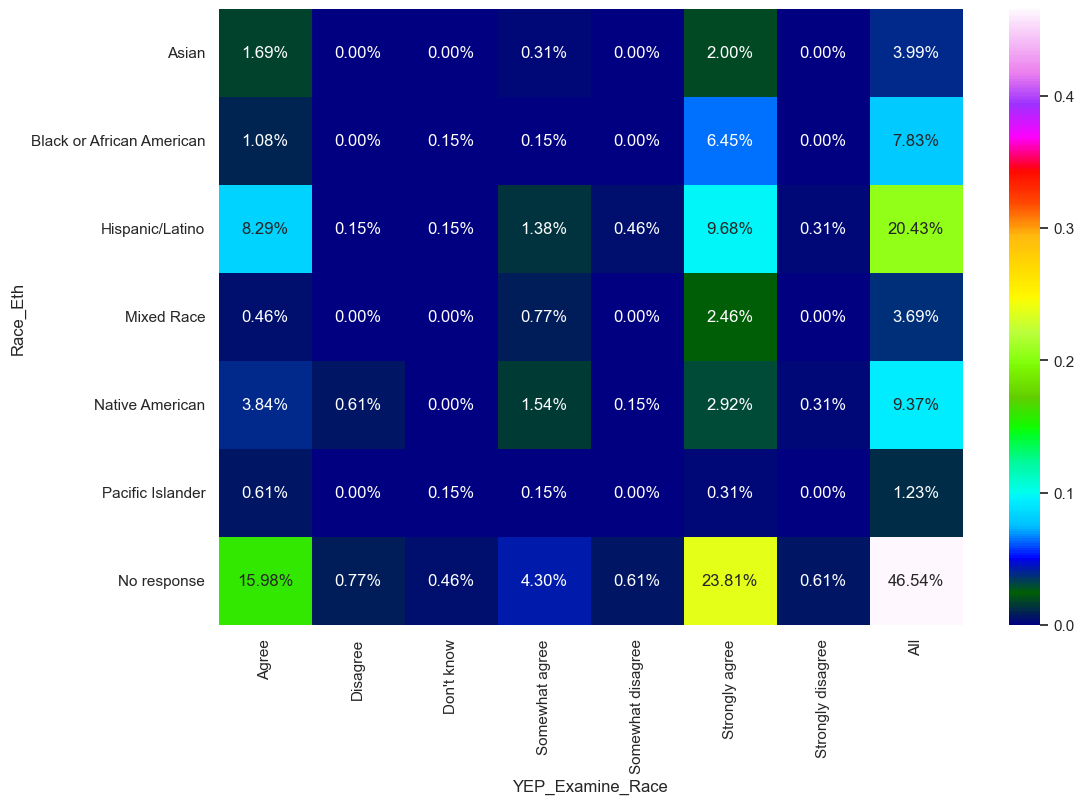

In [367]:
# Contigency table heat maps
plt.figure(figsize=(12,8))
#x_axis_labels = ["Strongly agree", "Agree","Somewhat agree", "Somewhat disagree", "Disagree",
#                 "Strongly disagree", "Don't know", "No response"] # labels for x-axis
y_axis_labels = ['Asian', 'Black or African American', 'Hispanic/Latino', 'Mixed Race', 'Native American',
                  'Pacific Islander', 'No response'] # labels for y-axis
sns.heatmap(contigency0/651, yticklabels=y_axis_labels, annot=True, 
            cmap="gist_ncar", fmt='.2%')

In [368]:
# Contigency Table: Race (Without white) vs YEP_Understanding 
# (I have a basic understanding of concepts related to racial equity.)
contigency8= pd.crosstab(cat_GARE_df0['Race_Eth'], cat_GARE_df0['YEP_Understanding'], margins = True)
#contigency0

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'Agree'),
  Text(1.5, 0, "Don't know"),
  Text(2.5, 0, 'Somewhat agree'),
  Text(3.5, 0, 'Somewhat disagree'),
  Text(4.5, 0, 'Strongly agree'),
  Text(5.5, 0, 'Strongly disagree'),
  Text(6.5, 0, 'All')])

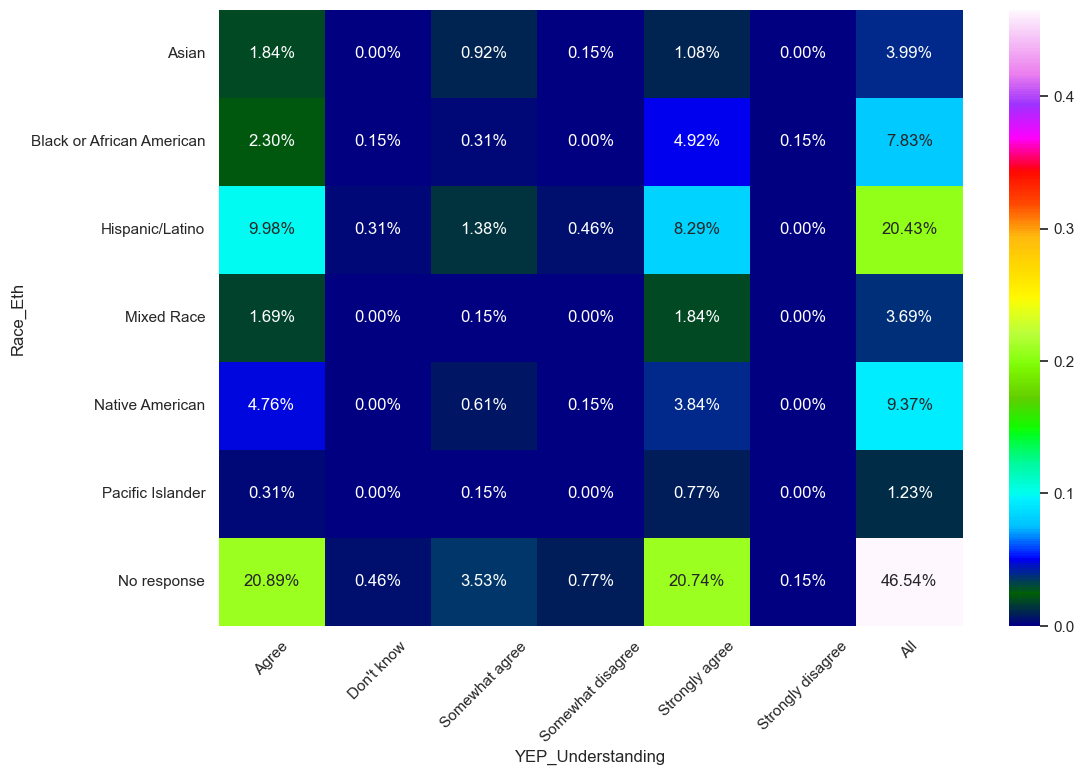

In [369]:
# Contigency table heatmaps: Race (Without white) vs YEP_Understanding 
plt.figure(figsize=(12,8))
#x_axis_labels = ["Strongly agree", "Agree","Somewhat agree", "Somewhat disagree", "Disagree",
#                 "Strongly disagree", "Don't know", "No response"] # labels for x-axis
y_axis_labels = ['Asian', 'Black or African American', 'Hispanic/Latino', 'Mixed Race', 'Native American',
                  'Pacific Islander', 'No response'] # labels for y-axis
sns.heatmap(contigency8/651, yticklabels=y_axis_labels, annot=True, 
            cmap="gist_ncar", fmt='.2%')
plt.xticks(rotation=45)

In [152]:
# Contigency Table: Race vs AY_Manage_Supervise (Do you manage or supervise people?)
contigency1= pd.crosstab(cat_GARE_df2['Race_Eth'], cat_GARE_df2['AY_Manage_Supervise'])
contigency1

AY_Manage_Supervise         No  No response  Yes
Race_Eth                                        
Asian                       27            0   10
Black or African American   47            0   12
Hispanic/Latino            133            0   49
Mixed Race                  27            0   11
Native American             61            2   29
No response                 34          174   24
Pacific Islander             8            0    2
White                      795            8  398

In [153]:
contigency_pct1 = pd.crosstab(cat_GARE_df2['Race_Eth'], cat_GARE_df2['AY_Manage_Supervise'], normalize=True, 
            margins=True, margins_name='Total').style.format('{:.2%}')

contigency_pct1

<AxesSubplot:xlabel='AY_Manage_Supervise', ylabel='Race_Eth'>

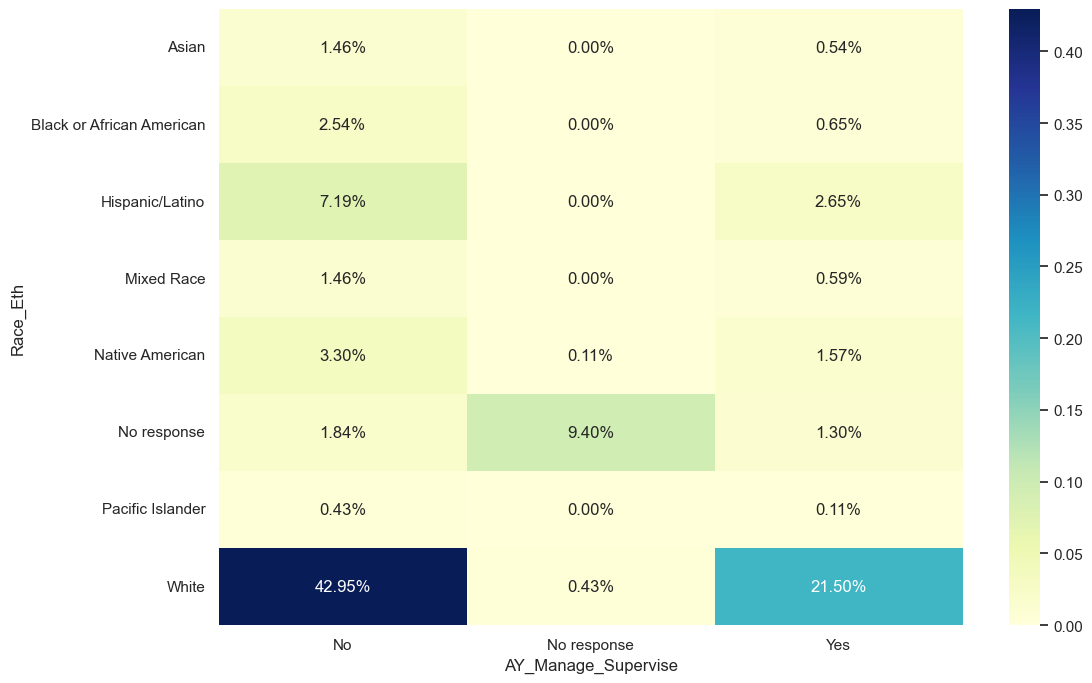

In [154]:
# Contigency table heat maps
plt.figure(figsize=(12,8))
sns.heatmap(contigency1/1851, annot=True, cmap="YlGnBu", fmt='.2%')

In [155]:
# Contigency Table: Age vs AY_Manage_Supervise (Do you manage or supervise people?)
contigency4= pd.crosstab(cat_GARE_df2['AY_Age'], cat_GARE_df2['AY_Manage_Supervise'])
contigency4

AY_Manage_Supervise   No  No response  Yes
AY_Age                                    
18-24                 35            0    1
25-34                170            2   38
35-44                283            1  136
45-54                323            3  184
55-64                252            2  138
65+                   55            0   24
No response           14          176   14

In [64]:
contigency_pct4 = pd.crosstab(cat_GARE_df2['AY_Age'], cat_GARE_df2['AY_Manage_Supervise'], normalize=True, 
            margins=True, margins_name='Total').style.format('{:.2%}')

contigency_pct4

<AxesSubplot:xlabel='AY_Manage_Supervise', ylabel='AY_Age'>

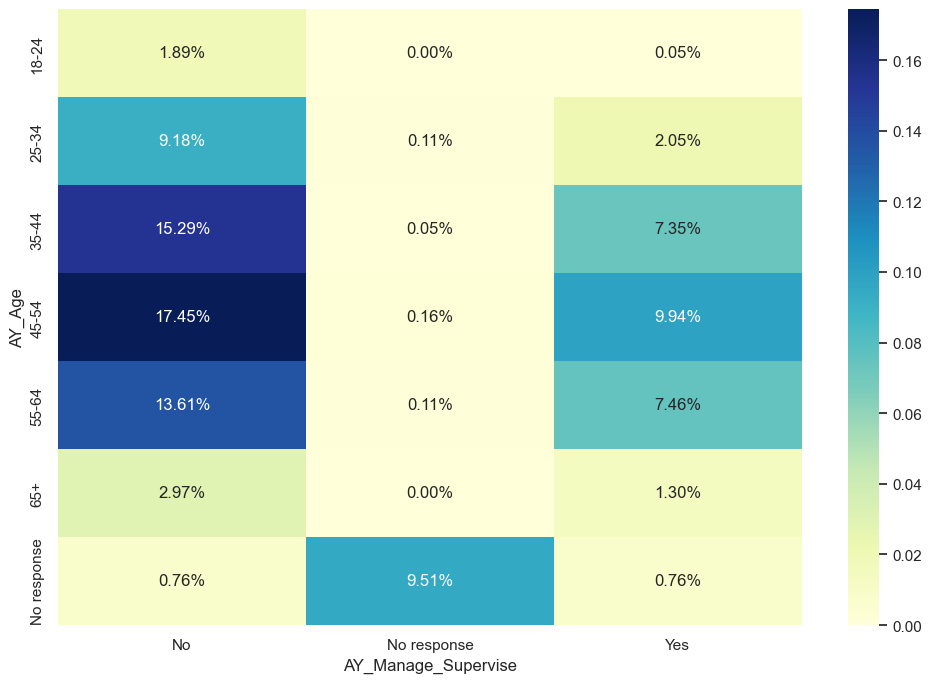

In [65]:
# Contigency table heat maps
plt.figure(figsize=(12,8))
sns.heatmap(contigency4/1851, annot=True, cmap="YlGnBu", fmt='.2%')

In [102]:
# Model Building
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [103]:
cols = ['AY_Age', 'AY_Gender', 'AY_Manage_Supervise', 'AY_Work_Location',
       'Race_Eth', 'YEP_Examine_Race', 'YEP_Understanding', 'AY_Disability',
       'YEP_Identify_IR', 'YEP_Address_IR', 'D_Comfort_Talking',
       'D_Actively_Involved', 'D_Dept_Committed', 'D_Leadership_Supports',
       'J_Belonging']

# Encode labels of multiple columns at once
cat_GARE_df2[cols] = cat_GARE_df2[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
cat_GARE_df2.head(n=3)
# # Encode labels in column 'YEP_Examine_Race'.
# cat_GARE_df2['YEP_Examine_Race']= label_encoder.fit_transform(cat_GARE_df2['YEP_Examine_Race'])
  
# cat_GARE_df2[cols].unique()

AY_Age  AY_Gender  AY_Manage_Supervise  AY_Work_Location  Race_Eth  \
0       6          2                    1                 0         5   
1       2          1                    0                 1         2   
2       4          1                    0                 0         7   

   YEP_Examine_Race  YEP_Understanding  AY_Disability  YEP_Identify_IR  \
0                 4                  0              1                4   
1                 6                  6              0                6   
2                 4                  0              0                0   

   YEP_Address_IR  D_Comfort_Talking  D_Actively_Involved  D_Dept_Committed  \
0               4                  0                    5                 4   
1               0                  4                    4                 1   
2               0                  0                    0                 0   

   D_Leadership_Supports  J_Belonging  
0                      0            4  
1                      1            0  
2                      0            0

In [104]:
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [105]:
#Create training and test datasets
#CLASS was recoded into SIZE_CLASS to change from string to integer
#CLASS needs to be dropped
X = cat_GARE_df2.drop(['YEP_Understanding', 'YEP_Examine_Race',
        'YEP_Identify_IR', 'YEP_Address_IR', 'D_Comfort_Talking', 'D_Actively_Involved',
        'D_Dept_Committed', 'D_Leadership_Supports', 'J_Belonging'], axis=1) 
y = cat_GARE_df2['YEP_Examine_Race']
print(list(X.columns.values)) 

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

['AY_Age', 'AY_Gender', 'AY_Manage_Supervise', 'AY_Work_Location', 'Race_Eth', 'AY_Disability']
(1480, 6)
(371, 6)
(1480,)
(371,)


In [106]:
model1 = LogisticRegression(random_state=10, multi_class='multinomial', penalty='none', solver='newton-cg').fit(X_train, y_train)
preds = model1.predict(X_test)
# solver='newton-cg'

In [107]:
#print the tunable parameters (They were not tuned in this example, everything kept as default)
params = model1.get_params()
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 10, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [108]:
#Print model parameters
print('intercept ', model1.intercept_[0])
print('classes', model1.classes_)
pd.DataFrame({'coeff': model1.coef_[7]}, 
             index=X.columns)
# print('Intercept: \n', model1.intercept_)
# print('Coefficients: \n', model1.coef_)

intercept  1.7157320816291546
classes [0 1 2 3 4 5 6 7]


coeff
AY_Age              -0.104145
AY_Gender            0.362336
AY_Manage_Supervise  0.240315
AY_Work_Location     0.109491
Race_Eth            -0.116913
AY_Disability        0.491046

In [109]:
print('Intercept: \n', model1.intercept_)
print('Coefficients: \n', model1.coef_)

Intercept: 
 [ 1.71573208 -0.44516959  0.63930422 -3.64331193  0.29137197 -0.95814224
  2.55491245 -0.15469695]
Coefficients: 
 [[-0.02061286 -0.21976575  0.11187253  0.36430921 -0.04258631  0.36285721]
 [ 0.00506981  0.04796923  0.21748145  0.17190305 -0.00710168  0.33717045]
 [-0.24691674  0.30611794 -0.33161997 -0.15428111 -0.04542051  0.17505491]
 [ 0.46537897  0.01423936 -0.34605233 -1.38209857  0.20639963 -2.18560601]
 [-0.0031183   0.07346657 -0.0170586   0.24450488  0.06577015 -0.03262529]
 [-0.04169108 -0.13907216  0.02195041  0.31647244  0.05131041  0.46714807]
 [-0.05396434 -0.44529136  0.10311194  0.32969874 -0.11145872  0.384955  ]
 [-0.10414545  0.36233619  0.24031459  0.10949136 -0.11691297  0.49104566]]


In [110]:
#Calculate odds ratio estimates
import numpy as np
np.exp(model1.coef_)

array([[0.97959813, 0.80270681, 1.11837029, 1.43951926, 0.95830775,
        1.4374306 ],
       [1.00508269, 1.04913837, 1.24294237, 1.18756269, 0.99292347,
        1.40097784],
       [0.78120573, 1.35814248, 0.71776004, 0.85703107, 0.95559556,
        1.19131163],
       [1.59261762, 1.01434122, 0.70747546, 0.25105115, 1.22924435,
        0.11240959],
       [0.99688656, 1.07623255, 0.98308607, 1.27698889, 1.06798121,
        0.96790117],
       [0.95916604, 0.87016523, 1.02219309, 1.37227843, 1.0526496 ,
        1.59543762],
       [0.9474659 , 0.64063759, 1.1086155 , 1.39054915, 0.89452832,
        1.46954819],
       [0.90109422, 1.43668185, 1.27164913, 1.11571043, 0.88966262,
        1.63402396]])

In [111]:
#Use statsmodels to assess variables

logit_model=sm.MNLogit(y_train,sm.add_constant(X_train))
logit_model
result=logit_model.fit()
stats1=result.summary()
stats2=result.summary2()
print(stats1)
print(stats2)

Optimization terminated successfully.
         Current function value: 1.489983
         Iterations 10
                          MNLogit Regression Results                          
Dep. Variable:       YEP_Examine_Race   No. Observations:                 1480
Model:                        MNLogit   Df Residuals:                     1431
Method:                           MLE   Df Model:                           42
Date:                Wed, 04 Jan 2023   Pseudo R-squ.:                 0.03563
Time:                        08:50:50   Log-Likelihood:                -2205.2
converged:                       True   LL-Null:                       -2286.7
Covariance Type:            nonrobust   LLR p-value:                 3.698e-16
 YEP_Examine_Race=1       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.1609      0.624     -3.464      0.001      -3.384      -0.938
A

In [112]:
#Accuracy statistics

print('Accuracy Score:', metrics.accuracy_score(y_test, preds))  

#Create classification report
class_report=classification_report(y_test, preds)
print(class_report)


Accuracy Score: 0.3935309973045822
              precision    recall  f1-score   support

           0       0.33      0.40      0.36       113
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         8
           4       0.40      0.06      0.10        68
           5       0.00      0.00      0.00        19
           6       0.44      0.70      0.54       139
           7       0.00      0.00      0.00        10

    accuracy                           0.39       371
   macro avg       0.17      0.16      0.14       371
weighted avg       0.34      0.39      0.33       371



In [113]:
#y_test as first argument and the preds as second argument 
confusion_matrix(y_test, preds)

array([[45,  0,  0,  2,  0, 66,  0],
       [12,  0,  0,  0,  0,  2,  0],
       [ 1,  0,  0,  2,  0,  5,  0],
       [26,  0,  0,  4,  0, 38,  0],
       [10,  0,  0,  1,  0,  8,  0],
       [40,  0,  0,  1,  0, 97,  1],
       [ 4,  0,  0,  0,  0,  6,  0]], dtype=int64)

In [114]:
#transform confusion matrix into array
#the matrix is stored in a vaiable called confmtrx
confmtrx = np.array(confusion_matrix(y_test, preds))
#Create DataFrame from confmtrx array 
#rows for test: Male, Female, Infant designation as index 
#columns for preds: male, predicted_female, predicted_infant as column

pd.DataFrame(confmtrx, index=["Strongly disagree",
     "Disagree",
     "Somewhat disagree",
     "Somewhat agree",
     "Agree",
     "Strongly agree",
     "No response"],
columns=["predicted Strongly disagree",
     "predicted Disagree",
     "predicted Somewhat disagree",
     "predicted Somewhat agree",
     "predicted Agree",
     "predicted Strongly agree",
     "predicted No response"])

predicted Strongly disagree  predicted Disagree  \
Strongly disagree                           45                   0   
Disagree                                    12                   0   
Somewhat disagree                            1                   0   
Somewhat agree                              26                   0   
Agree                                       10                   0   
Strongly agree                              40                   0   
No response                                  4                   0   

                   predicted Somewhat disagree  predicted Somewhat agree  \
Strongly disagree                            0                         2   
Disagree                                     0                         0   
Somewhat disagree                            0                         2   
Somewhat agree                               0                         4   
Agree                                        0                         1   
Strongly agree                               0                         1   
No response                                  0                         0   

                   predicted Agree  predicted Strongly agree  \
Strongly disagree                0                        66   
Disagree                         0                         2   
Somewhat disagree                0                         5   
Somewhat agree                   0                        38   
Agree                            0                         8   
Strongly agree                   0                        97   
No response                      0                         6   

                   predicted No response  
Strongly disagree                      0  
Disagree                               0  
Somewhat disagree                      0  
Somewhat agree                         0  
Agree                                  0  
Strongly agree                         1  
No response                            0

In [115]:
#Accuracy statistics

print('Accuracy Score:', metrics.accuracy_score(y_test, preds))  

#Create classification report
class_report=classification_report(y_test, preds)
print(class_report)

Accuracy Score: 0.3935309973045822
              precision    recall  f1-score   support

           0       0.33      0.40      0.36       113
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         8
           4       0.40      0.06      0.10        68
           5       0.00      0.00      0.00        19
           6       0.44      0.70      0.54       139
           7       0.00      0.00      0.00        10

    accuracy                           0.39       371
   macro avg       0.17      0.16      0.14       371
weighted avg       0.34      0.39      0.33       371



In [116]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
pred = model1.predict(X)
conf_mat = confusion_matrix(y, model1.predict(X))
print('Precision', conf_mat[0, 0] / sum(conf_mat[:, 0]))
print('Recall', conf_mat[0, 0] / sum(conf_mat[0, :]))
print('Specificity', conf_mat[1, 1] / sum(conf_mat[1, :]))
precision_recall_fscore_support(list(y.values), list(model1.predict(X)))

Precision 0.3196969696969697
Recall 0.3540268456375839
Specificity 0.0


(array([0.31969697, 0.        , 0.16666667, 0.        , 0.28571429,
        0.        , 0.42844365, 0.        ]),
 array([0.35402685, 0.        , 0.01694915, 0.        , 0.06382979,
        0.        , 0.70544919, 0.        ]),
 array([0.33598726, 0.        , 0.03076923, 0.        , 0.10434783,
        0.        , 0.53311074, 0.        ]),
 array([596,  90,  59,   4, 282,  71, 679,  70], dtype=int64))